In [1]:
import numpy as np
import random
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler


#Store Data Variables
import json
with open('feature_data.json', 'r') as f:
 features = json.load(f)

from scipy.io import loadmat
train_idxs = loadmat('cuhk03_new_protocol_config_labeled.mat')['train_idx'].flatten()
query_idxs = loadmat('cuhk03_new_protocol_config_labeled.mat')['query_idx'].flatten()
labels = loadmat('cuhk03_new_protocol_config_labeled.mat')['labels'].flatten()
gallery_idxs = loadmat('cuhk03_new_protocol_config_labeled.mat')['gallery_idx'].flatten()
filelist = loadmat('cuhk03_new_protocol_config_labeled.mat')['filelist'].flatten()
camId = loadmat('cuhk03_new_protocol_config_labeled.mat')['camId'].flatten()

In [2]:
train_idxs

array([    1,     2,     3, ..., 14094, 14095, 14096], dtype=uint16)

In [3]:
query_idxs

array([   22,    27,    49, ..., 14043, 14059, 14063], dtype=uint16)

In [4]:
labels

array([   1,    1,    1, ..., 1467, 1467, 1467], dtype=uint16)

In [5]:
gallery_idxs

array([   21,    23,    24, ..., 14062, 14064, 14065], dtype=uint16)

In [6]:
filelist

array([array(['1_001_1_01.png'], dtype='<U14'),
       array(['1_001_1_02.png'], dtype='<U14'),
       array(['1_001_1_03.png'], dtype='<U14'), ...,
       array(['5_049_2_08.png'], dtype='<U14'),
       array(['5_049_2_09.png'], dtype='<U14'),
       array(['5_049_2_10.png'], dtype='<U14')], dtype=object)

In [7]:
camId

array([1, 1, 1, ..., 2, 2, 2], dtype=uint8)

In [8]:
#grid searc cv against k, distance metric and transformation/normalization - use only query and gallery for this part 

In [9]:
#scaler = StandardScaler()
print(np.array(features))
#features = scaler.fit_transform(features)
X = np.array(features)
print(X)
y = np.array(labels)
filelist = np.array(filelist)
camId = np.array(camId)

[[0.13791114 1.12505555 0.05404324 ... 0.10747871 0.04081609 0.68009406]
 [0.02507781 0.9057585  0.00346441 ... 0.16763815 0.14764351 0.2700713 ]
 [0.09923808 1.09122825 0.01889733 ... 0.07981343 0.04958951 0.37923682]
 ...
 [0.50913167 2.1067946  1.12224829 ... 0.78767842 1.68007588 0.00259321]
 [0.44684452 1.87411916 1.51910186 ... 1.02090526 1.58616257 0.10876646]
 [0.46024311 2.31024432 1.20531154 ... 0.62753201 1.22394812 0.        ]]
[[0.13791114 1.12505555 0.05404324 ... 0.10747871 0.04081609 0.68009406]
 [0.02507781 0.9057585  0.00346441 ... 0.16763815 0.14764351 0.2700713 ]
 [0.09923808 1.09122825 0.01889733 ... 0.07981343 0.04958951 0.37923682]
 ...
 [0.50913167 2.1067946  1.12224829 ... 0.78767842 1.68007588 0.00259321]
 [0.44684452 1.87411916 1.51910186 ... 1.02090526 1.58616257 0.10876646]
 [0.46024311 2.31024432 1.20531154 ... 0.62753201 1.22394812 0.        ]]


In [10]:
mask_train = np.array(train_idxs).ravel()
mask_query = np.array(query_idxs).ravel()
mask_gallery = np.array(gallery_idxs).ravel()

mask_train = np.subtract(mask_train, 1)
mask_query = np.subtract(mask_query, 1)
mask_gallery = np.subtract(mask_gallery, 1)


X_train, X_query, X_gallery = X[mask_train, :], X[mask_query, :], X[mask_gallery, :]
y_train, y_query, y_gallery = y[mask_train], y[mask_query], y[mask_gallery]
filelist_train, filelist_query, filelist_gallery = filelist[mask_train], filelist[mask_query], filelist[mask_gallery]
camId_train, camId_query, camId_gallery = camId[mask_train], camId[mask_query], camId[mask_gallery]

In [11]:
len(X_train)

7368

In [12]:
len(set(y_train))

767

In [13]:
len(X_query)

1400

In [14]:
len(X_gallery)

5328

In [15]:
len(y_train)

7368

In [16]:
X_val = []
y_val = []
camId_val = []
val_ind = []
for i in range(7368):
        if(i not in val_ind):
            X_val.append(X_train[i])
            y_val.append(y_train[i])
            camId_val.append(camId_train[i])
            val_ind.append(i)
            for j in range(7368):
                if(y_train[i] == y_train[j] and i != j):
                    X_val.append(X_train[j])
                    y_val.append(y_train[j])
                    camId_val.append(camId_train[j])
                    val_ind.append(j)
            if ((len(set(y_val)) > 99)):
                break

In [17]:
X_val = np.array(X_val)
y_val = np.array(y_val)
camId_val = np.array(camId_val)

In [18]:
len((y_val))

966

In [19]:
len(X_val)

966

In [20]:
len(camId_val)

966

In [21]:
len(set(val_ind))

966

In [22]:
X_train_new = []
y_train_new = []
camId_train_new = []
for i in range(7368):
    if(i not in val_ind):
        X_train_new.append(X_train[i])
        y_train_new.append(y_train[i])
        camId_train_new.append(camId_train[i])

In [23]:
X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)
camId_train_new = np.array(camId_train_new)

In [24]:
len(X_train_new)

6402

In [25]:
len(y_train_new)

6402

In [26]:
len(camId_train_new)

6402

In [27]:
mask_vquery = np.random.choice(np.arange(966), 193, replace=False)
mask_vgallery = np.array(list(set(np.arange(0, 966)) - set(mask_vquery)))
print(type(mask_vquery[0]))
print(type(mask_vgallery[0]))
X_vquery, X_vgallery =  X_val[mask_vquery, :], X_val[mask_vgallery, :]
y_vquery, y_vgallery =  y_val[mask_vquery], y_val[mask_vgallery]
camId_vquery, camId_vgallery = camId_val[mask_vquery], camId_val[mask_vgallery]

<class 'numpy.int32'>
<class 'numpy.int32'>


In [28]:
len(X_vgallery)

773

In [29]:
import pandas as pd 
import numpy as np

from keras import layers, optimizers, regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential

from keras.utils import plot_model
#from kt_utils import *
import keras.backend as K

from sklearn import preprocessing, model_selection 
from keras.wrappers.scikit_learn import KerasRegressor

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [30]:
# create model
model = Sequential()
# layer 1
model.add(Dense(6144, input_dim=6144, activation='relu', kernel_initializer='normal'))
#layer 2
model.add(Dense(1024, activation='relu', kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#layer 3
model.add(Dense(128, activation='relu',kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#layer 4
model.add(Dense(2, activation='softmax'))
# Compile model
from keras import metrics
optimizer = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov= False)
#optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss='categorical_crossentropy') 

In [31]:
X_train_pairs = []
y_train_pair_lables = []
for Xtnn, ytnn, camId_t in zip(X_train_new, y_train_new, camId_train_new):
    for Xtnn2, ytnn2, camId_t2 in zip(X_train_new, y_train_new, camId_train_new):
        if ((camId_t == camId_t2) and (ytnn == ytnn2)):
            continue
        elif (ytnn == ytnn2):
            #for i in range (30):
            randindex = random.randint(0, 6401)
            Xtnn3 = X_train_new[randindex]
            ytnn3 = y_train_new[randindex]                 

            dist2 = 0
            if(ytnn == ytnn3):
                dist3 = 0
            else:
                dist3 = 1

            Xconcat = np.concatenate((Xtnn,Xtnn2,Xtnn3), axis = None)
            X_train_pairs.append(Xconcat)
            y_train_pair_lables.append((dist2,dist3))   

            Xconcat = np.concatenate((Xtnn,Xtnn3,Xtnn2), axis = None)
            X_train_pairs.append(Xconcat)
            y_train_pair_lables.append((dist3,dist2)) 

y_train_pair_lables = np.array(y_train_pair_lables)
X_train_pairs = np.array(X_train_pairs)
model.fit(X_train_pairs, y_train_pair_lables, batch_size = 150, epochs=20)

Epoch 1/20
61464/61464 [==============================] - 120s 2ms/step - loss: 0.6659
Epoch 2/20
61464/61464 [==============================] - 107s 2ms/step - loss: 0.3293
Epoch 3/20
61464/61464 [==============================] - 107s 2ms/step - loss: 0.1764
Epoch 4/20
61464/61464 [==============================] - 111s 2ms/step - loss: 0.1117
Epoch 5/20
61464/61464 [==============================] - 112s 2ms/step - loss: 0.0793
Epoch 6/20
61464/61464 [==============================] - 112s 2ms/step - loss: 0.0586
Epoch 7/20
61464/61464 [==============================] - 111s 2ms/step - loss: 0.0476
Epoch 8/20
61464/61464 [==============================] - 111s 2ms/step - loss: 0.0381
Epoch 9/20
61464/61464 [==============================] - 114s 2ms/step - loss: 0.0343
Epoch 10/20
61464/61464 [==============================] - 109s 2ms/step - loss: 0.0294
Epoch 11/20
61464/61464 [==============================] - 112s 2ms/step - loss: 0.0267
Epoch 12/20
61464/61464 [================

In [32]:
def get_acc_score(y_valid, y_q, tot_label_occur):
    recall = 0
    true_positives = 0
    
    k = 0
    
    max_rank = 30
    
    rank_A = np.zeros(max_rank)
    AP_arr = np.zeros(11)
    
    while (recall < 1) or (k < max_rank):
        if (y_valid[k] == y_q):
            
            true_positives = true_positives + 1
            recall = true_positives/tot_label_occur
            precision = true_positives/(k+1)
            
            AP_arr[round((recall-0.05)*10)] = precision
            
            for n in range (k, max_rank):
                rank_A[n] = 1
            
        k = k+1
        
    max_precision = 0
    for i in range(10, -1, -1):
        max_precision = max(max_precision, AP_arr[i])
        AP_arr[i] = max_precision
    
    AP_ = AP_arr.sum()/11
    
    return AP_, rank_A

In [33]:
rank_accuracies = []
AP = []

for val, camId_v, y_v  in zip(X_vquery, camId_vquery, y_vquery):
    v_v_dists = []
    y_valid = []
    for val2, camId_v2, y_v2  in zip(X_vgallery, camId_vgallery, y_vgallery):
        if ((camId_v == camId_v2) and (y_v == y_v2)):
            continue
        else:
            randindex = random.randint(0, 772)
            val3 = X_vgallery[randindex]
            y_v3 = y_vgallery[randindex]

            dist = model.predict(np.concatenate((val, val2, val3)).reshape((1,6144)))[0][0]
            print(dist)
            v_v_dists.append(dist)
            y_valid.append(y_v2)

    tot_label_occur = y_valid.count(y_v)
    v_v_dists = np.array(v_v_dists)
    y_valid = np.array(y_valid)

    
    _indexes = np.argsort(v_v_dists)

    # Sorted distances and labels
    v_v_dists, y_valid = v_v_dists[_indexes], y_valid[_indexes]
    print(v_v_dists)
    
    if tot_label_occur != 0:
        AP_, rank_A = get_acc_score(y_valid, y_v, tot_label_occur)

        AP.append(AP_)

        rank_accuracies.append(rank_A) 

    #if q  > 5:
    #    break
    #q = q+1

rank_accuracies = np.array(rank_accuracies)

total = rank_accuracies.shape[0]
rank_accuracies = rank_accuracies.sum(axis = 0)
rank_accuracies = np.divide(rank_accuracies, total)

i = 0
print ('Accuracies by Rank:')
while i < rank_accuracies.shape[0]:
    print('Rank ', i+1, ' = %.2f%%' % (rank_accuracies[i] * 100), '\t',
          'Rank ', i+2, ' = %.2f%%' % (rank_accuracies[i+1] * 100), '\t',
          'Rank ', i+3, ' = %.2f%%' % (rank_accuracies[i+2] * 100), '\t',
          'Rank ', i+4, ' = %.2f%%' % (rank_accuracies[i+3] * 100), '\t',
          'Rank ', i+5, ' = %.2f%%' % (rank_accuracies[i+4] * 100))
    i = i+5

AP = np.array(AP)

mAP = AP.sum()/AP.shape[0]
print('mAP = %.2f%%' % (mAP * 100))

0.99957365
0.99996185
0.99972326
0.9908478
0.9281214
0.99945515
0.17373769
0.98172486
0.89523613
0.99953806
0.94967633
0.9996942
0.984993
0.99954104
0.9959662
0.9999478
0.9935887
0.96288866
0.99389595
0.47220385
0.90673566
0.9082407
0.907878
0.9976882
0.9952478
0.0404566
0.082195826
0.9895448
0.77866304
0.9872716
0.98919463
0.09650316
0.98973864
0.34531245
0.062368408
0.042743847
0.23688039
0.96029204
0.8976499
0.32766756
0.90104526
0.2904698
0.98620737
0.72577375
0.7104218
0.9950185
0.04220781
0.76931214
0.8450147
0.18340698
0.89299077
0.22431934
0.06087601
0.8721083
0.27181923
0.31276348
0.981012
0.98717016
0.99275744
0.98982024
0.0329227
0.024376936
0.97116053
0.07494031
0.97214305
0.1805117
3.4156452e-05
0.023459632
0.22451365
0.010445342
0.07515568
0.33249062
0.3060181
0.33721668
0.6193075
0.8668989
0.06003515
0.056722343
0.59357554
0.731674
0.7899776
0.02407939
0.079255655
0.46096796
0.77308816
0.16375576
0.28310233
0.42646644
0.9988636
0.9984195
0.3339197
0.99999535
0.9146667
0.

0.33820793
0.9945914
0.9990584
0.43219256
0.5383909
0.9935202
0.75512767
[2.94638170e-07 1.11957370e-05 1.92555708e-05 2.95512873e-05
 3.41564519e-05 3.42014937e-05 5.33067869e-05 6.58135395e-05
 9.72367998e-05 1.92201464e-04 2.09673875e-04 3.78904922e-04
 4.04018996e-04 4.10540233e-04 4.97853965e-04 5.51049947e-04
 6.93587295e-04 7.48754363e-04 8.94109020e-04 9.10250237e-04
 9.13066440e-04 9.67613480e-04 9.83433914e-04 1.07493275e-03
 1.28195237e-03 1.35265163e-03 1.49473210e-03 1.73924596e-03
 1.75976916e-03 1.83110125e-03 1.93048327e-03 1.95348659e-03
 1.99446594e-03 2.12172698e-03 2.19438202e-03 2.26755929e-03
 2.44597765e-03 2.48335465e-03 2.54565571e-03 2.58489768e-03
 2.61620479e-03 2.68072542e-03 2.69613019e-03 2.71580392e-03
 2.89396825e-03 2.89619132e-03 3.06814886e-03 3.12195043e-03
 3.37119470e-03 3.48861236e-03 3.70504288e-03 3.76099814e-03
 4.09066817e-03 4.25725197e-03 4.74975538e-03 5.81357069e-03
 6.18071109e-03 6.33966085e-03 6.75698649e-03 6.79562567e-03
 7.14098616e

0.016279126
0.0068088984
0.28291267
0.050746184
0.99967694
0.024556754
0.124829516
0.25432324
0.24942715
0.8878034
0.9900193
0.015366525
0.6155091
0.049923554
0.47407964
0.27132145
0.9056911
0.040944688
0.7210478
0.13295099
0.18132184
0.095806375
0.9709291
0.0842645
0.4137548
0.06139959
0.5093252
0.71044326
0.007713937
0.9925929
0.9344205
0.37845272
0.915097
0.19446614
0.0570584
0.0015721462
0.027869971
0.11435483
0.460806
0.36231846
0.6895441
0.99494946
0.8774726
0.7942421
0.40365514
0.0013544093
0.00021373914
0.014311332
0.018002193
0.004914343
0.17533706
0.08155311
0.11232424
0.10133205
0.060127836
0.9354298
0.57176507
0.66272944
0.022762349
0.0035318278
0.06701567
0.120826505
0.106211655
0.9434939
0.9555109
0.6664894
0.005594836
0.042387158
0.0017352072
0.2457986
0.19330478
0.9895984
0.0010073468
0.19825202
0.11542877
0.4639808
0.23605166
0.05175264
0.9572131
0.0015555271
0.9773186
0.0013760751
0.07573257
0.07823431
0.021669995
0.011169791
0.016380468
0.0021345518
0.037751365
0.994

0.28985715
0.01645881
0.42484102
0.7499219
0.002811162
0.019026387
0.9200281
0.0024133953
[7.99500340e-05 9.36824508e-05 2.13739142e-04 2.48723576e-04
 3.19776533e-04 3.56800505e-04 3.66045599e-04 4.58028342e-04
 4.62364434e-04 4.64873272e-04 4.88634571e-04 5.01305971e-04
 5.95722406e-04 6.74589246e-04 7.13739835e-04 7.31819950e-04
 7.34915258e-04 7.53367611e-04 7.72389525e-04 7.96870037e-04
 9.51002177e-04 9.63165541e-04 1.00734679e-03 1.03416527e-03
 1.06376200e-03 1.09066989e-03 1.21432962e-03 1.21671765e-03
 1.23985077e-03 1.24209083e-03 1.27767818e-03 1.29478402e-03
 1.35440927e-03 1.37607509e-03 1.42168184e-03 1.55552709e-03
 1.57214620e-03 1.65825360e-03 1.72264979e-03 1.73520716e-03
 1.76729134e-03 1.83005130e-03 1.87723059e-03 1.95015664e-03
 1.97827118e-03 2.13455176e-03 2.33524153e-03 2.39877589e-03
 2.41339533e-03 2.59382231e-03 2.66634533e-03 2.81116203e-03
 2.90194317e-03 3.02286190e-03 3.31163220e-03 3.40476516e-03
 3.41771916e-03 3.43731302e-03 3.44206789e-03 3.53182782

0.15687759
4.0385294e-05
2.2157255e-05
2.8267053e-05
0.0005258114
3.9694764e-06
0.0056755156
3.9444505e-05
0.00024250065
4.737851e-05
4.093918e-05
0.9545919
0.99887234
0.6500896
0.8348524
0.54773694
0.04440097
0.057471808
0.84625965
0.67525715
0.6190346
0.0032858707
0.5213692
0.17048511
0.017868377
0.748404
0.010561905
0.019721571
0.005173959
0.012279265
0.08793886
0.07481215
0.09289943
0.008785076
0.014919246
0.010222796
0.065761425
0.012908711
0.45580587
0.00519546
0.039891854
0.34787297
0.4386142
0.909516
0.15281546
0.20211789
0.09537295
0.02914021
0.21750921
0.39127442
0.0029750324
0.8908199
0.016777873
0.00180184
0.004195718
0.013478798
0.11395937
0.68530095
0.354634
0.16174251
0.03782408
0.05634083
0.781839
0.6528917
0.00044398784
0.00024966968
0.014382247
0.0026765116
0.02145216
0.19802104
0.006354264
0.0006673609
0.93374765
0.00056792324
0.97365904
0.013563302
0.02266051
0.00041943692
0.45403448
0.0020281342
0.1967341
0.0030686874
0.05982867
0.038616966
0.0034535693
0.008015178

0.40519002
0.3129244
0.9998523
0.78723973
0.6989122
0.51926976
0.22592852
0.00036814384
0.13779083
0.8832018
0.1790664
0.72712326
0.10931622
0.5340488
0.23262495
0.29118812
0.97146624
0.9969722
0.0023654825
0.38388377
0.0043694233
0.30714852
0.020999344
0.0032354621
0.08082332
0.0014424709
0.031981323
[3.96947644e-06 4.05714263e-06 4.80740255e-06 1.00840816e-05
 1.38784599e-05 2.21572554e-05 2.82670535e-05 3.94445051e-05
 4.03852937e-05 4.09391796e-05 4.13450143e-05 4.73785112e-05
 5.07742188e-05 5.17205226e-05 5.51668672e-05 8.83093962e-05
 1.07317232e-04 1.24124112e-04 1.34623333e-04 1.41446551e-04
 1.50106396e-04 1.50405249e-04 1.75290872e-04 1.92294232e-04
 2.22019095e-04 2.29276382e-04 2.42500653e-04 2.49669683e-04
 2.62519985e-04 2.93572637e-04 3.07103823e-04 3.26525711e-04
 3.68143839e-04 3.76359909e-04 3.81150894e-04 3.84597923e-04
 4.19436925e-04 4.23352089e-04 4.43987839e-04 4.44834266e-04
 5.04568685e-04 5.06907701e-04 5.25811396e-04 5.26347372e-04
 5.30249206e-04 5.64398768

0.7205408
0.2927211
0.888644
0.7076208
0.9770642
0.81861013
0.00025819542
0.0011852775
0.0057068053
0.26546308
0.679931
0.11140728
0.008641975
0.06998114
0.037162505
0.06476249
0.07615478
0.6793412
0.9162903
0.2502306
0.32535407
0.015423814
0.0050969883
0.0013305828
0.8410971
0.00045236415
0.25078243
0.007810152
0.251092
0.00029925807
0.16652659
0.005518543
0.36642405
0.0017898158
0.12732653
0.0016759558
0.021530135
0.008472615
0.8491385
0.3447734
0.19543834
0.3176537
0.06304881
0.9280407
0.92403144
0.24574547
0.108764455
0.0019016665
0.11744636
0.02434654
0.00038528343
0.011161284
1.1348404e-05
0.0015907557
0.5335345
0.0029587268
0.9269108
0.014888477
0.08006916
0.16439451
0.024734758
0.15840578
0.15532887
0.6153845
0.002684652
0.00065811735
0.0039592003
0.0029309145
0.023417844
0.012440329
0.051978234
0.254894
0.8938099
0.0019671894
0.5275315
0.18663497
0.4790836
0.07027247
0.86955404
0.9537385
0.39387807
0.004223181
0.1441839
0.8829438
0.77523506
0.27994844
0.002862677
0.9412832
0.1

0.98963165
0.25186795
0.9790254
0.64733624
0.1943926
0.89278233
0.89663035
0.35359907
0.9723857
0.8764977
[1.13484039e-05 1.18921700e-04 2.36987486e-04 2.58195418e-04
 2.58263142e-04 2.99258070e-04 3.85283434e-04 4.19588701e-04
 4.52364155e-04 6.28368289e-04 6.40645041e-04 6.46627741e-04
 6.58117351e-04 6.90736284e-04 7.95032247e-04 8.21272319e-04
 1.12101412e-03 1.18527748e-03 1.19687826e-03 1.25639176e-03
 1.28423644e-03 1.31885684e-03 1.32008607e-03 1.33058277e-03
 1.45844638e-03 1.59075565e-03 1.67595583e-03 1.72085431e-03
 1.75922085e-03 1.78079982e-03 1.78315514e-03 1.78981584e-03
 1.90166652e-03 1.95647334e-03 1.96718937e-03 2.06400338e-03
 2.11531995e-03 2.48491555e-03 2.57476675e-03 2.59343744e-03
 2.62025301e-03 2.68465211e-03 2.86267698e-03 2.93091452e-03
 2.95872684e-03 3.13459127e-03 3.15782544e-03 3.31705087e-03
 3.43118515e-03 3.43582197e-03 3.70706595e-03 3.72140994e-03
 3.80346738e-03 3.84591660e-03 3.95920034e-03 3.99488444e-03
 4.22318093e-03 4.43238905e-03 4.5293583

0.18310855
0.99614054
0.97149134
0.06547241
0.66897315
0.636965
0.027955798
0.26035404
0.62164414
0.008749687
0.062832996
0.0056276442
0.09266901
0.0028522534
0.05051568
0.9934028
0.02132025
0.68161404
0.07869467
0.2707711
0.5190553
0.9908138
0.9958494
0.99323565
0.823239
0.1519136
0.99011093
0.9996582
0.2674831
0.012255091
0.0148240905
0.58735806
0.5834319
0.024839764
0.00097061344
0.0974091
0.056885183
0.040853366
0.000950917
4.4094682e-05
1.0703173e-05
0.0031331049
0.019337488
0.00130175
0.003025379
0.0010929571
0.999959
0.8442966
0.9999312
0.016140064
0.6182245
0.9996214
0.97166014
0.98389834
0.9867742
0.7960014
0.994249
0.72154075
0.06495416
0.6768402
0.10346451
0.13519083
0.0010113963
0.025138984
0.00019081424
0.0045310445
0.3612589
0.08834062
0.09409495
0.0005080098
0.044883925
0.00019730671
0.17219873
0.0002459438
0.66209507
0.9998447
0.22290012
0.115541205
0.85078746
0.18837456
0.01147063
0.8784369
0.8360315
0.67002577
0.0217788
0.77047527
0.44103098
0.023423979
0.9994406
0.89

0.61361444
0.3229202
0.99996984
0.9729838
0.07259373
0.0010545289
0.68185294
0.1253773
0.0016410522
0.00058761693
0.15586825
0.9134357
0.95137876
0.6628919
0.4345882
0.100724995
0.041531138
0.064237684
0.4793752
0.54511213
0.19292034
0.0005599767
0.026739206
0.0008256267
0.00074577087
[5.09552228e-06 8.33732065e-06 8.80578500e-06 1.07031728e-05
 1.22884667e-05 1.63735531e-05 1.97211102e-05 2.54105325e-05
 3.23507084e-05 3.73693292e-05 4.21496625e-05 4.40946824e-05
 4.43841018e-05 4.45061232e-05 4.73152031e-05 4.87737088e-05
 4.95361237e-05 5.33884886e-05 5.80299202e-05 6.23236410e-05
 7.80591290e-05 8.41733199e-05 1.11804162e-04 1.17644828e-04
 1.21667006e-04 1.61407836e-04 1.63184071e-04 1.90814244e-04
 1.94805893e-04 1.95378103e-04 1.97306712e-04 2.11599690e-04
 2.16214365e-04 2.22222807e-04 2.35990199e-04 2.45943811e-04
 2.54890241e-04 2.64401402e-04 2.77013081e-04 2.85377493e-04
 2.86956929e-04 3.24137189e-04 3.95409879e-04 4.17350995e-04
 4.48220700e-04 4.75841836e-04 4.78744012e-

0.9985384
0.9542548
0.06783094
0.828557
0.19255331
0.5683249
0.18865538
0.0171899
0.99393797
0.6674059
0.033012334
0.98997366
0.93743384
0.41949064
0.005008906
0.0064921994
0.009132876
0.8787443
0.70532614
0.08561253
0.3137216
0.060971987
0.013288772
0.33489987
0.9844906
0.9999964
0.5411779
0.98492545
0.237203
0.44713193
0.25163862
0.9593127
0.96657103
0.7128581
0.09735793
0.9770768
0.9844391
0.17774731
0.006369024
0.58271027
0.0008127042
0.99919504
2.2149193e-06
0.021196581
0.00053258706
0.0005858001
0.99231416
0.37671337
0.000840474
0.006003843
0.8511702
0.3585996
0.99827504
0.5250078
0.9809656
0.99595624
0.94521433
0.9918611
0.061150312
0.00040469517
9.170511e-06
0.0009931612
0.00012086509
0.018823361
0.0029951308
0.004663507
0.027172623
0.005900358
0.0055357115
0.0022226844
0.102018684
0.0004155076
0.002463362
0.0020071445
0.24303965
0.0002324675
0.009408144
0.0009344318
1.9139572e-05
0.0012403056
0.43028697
0.16921094
0.2667692
0.56508785
0.9936087
0.9688391
0.7711781
0.0001262733

0.9749282
0.9930709
0.04329952
0.020157201
0.76659614
0.016586723
0.97102326
0.005051992
0.10156336
0.49642357
0.028265914
0.8545685
2.0895652e-05
2.967041e-06
3.978789e-07
0.003654038
0.030614585
0.41308835
0.893234
0.5483603
0.5529601
0.0039504734
0.011722594
0.08546971
0.04136708
0.38886175
0.76918447
0.46079734
0.08060412
0.5872972
[3.97878892e-07 1.30608726e-06 2.21491928e-06 2.26371094e-06
 2.96704093e-06 6.74110424e-06 9.17051057e-06 1.06338257e-05
 1.23198906e-05 1.55255730e-05 1.91395720e-05 2.08956517e-05
 2.09243062e-05 2.31708982e-05 2.50355151e-05 4.44168254e-05
 7.17713046e-05 7.37639639e-05 7.87178360e-05 7.93253421e-05
 1.06447551e-04 1.20865087e-04 1.26273342e-04 1.34042173e-04
 1.89929357e-04 1.96788882e-04 2.00631563e-04 2.15175169e-04
 2.32467501e-04 2.39002722e-04 2.64639995e-04 2.68318574e-04
 2.78845662e-04 2.90675292e-04 3.16306308e-04 3.76469194e-04
 4.04695165e-04 4.15507588e-04 4.31803288e-04 4.96924215e-04
 5.32051199e-04 5.32587059e-04 5.85800095e-04 6.1421

0.0038119494
0.016718566
0.0008511043
0.021396367
0.00069504627
0.072084576
0.017581915
0.12559633
0.049583558
0.0011480543
0.010422375
0.0006521857
0.00044136588
0.00096496526
9.98562e-05
0.39863604
6.0461996e-05
0.0018542177
0.0003343608
0.0008582616
0.0009342458
0.7734633
0.80718833
0.7065274
0.05358121
0.014444845
0.0079926215
0.007738272
0.15545407
0.53370094
0.065862335
0.07381847
0.0035559507
0.0001232952
0.47843117
0.014698328
0.12932661
0.72474027
2.4213425e-05
0.008076052
0.0634479
0.96673375
0.2712946
0.44224432
0.0005928532
0.15023875
0.0011119747
0.006658386
0.023428144
0.000634489
0.8908089
0.044967774
0.38791057
0.036127687
0.34769002
0.0035299954
0.1130575
0.06769786
0.0022946566
4.8352693e-05
0.00077990105
0.036355346
0.49479604
1.7426744e-05
0.032360785
0.002797767
0.07650306
0.0024973147
0.5498194
0.00019515821
0.00028974758
0.00170833
0.02073507
0.000640133
0.0036379755
0.5630853
0.00017644004
0.033589646
0.01026238
0.00577178
0.00028106396
0.120820805
0.003044128
0

0.0003415349
0.0011073032
0.060026165
0.0021424103
9.528066e-06
0.41134134
0.041559123
0.043879602
0.014442341
0.13361299
0.009510224
0.006011293
0.44859564
0.0027577505
0.41593438
0.008506726
0.011351183
0.5763272
0.0020689594
9.3533374e-05
0.35541588
0.010148856
0.04798012
0.99906534
0.59174025
0.0015343671
0.03954959
0.031287793
0.2786926
0.9247508
0.05728791
0.14946729
0.051716276
0.42052364
0.18345678
0.035251785
0.03726948
0.6484612
0.75227135
[5.58372847e-07 1.82981626e-06 2.77477261e-06 9.52806568e-06
 1.27732019e-05 1.35896535e-05 1.60135260e-05 1.66036298e-05
 1.74267443e-05 2.13316616e-05 2.15121345e-05 2.42134247e-05
 2.54075530e-05 2.78017142e-05 2.85688675e-05 3.17624254e-05
 3.20676263e-05 3.26265726e-05 3.28376773e-05 3.32843047e-05
 3.52013922e-05 3.64955158e-05 4.14970928e-05 4.83526928e-05
 5.34254686e-05 5.66461276e-05 6.04619963e-05 6.28435810e-05
 7.35930953e-05 7.59068571e-05 8.61119333e-05 8.63461173e-05
 9.35333737e-05 9.64036517e-05 9.98562027e-05 1.11289228e-

0.013572187
0.014278382
0.06080335
4.037059e-05
6.162119e-06
0.01905221
3.2001153e-05
1.1532203e-05
0.14434682
0.061779246
0.7113147
0.9781254
0.011285392
0.66284096
0.9933855
0.13053463
0.23573299
0.008907729
0.016386433
0.9931745
0.0054991203
0.009782042
0.014627212
0.7670684
0.0035367582
0.012364419
0.022153141
0.15105817
3.192209e-05
0.27037778
0.0048238854
0.030503746
0.031238094
0.3885696
0.00033643955
0.002360325
0.7436282
0.9979189
0.027900692
0.83720505
0.9895495
0.989489
0.622612
0.8123765
0.5427187
0.9954814
0.9727314
0.1812135
0.862412
0.7041401
0.73216605
0.24886774
0.7095041
0.98427963
0.96777934
0.92714995
0.9999857
0.15929036
0.7205959
0.9121448
0.19702551
0.0588249
0.014855755
0.69903576
0.8797701
0.7453964
0.39968345
0.01021738
0.28550088
0.07884214
0.0009679124
0.13711213
0.9595237
0.08211062
0.75389475
0.00943801
0.99876
0.0017130971
0.2678422
5.529944e-05
0.9856269
0.094565384
0.027245572
0.0011113918
1.4004353e-05
0.03720846
8.2723396e-05
0.005916406
0.9941419
0.9

0.037044838
0.07579639
0.010984798
0.17298944
0.007841927
0.0038072527
0.029057052
0.3225372
0.002018471
0.6497789
0.87753177
0.0077207764
0.9639747
0.86041963
0.82391167
0.063254446
0.0020810706
0.94345254
0.13217422
0.00043184447
0.5577278
0.64264596
0.10018602
0.9615667
0.91225874
0.6869928
0.44471335
0.9956382
0.9960192
[3.42419838e-07 3.04145124e-06 5.67447478e-06 6.16211901e-06
 6.31176863e-06 7.31288947e-06 7.79816128e-06 1.15322027e-05
 1.40043530e-05 1.76695667e-05 2.20110960e-05 2.70930632e-05
 2.86371469e-05 3.19220890e-05 3.20011532e-05 3.23252934e-05
 3.85885724e-05 4.03705890e-05 4.56567141e-05 4.75450652e-05
 5.26663825e-05 5.31367587e-05 5.46048468e-05 5.52994388e-05
 5.71695418e-05 5.75835184e-05 7.13261761e-05 7.79350667e-05
 8.27233962e-05 8.43638409e-05 8.68939969e-05 8.73517638e-05
 8.79899817e-05 1.11318215e-04 1.14275048e-04 1.15770868e-04
 1.22704543e-04 1.30769564e-04 1.67848688e-04 1.93140979e-04
 2.00480485e-04 2.11159902e-04 2.12923464e-04 2.28398654e-04
 2.

0.0012690211
0.008085331
0.04821239
0.00654144
0.41863784
0.0483289
0.025110792
0.0038660108
0.0016013682
0.0712255
0.045023017
0.3769643
0.62447524
0.046479013
0.0023036816
0.08001361
0.008452965
0.031946838
0.020142833
0.06412766
0.72885245
0.8198506
0.001040494
0.0024297903
0.019752176
0.009024781
0.10844472
0.59932303
0.028280247
0.7419975
0.9910913
0.9093555
0.69677496
0.061016306
0.9850219
0.8536531
0.108663134
0.08453221
0.5287463
0.40315127
0.6178538
0.011317094
0.03819097
0.008976677
0.0029644913
7.2012896e-05
0.9872853
0.5457124
0.96759987
0.14229251
0.96004146
0.30981693
0.99995947
0.9435635
0.18200198
0.63880557
0.15904392
0.9110154
0.5598001
0.0024186864
0.00061389327
0.009790073
0.032392543
0.00873544
0.032206267
0.5373849
0.000592403
0.0065207565
0.99984086
0.090558335
0.03422609
0.0027943845
0.00072263356
0.120459154
0.112861276
0.70104444
0.5656933
0.32961196
0.14592221
0.11832223
0.62353796
0.9082631
0.10597808
0.20445748
0.091668755
0.10687709
0.327432
0.06321189
0.3

0.11946897
0.71169853
0.7420893
0.97855514
0.4316553
0.98207575
0.9574257
0.9998197
0.29637712
0.98737144
0.9355967
0.9988697
0.029331053
0.74950325
0.019762069
0.73443437
0.8140299
0.8206589
0.012624556
0.00025959994
0.003466316
0.01016567
0.0014855432
[2.07656340e-05 2.83027657e-05 3.13114251e-05 3.46216730e-05
 4.02570586e-05 4.92249019e-05 5.01189134e-05 5.21697621e-05
 5.79807493e-05 6.44367392e-05 6.51137452e-05 7.20128955e-05
 1.00212768e-04 1.10528723e-04 1.18241558e-04 1.63131015e-04
 1.74613408e-04 1.75113964e-04 1.90085528e-04 2.51197809e-04
 2.59599939e-04 3.01811262e-04 3.45716602e-04 3.47555440e-04
 3.70816007e-04 3.77252902e-04 3.83745355e-04 4.07500658e-04
 4.34503105e-04 4.43284807e-04 4.48669831e-04 4.68646496e-04
 4.80523420e-04 5.01220406e-04 5.01801143e-04 5.26624150e-04
 5.31994912e-04 5.40828623e-04 5.49212680e-04 5.92402997e-04
 6.13893266e-04 6.20422594e-04 6.86250860e-04 7.17732531e-04
 7.22633558e-04 7.28503568e-04 7.35344714e-04 7.38639326e-04
 7.56081194e-0

5.6932768e-05
0.013565798
0.00036215925
0.0024863298
0.0048867087
0.03417908
0.0077064834
0.021068498
0.018730193
0.04469524
0.027916538
1.6027672e-05
0.21653104
0.0005223032
0.96377057
0.9655389
0.36322692
0.8226711
0.0009622103
0.81563264
6.957416e-05
0.8514979
0.73666954
0.02087323
0.0031639978
0.50375026
0.5580777
0.9403546
0.05395333
0.00121493
0.009443593
0.0017128378
0.00014067865
0.83858675
0.44264477
0.8454554
0.00015480499
0.9876651
0.010757117
0.19700487
0.8808146
0.4087537
0.021025792
0.98371583
0.29877627
0.035990402
0.044440925
0.113418706
0.0059270975
0.00013068505
0.30824912
0.0073295236
0.0010704533
0.1390315
0.19080433
0.9819771
0.8323999
0.3811541
0.58380675
0.008419854
0.80699694
0.93835986
0.9958603
0.5263401
0.0015822818
0.55149466
0.50946707
0.006913715
0.02000604
0.003457632
0.6824201
0.9084835
0.6958479
0.0036490406
0.41327947
0.85939044
0.28330615
0.06836807
0.35607287
9.9148754e-05
0.0015111717
0.17060235
0.99700874
0.0019171267
0.0019143678
0.20393899
0.9867

0.009582271
0.15966141
0.0012876918
0.98530746
0.67925435
0.16124977
0.0024966707
0.18860784
0.92504245
0.009548454
0.9504265
0.33313814
0.039893843
0.9699597
0.9997712
0.9855027
0.999642
0.786261
0.5999665
0.21074103
0.29422408
0.010745919
0.9987392
0.8292457
0.14127967
0.00065026403
0.00034779843
7.4983815e-05
0.009570286
0.6947302
0.00023920265
0.00214993
0.014240682
0.73199254
[2.15286695e-06 3.40730867e-06 5.12270026e-06 5.17999160e-06
 6.03689659e-06 9.88780357e-06 1.09272059e-05 1.24867056e-05
 1.32259138e-05 1.44866954e-05 1.59662995e-05 1.60276722e-05
 1.63917521e-05 1.80595707e-05 1.95229786e-05 2.11843617e-05
 2.12577233e-05 2.22073504e-05 2.31947524e-05 2.60054967e-05
 3.64697044e-05 3.94225026e-05 4.81693423e-05 4.99439993e-05
 5.69327676e-05 6.37392368e-05 6.63423416e-05 6.95741619e-05
 7.49838146e-05 7.97010434e-05 9.27686706e-05 9.73523929e-05
 9.91487541e-05 1.03735438e-04 1.05358107e-04 1.07755077e-04
 1.11055153e-04 1.16872521e-04 1.19588432e-04 1.21374767e-04
 1.248

0.51896375
0.7310203
0.96180576
0.87774837
0.8240381
0.8491974
0.7393639
0.1274314
0.87710017
0.9936724
0.99999595
0.90541357
0.9595474
0.73722196
0.901078
0.016866123
0.84618837
0.5915096
0.0058851843
0.0036624325
0.036008686
0.09624003
0.00062221027
0.0030165438
0.0036117053
0.044406857
0.0018851855
0.003329041
0.0036493451
0.0765099
0.98182976
0.053397838
0.00093118777
0.36414424
0.00020089839
0.004276167
0.5663541
0.05031953
0.24249038
0.2679067
0.54361975
0.3585557
0.00013743521
0.0027688937
2.8900356e-05
0.03571865
0.00033742536
0.035083227
3.3069195e-05
0.0064928294
0.0038093876
0.14562626
0.27206463
0.057047885
0.0042182654
0.16139454
0.076512896
0.16192213
0.022405442
0.00028417745
0.7471587
0.023963818
0.018009014
0.009268669
0.07073546
0.072007015
0.18193959
0.0013870521
0.15783721
0.019202879
0.086223036
0.00095867534
0.0028509803
0.9555087
0.48504356
0.86435884
0.1303091
0.24999848
0.0006002629
0.969674
0.8643057
0.95138943
0.9964999
0.9937884
0.43185428
0.9937004
0.928218

0.5415257
0.5309402
0.9999068
0.3265596
0.9832025
0.9951095
0.6986272
0.9994136
0.9985355
0.9999764
0.99961483
0.9229802
0.99998033
0.04829885
0.7537306
0.0008175779
0.43232122
0.90752655
0.0351222
0.937351
0.9877273
0.0072771865
[1.64550912e-07 6.86219153e-07 2.38641269e-06 3.66328322e-06
 6.22719699e-06 1.95791017e-05 2.40292356e-05 2.89003565e-05
 2.90778116e-05 3.30691946e-05 3.39180660e-05 3.80621423e-05
 3.90013774e-05 5.57170897e-05 6.28555645e-05 6.38890633e-05
 6.43837338e-05 7.75024018e-05 8.26976902e-05 9.18600272e-05
 9.66348525e-05 9.99583353e-05 1.25111954e-04 1.37435214e-04
 1.55953967e-04 2.00898387e-04 2.19121939e-04 2.23870346e-04
 2.35273503e-04 2.84177455e-04 2.93683202e-04 3.00168147e-04
 3.10239062e-04 3.37425357e-04 3.75181698e-04 3.77460092e-04
 3.78818775e-04 3.79483477e-04 4.38846590e-04 4.81082563e-04
 4.99390590e-04 5.63426351e-04 5.74432372e-04 6.00262894e-04
 6.22210267e-04 6.22510270e-04 6.55066746e-04 6.57465367e-04
 6.91969006e-04 7.29650317e-04 8.08766

0.000985412
0.00033018165
0.012606731
0.0051145004
0.0005368055
0.0034611349
9.319923e-05
0.00014009846
0.9961153
0.00021757261
0.11313666
0.026502201
0.9912197
0.018833932
0.00022103332
0.00023537225
0.0061089993
0.00046249316
0.00792794
0.0017470979
0.0004292915
0.25725818
0.0023987086
0.0005509828
0.00032113757
0.19909936
0.016641848
0.08246193
0.022275109
0.01192838
0.0020024925
0.53625876
0.0045101466
0.0010603903
0.109048754
0.061266128
0.30341524
0.6139608
0.4965433
0.014425952
0.5010391
0.25095788
0.06322284
0.06812235
0.04663927
0.00015795456
0.07158521
0.25965586
0.04095214
0.00089908525
0.00045976564
0.00015886492
0.0042306716
0.17968398
0.0018233602
0.11087185
0.00037521028
5.851605e-05
0.651637
0.75256115
0.16743429
0.010705578
0.025003448
0.05821947
0.017988132
0.897348
0.006517088
0.0008771046
0.00043645775
0.00049809704
0.0026761552
0.20949401
0.00026557798
0.9920441
0.0313947
0.01065913
0.00077589875
0.0015017668
0.005430607
0.00011927774
0.001903799
0.016420998
0.0042

0.012098328
0.12663348
0.8246888
0.00030810593
0.00037410078
0.058918513
0.008890667
0.032283194
0.0013494804
0.020631652
0.017917931
0.35634065
0.19826503
0.07886571
0.2737224
0.048912738
0.0150558315
0.08846912
0.117535405
0.22543527
0.63815665
0.0061320704
0.50958735
0.70273757
0.6408024
0.4098895
0.020113558
0.14263567
0.017757172
0.0022891522
0.18123636
0.0047959206
0.19399117
0.0060083778
0.0009990489
[2.77668119e-06 3.93958089e-06 4.65591847e-06 1.09306147e-05
 2.18896639e-05 3.18152634e-05 5.10675200e-05 5.85160487e-05
 9.31992327e-05 9.77460659e-05 1.19277742e-04 1.29003194e-04
 1.32502348e-04 1.37239040e-04 1.40098462e-04 1.40688178e-04
 1.57954564e-04 1.58864917e-04 1.66480924e-04 1.74106666e-04
 1.75819994e-04 1.76250353e-04 1.90271574e-04 1.96014371e-04
 1.99139438e-04 2.11120670e-04 2.12500818e-04 2.15604596e-04
 2.16029919e-04 2.17572611e-04 2.21033319e-04 2.27325625e-04
 2.32449354e-04 2.35372252e-04 2.35993779e-04 2.50976125e-04
 2.65577983e-04 2.65744398e-04 2.6608991

0.8377033
0.0011220104
0.7680926
0.60316294
0.18918703
0.16052812
0.06670974
0.1929465
0.10414359
0.38913602
0.022251146
0.42071134
0.8737824
0.983817
0.99861014
0.38922393
0.37002707
0.49444944
0.124432534
0.67424244
0.01602817
0.009703779
0.0320889
0.025981382
0.00072794285
0.0034715764
0.0068972735
0.0025495684
8.6456355e-05
0.10307566
0.0026736276
0.58554214
0.4015619
0.0007700458
0.7323033
0.9898455
0.003684305
0.8616164
0.03371618
0.8209031
0.4552947
0.004136455
0.08783752
0.061695512
0.001956691
0.002976951
0.2697724
0.008704708
0.082622826
0.99432087
0.9644596
0.7886126
0.674921
0.3523198
0.8574965
0.0058414442
0.030274816
0.04042763
0.8564338
0.99998665
0.6379929
0.8673332
0.13556464
0.23852478
0.07948532
0.0024082095
0.92803496
0.016017163
0.82468307
0.08029566
0.4355191
0.16482444
0.28178817
0.28208458
0.5474394
0.012319136
6.034132e-05
0.050300177
0.888612
0.4646797
0.0022926223
0.6403058
0.1900116
0.5445841
0.74139756
0.95761687
0.99965346
0.9748676
0.9970643
0.9759409
0.9

0.00070038665
0.29414755
0.97012264
0.5227336
0.8895251
0.026015313
0.01261245
0.250111
0.089582585
0.0628004
0.48343518
0.99630284
0.9703574
0.92174596
0.9794812
0.5763615
0.08337832
0.9947901
0.87836194
0.9991636
0.008904269
0.31749895
0.9398389
0.9000327
0.24609742
0.4089264
0.014611507
0.7959555
0.0038562424
[1.24375392e-05 1.28316588e-05 1.57489139e-05 1.73813496e-05
 1.80683019e-05 1.93186988e-05 2.43731629e-05 3.04927471e-05
 3.67345638e-05 4.48346473e-05 6.03413209e-05 6.84053884e-05
 7.02147518e-05 7.07754662e-05 7.44945355e-05 7.86870660e-05
 8.64563553e-05 8.93613396e-05 1.25594495e-04 1.26833867e-04
 1.27366788e-04 1.46988619e-04 1.57842253e-04 2.86499853e-04
 2.90769822e-04 3.28545721e-04 3.61271610e-04 3.66623921e-04
 4.41768469e-04 4.59270901e-04 4.71201318e-04 5.05987497e-04
 5.21489361e-04 5.24032395e-04 5.50534984e-04 5.93134027e-04
 6.33886433e-04 6.35020842e-04 6.38742873e-04 6.46205794e-04
 6.58618635e-04 6.59331738e-04 6.71888702e-04 6.75536925e-04
 7.00386649e-04

0.88466626
0.1258693
0.9920174
0.14582372
0.61663514
0.17908932
0.0023754723
0.0001078729
0.015707646
0.5914251
0.37266266
0.45036712
0.14207137
0.99506605
0.07363916
0.98647296
0.9965103
0.9933947
0.028156372
0.27900568
0.77915406
0.909913
0.97819865
0.9944431
0.21536344
0.47942314
0.68671477
0.0019581267
0.03879034
0.0028348512
0.4587897
8.920265e-05
0.0035538091
0.13804549
0.1074447
0.0013000985
3.9028768e-05
0.0045276545
0.040544495
0.9824172
0.15315835
0.36859494
0.5103119
0.06730443
0.043710183
0.31234616
0.01772729
0.85693914
0.032839853
0.55033976
0.059466023
0.29373938
0.0024655226
0.0056228884
0.0038262717
0.06465247
8.032112e-05
0.018491432
0.35490164
0.017201867
0.028624788
0.22729073
0.0011986381
0.0037254957
0.0004170662
0.3663778
0.9486624
0.010781403
0.063874386
0.055120997
0.98797506
0.99723595
0.99755704
0.9999871
0.061743286
0.9851907
0.95857614
0.7746971
0.9499908
0.04564871
0.0045321113
0.9795394
0.002746102
0.97696805
9.6661766e-05
0.0026171405
0.017093407
0.09972

0.43519154
0.11925911
0.12981775
0.1731046
0.7316333
0.07507358
0.0015242579
0.13753513
0.018416671
0.7062535
[3.23020089e-07 4.06152964e-07 5.64042296e-07 1.66345205e-06
 2.70209921e-06 9.22624986e-06 1.63407294e-05 2.66232528e-05
 2.68879940e-05 2.98248051e-05 3.49596849e-05 3.50111659e-05
 3.51687449e-05 3.90287678e-05 5.10489190e-05 5.58913162e-05
 6.56724151e-05 6.80116063e-05 6.93887778e-05 8.03211224e-05
 8.54487735e-05 8.62559100e-05 8.92026510e-05 9.29831731e-05
 9.33650517e-05 9.66617663e-05 9.83267018e-05 1.07872896e-04
 1.14901377e-04 1.16390860e-04 1.38263436e-04 1.51365894e-04
 1.55095171e-04 1.91535000e-04 2.15153850e-04 2.16077096e-04
 2.60293396e-04 2.74940510e-04 2.92353448e-04 3.26146779e-04
 3.34724056e-04 3.61144397e-04 4.17066214e-04 4.51147003e-04
 4.91114333e-04 5.10477810e-04 5.16092870e-04 5.30296937e-04
 5.76045131e-04 6.05445530e-04 6.21289772e-04 6.48318499e-04
 6.50869857e-04 6.66889711e-04 6.73341274e-04 7.14315567e-04
 7.33284105e-04 8.43811431e-04 8.705

0.9998024
0.9999465
0.9368645
0.49234092
0.8666076
0.5850792
0.13413997
0.99861634
0.99450725
0.9966137
0.88588303
0.96048963
0.36532828
0.892546
0.453925
0.045752753
0.01958991
0.021301666
0.0005798773
0.0025045718
0.7775841
0.9501394
0.8390471
0.08301422
0.9699185
0.16924118
0.90901166
0.95639724
0.99988973
0.99870825
0.1335808
0.79272753
0.9960757
0.9906853
0.7516384
0.9044054
0.031776555
0.23466712
0.044902306
0.060309615
0.3459587
0.0005517458
0.019655481
0.07263375
0.034750223
0.0006264694
0.2896604
0.08103169
0.97347915
0.9329947
0.99854124
0.31132185
0.0132756485
0.032551598
0.012494957
0.9515539
0.30314377
0.43547183
0.0701221
0.99989724
0.34519583
0.95121694
0.0128271235
0.9342921
0.044154715
0.00032643703
0.041870166
0.0008152507
0.02627762
0.0027121645
0.009318078
0.0021844546
0.17808902
0.5232445
0.00024502515
0.015880117
0.029109139
0.2093446
0.6221168
0.46825713
0.9192049
0.29456106
0.7364296
0.6864921
0.99084926
0.062025174
0.0013046372
0.02368839
0.8223529
0.17759171
0

0.87550133
0.00083807047
0.13735022
0.006003627
0.30543554
0.0029320063
0.005111192
0.4315929
0.5275351
0.06171873
0.6375112
0.37498075
0.28575116
0.55243456
0.024323322
0.953355
0.10265435
0.11601618
0.19946471
0.031284843
0.0038245618
0.9927492
[4.07328571e-06 6.45604541e-06 8.00874750e-06 1.19744018e-05
 2.67944633e-05 3.16335900e-05 9.93423891e-05 1.45801809e-04
 1.72288099e-04 1.73418084e-04 2.45025149e-04 2.51047924e-04
 2.98826984e-04 3.01458960e-04 3.26437032e-04 3.71868809e-04
 4.08314314e-04 4.66036843e-04 5.21198672e-04 5.23520401e-04
 5.51745819e-04 5.79877291e-04 6.26469380e-04 6.82734826e-04
 6.93725422e-04 7.49328232e-04 7.55201909e-04 8.15250678e-04
 8.38070468e-04 8.40373978e-04 8.87525384e-04 8.89052229e-04
 9.02585103e-04 9.22846317e-04 9.73535352e-04 1.00217480e-03
 1.01595419e-03 1.01891300e-03 1.04026310e-03 1.19755673e-03
 1.21669727e-03 1.28311664e-03 1.30463718e-03 1.31228566e-03
 1.41576072e-03 1.43550208e-03 1.44041260e-03 1.46078982e-03
 1.58947008e-03 1.613

0.21196835
0.7972851
0.769603
0.9819602
0.568969
0.9483746
0.75009114
0.23529176
0.6519736
0.63384074
0.9666871
0.343803
0.01572458
0.18913864
0.005244329
0.5532517
0.35228583
0.89103895
0.04306434
0.4804167
0.7252704
0.019964552
0.0297316
0.40000832
0.03342362
0.0067099407
0.12063664
0.82015085
0.025172232
0.0021020323
0.13972698
0.74295324
0.041340135
0.087227784
0.083716735
0.030349378
0.029379614
0.08929184
0.008679685
0.045036804
0.029790247
0.0046211826
0.02829344
0.00011602617
0.04428089
0.0059093772
0.00056006183
0.037113395
0.60025305
0.025588743
0.5406846
0.76141673
0.6254406
0.05427778
0.10601552
0.0039034567
0.0068372595
0.005234294
0.9814761
0.00016018341
0.00047242237
0.008207737
0.0033461556
4.4105203e-05
0.00048722277
0.00024441778
0.0024655375
0.011870128
0.0013852399
0.0697026
0.0025597895
0.0006875686
0.96037954
0.5340944
0.9525883
0.3974416
0.9917041
0.031124514
0.98757905
0.27325705
0.9972234
0.61189234
0.99882287
0.99613947
0.1859083
0.75673014
0.056759145
0.02434

0.07727557
0.027356474
[4.41052034e-05 9.86854284e-05 1.16026167e-04 1.60183408e-04
 1.95923916e-04 2.44417781e-04 3.37223377e-04 4.72422369e-04
 4.87222773e-04 5.60061831e-04 6.41519378e-04 6.87568623e-04
 9.29542992e-04 1.32432976e-03 1.38523988e-03 1.42423890e-03
 1.47747295e-03 1.50180701e-03 1.71156635e-03 2.04254128e-03
 2.10203230e-03 2.18003895e-03 2.23683636e-03 2.24015070e-03
 2.27669906e-03 2.40445696e-03 2.43821228e-03 2.46553752e-03
 2.51704082e-03 2.55978946e-03 2.96466635e-03 3.13089555e-03
 3.25501361e-03 3.34232696e-03 3.34615563e-03 3.57362349e-03
 3.60383117e-03 3.90345673e-03 4.14462620e-03 4.21798043e-03
 4.31274390e-03 4.33630822e-03 4.47368575e-03 4.48567932e-03
 4.62118257e-03 5.13369218e-03 5.14042098e-03 5.20701380e-03
 5.23429411e-03 5.24432911e-03 5.27323131e-03 5.43263135e-03
 5.73097169e-03 5.86585514e-03 5.89208817e-03 5.90937724e-03
 6.04538433e-03 6.10387418e-03 6.54791621e-03 6.62392098e-03
 6.70994073e-03 6.83725951e-03 7.05217524e-03 7.09502026e-03
 

0.7575135
0.61188865
0.99668914
0.961207
0.9984086
0.8061882
0.97566956
0.10923024
0.005734644
0.29219213
0.8949437
0.002678279
0.006676001
0.6628108
0.56872267
0.7987935
0.9870416
0.004501191
0.24758992
0.0058349636
0.5763247
0.8787533
0.9999976
0.6459812
0.8794662
0.99998987
0.93843997
0.99516594
0.9999268
0.93520004
0.9628065
0.59336334
0.9952123
0.9968347
0.9268937
0.14681444
0.32041383
0.0057409117
0.99635786
0.10928455
0.8740136
0.007237908
0.8468423
0.020816982
0.3231266
0.7224704
0.0042073713
0.50049186
0.14074837
0.9873919
0.9999981
0.07563747
0.71025974
0.17249042
0.04400509
0.17982121
0.022723116
0.016352134
0.009599873
0.006618737
0.037064563
0.005347307
0.048934657
0.33132237
0.011385945
0.31697163
0.008178103
0.5881359
0.6048499
0.053647917
0.007574115
0.67304415
0.99984765
0.99897647
0.99858606
0.6209642
0.0011190494
0.037430946
0.0053482507
0.00012217506
0.055128418
0.063638486
0.058646113
0.002202982
0.18938914
0.028223014
0.19637738
0.00025933722
0.021072606
0.0015844

0.7459999
0.99549955
0.98876464
0.044815645
0.8856339
0.98339474
0.93831635
[2.35669390e-07 1.46240245e-06 1.97327699e-06 2.41740258e-06
 4.32046045e-06 4.62869139e-06 1.01526794e-05 1.90918490e-05
 2.09851169e-05 2.15825312e-05 6.90350789e-05 6.93455149e-05
 7.49969768e-05 8.22946095e-05 9.98114701e-05 1.15549425e-04
 1.18737684e-04 1.20374301e-04 1.22175057e-04 1.42066041e-04
 1.92307416e-04 2.01318719e-04 2.22098897e-04 2.49383447e-04
 2.59337219e-04 2.79432483e-04 3.39766266e-04 3.82060214e-04
 3.87005799e-04 3.98476259e-04 4.11298359e-04 4.76303831e-04
 5.72537829e-04 6.38623547e-04 6.98054035e-04 7.58918817e-04
 7.60577503e-04 7.67408696e-04 8.32427526e-04 8.88360373e-04
 9.27203801e-04 9.41548322e-04 9.66819178e-04 1.04779424e-03
 1.06107455e-03 1.11904938e-03 1.18667388e-03 1.19817967e-03
 1.20524957e-03 1.40235084e-03 1.44132925e-03 1.57575507e-03
 1.58440671e-03 1.60885998e-03 1.69756974e-03 1.88013574e-03
 2.03977292e-03 2.04359903e-03 2.05142889e-03 2.06250511e-03
 2.075812

0.029140884
0.22962344
0.021464355
0.007294562
0.018298741
0.031900454
0.93179846
0.6325717
0.007613911
0.0063363384
0.04060262
0.28713056
0.24356663
0.021214345
0.25016752
0.48806822
0.9045377
0.1700866
0.06527326
0.0011072092
0.0012309361
0.04225366
0.055475038
0.1739393
0.9949372
0.8588894
0.0065927627
0.0024480552
0.30124247
0.0063284845
0.008919532
0.06399889
0.0110570295
0.00016555992
0.05430737
0.09625033
0.00013662704
0.017356915
0.00090021593
0.0013263777
0.17810757
0.0054412098
9.631122e-05
0.735374
0.161086
0.84943455
0.96828306
0.87040794
0.2896765
0.40662736
0.95330226
0.45344767
0.010756529
0.06320467
8.06672e-06
0.11475439
0.0005931821
0.0015356914
0.0014665666
1.5248489e-05
0.014799903
0.00020088462
0.040160745
0.09762807
0.04562061
0.0004687222
0.12465001
0.19536994
0.9153165
0.00014519511
0.06354222
0.0022376485
0.0065489803
0.0032941175
0.022929434
0.6258132
0.17544323
0.03661725
0.008017377
0.060079746
0.0036260604
0.0010688035
0.009743406
0.0039983504
0.040888704
0

0.17450443
0.93174374
0.0031892022
0.24867067
0.013789962
0.079881124
0.008977212
0.36702922
0.08532416
0.66243196
0.18383166
8.607047e-05
4.4633643e-07
2.5085155e-06
0.1894329
0.0021692736
0.008338822
0.57720697
0.48669806
0.4966546
0.0030455217
0.9102795
0.0010995215
0.50038654
0.38699275
0.0006377271
0.0022709507
0.0017767941
0.0020655124
[4.46336429e-07 1.73515025e-06 2.50851554e-06 2.85497072e-06
 4.86485396e-06 5.45855755e-06 8.06671960e-06 1.52484890e-05
 1.55334674e-05 2.09833579e-05 2.30984879e-05 3.14623430e-05
 3.52346033e-05 6.24376189e-05 6.30366048e-05 7.27739898e-05
 7.98391120e-05 8.60704677e-05 8.92424650e-05 9.63112179e-05
 9.69967514e-05 1.08096341e-04 1.15914925e-04 1.27673702e-04
 1.28170504e-04 1.36627044e-04 1.45195110e-04 1.65208898e-04
 1.65559919e-04 1.72341999e-04 1.79932569e-04 1.80989940e-04
 1.95102941e-04 2.00884620e-04 2.19641326e-04 2.49864708e-04
 2.64358037e-04 2.88437848e-04 2.98692001e-04 3.10192030e-04
 3.15676676e-04 3.47214198e-04 3.57019278e-04 

0.037714437
0.0015743109
0.9480871
0.0035174717
0.0007642545
0.015420613
0.0052478574
0.00412268
0.000612524
5.4795305e-06
6.959773e-05
0.0004863569
0.00027401937
1.9867612e-05
0.006055128
0.0035328649
0.29707873
0.0018344093
0.04010138
0.9420185
0.99157095
0.002198216
0.3528456
0.97061443
0.9952077
0.0006604128
0.000375701
0.000623467
0.00042370294
0.00017392763
2.983607e-05
0.0067308266
0.001206654
4.0388704e-06
0.00014677981
2.0236035e-05
0.0033267823
0.00024578345
1.9847408e-05
0.0008077649
0.0021051364
0.01785674
0.010333062
0.010310198
0.043196328
0.1447532
0.029269995
0.0427028
0.0026539112
0.9122082
0.0010240979
0.06459362
0.0047506373
0.0019442174
5.967362e-06
0.9536579
0.00054719026
0.0018685672
0.010031787
0.7702058
0.98972684
0.0043195128
0.21729802
0.063169405
3.1529144e-05
0.00035387467
0.96742153
0.030035995
9.094936e-05
0.053088818
0.026209174
3.260548e-05
0.004089792
0.18978314
0.002426915
0.017404957
0.0013205513
0.0021927324
0.05226743
0.0015334015
0.0014509208
3.480

0.9730681
0.99640864
0.022121312
0.9980867
0.33769292
0.9448414
0.11439132
0.9997209
0.9919361
0.6776386
0.9929871
0.0019202881
0.009078785
0.024650494
0.41149387
0.20285018
0.42451388
0.11776541
0.63185877
0.0010992053
0.00032795678
7.090723e-06
8.358584e-06
0.026815021
0.93156606
0.99450725
0.0043895245
0.5322737
0.5702994
0.111140095
0.20180161
0.63214755
0.97238535
0.2581626
0.9987966
0.15235403
0.68842393
0.9989737
0.85979736
0.06194791
0.0038846869
0.98669827
0.18313079
0.99798787
0.7483781
0.02051974
0.9939003
0.9976882
0.992328
0.99990165
0.9155052
0.6216479
0.17989919
0.014155
0.0072307237
0.8031139
0.06746163
0.723369
0.0058273473
[3.51891174e-08 1.00896450e-07 1.19761296e-07 3.03125347e-07
 4.15816373e-07 4.42332009e-07 4.54678883e-07 8.26171174e-07
 8.74385762e-07 9.64122023e-07 1.57216516e-06 1.68248084e-06
 2.70552073e-06 2.70930605e-06 2.96468488e-06 3.06609513e-06
 3.77931565e-06 4.03887043e-06 4.52368522e-06 5.08716084e-06
 5.28063629e-06 5.47953050e-06 5.50721779e-06 

0.11914195
0.007685087
0.0015537478
0.0008099964
0.012163821
0.0016603818
0.0010959003
0.00043378898
0.0015716689
0.1526685
0.012722115
0.29551408
0.00025903425
0.006927089
0.09240577
0.01864667
0.003400144
0.0009767839
0.020361964
0.40301374
0.044038028
0.0067125782
0.06905411
0.065897115
0.068599544
0.8479563
0.013881194
0.0015371399
0.00012427653
0.00019851554
0.0021339068
0.0672685
7.652361e-05
0.00050818967
0.0015364855
0.0038982204
0.9305587
0.0166713
0.06078832
0.8067077
0.97607386
0.0012242385
0.13773286
0.76119816
0.9639484
0.26395717
0.9293068
0.051852345
0.023586575
0.8251701
1.3792603e-05
0.00316667
0.1711928
0.0008010872
0.0012197061
1.2644453e-05
0.0001163761
0.0005347714
6.068564e-06
0.07813109
0.9962281
0.026534809
0.013429051
0.02862284
0.52000344
0.03450079
0.14491738
0.012447515
0.050724026
0.5111907
0.03613916
0.07345469
0.041414242
0.027768524
0.01218396
0.3198861
0.065320544
0.54799664
0.18226932
0.941992
0.005467008
0.0145647125
0.06071878
0.16369943
0.18759131
0

0.7811239
0.35449383
0.0010707016
0.11568726
0.5567369
0.0013479891
0.00044884774
0.00046912988
0.2092557
0.00023623105
0.02531904
0.00912397
0.00025342515
0.14779614
0.51303166
0.9997805
0.9923632
0.99967885
0.98887575
0.88492626
0.998642
0.037773173
0.56887114
0.9491438
0.7959651
0.19684409
0.079534054
0.00068678474
0.003946108
0.000797429
0.5377462
0.19084992
0.054630186
0.07234337
0.039197844
0.9276666
[5.52882466e-06 6.06856383e-06 8.96252186e-06 1.26444529e-05
 1.37926027e-05 1.42303406e-05 2.14405300e-05 3.10301621e-05
 3.82120525e-05 4.54287037e-05 4.98615773e-05 5.42430498e-05
 6.50499351e-05 6.71024172e-05 6.82776445e-05 7.65236109e-05
 7.65278455e-05 9.20993043e-05 1.10472552e-04 1.16376097e-04
 1.24207960e-04 1.24276528e-04 1.27084233e-04 1.36508170e-04
 1.45608254e-04 1.52515364e-04 1.54130539e-04 1.97410962e-04
 1.98515540e-04 2.27504934e-04 2.36231048e-04 2.45105010e-04
 2.53425154e-04 2.59034248e-04 2.61658133e-04 2.64979317e-04
 2.88425188e-04 3.03596171e-04 3.09048250

0.9501237
0.010883843
0.026743839
0.055795524
0.018342322
0.028006975
0.61322993
0.9206999
0.0004818049
0.9309459
0.004875799
0.045758847
0.0009964568
0.8716097
0.8853281
0.0051175687
0.1480834
0.30515075
0.00801873
0.00072131626
0.9574031
0.008696319
0.9144306
0.069198154
0.08644763
0.00908414
0.015375964
2.9964785e-05
0.032438155
0.0044444664
0.0004237557
0.001243021
0.30262956
0.85949576
0.07001562
0.059923958
0.62535584
0.19926602
0.06315403
0.0009852998
0.6504442
0.08085847
0.04853244
0.0004593289
0.015360494
0.022995211
0.33653185
0.3365584
0.010757117
0.17211546
0.002766635
0.027876724
0.26295146
0.54129195
0.0123015335
1.0986074e-06
0.00036713827
0.08254957
0.02946592
0.0010809863
0.021568365
0.004502063
0.12087044
0.00030157054
1.4029095e-05
0.12304267
0.9548919
0.31456575
0.038021937
0.14359541
0.59964573
0.9934174
0.16278914
0.0014650862
0.6346024
0.005739564
0.062551625
0.0057991003
0.0006638106
0.00018056366
0.9820031
0.20598851
0.810474
0.9811149
0.99401397
0.0088052135
0

0.6900951
0.8439293
0.9991806
0.96791136
0.05185039
0.9855847
0.55886096
0.7333427
0.9831648
0.98427355
0.94241095
0.8286285
0.9481936
0.88722426
0.18399931
0.6647972
0.9936661
0.9609888
0.99524045
0.5793634
0.9935707
0.9927827
0.5840628
0.8439753
0.47759485
0.006348865
0.08531199
0.38158104
0.069277294
0.07991598
0.0016217189
0.27974463
0.04817637
[6.90110880e-07 1.09860741e-06 1.67332155e-06 1.96611495e-06
 2.68183885e-06 3.10988844e-06 5.51337689e-06 7.69446433e-06
 8.06260414e-06 8.26078758e-06 8.27514668e-06 1.39919639e-05
 1.40290949e-05 1.53376295e-05 1.61264106e-05 2.41688267e-05
 2.51649672e-05 2.52838963e-05 2.54290808e-05 2.92153163e-05
 2.99647854e-05 3.48276481e-05 3.52775096e-05 3.61647253e-05
 3.72299619e-05 3.73325311e-05 4.56953094e-05 4.89288432e-05
 5.99910418e-05 7.92241117e-05 7.95504820e-05 8.73129611e-05
 8.91531527e-05 1.00113539e-04 1.06715350e-04 1.06913860e-04
 1.13873881e-04 1.16328825e-04 1.26748389e-04 1.28265499e-04
 1.35094495e-04 1.36011178e-04 1.385849

2.0916448e-05
0.00014558427
0.0010927188
0.58789045
0.00081632927
0.12920083
0.0008475916
6.58185e-05
3.0954461e-06
0.012901598
0.10963447
0.040017065
0.020237274
0.0002841263
0.03222886
0.017682798
5.186961e-06
0.5951434
0.00050160126
0.00056632573
0.83469576
0.29768854
0.042171393
0.0005483578
0.0001890363
0.005945188
0.0014833275
0.93181133
0.009556767
0.58004445
0.007185459
0.00082893815
0.23689975
0.8119912
0.006457378
0.09347811
0.00085343636
0.00065822806
0.0009830705
3.498377e-05
0.0005301244
0.035585497
0.48810133
0.01162948
0.976395
0.0728569
0.0019892373
0.016075678
0.002589278
0.08017664
0.001920727
0.03677733
0.033041846
0.0014027188
1.6608159e-05
0.0002141812
0.011354839
0.014365628
0.14169484
0.9009094
0.06667026
5.6129214e-05
0.0015144064
0.99091715
0.00022983826
0.00012856784
0.12509434
0.005785546
0.0020427569
0.034210134
2.6024154e-05
0.004017659
0.0003643272
0.05183363
0.005571428
0.93052816
0.060375337
0.0012176306
0.67717016
0.036146186
0.40926307
0.24079
0.054122

0.87999177
0.3414055
0.044314757
2.84709e-05
0.0051720864
7.1641654e-05
0.0006299207
0.0138027305
0.22756857
0.042291824
0.008344456
0.0024274876
7.724919e-06
0.9397187
0.8758858
0.406832
0.92283684
0.091935426
0.24334247
0.99791855
0.45077783
0.045406234
0.5794688
0.35219738
0.0009805817
0.95880586
0.98118454
0.9494257
0.98948365
0.99075866
0.9832666
0.9058095
0.9431906
0.16758303
2.5159543e-05
0.00060640794
0.00021683166
0.011016739
0.001686782
0.32531318
0.29283112
[2.71631762e-07 1.11100849e-06 3.09544612e-06 3.61303046e-06
 5.18696106e-06 5.36689959e-06 6.02154978e-06 6.59031366e-06
 6.77825574e-06 7.72491876e-06 8.00410544e-06 8.15456315e-06
 1.05741710e-05 1.26103487e-05 1.47555629e-05 1.66081591e-05
 1.68291044e-05 1.71924421e-05 2.09164482e-05 2.17103752e-05
 2.25853419e-05 2.51595429e-05 2.60241541e-05 2.84709004e-05
 3.10217001e-05 3.26247027e-05 3.49837683e-05 3.61866623e-05
 3.69675217e-05 3.86685169e-05 4.16255461e-05 4.61273921e-05
 4.91966493e-05 5.43819588e-05 5.612921

0.087754875
0.9701591
0.9804134
0.7667978
0.08627642
0.7257411
0.031596467
0.004700611
0.30165756
0.005021722
0.15916054
0.034206536
0.021156186
0.0046648057
4.0211824e-05
0.03753114
0.011718142
0.04600373
0.6182789
0.035106678
0.380371
0.9968257
0.08327976
0.8666157
0.62841785
0.020363104
0.17283145
0.024169443
0.00093531277
0.042946946
4.815212e-05
0.040629767
0.0010415587
0.0021868225
0.1856343
0.02950169
3.4230277e-05
0.9957664
0.35173726
0.036296926
0.0029355101
0.6676021
0.0029677404
0.13687077
0.92337614
0.0730196
0.018574929
0.6375515
0.9999802
0.9994267
0.12136255
0.66830206
0.81002146
0.28658792
0.29222187
0.9912661
0.0026077428
0.9998047
0.54206353
0.0018948141
0.9999987
0.9847193
0.000226986
0.011859489
0.39211923
0.023460615
0.00076104875
0.010973608
0.00086878944
0.05689923
0.033022143
0.00023775674
0.0024489276
0.4789252
0.00020225532
0.0050693215
0.8501185
0.00884503
0.0008567002
0.0007805638
0.99961877
0.9999865
0.92905194
0.15422964
0.00034558214
0.015980689
0.2309081

0.010886388
0.023662934
0.99666446
0.026794229
0.03075048
0.0489946
0.89157516
0.0067381086
0.9104714
0.74725693
0.9993467
0.014688887
0.69035375
0.087567195
0.00052164
0.028031312
0.001385433
0.0006286423
0.19260828
0.33287787
0.9107701
0.9028357
0.42996344
0.14938816
0.23590268
0.0011984172
0.82766587
0.0068731257
0.89618593
0.0011912823
0.11811001
0.99408674
0.0022979754
0.0077534453
0.00012580906
0.14645955
0.0003217278
0.65164787
0.04351247
0.50699365
0.5730003
0.3405999
0.9977449
0.50059646
0.06702692
0.11303145
0.007190696
0.30107632
[1.77718306e-07 2.09948581e-07 5.03873366e-07 5.06759079e-07
 1.50715539e-06 1.61203309e-06 2.07583685e-06 2.25948565e-06
 3.41067675e-06 3.69092322e-06 4.65707308e-06 4.69463794e-06
 5.31276146e-06 5.60791659e-06 7.52790356e-06 9.23611060e-06
 1.27210014e-05 1.40543361e-05 2.14897827e-05 2.53565759e-05
 2.88806568e-05 2.96340841e-05 3.05256544e-05 3.31229712e-05
 3.42302774e-05 3.67307439e-05 4.02118239e-05 4.81521201e-05
 5.78188046e-05 5.93658842

0.0004978464
0.015498133
0.03355015
0.11955821
0.024751043
0.7455855
0.00046824393
4.4223634e-05
0.16956124
0.9988738
0.9454249
0.041474476
0.8056212
0.096985646
0.0079912525
0.02223159
0.56408244
0.002233463
0.081185415
0.04451756
0.51641774
0.44235212
0.32192943
0.30516982
0.00024809095
0.0060854047
6.473379e-05
0.03500963
0.8131364
0.0059060636
0.02315231
0.99994314
0.6186586
0.762413
0.055184714
0.85247064
0.99971944
0.34700075
0.8867648
0.16856714
0.0037525531
0.008532063
0.00055892166
0.6812435
0.40579996
0.007491802
0.6432427
0.98561966
0.028031753
0.033489812
0.94988346
0.76942873
0.44564822
0.9930127
0.6002712
0.0049743294
0.35356522
5.694211e-05
0.020467684
0.59534603
0.13283823
0.23674764
0.4066007
0.013476552
0.89987403
0.001003504
0.057319295
0.0012133874
0.016861515
0.46019006
0.60883844
0.80628544
0.3940498
0.22345081
0.008868328
0.009330138
0.00017672474
0.99969566
0.0071977493
0.5566423
0.002446585
0.024519369
0.00020526587
0.99702173
0.6558244
0.84852415
0.9699828
0.8

0.07052706
0.001115503
0.9923953
0.9984693
0.9955806
0.999777
0.056415096
0.7355421
0.07316092
0.21267572
0.70325744
0.26679677
0.9991503
0.08428096
0.94832075
0.9801763
0.45144546
0.40104717
0.02399909
0.93974346
0.9984296
0.99636793
0.29994032
[5.34320122e-07 1.17718332e-06 2.03795548e-06 2.15013597e-06
 2.68370354e-06 2.86527847e-06 3.82388680e-06 4.91065521e-06
 5.07400091e-06 9.45106967e-06 1.03338634e-05 1.13060687e-05
 1.20820441e-05 1.26066334e-05 1.55399848e-05 1.69987597e-05
 1.74690413e-05 1.97116697e-05 2.95257632e-05 3.45520784e-05
 3.61328675e-05 4.42236342e-05 4.91720275e-05 5.23026720e-05
 5.69421099e-05 6.47337874e-05 6.51018854e-05 6.62934544e-05
 7.16745999e-05 7.60806361e-05 1.20567522e-04 1.22243699e-04
 1.25374703e-04 1.26420186e-04 1.49698171e-04 1.67674778e-04
 1.76724745e-04 1.86491408e-04 2.00828305e-04 2.05265867e-04
 2.18860747e-04 2.32248174e-04 2.48090946e-04 2.59961322e-04
 3.17394064e-04 3.31971009e-04 3.39919527e-04 3.51902127e-04
 4.08585125e-04 4.1436

0.003976285
0.08881846
0.1112157
0.0014908249
0.27623641
0.0034746956
0.0098402295
0.010554591
0.2503797
0.019565854
0.000480747
0.34963077
0.87034076
0.07925863
0.102973856
0.01869977
0.19725186
0.019391783
0.008856516
0.20473361
0.0026107247
0.060638525
0.017323945
0.004414674
0.047022473
0.003978274
0.042759147
0.0044162953
0.01686916
0.68583137
0.0005839566
0.6454209
0.10000103
0.03604939
0.04204724
0.17909442
0.30245075
0.93815166
0.25086766
0.04532906
0.7548172
0.016799228
0.0070392494
0.010450184
0.16700552
0.39858836
0.7771377
0.13599426
0.009981068
0.99713576
0.9927152
0.9025309
0.09255775
0.97526973
0.49830872
0.8082766
0.9565809
0.8293553
0.974619
0.0022390238
0.23355539
0.8069953
0.006910799
0.580016
0.029944435
0.00041211475
0.014265954
0.0025483973
0.056420635
0.00055837294
0.0018858783
0.011357665
0.00012877803
0.00043599078
0.011418144
0.0034885227
6.8291454e-05
0.0015036917
0.0008668123
0.00086538127
0.03082796
0.00074653176
0.08325638
0.06368367
0.058831077
0.0967095


0.6128039
0.22357431
0.057779577
0.57626486
0.03154748
0.03520255
0.19221552
0.32711655
0.06486517
0.039437678
0.347956
0.34805164
0.9810052
0.3373852
0.01266245
0.86775315
0.8065563
0.9908058
0.83797115
0.20303603
0.68410516
0.96809083
0.6968771
0.8913625
0.9992229
0.99898916
0.99737227
0.65824413
0.5554236
0.090755
0.03587904
0.20690376
0.012688744
0.95189685
0.04175769
0.7428854
0.24113475
0.019557282
0.11203628
0.8274768
0.99405044
0.5069504
0.335878
0.95495766
0.8381161
0.070436016
0.21455415
0.9750724
0.9059453
[1.44120504e-05 1.49808939e-05 1.63457498e-05 1.67384133e-05
 2.11870884e-05 2.89812197e-05 3.34310171e-05 4.35405746e-05
 5.03359879e-05 5.20234607e-05 6.14887831e-05 6.82914542e-05
 6.83859471e-05 9.34931595e-05 1.15660871e-04 1.28778032e-04
 1.45797647e-04 1.56759619e-04 1.75938068e-04 1.88884398e-04
 1.93127169e-04 1.97567235e-04 2.05980687e-04 2.09372985e-04
 2.92623357e-04 3.46508517e-04 3.50493385e-04 3.52658768e-04
 3.58206744e-04 3.64077394e-04 3.75570846e-04 3.87

0.00287301
0.845116
0.041698035
0.024008317
0.0431527
0.13520446
0.06182031
0.12428845
0.22204407
0.39005387
0.0376787
0.010645171
0.53496087
0.06826968
0.5704499
0.0020685615
0.99907875
0.27776992
0.80332166
0.018415514
0.80678606
0.9971487
0.99146503
0.049177203
0.006412043
0.6500641
0.99724054
0.9241598
0.57773304
0.7127548
0.72082776
0.9663788
0.23391
0.06625275
0.7674048
0.9735136
0.68197155
0.0038679028
0.007523644
0.22723676
0.9977181
0.3158915
0.24821253
0.55599654
0.28994337
0.9239805
0.07760199
0.046484504
0.84355444
0.58219075
0.9579563
0.548537
0.0003675536
0.0044210786
0.42211488
0.6250006
0.014657387
0.56181425
0.10220608
0.27448815
0.33095187
0.0031858117
0.04422092
0.009963573
0.00014025325
0.6971792
0.33207378
0.08044218
0.010584582
0.25195947
0.04756298
0.15830918
0.33202314
0.8121071
0.99814343
0.81197715
0.7117913
0.78136873
0.18743189
0.63293487
0.025704348
0.22560482
0.023624172
0.70195067
0.9603139
0.024853317
0.814005
0.2058079
0.020455312
0.002842673
0.3404412


0.31050324
0.9736128
0.65759903
0.8755417
0.7124375
0.53810376
0.0044294903
0.87818515
0.6487897
[3.34186143e-06 4.45598243e-06 6.35486367e-06 1.64060166e-05
 3.32720520e-05 3.84126361e-05 4.04144994e-05 8.08522891e-05
 9.67355227e-05 1.09127570e-04 1.11792535e-04 1.22317972e-04
 1.40253251e-04 1.51638218e-04 2.08045065e-04 2.09255842e-04
 2.16755565e-04 2.24335075e-04 2.72911770e-04 3.52209667e-04
 3.62887629e-04 3.67553614e-04 3.73780465e-04 3.85261024e-04
 4.07347252e-04 4.11814282e-04 4.50046500e-04 4.78759088e-04
 5.17870474e-04 5.25891257e-04 5.70457079e-04 6.05157111e-04
 6.25541899e-04 6.37665915e-04 6.54251839e-04 6.77039614e-04
 6.92626170e-04 8.44055088e-04 8.90106778e-04 9.83373029e-04
 1.09498308e-03 1.22981216e-03 1.55765621e-03 1.61926413e-03
 1.80071162e-03 1.84905052e-03 1.85566477e-03 1.95598905e-03
 2.06007459e-03 2.06856150e-03 2.16419226e-03 2.21269880e-03
 2.27978150e-03 2.41996394e-03 2.44497717e-03 2.59727659e-03
 2.65345559e-03 2.83680717e-03 2.84267310e-03 2.8

0.9992317
0.9787775
0.96253335
0.013176864
0.00043989197
0.0014606132
0.05333446
0.13280477
0.0003085495
0.0990776
0.048011374
0.011616782
0.101243205
0.9010032
0.98964965
0.8826206
0.92524385
0.000759646
0.9638008
0.042310186
0.09579881
0.98185396
0.4018185
0.9962459
0.013565083
0.0038187597
0.08443631
0.9765162
0.07373656
0.965172
0.015179872
0.005928843
0.8621374
0.013435073
0.0769793
0.9077797
0.0020863374
0.00068535743
0.0007860648
1.6515256e-05
1.5557005e-05
0.009456878
0.000421841
0.0015720685
0.002294738
0.008554695
0.72226113
0.011030739
0.06539585
0.0043306956
0.014978895
0.08584219
0.048366155
0.00085349893
0.3085271
0.0017501117
0.0026176637
0.00022414434
2.9121908e-05
0.0002997949
0.098796226
0.0035668872
0.04902475
0.00061528385
0.0049996437
0.019400371
0.17963213
0.0016666235
0.04653375
0.013418164
0.19124094
0.0012269058
0.0019032321
0.0044770488
0.5907729
0.7151005
0.0029336428
0.0008089893
2.9585517e-05
0.47001448
0.00086252135
0.001169917
0.0064726677
0.007425648
0.9

0.08243149
0.9860568
0.9996308
0.81303316
0.9852579
0.99891376
0.5521722
0.98778886
0.99671775
0.111959904
0.077817775
0.9040398
0.00094458077
0.11460959
0.42366362
0.0010268873
0.8706403
0.00052055
0.18716043
0.0002771026
0.0030489059
0.99995124
0.9587671
0.99983156
0.8979479
0.4880032
0.84025925
0.018712046
0.13202603
7.1366508e-06
0.13635631
0.09783506
0.25949174
0.0006702796
0.016966913
0.94908077
0.9898992
0.4708853
0.88886476
0.49383825
0.35545975
0.0008183795
0.7939737
0.00021185302
0.9849103
0.053611968
0.01664422
0.2589349
0.0010676576
0.038070753
[2.79991127e-07 2.61888226e-06 3.85945395e-06 6.11453879e-06
 7.13665077e-06 7.26644339e-06 8.15857766e-06 8.40655684e-06
 1.01556816e-05 1.03688890e-05 1.26430177e-05 1.49715115e-05
 1.52227140e-05 1.55570051e-05 1.65152560e-05 1.83234515e-05
 2.02638039e-05 2.04617991e-05 2.20673810e-05 2.26171105e-05
 2.53949584e-05 2.76289375e-05 2.91219076e-05 2.95855170e-05
 3.06551519e-05 3.15425532e-05 3.63170657e-05 4.30622749e-05
 4.5681325

0.98349607
0.9998944
0.99999845
0.910729
0.9999201
0.99999535
0.9999759
0.9995845
0.99848396
0.99999094
0.7727302
0.9376299
0.87805045
0.14162397
0.9556807
0.99849415
0.8666207
0.041227054
0.0010672347
0.9994661
0.2909705
0.61607754
0.99032015
0.011764497
0.00014969488
0.07135854
0.0043616514
0.883755
0.8565559
0.0052701533
0.07988228
0.6627889
0.99988234
0.66977847
0.77851486
0.003727314
0.25908276
0.989359
0.98562616
0.9858672
0.97400844
0.95404136
0.6742151
0.46259436
0.37011108
0.023399862
0.004007586
0.7821812
0.10530947
0.25229955
0.00068781344
0.15488881
0.9999701
0.11195353
0.0039131655
0.15417759
0.035426885
0.00039496887
0.16702195
0.0002441802
0.13155325
0.026455652
0.937293
0.08518177
0.07033857
0.012767918
0.9870062
0.1794617
0.25195011
0.8089396
0.18672732
0.7912472
0.9893194
0.99979156
0.97489613
0.98226947
0.22675855
0.23796451
0.72560304
0.85949564
0.9999974
0.9968051
0.99971455
0.99998736
0.9967044
0.9999759
0.97493356
0.9947573
0.074131615
0.9545362
0.038559772
0.999

0.8350104
0.039244685
0.6378525
0.98395455
0.5056749
0.2598187
0.95994896
0.026604367
0.84209615
0.9883044
0.9601198
0.9992986
0.34747618
0.9999062
0.0007926524
[6.48889340e-07 3.07566552e-06 3.79913649e-06 3.94055405e-06
 6.62276034e-06 1.24252465e-05 1.48400241e-05 1.81998039e-05
 2.13257226e-05 3.62113788e-05 3.99396777e-05 5.48428616e-05
 7.06058709e-05 9.10774688e-05 1.00552686e-04 1.05519284e-04
 1.09083361e-04 1.17342432e-04 1.49694883e-04 1.67088423e-04
 2.26737262e-04 2.44180206e-04 2.61797657e-04 2.68181728e-04
 2.77318031e-04 3.30537849e-04 3.94968869e-04 4.08869993e-04
 4.40083269e-04 4.91561543e-04 4.99051355e-04 5.12345287e-04
 5.18851390e-04 5.47819887e-04 5.87017683e-04 6.31560571e-04
 6.87813445e-04 6.99655502e-04 7.25514779e-04 7.46672682e-04
 7.92652427e-04 8.79325904e-04 9.96136805e-04 1.05030928e-03
 1.06723467e-03 1.07534102e-03 1.09574373e-03 1.14215037e-03
 1.15199247e-03 1.18945993e-03 1.19419640e-03 1.20662025e-03
 1.24328036e-03 1.33605779e-03 1.67101831e-03 

0.10945783
0.027866077
0.58317214
0.93650556
0.6171413
0.011815542
0.08222767
0.8750588
0.0022288752
0.42283818
0.6000123
0.0021724734
0.0036112096
0.31115258
0.9144029
0.9437581
0.0007148062
0.015848603
0.07339349
0.93367326
0.55924445
0.85454243
0.99757236
0.99253654
0.99514943
0.86873394
0.999483
0.8007785
0.707078
0.99972373
0.99945146
0.9943764
0.89136934
0.9161009
0.9991756
0.76643676
0.9915543
0.9999738
0.007818397
0.14560808
0.31197372
0.9962089
0.7887925
0.5969727
0.9307094
0.31640062
0.15037066
0.64600205
0.8455824
0.32283786
0.9457471
0.9994049
0.84399736
0.98107934
0.742487
0.2992903
0.9999106
0.9798441
0.9998074
0.9933648
0.99965227
0.96611094
0.10733719
0.12460264
0.9864762
0.88107264
0.03443913
0.744598
0.99680734
0.77662575
0.8156487
0.016002802
0.95064396
0.030793713
0.7565475
0.0018771867
0.020704042
0.040433865
0.0007235779
0.07493471
0.0021059178
0.0002631141
0.00053524104
0.9950842
0.2851616
0.65965086
0.15967704
0.99877506
0.38119262
0.9218611
0.9623164
0.9986563


0.8413122
0.12444697
0.1757709
[4.62973694e-05 4.67688988e-05 8.48023046e-05 1.05176732e-04
 1.06135572e-04 1.63850127e-04 1.65023579e-04 1.95636647e-04
 2.57505832e-04 2.63114111e-04 2.85882648e-04 4.45610291e-04
 4.67197970e-04 4.89224854e-04 5.35241037e-04 5.45054208e-04
 5.63206850e-04 6.51331793e-04 6.55314943e-04 7.14806200e-04
 7.23577919e-04 7.45428377e-04 7.71601219e-04 8.79584812e-04
 9.02697793e-04 9.56352218e-04 1.08965626e-03 1.10399316e-03
 1.13488385e-03 1.22037425e-03 1.22766814e-03 1.35237072e-03
 1.42282702e-03 1.45966501e-03 1.46285293e-03 1.56680238e-03
 1.71730272e-03 1.84364978e-03 1.87718670e-03 1.97971566e-03
 1.99345616e-03 2.10591778e-03 2.17247335e-03 2.17601960e-03
 2.22887518e-03 2.28727865e-03 2.29511061e-03 2.34858925e-03
 2.52883323e-03 2.69068009e-03 2.70759477e-03 3.03059258e-03
 3.52349691e-03 3.54793458e-03 3.61120957e-03 3.81308794e-03
 3.99921183e-03 4.61621070e-03 4.76747379e-03 5.08600287e-03
 5.10549219e-03 5.78079699e-03 5.88440383e-03 5.908900

0.9995148
0.99692434
0.94567895
0.99998367
0.99577326
0.9356566
0.006302172
0.055328373
0.6533195
0.0009904399
0.0014510937
0.21440731
0.0002583035
0.31216905
0.00621481
0.783526
0.082032844
0.0028354686
0.0070513412
0.021539971
0.9923505
0.080082454
0.9998895
0.99024475
0.9541092
0.98145443
0.91745406
0.9994293
0.9461799
0.9992004
0.9979086
0.19965178
0.9392306
0.98077434
0.18684213
0.9990689
0.014457565
0.57936037
0.88516206
0.5147824
0.9387545
0.41379032
0.104164906
0.007058974
0.975971
0.48970506
0.98301756
0.005532593
0.62368816
0.93637633
0.05165634
0.99484926
0.08302408
6.9376336e-05
0.0021361376
0.17665087
0.0011643315
0.00018646916
0.00023259321
0.07939771
0.0008684025
0.7965294
0.52463007
0.0034268573
0.0006978724
0.17400941
0.89892304
0.025965314
0.976045
0.057120398
0.8351596
0.6575213
0.99674267
0.027906213
0.31625694
0.983982
0.99359727
0.9726927
0.87633497
0.73484504
0.26889
0.9919208
0.94740325
0.5159935
0.0019046229
0.06170994
2.3630393e-05
0.019709526
0.14009391
0.010

0.01639083
0.014660692
0.80221343
0.94786626
0.34076515
0.2039211
0.019220663
2.4211263e-06
3.7269092e-06
0.018526888
0.0008351325
4.94071e-05
0.021855788
0.9432069
0.4067563
0.56348145
0.87636465
0.12966524
0.0016722647
0.0031038092
0.0020817402
0.21515802
[1.87058859e-07 6.52580638e-07 9.37705011e-07 1.48992774e-06
 2.30969977e-06 2.42112628e-06 3.72690920e-06 6.15647377e-06
 6.32086494e-06 7.55439805e-06 1.17488244e-05 1.21901876e-05
 1.44761452e-05 2.36303931e-05 2.44577277e-05 3.82539474e-05
 3.86422689e-05 4.22153134e-05 4.64764344e-05 4.94070991e-05
 5.14861822e-05 5.62782698e-05 6.24844397e-05 6.43505919e-05
 6.93763359e-05 7.36320435e-05 8.89242510e-05 8.92914977e-05
 1.04845669e-04 1.10479719e-04 1.14371411e-04 1.28983636e-04
 1.39434371e-04 1.41826866e-04 1.46045306e-04 1.60353811e-04
 1.81166921e-04 1.83495285e-04 1.86469159e-04 1.89610189e-04
 1.89910192e-04 1.92022344e-04 2.15811495e-04 2.29673940e-04
 2.32593215e-04 2.54907500e-04 2.58303509e-04 2.75235856e-04
 2.9085381

0.907956
0.6321071
0.049036875
0.014937287
0.88564676
0.3296259
0.9650235
0.436988
0.9797881
0.61560774
0.014056013
0.55230457
0.013320158
0.35403788
0.14055008
0.18171994
0.60801536
0.8876849
0.7198514
0.030429384
0.5200684
0.13136944
0.0039365455
0.023678936
0.16023788
0.09676739
0.009953625
0.48278502
0.0011219613
0.12789921
0.27192932
0.00076688855
0.008049711
0.026275098
0.01642515
0.18220817
0.42681098
0.36532307
0.018041788
0.35889316
0.21663843
0.020041978
0.053889938
0.7526676
0.8740239
0.21103302
0.00026430562
0.016197862
0.124104016
0.6135669
0.0058027687
0.7746013
0.035861354
0.1311807
0.00010285083
0.0031576427
0.00091927644
0.0076857195
0.00024535545
0.3059466
2.5018307e-05
0.0047874753
0.0018716449
0.018455138
0.017471272
0.004436279
0.0013120825
0.023903199
0.018864365
0.10818237
0.044323046
0.0014970673
0.0024963692
0.082700565
0.64188737
0.08279994
0.5904194
0.5708093
0.0028248844
0.98920447
0.6020462
0.9758198
0.68795455
0.99009305
0.0035911703
0.06401266
0.11946433


0.864115
0.034912363
0.93263626
0.060441814
0.88293755
0.7426165
0.02482727
0.44960544
0.18485248
0.68435293
0.017651856
0.21040758
0.46698532
0.036101475
0.0019088746
0.13764444
[2.50183075e-05 9.30419701e-05 1.02850827e-04 1.53697736e-04
 2.03174000e-04 2.20125818e-04 2.45355448e-04 2.49503559e-04
 2.64305621e-04 2.82901223e-04 4.15737828e-04 4.17938019e-04
 4.44055331e-04 6.31905568e-04 6.66272885e-04 6.93294453e-04
 7.15679664e-04 7.21299730e-04 7.56444060e-04 7.61025469e-04
 7.66888552e-04 8.12217593e-04 8.13858118e-04 8.61513603e-04
 9.19276441e-04 1.12196128e-03 1.20723178e-03 1.21859997e-03
 1.31208252e-03 1.31271651e-03 1.35509693e-03 1.38958683e-03
 1.49518903e-03 1.49706728e-03 1.51931518e-03 1.52736134e-03
 1.58972514e-03 1.68997596e-03 1.73436990e-03 1.75785460e-03
 1.76962814e-03 1.80343585e-03 1.82512961e-03 1.87164487e-03
 1.87701173e-03 1.90887460e-03 1.91780739e-03 1.95702608e-03
 2.05062260e-03 2.05386290e-03 2.18832563e-03 2.29463703e-03
 2.31222715e-03 2.49636918e-

0.9988727
0.99863595
0.9819009
0.9999999
0.9999268
0.997189
0.99981815
0.99842155
0.8848019
0.8860261
0.20727511
0.057938706
0.0014494247
0.5010765
0.7623015
0.2463127
0.9510001
0.15499641
0.269737
0.29723352
0.9756326
0.25267667
0.9997162
0.9930363
0.84188986
0.021616895
0.99985015
0.9847681
0.022904929
0.99384165
0.6351709
0.16504101
0.18017897
0.2154794
0.31821507
0.11715195
0.05711632
0.11259986
0.006260082
0.022744928
0.0017028725
0.15749858
0.07105129
0.0035670346
0.7085592
0.99853265
0.10867145
0.33922917
0.86978686
0.9738787
0.9992874
0.116542175
0.04893115
0.8425774
0.01684316
0.0023509904
0.68790466
0.0007623694
0.9503572
0.0019695107
0.030925944
0.6670851
0.9735919
0.750524
0.6694538
0.16429761
0.8155677
0.046831235
0.9764845
0.4162894
0.8932889
0.75525653
0.9651863
0.9977424
0.99812835
0.111970715
0.9229425
0.9915404
0.24106276
0.99223256
0.98218185
0.0412285
0.98483604
0.9283909
0.9116963
0.22230424
0.65158516
0.1061115
0.0019357088
0.18864688
0.019265084
0.038774785
0.017

0.8703225
0.9999931
0.397149
0.20934688
0.9997392
0.9688881
0.41286233
0.011404487
0.9999449
0.9136156
[2.90972253e-06 3.10478254e-06 7.78498725e-06 2.13553139e-05
 5.15679494e-05 5.61029919e-05 6.19343191e-05 6.75436604e-05
 6.95005583e-05 7.86965174e-05 8.79255676e-05 9.72943017e-05
 9.87325038e-05 1.10093235e-04 1.40421733e-04 1.43448633e-04
 1.52366381e-04 1.84201766e-04 1.85296565e-04 1.96042209e-04
 2.08314639e-04 2.59902066e-04 2.83805683e-04 2.95352773e-04
 3.37779406e-04 3.74298921e-04 4.05205530e-04 4.36685805e-04
 4.64368815e-04 5.23567549e-04 5.25520241e-04 5.40018082e-04
 5.61044377e-04 5.65444352e-04 6.37146004e-04 6.60140708e-04
 6.68302819e-04 6.80233643e-04 7.62369426e-04 7.78159476e-04
 8.01783637e-04 9.09555005e-04 9.20421968e-04 1.00803794e-03
 1.02084887e-03 1.02360651e-03 1.05452118e-03 1.09515619e-03
 1.22736872e-03 1.22781959e-03 1.24910672e-03 1.26105011e-03
 1.26676518e-03 1.27588678e-03 1.32167980e-03 1.34241360e-03
 1.34621689e-03 1.40748650e-03 1.44942466e-

0.019956823
0.0011319106
0.0869006
0.0025079013
0.00834417
0.021241967
0.012576904
0.017613957
0.00037743078
0.013488159
0.5997868
0.00036011697
0.002330803
0.044963412
0.95140237
0.9834027
0.6596722
0.6124021
0.03812898
0.30006057
0.28313628
0.01244671
0.8000083
0.0035049538
0.13758928
0.031599857
0.4758512
0.0014515574
0.00929123
0.00015546473
0.019563448
0.036314316
0.00043929587
0.3646117
0.002934706
0.9981102
0.26593953
0.8841781
0.9513057
0.44910172
0.07446969
0.2196483
0.77819467
0.10233594
0.4619667
0.52622974
0.98966426
0.036187902
0.0020940877
0.09701081
0.84751487
0.070421875
0.05140902
0.055391606
0.00068608543
0.018710377
0.056796044
0.9485694
0.46762422
0.998591
0.12292713
0.8470882
0.13383606
0.9904942
0.98672885
0.9154499
0.9311163
0.1447285
0.010710509
0.46138328
0.48160568
0.63413316
0.744004
0.023746751
0.889365
0.47664183
0.026519641
0.06804754
0.15472902
0.0017164969
0.0007416539
0.03199221
0.0005074273
0.94345486
0.00082057854
0.9723837
0.026662419
0.8777332
0.550

0.1655382
0.6587053
0.0071012815
0.63763857
0.99479705
0.8884624
0.99990034
0.001654677
0.9518773
0.099146254
0.04791718
0.6531442
0.32391575
0.21395178
0.0017826918
0.41811574
0.00897773
0.0016292235
0.07125124
0.16244549
0.014134083
0.014031886
[8.01391252e-06 2.08074416e-05 2.29367997e-05 3.54210824e-05
 4.38538154e-05 5.03850206e-05 7.70010229e-05 8.29660203e-05
 8.29695782e-05 1.18352895e-04 1.25450635e-04 1.55464732e-04
 1.60745098e-04 1.69675055e-04 1.82401054e-04 1.86052552e-04
 2.05679229e-04 2.10070866e-04 2.12918618e-04 2.36412219e-04
 2.48693919e-04 2.64955568e-04 2.68037315e-04 2.88317126e-04
 2.89170275e-04 2.92125536e-04 3.22763750e-04 3.57452489e-04
 3.60116974e-04 3.72152019e-04 3.75035626e-04 3.75914853e-04
 3.77430784e-04 4.17963078e-04 4.39295865e-04 4.53986460e-04
 4.90983715e-04 5.07427321e-04 5.43459610e-04 5.60052751e-04
 5.91912016e-04 5.97460952e-04 6.55625714e-04 6.86085434e-04
 7.41653901e-04 7.93335203e-04 7.96183827e-04 7.98478490e-04
 8.20578542e-04 8.242

0.005289812
0.018249083
0.9997682
0.99857724
0.9999093
0.73427093
0.99991643
0.99393576
0.6898381
0.1395994
0.9999238
0.6400836
0.18040435
0.0009317416
0.6110914
0.005095818
0.9888504
0.86818135
0.019640947
0.06318632
0.9945893
0.12668018
0.0036423805
0.083308235
0.96748704
0.038677186
0.013635013
0.99996316
1.0
0.9972134
0.9931035
0.8370261
0.99926275
0.9995528
0.7971153
0.31225508
0.9098451
0.19905834
0.85918534
0.9039311
0.9993344
0.99810684
0.9999585
0.99981326
0.9980317
0.08290104
0.021306474
0.0033309697
0.29089287
0.91808873
0.46151543
0.7860181
0.024775729
0.99443215
0.9284792
0.008582864
0.9986099
0.0765018
0.41395408
0.9914374
0.9861768
0.09161518
0.9788832
0.9798289
0.3047129
0.9742493
0.02946113
0.5722079
0.25378197
0.3557153
0.06849653
0.4344904
0.0091611305
0.85719335
0.9762225
0.29448348
0.9593636
0.99687237
0.17974068
0.9999993
0.8604477
0.0023216887
0.0010312422
0.15366185
0.21114378
0.014838924
0.0068227914
0.039008964
0.24817526
0.004434557
0.9776448
0.09952114
0.964

7.045273e-05
1.4651226e-05
0.001406557
0.0019520367
0.0014330114
0.00015608278
0.9610232
0.0049588704
0.32578266
0.010587903
0.52582663
0.96625024
3.0603216e-05
1.6705133e-05
4.7488618e-07
6.0882732e-05
0.9013698
0.6507096
0.89653385
0.64387554
0.80441886
0.00048952573
0.028129764
0.044532623
0.21739857
[4.74886178e-07 3.33656590e-06 1.46512257e-05 1.49441248e-05
 1.67051330e-05 2.57166284e-05 3.06032161e-05 3.20831350e-05
 4.22079065e-05 4.63343786e-05 5.93192563e-05 6.08827322e-05
 6.49784561e-05 7.04527265e-05 7.15841452e-05 1.16923031e-04
 1.17841751e-04 1.19295604e-04 1.37871626e-04 1.53688074e-04
 1.56082780e-04 1.66907077e-04 1.82524571e-04 1.93916159e-04
 2.06011711e-04 2.41387170e-04 2.84363923e-04 2.89452699e-04
 2.99607753e-04 3.06718459e-04 3.15527723e-04 3.51478811e-04
 3.58031975e-04 3.61991493e-04 3.68848501e-04 3.91428213e-04
 4.13439615e-04 4.22768324e-04 4.53256333e-04 4.72621439e-04
 4.76685324e-04 4.89525730e-04 4.98016772e-04 5.66878938e-04
 5.69630647e-04 6.074853

0.99182796
0.960957
0.99689215
0.9866643
0.9949714
0.8008882
0.9999051
0.99993217
0.99981135
0.63796896
0.9881913
0.9992053
0.9727427
0.8743263
0.25094518
0.2853632
0.013962483
0.9616949
0.31080002
0.12228324
0.6416015
0.13571678
0.032240175
0.2744997
0.00047968043
0.19941306
0.010114472
0.0030115012
0.6336546
0.043452267
0.8217566
0.9470007
0.03290897
0.4894071
0.15029934
0.17034249
0.9351841
0.09736968
0.7540914
0.95221883
0.24653912
0.9332506
0.97407985
0.10493035
0.98115563
0.9893329
0.09599878
0.05089286
0.50751686
0.74158055
0.08348611
0.9188189
0.82304025
0.6349647
0.8845598
0.90814453
0.8293709
0.97121406
0.049918596
0.97477233
0.30188054
0.81941724
0.32924327
0.0620329
0.036709145
0.038320675
0.02380804
0.13311812
0.07641477
0.9791566
0.8039816
0.94901633
0.062826574
0.086700715
0.008596439
0.88987046
0.779354
0.88840747
0.28195676
0.8100903
0.7487676
0.9856076
0.08493711
0.9991462
0.3552197
0.994729
0.32489666
0.029797165
0.99585575
0.99848205
0.9569373
0.03082303
0.02733745


0.10313444
0.66673225
0.021695267
0.07065021
0.721399
0.88806623
0.00035014574
0.17651439
0.99982196
[1.43568659e-05 1.66039463e-05 2.88700830e-05 3.20780273e-05
 5.94577796e-05 1.16569121e-04 1.43107754e-04 1.47907835e-04
 1.47929561e-04 1.58908573e-04 3.04800342e-04 3.50145740e-04
 3.60236998e-04 4.14563227e-04 4.60086594e-04 4.79680428e-04
 5.01439557e-04 6.02076238e-04 6.17825077e-04 6.38981524e-04
 7.58268870e-04 8.58890358e-04 1.01966213e-03 1.06713502e-03
 1.09687902e-03 1.12152623e-03 1.14734855e-03 1.15815131e-03
 1.42501364e-03 1.51100906e-03 1.66568358e-03 1.71422609e-03
 1.91091420e-03 2.10607122e-03 2.16208934e-03 2.40865257e-03
 2.40891078e-03 2.71118968e-03 2.77572102e-03 2.78845383e-03
 3.01150116e-03 3.51717928e-03 3.64790135e-03 3.86840571e-03
 4.48838482e-03 4.61775111e-03 4.75536659e-03 5.15660085e-03
 5.26174577e-03 5.33004384e-03 5.45103243e-03 5.78260096e-03
 5.82688348e-03 5.99799864e-03 6.16201200e-03 6.43083220e-03
 6.66760793e-03 6.73693698e-03 6.78717997e-03

0.0054385117
0.010432999
0.028300222
0.9324279
0.026432363
0.99385554
0.0004194079
0.003568445
0.0003950314
0.002969808
0.26377064
0.16367635
0.1992261
0.0015383478
0.0011145178
0.008729545
0.1913405
0.44064638
0.45380813
0.6349166
0.010650742
0.0010250147
0.05416104
3.5822915e-05
7.975166e-06
0.00011239774
7.4276635e-05
0.00012148361
0.99878913
0.33900017
0.00010878264
0.024110686
0.054043822
0.0014881152
0.5286241
0.0062768315
0.0211764
0.0035950611
0.26670933
0.20401129
0.07457547
0.83515555
0.06541468
0.9996081
0.081124745
0.9221795
0.0009388242
0.0015130105
0.8427856
0.5046182
0.008880802
0.029904144
0.0004781142
0.0040087146
0.00017024745
0.9867193
0.001627818
0.88148516
0.00067123206
0.09517274
0.13884819
0.96847063
0.016213143
0.70897603
0.997274
0.03891926
0.09940692
0.04045084
0.5145321
0.040680673
0.30556366
0.3624139
0.00059438875
0.008094607
0.11474789
0.9907953
0.006531847
0.014551543
0.00014205575
0.0002765671
0.005192806
0.0018069416
0.0011752235
0.000286404
0.003105820

0.011058698
0.16141987
0.805641
0.81613266
0.51419896
0.09630219
0.046353687
0.98995775
0.87305003
0.87852407
0.053518403
0.99601066
0.05866091
0.27153572
0.019076766
0.15148649
0.32174686
0.074430585
0.54813874
0.000107073334
0.756412
0.0013405496
0.002889258
0.116505496
0.9180949
0.00038439228
3.227179e-05
0.0099059185
0.730109
0.01392857
0.053885125
0.0036052896
0.44882503
0.04840075
0.07068669
0.09827496
0.46963546
0.24113367
0.7753785
0.5095231
[2.55017289e-06 2.77871277e-06 3.21613652e-06 4.40288431e-06
 6.31147986e-06 7.97516623e-06 8.64979120e-06 1.11489735e-05
 1.16873389e-05 1.27202611e-05 1.29811178e-05 1.43718371e-05
 1.62565793e-05 1.78377886e-05 2.30631613e-05 2.33967639e-05
 2.71090103e-05 2.88860010e-05 3.05757385e-05 3.22717897e-05
 3.26648042e-05 3.50521877e-05 3.51427916e-05 3.52590760e-05
 3.58001016e-05 3.58229154e-05 3.91929061e-05 4.28228705e-05
 4.66918027e-05 4.79391601e-05 5.35738291e-05 5.56157465e-05
 5.63848480e-05 5.85515518e-05 5.96928694e-05 6.64347099e-

0.9273579
0.005749093
0.0009962621
0.72122276
0.99949205
0.75574625
0.010193772
0.80031264
0.9492014
0.16318439
0.5821042
0.3908282
0.99326175
0.07532957
0.4888569
0.9415571
0.0018514566
0.015112081
0.049465287
0.018501995
0.9773809
0.6155917
0.016800646
0.48948434
0.0022271867
0.0020228107
0.0043192953
0.6007175
0.37660208
0.017403936
0.027861098
0.023437476
0.87560934
0.013451636
0.067062244
0.048854638
0.33799422
0.049638446
0.47763595
0.04755153
0.8675867
0.15466979
0.0064055235
0.99739945
0.045095913
0.4481776
0.00010307242
0.27058133
0.000486528
0.01645215
0.0003359604
0.00019868257
0.0002542284
0.06015998
7.323791e-06
0.9785532
0.98769826
0.5997935
0.9565688
0.04300651
0.026137514
0.3416286
0.7212635
0.9561859
0.020995494
0.8948654
0.9706222
0.5648127
0.2045899
0.74631107
0.9717487
0.12934816
0.0025857931
0.11825022
0.018026588
0.10873539
0.8947435
0.0039128754
0.00084961153
0.002244561
0.084071
0.06698999
0.28189498
0.99571216
0.1772461
0.97450507
0.9528857
0.57712734
0.0287183

0.00059773546
0.88599575
0.8120702
0.12997611
0.40173966
0.9568722
0.0065128016
0.63089937
0.8204974
0.93774843
0.42339295
0.019217782
0.007855866
0.053397853
0.56238323
0.7299744
0.0008125752
0.00082921056
0.019970624
0.00014152427
0.99969053
0.9942169
0.9797651
0.9682515
0.9999999
0.9769206
0.0025012635
0.91720176
0.20594487
0.52870834
0.41952422
0.0022482614
0.106644064
0.97800285
0.32372746
0.5856125
0.06978477
0.07465997
0.9940011
0.14302625
0.09880816
[3.78271238e-06 4.74827311e-06 6.42314080e-06 7.32379112e-06
 7.79330730e-06 9.75039711e-06 1.00307825e-05 1.17195950e-05
 2.90248699e-05 3.32742420e-05 3.65854576e-05 3.68228793e-05
 3.70033231e-05 3.79240992e-05 4.28842504e-05 4.46553822e-05
 4.73205728e-05 6.74282710e-05 6.89388326e-05 6.94631890e-05
 7.02895850e-05 7.18059528e-05 7.21895995e-05 7.36841757e-05
 8.16864776e-05 8.22155343e-05 8.40171924e-05 9.96976960e-05
 1.03072423e-04 1.11217523e-04 1.21321180e-04 1.21997167e-04
 1.24286133e-04 1.41524273e-04 1.65486214e-04 1.71

0.9646103
0.69986355
0.9999869
0.8552727
0.9946845
0.9969246
0.8881035
0.9969574
0.05472204
0.9912014
0.2087964
0.8891242
0.48799384
0.9999778
0.9086142
0.048423648
0.19240269
0.98812443
0.91944015
0.5314086
0.9853264
0.95750844
0.91779846
0.92079186
0.18940856
0.99360484
0.7200354
0.28169492
0.9840163
0.90495527
0.81998277
0.108008005
0.9546312
0.55556625
0.30421895
0.8619129
0.016080325
0.007038979
0.4063643
0.12985659
0.30386898
0.6031256
0.9981183
0.2882385
0.035276696
0.9605634
0.3438405
0.9976705
0.9599795
0.9387089
0.01705425
0.8532869
0.03864221
0.22732632
0.2835896
0.0022415912
0.75567824
0.986973
0.8568979
0.2613721
0.9657182
0.0028509735
0.0031288408
0.04562921
0.046430025
0.0023437701
0.006966031
0.9670349
0.612574
0.10899592
0.34887844
0.2523316
0.76783
0.54633737
0.00055262825
0.9081394
0.8443583
0.28742847
0.39278793
0.07399933
0.25770578
0.38472268
0.15214564
0.07672983
0.29273453
0.84935665
0.825015
0.20555651
0.99888057
0.3894158
5.1590774e-05
0.0017442702
0.000169737

[3.14978024e-06 3.73828607e-06 6.14081728e-06 9.99367785e-06
 5.09605343e-05 5.15907741e-05 5.54090293e-05 8.65783732e-05
 1.25754130e-04 1.44396399e-04 1.45243714e-04 1.53488902e-04
 1.58507231e-04 1.69737847e-04 1.96986584e-04 2.31281840e-04
 2.66685005e-04 3.95435345e-04 4.09429282e-04 4.86773875e-04
 5.28617413e-04 5.52627200e-04 5.52628248e-04 6.08062313e-04
 6.13702869e-04 6.22797117e-04 6.74271432e-04 6.92620233e-04
 7.58431852e-04 8.70944466e-04 8.71964847e-04 9.03260894e-04
 1.11505517e-03 1.12648704e-03 1.14654331e-03 1.15446758e-03
 1.30466674e-03 1.38746912e-03 1.46551873e-03 1.49763981e-03
 1.59485720e-03 1.74427021e-03 1.79389364e-03 1.85232924e-03
 2.20890366e-03 2.24159122e-03 2.34377012e-03 2.85097351e-03
 2.92630866e-03 2.96491152e-03 3.12884082e-03 3.21085588e-03
 3.40541592e-03 3.63346539e-03 3.70441144e-03 3.75776947e-03
 4.13661124e-03 4.21533594e-03 4.23357077e-03 4.41609882e-03
 4.51941881e-03 4.62420145e-03 4.73086070e-03 4.88153612e-03
 4.94780019e-03 5.061004

0.950984
0.8077271
0.15187064
0.0005118411
0.00020869514
1.9982743e-05
0.038490593
0.17730883
0.77490866
0.8182662
0.11027301
0.12541643
0.14838777
0.23459233
0.9180153
0.88279986
0.97342944
0.9683871
0.15967461
0.9244253
0.9818262
0.8745423
0.06626087
0.01519863
0.9915604
0.20700467
0.9932296
0.9053159
0.9563082
0.054005235
0.37320262
0.49308556
0.9752831
0.96633464
0.8357857
0.437272
0.2786485
0.9140062
0.97323245
0.85390586
0.5886684
0.4229893
0.819545
0.16198277
0.027608737
0.95226663
0.04973352
0.83626735
0.037040517
0.02636097
0.63905686
0.109475076
0.00050752645
0.006171802
0.0020834592
0.18679394
0.013009489
0.009088699
0.9765719
0.1950423
0.029807422
0.21354268
0.2057689
0.9635474
0.6997643
0.99551815
0.04980194
0.6180151
0.61766404
0.7022702
0.3311966
0.4398705
0.9655546
0.3410487
0.83063155
0.7438043
0.93921804
0.012536878
0.025345832
0.0034799401
0.0077649844
0.00032571395
0.31315288
0.08378282
0.0027845742
0.06499085
0.3119748
0.048017982
0.002348241
0.34391066
0.17435248


0.07119691
0.7897053
0.17898905
0.099516355
0.011871907
0.0028281866
0.06909008
0.4257967
0.9392115
0.4269604
0.9170621
0.92702323
0.004258336
0.00075394433
0.026770275
0.9932319
0.04211911
0.31597984
0.8040424
0.009007241
0.771708
0.99588865
0.08847659
0.87410545
0.013235328
0.7189875
0.28286904
0.039029825
0.22591852
0.2542578
0.1968677
0.7443366
0.30413428
0.9501772
0.9561074
0.0026729424
0.05015683
0.26883304
0.008693253
0.15472972
0.063727036
0.12712419
0.012918953
0.027919792
0.5559294
0.016565904
0.38675058
0.012486419
0.0022420594
0.026095795
0.8787059
0.530403
0.016606348
0.9567138
0.9725831
0.14044294
0.74003065
0.9505277
0.36072296
0.82700944
0.5616865
0.8654568
0.04934744
0.7500517
0.022260366
0.040132385
0.007000245
0.00037104107
0.23828602
0.037130844
0.00062189647
0.047848746
0.0007521086
0.19520095
0.020493157
0.13500161
0.9237857
0.99926263
0.050947607
0.2881427
0.01318337
0.8781101
0.49402937
0.70757484
0.2007921
0.009461246
0.020822337
0.26975352
0.88255066
0.5642847

0.1474215
0.0037472765
0.11664602
8.9798974e-05
0.00014911863
0.0072287377
0.00047006633
0.24975656
7.988671e-05
0.0001505298
[4.62408898e-05 7.05872226e-05 7.10551030e-05 7.98867113e-05
 8.13363804e-05 8.97989739e-05 9.79563847e-05 1.09301916e-04
 1.48342151e-04 1.49118627e-04 1.50529799e-04 1.51452230e-04
 1.52128152e-04 1.87794896e-04 2.06189958e-04 2.41122412e-04
 2.46462791e-04 2.67409108e-04 2.69779383e-04 2.77462153e-04
 3.30183859e-04 3.68915848e-04 3.71041067e-04 3.94045957e-04
 4.32318164e-04 4.34038375e-04 4.43107740e-04 4.70066327e-04
 4.91480576e-04 5.00325870e-04 5.02354873e-04 5.24365401e-04
 5.31944796e-04 5.55044331e-04 5.74739126e-04 5.78210515e-04
 6.21896470e-04 6.81702921e-04 7.52108579e-04 7.53944332e-04
 7.87565019e-04 8.70021991e-04 9.36263707e-04 1.06018689e-03
 1.15098734e-03 1.15261436e-03 1.15928159e-03 1.21905224e-03
 1.26074580e-03 1.26445747e-03 1.27218640e-03 1.36462168e-03
 1.41367305e-03 1.59406546e-03 1.70982617e-03 1.77867257e-03
 1.78067258e-03 1.90

0.9903718
0.04418215
0.34961364
0.8278066
0.9961599
0.9999267
0.9982463
0.99005485
0.9948972
0.9472044
0.9836168
0.99683136
0.9999008
0.9997745
0.0002502822
0.011248442
0.14440864
0.051719453
0.009710705
0.0071690576
0.00045551275
0.38668257
0.20495284
0.13908868
0.11831483
0.01673669
0.8923096
0.2005226
0.7376506
0.99870205
0.9957279
0.98980063
0.9973368
0.94330704
0.14206527
0.99992585
0.9977811
0.62974274
0.9944443
0.9787214
0.9013926
0.47342244
0.73379725
0.9998914
0.98598796
0.4057486
0.021412008
0.3491696
0.028533112
0.010718271
0.17749403
0.015546479
0.14281341
0.8728149
0.8814219
0.016341738
0.0052539143
0.92815536
0.99703985
0.0017082262
0.9969214
0.012651244
0.00023487298
0.27394053
0.2230853
0.050274666
0.041588914
0.0011075321
0.00096353947
0.15804474
0.003503051
0.026317595
0.00039986553
0.028756713
0.00021074155
0.0104159
0.044110343
0.079292595
0.87081003
0.9585424
0.73303616
0.8177185
0.021005953
0.855974
0.81145495
0.022610461
0.7937543
0.00023233744
0.0012270999
0.014

0.0065845754
0.011364972
0.9682824
0.9593412
0.0027073168
0.008282177
0.025814952
0.0006738702
0.511314
0.00022811332
0.00011929936
0.0011374663
0.00080340425
0.0006611297
0.1632799
0.08677796
0.33469564
0.5434542
0.99981457
0.74012476
0.2997011
0.9954709
0.93062705
[1.54869031e-06 1.75199921e-06 1.59094398e-05 1.98933376e-05
 5.62734931e-05 6.77186981e-05 1.11959496e-04 1.17557691e-04
 1.19299359e-04 1.25894498e-04 1.59923962e-04 1.99242175e-04
 2.06936820e-04 2.10741549e-04 2.24004834e-04 2.28113320e-04
 2.32337436e-04 2.33444807e-04 2.34872976e-04 2.38315493e-04
 2.50282203e-04 3.99865530e-04 4.02071833e-04 4.03071550e-04
 4.12610796e-04 4.28917614e-04 4.42592747e-04 4.55512753e-04
 4.57718736e-04 4.71045932e-04 4.97975969e-04 5.33280661e-04
 5.93373203e-04 6.13567536e-04 6.27177069e-04 6.58176898e-04
 6.61129714e-04 6.73870207e-04 7.17726711e-04 7.45018013e-04
 7.96708220e-04 8.03404255e-04 9.33982374e-04 9.48988309e-04
 9.63539467e-04 9.84503538e-04 1.03459100e-03 1.08210184e-03
 

0.61937827
0.0023368073
0.16595851
0.6451343
0.485574
0.019706218
0.642735
0.92554617
0.42185012
0.35336515
0.94756424
0.9893448
0.9810456
0.7626243
0.9207588
0.5394707
0.7951563
0.0065759914
0.99241674
0.12973824
0.99279624
0.90777934
0.7421019
0.011099793
0.9542088
0.12065502
0.00013870315
0.20210104
0.019354561
0.1036514
0.020275762
0.3050343
0.8633646
0.095286734
0.15528701
0.0014723919
0.4901815
0.99572915
0.9901072
0.6048554
0.94429046
0.9325843
0.7874909
0.9656949
0.3242963
0.9683294
0.960061
0.043810274
0.9658559
0.0069824206
0.7866924
0.00030854304
0.09161518
0.002495702
0.033848964
0.85922045
0.9509853
0.9999232
0.012991714
0.97949547
0.99156743
0.9885295
0.9983292
0.0034220144
0.8234665
0.13996965
0.97893405
0.011672544
0.1267531
0.022569485
0.2475988
0.9874402
0.9958105
0.9439431
0.18967962
0.14291486
0.5036654
0.05933397
0.0022882419
0.0040173023
0.0008231884
0.12316051
0.16233908
0.00040759234
0.009601087
0.04180212
0.014766685
0.9703193
0.74679184
0.5524974
0.014723792
0

0.06733204
0.9794881
0.9282231
0.028530622
0.9992275
0.0010443879
0.1315828
0.0031314774
0.0018249436
0.0031171753
0.0042195856
0.31206322
0.2219954
0.08895332
0.004341145
0.999879
0.56651926
[1.59034316e-05 2.53113012e-05 2.91957622e-05 2.95298742e-05
 4.78103175e-05 5.43812348e-05 5.43851238e-05 1.07832988e-04
 1.17303389e-04 1.38703152e-04 1.49296175e-04 1.74548841e-04
 1.81164156e-04 1.81862852e-04 1.84331409e-04 1.87815851e-04
 1.89328144e-04 1.99171162e-04 2.03558520e-04 2.12307394e-04
 2.64559261e-04 2.73336220e-04 3.04512243e-04 3.07781214e-04
 3.08543036e-04 3.10132047e-04 3.54977907e-04 3.60422273e-04
 3.82094266e-04 3.95273644e-04 4.07592335e-04 4.49160376e-04
 4.72565589e-04 5.04687021e-04 5.14972373e-04 5.40424837e-04
 5.51615143e-04 6.06741174e-04 6.18569262e-04 6.28497568e-04
 8.23188398e-04 8.49307864e-04 8.79427651e-04 9.16241203e-04
 1.02709630e-03 1.02928700e-03 1.04438793e-03 1.06829498e-03
 1.07580516e-03 1.12917135e-03 1.17330416e-03 1.32937252e-03
 1.36373693e-03

0.9976907
0.9219598
0.9999604
0.61240536
0.99924517
0.009841033
0.0055130688
0.089697964
0.00172956
0.04401878
0.99983776
0.019236024
0.359152
0.36595947
0.13776739
0.9830095
0.1960428
0.12516063
0.17094804
0.98458904
0.39734063
0.11464688
0.049085565
0.011032039
0.8128783
0.0008479405
0.018581493
9.6612916e-05
0.033156242
0.18554908
0.26337498
0.6884924
0.6878928
0.9278395
0.06901213
0.101589285
0.07897498
0.061340768
0.35368124
0.9885753
0.3510126
0.005059677
0.5278028
0.24677496
0.87417483
0.9859979
0.56764007
0.7300799
0.75036395
0.06756553
0.00056517066
0.0033185
0.0019286079
0.23327814
0.29215422
0.000548329
0.1917208
0.946092
0.0016415438
0.008492319
0.8546727
0.015436461
0.10691813
0.049514238
0.022554714
0.24628186
0.87366515
0.06538225
0.5000465
0.9699836
0.8113093
0.4494301
0.86060536
0.9724067
0.6099308
0.4521425
0.99971145
0.9999943
0.5310288
0.9969216
0.9993513
0.99978834
0.9988539
0.0026414578
0.000960594
0.23802486
0.2272298
0.022480315
0.8303582
0.0053778887
0.46422598

0.07305894
0.7272466
0.006799627
0.13399586
0.837825
0.13447835
5.0646406e-05
0.034039408
0.0020785192
[1.52031248e-06 2.35625012e-05 2.38565735e-05 4.09173990e-05
 4.11288893e-05 4.34481226e-05 5.06464057e-05 7.89864280e-05
 8.91598756e-05 9.22436229e-05 9.66129155e-05 9.67597007e-05
 1.16810916e-04 1.18010306e-04 1.33151349e-04 1.77054477e-04
 2.01764939e-04 2.05090968e-04 2.07239689e-04 2.16293949e-04
 2.28030040e-04 2.43552859e-04 2.84149282e-04 3.91817593e-04
 3.96248128e-04 4.41184122e-04 5.11895982e-04 5.23042516e-04
 5.48328971e-04 5.59118809e-04 5.65170660e-04 5.77476632e-04
 5.80016000e-04 5.86803711e-04 6.27331203e-04 6.32758951e-04
 6.75636169e-04 6.86542946e-04 7.50638254e-04 8.47940508e-04
 8.62014538e-04 8.76943755e-04 9.60593985e-04 1.02140487e-03
 1.09591032e-03 1.23598694e-03 1.27290108e-03 1.39119104e-03
 1.39313797e-03 1.42220734e-03 1.43943983e-03 1.51731994e-03
 1.52747612e-03 1.64154381e-03 1.70901651e-03 1.72955997e-03
 1.74721784e-03 1.92860793e-03 2.01522978e-

0.04086298
0.34430832
0.021354098
0.14633079
0.00070587295
0.7996147
0.0025906807
0.0010244387
0.06041578
0.96845967
0.57857275
0.47085515
0.01003064
0.0070634843
0.0019852575
0.0011776523
0.9892334
0.04281307
9.1871494e-05
0.4743457
0.48491958
0.0046564466
0.14319323
0.03489984
0.020733142
4.7822225e-05
0.014136641
0.00018504779
0.032145943
0.00071198243
0.0034757492
0.00020202712
0.94212496
0.8165974
0.0014793306
1.1252254e-05
0.0030583502
0.17968096
0.1074664
0.11533703
0.09540928
0.0035967117
0.7010674
0.9784038
0.11421412
0.44911513
0.96377945
0.016631253
3.98935e-05
9.490123e-05
0.0060144183
0.9147102
0.037020445
0.9317402
0.032391243
0.0038594345
0.024513695
0.0062772958
0.6196919
0.009756049
0.63423944
0.08441146
0.718292
0.00037222228
0.011203654
0.5020652
8.5061874e-05
0.0014839097
0.0021281366
0.5416171
0.26180634
0.65982145
0.15784119
0.54703254
0.43806756
0.8347127
0.17022686
0.007587424
0.0012534519
0.01606449
0.022533223
3.6146586e-05
0.096184276
0.00031287823
0.9969791


0.0020348362
0.0006489756
0.03393603
0.0014880153
0.0002647051
2.0795957e-05
0.99931
0.9068501
0.9785805
0.9732351
0.27241468
0.21446094
0.99964476
0.50482553
0.9866014
0.9703161
0.80513126
0.13302816
0.29120287
0.023217885
0.99155384
0.9977683
0.52540857
0.040474445
0.0019570598
0.0061509255
0.6972493
0.9988524
0.7443633
0.039103307
0.99673647
0.156187
0.08118204
0.98975974
0.34271038
0.27867714
0.9785539
0.70467246
0.051496703
0.3202136
[7.66807034e-07 1.04293463e-06 1.52853806e-06 4.73175533e-06
 5.50517461e-06 6.79614641e-06 7.63262142e-06 1.11269237e-05
 1.12522539e-05 1.38340329e-05 2.03865402e-05 2.07959565e-05
 2.24286141e-05 2.24909836e-05 2.76421924e-05 2.94528436e-05
 3.00921311e-05 3.41963423e-05 3.61465864e-05 3.64049338e-05
 3.89218294e-05 3.98935008e-05 4.00014651e-05 4.75525958e-05
 4.78222246e-05 4.79864466e-05 4.80182171e-05 5.59830696e-05
 6.11928044e-05 6.67793429e-05 7.22321565e-05 8.02108334e-05
 8.10754937e-05 8.50618744e-05 9.18714941e-05 9.40058526e-05
 9.49012

0.99622005
0.072889455
0.9965437
0.98275983
0.5808431
0.45416933
0.030843379
0.99327964
0.2999909
0.7073212
0.90076625
0.9109404
0.99960786
0.8523255
0.99997795
0.9955201
0.9478289
0.007901384
0.00094538304
0.009170411
0.12620793
0.0008486341
0.00046964662
0.7310794
0.022266041
0.027161304
0.690342
0.529455
0.10691905
0.99974877
0.15497212
0.9998814
0.9957354
0.9785826
0.9732834
0.95134014
0.99459654
0.9041161
0.99842227
0.8588523
0.0047166855
1.562439e-05
0.0012780518
0.06338122
0.0037625814
0.029213859
0.1917688
0.014461411
0.97887224
0.00094861316
0.009044261
0.13046215
0.9486879
0.003018083
0.018076144
0.16304754
0.1496357
0.50463736
0.4040283
0.46332198
0.99087125
0.42826468
0.7240561
0.22723109
0.004500261
0.0002872783
0.0036951925
0.51261556
0.114426196
0.10980166
0.0036305648
0.00026622674
0.031987
0.0044600386
0.010540275
0.1656086
0.19011165
0.03405856
0.2583952
0.003063819
0.3598885
0.99653316
0.99977285
0.046588853
0.2480254
0.9986072
0.97451824
0.007508566
0.9854612
0.0092

0.9999857
0.2065842
0.026417203
0.61153865
0.9389213
0.722611
0.9932816
0.9899923
0.56996715
0.291432
0.33842903
0.21783547
0.9688996
0.33119273
0.015267836
0.9970271
0.8458001
0.94932586
0.9702336
0.040350113
0.04381776
0.73522043
0.38323426
0.16659431
0.9994043
0.10875265
0.7108602
0.006669635
0.9998431
0.8723138
0.96154344
0.04473337
0.84768444
0.99271363
0.99908435
0.999997
[7.06834180e-06 1.56243896e-05 2.07744488e-05 5.41536829e-05
 8.12311264e-05 8.73728422e-05 9.06923160e-05 1.05807449e-04
 1.10847584e-04 1.13281472e-04 1.14978204e-04 1.48393374e-04
 1.63400793e-04 2.01543051e-04 2.04806463e-04 2.39754052e-04
 2.46532145e-04 2.66226736e-04 2.85830640e-04 2.87278293e-04
 2.98395113e-04 3.16394347e-04 3.32552241e-04 3.48229922e-04
 3.56559933e-04 3.67357105e-04 3.92777234e-04 4.63625300e-04
 4.69646620e-04 5.04773168e-04 5.78236475e-04 5.78384614e-04
 5.96372876e-04 6.14763645e-04 6.31255447e-04 6.50858041e-04
 6.65138883e-04 8.29668192e-04 8.48634110e-04 8.50613462e-04
 9.134666

0.93543994
0.9424944
0.059566326
0.052022405
0.80853105
0.88348734
0.21417488
0.54924595
0.9331528
0.026756043
0.6224429
0.6931175
0.019300332
0.00069402624
0.35944527
0.11377353
0.0054097315
0.011915746
0.3550545
0.06334993
0.011909943
0.12934019
0.00048005098
0.08359914
0.0033795212
0.9966091
0.15614676
0.14517488
0.10272665
0.29445148
0.005944562
0.009332527
0.8663918
0.609714
0.092505045
0.97788984
0.29343474
0.43047512
0.69328916
0.4647573
0.8545993
0.022604557
0.8724386
0.947518
0.08063197
0.30597997
0.95079255
0.1206954
0.82925946
0.045796085
0.9536836
0.99968493
0.5875298
0.44099888
0.7729531
0.42130327
0.6416564
0.007875573
0.46143505
0.3129586
0.5232848
0.028418392
0.0015958066
0.17500561
0.6330804
0.023051837
0.039633323
0.55927694
0.6875529
0.9983907
0.9312474
0.20988409
0.93978894
0.8644289
0.0037982534
0.00042000166
0.010611981
0.0010172909
0.010674243
0.040171675
0.08426046
0.03587703
0.13746005
0.018128606
0.11577417
0.00086498563
0.0042525916
0.043601103
0.046519376
0.

0.99895847
0.676751
0.40945232
0.872963
0.8430186
0.44150516
0.011368133
0.0058114235
0.0020376777
0.0015065732
0.042939268
0.11305356
0.99876714
0.26767758
0.98934096
0.9984061
0.99809855
0.9829017
0.95000005
0.94094414
0.7796685
[5.12904535e-06 1.04619776e-05 1.61163262e-05 2.50283319e-05
 3.84344748e-05 4.26756196e-05 8.19081542e-05 8.94237455e-05
 1.00182879e-04 1.46378516e-04 1.49252053e-04 1.89405080e-04
 2.06795768e-04 2.21088543e-04 2.60370318e-04 2.60886445e-04
 2.75235856e-04 2.82533554e-04 2.82810361e-04 2.98999104e-04
 3.09980416e-04 3.52771749e-04 3.85582302e-04 3.86884465e-04
 4.03482147e-04 4.05095780e-04 4.20001656e-04 4.34705318e-04
 4.40226257e-04 4.41985612e-04 4.70212661e-04 4.80050978e-04
 4.86593402e-04 4.88856283e-04 5.58323751e-04 6.04192028e-04
 6.10427349e-04 6.60726044e-04 6.79687306e-04 6.94026239e-04
 6.97468873e-04 7.09090324e-04 7.12250476e-04 7.49984407e-04
 8.64985632e-04 8.66554270e-04 9.31316463e-04 9.52497416e-04
 9.55395924e-04 9.64189239e-04 1.0172

0.96832556
0.9105732
0.9706336
0.99907494
0.90717643
0.9953166
0.9578831
0.9999505
0.7958025
0.77667844
0.9994287
0.77419764
0.075816914
0.015821375
0.0061604115
0.00040429857
0.007877978
0.053843997
0.014811326
0.99981636
0.9986297
0.03153661
0.8198491
0.9276144
0.9999182
0.97574866
0.9943504
0.9763815
0.9794317
0.99283546
0.8354891
0.994827
0.99913543
0.6614163
0.8681418
0.00030954124
0.02131879
0.0003114615
0.91540736
0.794827
0.03628166
0.0018537898
0.2819246
0.003098075
0.012211887
0.5653838
0.997532
0.033848684
0.027840355
0.0016039875
0.8342391
0.99370897
0.03515193
0.010423261
0.4350791
0.4437229
0.44866213
0.03041147
0.62562287
0.097642645
0.01722911
0.0008349008
0.0006089578
0.00032791423
0.36315307
0.03495756
0.8621037
0.13415772
0.92511034
0.034354813
0.99245465
0.04896926
0.6251145
0.24695736
0.13832207
0.7267846
0.9949197
0.99628794
0.69159544
0.7460364
0.29855832
0.8982093
0.13670078
0.035821304
0.9997011
0.8051965
0.9804539
0.98310953
0.9646986
0.008970644
0.0011131585


0.9939441
0.0040674554
0.9958288
0.0011575833
0.040351976
0.24282555
0.6203313
0.75962865
0.24084927
0.0059323288
0.25309378
0.5503719
0.9994399
0.7468445
0.9972236
0.089341834
0.5744499
0.9913976
0.45611647
0.9979426
0.051072054
0.85614616
0.45482555
0.031098433
0.02869732
0.06036747
0.28215253
0.12328682
0.040533822
0.012469326
0.15251088
[1.95265557e-06 5.33909224e-06 7.23414587e-06 1.02658532e-05
 1.12444231e-05 1.56442056e-05 1.75079513e-05 2.51103556e-05
 2.77298241e-05 2.90375465e-05 2.97585793e-05 4.09349996e-05
 4.83919503e-05 5.48422322e-05 6.65734042e-05 7.38287126e-05
 7.39322786e-05 8.39041313e-05 8.43450252e-05 8.58494750e-05
 9.19981831e-05 1.07704531e-04 1.10829082e-04 1.25471692e-04
 1.26121464e-04 1.35355469e-04 1.39073716e-04 1.46888313e-04
 1.48270730e-04 1.48573017e-04 1.50314925e-04 1.56189082e-04
 1.61763441e-04 1.69667124e-04 1.73555236e-04 1.73875407e-04
 1.80155752e-04 2.04699667e-04 2.13074571e-04 2.30025034e-04
 2.36561929e-04 2.44557858e-04 2.46763986e-04 2

0.36951768
0.022123324
0.066595815
0.005990907
0.018517675
0.5147076
0.5500978
0.4116787
2.1885218e-05
0.00642308
0.6240455
0.9977362
0.29838088
0.03865776
0.275952
0.9079324
0.79068655
0.0061182817
0.881996
0.5235168
0.023841623
0.4264597
0.046995223
0.0122336205
0.93385977
0.045491148
0.105563
0.88917345
0.006896871
0.028076643
0.08097225
0.8537041
0.9166907
0.06830219
0.35291445
0.84212977
0.13750288
0.2148687
0.654532
0.016475098
0.899082
0.8264837
0.84169275
0.47599974
0.79715145
0.008896879
0.9676636
0.99601257
0.9915802
0.9755633
0.4997413
0.9796631
0.9995259
0.24662253
0.9997683
0.99796695
0.014446346
0.81313
0.99585104
0.9931538
0.9846187
0.9985808
0.9985298
0.013007218
0.9826728
0.9324143
0.8181342
0.7445875
4.709427e-05
0.021327225
0.0044818977
0.27963287
0.14242464
0.00083336997
0.1335253
0.0007808321
0.0073505775
0.036267508
0.11114448
0.028722132
0.010852958
0.06591684
0.0037313513
0.936306
0.7098115
0.0037318107
0.013807066
0.98581934
0.98802906
0.9999391
0.45371306
0.95

0.89132994
0.044774037
0.9472032
0.98549575
0.99984574
0.06276019
0.016663078
0.29233405
0.48084646
0.9920581
0.37140897
0.99685246
0.73114794
0.6294276
0.97106767
0.1586029
0.4512215
0.96229243
0.9977836
0.995372
0.020756902
[3.52071083e-08 2.75711523e-06 2.76482479e-06 2.89063314e-06
 3.69836494e-06 6.94963228e-06 7.91478669e-06 1.30927256e-05
 1.63689620e-05 1.97414120e-05 2.03106447e-05 2.05787073e-05
 2.18852183e-05 2.81024204e-05 2.90264197e-05 3.48086542e-05
 3.53117066e-05 4.18812160e-05 4.70942687e-05 6.87858337e-05
 7.11024913e-05 7.30340689e-05 8.01567658e-05 9.82614656e-05
 1.03921760e-04 1.10246096e-04 1.12449321e-04 1.26829531e-04
 1.46215010e-04 1.56114780e-04 1.92937572e-04 2.13260166e-04
 2.81614921e-04 3.04809073e-04 3.23834509e-04 3.27317335e-04
 3.97977186e-04 4.07503976e-04 4.45046549e-04 4.49856103e-04
 4.51672560e-04 4.57085145e-04 4.92840074e-04 4.99310554e-04
 5.00802533e-04 5.20753441e-04 5.59927023e-04 5.81451284e-04
 6.22573949e-04 6.93414127e-04 7.01350218e

0.93752277
0.9999118
0.99999154
0.999998
0.9999496
0.9999646
0.9471585
0.9979399
0.9432069
0.9999993
0.99999833
0.9981142
0.26459616
0.045009144
0.39265996
0.8695774
0.034932695
0.31736243
0.63045114
0.0019103923
0.7700588
0.07478558
0.29420587
0.21973875
0.01626531
0.10212371
0.07122616
0.40361446
0.9888644
0.6573663
0.9515054
0.6759524
0.006139922
0.10145053
0.81396043
0.9994337
0.4345228
0.10429958
0.18119808
0.9602914
0.44527426
0.83161575
0.8778339
0.09785035
0.40342736
0.15088518
0.021897063
0.0030959786
0.36675653
0.00767045
0.03255234
0.0402569
0.99822813
0.007504917
0.9733865
0.6348206
0.19217627
0.92468476
0.36605376
0.07650913
0.49500814
0.011524097
0.008011869
0.00054722966
0.0015150042
0.5007607
0.31280565
0.7797414
0.98177034
0.4805011
0.6762592
0.4290257
0.9880548
0.5352874
0.5691605
0.8130705
0.04820088
0.81572425
0.018955484
0.9567379
0.39252445
0.9985581
0.97556907
0.9999715
0.99999857
0.99760926
0.96538806
0.9637286
0.982238
0.072496064
0.121311344
0.985545
0.3407705

0.00019000817
0.8018671
0.9999944
[1.09136663e-05 3.72331197e-05 4.51739907e-05 4.85360579e-05
 7.54349385e-05 8.57836785e-05 9.54623247e-05 1.32162269e-04
 1.48314299e-04 1.73984357e-04 1.90008170e-04 2.74142949e-04
 2.96668994e-04 3.00181011e-04 3.68189096e-04 3.77323217e-04
 3.81877180e-04 3.82707396e-04 4.04600112e-04 4.40437871e-04
 4.48778883e-04 4.61338175e-04 4.65623190e-04 5.40703069e-04
 5.47229662e-04 5.80660941e-04 7.36223650e-04 7.66401179e-04
 7.93888292e-04 8.71396856e-04 8.78496387e-04 9.69275658e-04
 9.96081857e-04 1.10129220e-03 1.17726496e-03 1.26004277e-03
 1.34999410e-03 1.36784604e-03 1.40192942e-03 1.41537783e-03
 1.44619960e-03 1.48705125e-03 1.51500420e-03 1.54982763e-03
 1.59727351e-03 1.66234316e-03 1.79577130e-03 1.81566784e-03
 1.88149628e-03 1.91039231e-03 2.06641690e-03 2.16267374e-03
 2.35293293e-03 2.70355446e-03 3.04374145e-03 3.09597864e-03
 3.21860868e-03 3.61135881e-03 3.67246219e-03 3.74898268e-03
 3.85138951e-03 3.96834966e-03 4.00686450e-03 4.011

0.95212287
0.32186228
0.6771919
0.40064412
0.99027514
0.16898786
0.97226137
0.003153266
0.014474642
0.06757611
0.041752927
0.75200075
0.1440562
0.06640149
0.184335
0.00037562064
0.0027010732
0.025170486
0.00034518968
0.0030150628
0.011311109
0.0014345584
0.57307035
0.67895913
0.8996459
0.0023182528
0.42753837
0.71427935
0.0044344286
0.8991554
0.026697805
0.97252446
0.97030735
0.0009041383
0.7107858
0.07461341
0.967161
0.7161867
0.9697982
0.0070403153
0.0001982662
0.48448208
0.00023096695
4.4364377e-05
2.5533449e-05
0.0053139618
0.00042394962
0.038903095
0.009096614
0.13410553
0.7887907
0.005292252
0.53172916
0.18552774
0.08478001
0.9890308
0.6257414
0.0029754876
0.4547973
0.01695397
0.006136867
0.04354023
0.5695741
0.25306815
0.15718281
0.06460939
0.8888089
0.98391575
0.006088385
0.024196288
0.0562759
0.00018301896
0.0004513627
0.00047925545
7.901671e-05
0.07645184
0.034842655
0.0012506412
0.00064278534
0.17932393
0.20640412
0.0010966167
0.8683701
0.035097398
0.00079123967
0.026031919


0.00015663875
0.00012103473
0.060423292
0.0017724403
9.387882e-05
0.49165472
0.41055086
0.013567732
0.399749
0.09261147
0.06552467
0.96515167
0.032287072
0.8469065
7.2806135e-05
1.0021795e-05
1.7437966e-05
0.00083868194
0.9897668
0.0031315016
0.002984487
0.9642209
0.0009493048
0.0017824696
1.0914894e-06
0.026516771
0.00679118
0.00016056847
6.059192e-05
0.0040011923
0.0014167742
0.0005235314
0.06371093
0.017847719
0.19207953
0.008065257
0.18478283
0.0052384813
0.002916138
[1.09148937e-06 1.53174847e-06 5.59994760e-06 6.31417106e-06
 1.00217949e-05 1.74379657e-05 2.15278105e-05 2.18780388e-05
 2.55334489e-05 2.58155796e-05 2.86192626e-05 2.96872640e-05
 3.02588032e-05 3.58745347e-05 3.81104801e-05 3.97650438e-05
 4.39519099e-05 4.43643767e-05 4.68447797e-05 4.89325321e-05
 5.30817124e-05 5.43500282e-05 6.05919195e-05 6.37082558e-05
 6.67267668e-05 7.28061350e-05 7.41534168e-05 7.54806970e-05
 7.90167105e-05 8.11400023e-05 8.16442625e-05 8.85281042e-05
 9.38788216e-05 9.83447098e-05 9.841

0.70582503
0.99951684
0.39574152
0.9060195
0.9689321
0.9985562
0.9982857
0.8175375
0.998987
0.9992236
0.9999106
0.9778497
0.9635255
0.99371123
0.07231159
0.027286055
0.084018275
0.16810428
0.011628076
0.020075977
0.01636389
0.2582644
0.96837676
0.0016549014
0.69806653
0.0011676508
0.2090877
0.15245196
0.2622364
0.99762195
0.99929285
0.45874515
0.8368728
0.983698
0.90928346
0.9116326
0.029263942
0.8849736
0.0056761154
0.42652848
0.7294052
0.023222687
0.36988625
0.010828583
0.3859623
0.9999926
0.37920576
0.0077011795
0.6843527
0.5828659
0.055782378
0.06579332
0.016041426
0.0039548157
0.571443
0.35841355
0.0024520268
0.5107303
0.00042173572
0.5821319
0.33894184
0.62978643
0.0014868913
0.21694513
0.5480742
0.00070268416
0.21382336
0.019400045
0.0003470368
0.00018569772
0.07305844
0.89097327
0.21561107
0.7932727
0.99932086
0.99135923
0.0716801
0.8454774
0.43772027
0.4598751
0.9996207
0.8535109
0.9948037
0.9999925
0.9910483
0.9994771
0.9953134
0.95281816
0.99361444
0.99875927
0.9595799
0.999

0.062060695
0.99842536
0.37321305
0.95618355
0.854906
0.18611059
0.8156363
0.05693767
[2.63070729e-06 9.07767026e-06 1.54657937e-05 3.80130223e-05
 4.96169705e-05 7.33421475e-05 1.20559023e-04 1.69029154e-04
 1.72642001e-04 1.78783172e-04 1.85697718e-04 2.20810674e-04
 2.43487171e-04 2.73076788e-04 2.90060183e-04 3.41920328e-04
 3.45281849e-04 3.47036810e-04 4.01730271e-04 4.21735720e-04
 4.32457251e-04 4.34575370e-04 6.34976022e-04 7.02684163e-04
 7.64486496e-04 7.87878816e-04 8.00729264e-04 8.28140997e-04
 8.32081365e-04 9.13789670e-04 9.33788309e-04 9.48820147e-04
 1.03994540e-03 1.09872373e-03 1.11408310e-03 1.16765080e-03
 1.17632607e-03 1.20807556e-03 1.25832891e-03 1.27113739e-03
 1.29295234e-03 1.32074044e-03 1.48689130e-03 1.54411385e-03
 1.62184483e-03 1.63759815e-03 1.65490143e-03 1.70131028e-03
 1.77318812e-03 1.84996438e-03 2.01105117e-03 2.14173924e-03
 2.15837988e-03 2.20320397e-03 2.42338283e-03 2.45202682e-03
 2.55755521e-03 2.95388629e-03 2.98713008e-03 3.13206692e-03

0.9994367
0.99902356
0.985803
0.9977539
0.99956554
0.95159006
0.9892268
0.5800996
0.990831
0.9929819
0.4436429
0.35886675
0.08892877
0.0067737247
0.0012510427
0.046691347
0.0035128735
0.16786347
0.99867505
0.45925397
0.88056016
0.7281248
0.58570945
0.5912776
0.03761473
0.9886031
0.00935935
0.9630077
0.8704899
0.8573267
0.5004754
0.68010354
0.32807052
0.48322707
0.050732248
0.17785817
0.3585862
0.058056396
0.08418675
0.28482914
0.1478364
0.45751297
0.25268385
0.953181
0.0011423455
0.9507301
0.0094369175
0.01165852
0.0005216236
0.3490262
0.19723682
0.012338383
0.12710743
0.0018251428
0.005056178
0.022267886
0.54974
0.014569721
0.53232634
0.00016240854
0.032297384
0.009897331
0.0027429562
0.0026510425
0.7771419
0.9816721
0.142263
0.3794363
0.826074
0.3001348
0.83362913
0.025471693
0.63712656
0.9945697
0.06737883
0.8327016
0.9876067
0.9989759
0.029926632
0.9690842
0.076837726
0.95397973
0.38697937
0.9858423
0.9999726
0.99613106
0.3123407
0.89835656
0.99985063
0.0018875414
0.26401654
0.1871

0.94882226
0.7105352
0.9775317
0.60117793
0.064380586
0.9819141
0.062714726
0.006606512
0.3115925
0.013368073
0.0018091103
0.3151484
0.996822
0.4236892
0.88219845
0.822277
0.09316678
0.99588037
0.32644495
0.87353253
0.22446838
[1.05849158e-05 3.12973898e-05 6.21896470e-05 7.78312387e-05
 7.94710941e-05 1.07900574e-04 1.10931753e-04 1.11468944e-04
 1.49044703e-04 1.52823268e-04 1.60252748e-04 1.62408542e-04
 1.75638677e-04 1.81620766e-04 2.38887442e-04 2.40104506e-04
 2.62753369e-04 2.87482457e-04 3.14433768e-04 3.24532331e-04
 3.75143805e-04 4.31400927e-04 4.36825270e-04 5.21623588e-04
 6.23302127e-04 6.52151415e-04 7.61407835e-04 7.89838843e-04
 8.31360172e-04 8.65401875e-04 9.18591337e-04 1.10248348e-03
 1.12196233e-03 1.14234549e-03 1.17665390e-03 1.20821828e-03
 1.21259829e-03 1.25104270e-03 1.32675876e-03 1.47953897e-03
 1.51873520e-03 1.52472244e-03 1.66767742e-03 1.68403785e-03
 1.74829573e-03 1.75912853e-03 1.80911028e-03 1.82514277e-03
 1.83922984e-03 1.88013923e-03 1.88537384

0.20895152
0.99976856
0.99924797
0.9913551
0.99726605
0.99340457
0.9114933
0.9997087
0.99969614
0.9477566
0.99805105
0.8087132
0.10769219
3.9452894e-05
0.9852313
0.061981168
0.03681374
0.005505231
0.0076813246
0.0047977464
0.00040710895
0.062234428
0.9897147
0.6414309
0.24939756
0.988361
0.82394475
0.9995048
0.9887399
0.9870263
0.33186913
0.98695695
0.9436787
0.99947876
0.12839541
0.99993825
0.9999881
0.71519655
0.97383714
0.84643984
0.8426942
0.9998005
0.71542066
0.9606982
0.76624906
0.00056329643
0.96202326
0.42009413
0.04959604
0.98625666
0.22697438
0.9240904
0.99705625
0.124299675
0.029428184
0.0072839586
0.0069223605
0.90324765
0.53558207
0.26699308
0.0018784826
0.54027313
0.0026352697
0.0011803078
0.0005995236
0.20871305
0.6594918
0.62665117
0.97894806
0.0225045
0.33645055
0.0024401483
0.00038079458
0.012918399
0.003319058
0.62450874
0.67650634
0.8182196
0.62090623
0.90634793
0.07816983
0.96307844
0.004867334
7.6711236e-05
0.99970716
0.0044978247
0.011604431
0.02303551
0.00028211

0.00066039554
0.9444042
0.96830106
0.8839352
0.99063206
0.117953524
0.97844714
0.52196616
0.9240307
0.8317376
[2.44517651e-07 3.01545015e-07 1.40190059e-06 2.43736145e-06
 5.80772712e-06 8.51348159e-06 1.46251759e-05 2.02684241e-05
 2.51322035e-05 3.40211518e-05 3.94528943e-05 6.58512654e-05
 7.00948731e-05 7.54231369e-05 7.67112360e-05 7.72032145e-05
 8.71823431e-05 9.42713014e-05 1.07383137e-04 1.13635251e-04
 1.30639062e-04 1.31728346e-04 1.42092191e-04 1.51832937e-04
 1.56792084e-04 1.63660588e-04 1.65765116e-04 1.68339626e-04
 1.89966289e-04 2.23469833e-04 2.43950271e-04 2.50490586e-04
 2.54687911e-04 2.82119610e-04 3.42507410e-04 3.80794576e-04
 4.06756240e-04 4.07108950e-04 4.86260979e-04 4.89798724e-04
 5.43301110e-04 5.51590754e-04 5.63296431e-04 5.99523599e-04
 6.24201086e-04 6.28116133e-04 6.42634986e-04 6.47209410e-04
 6.60395541e-04 6.93981943e-04 7.03642436e-04 7.17719144e-04
 7.42291391e-04 8.29295197e-04 9.40399885e-04 9.56491625e-04
 9.72668582e-04 1.00867299e-03 1.059

0.7167581
0.07303868
0.08009234
0.077891976
0.17387164
0.5932348
0.0345305
0.24444635
0.07251093
0.87432736
0.14587091
0.83290327
0.60313225
0.040918585
0.7421074
0.0008907179
0.4327785
0.044601344
0.8768698
0.09095858
0.012490135
0.0013452388
0.039411493
0.0010755581
0.0021113933
0.0005396479
0.1393733
0.015832575
0.029926356
0.03012023
0.054366127
0.8686225
0.4874156
0.108099505
0.14494549
0.81011266
0.6666084
0.6128794
0.9872974
0.9896618
0.98650646
0.91554135
0.9706496
0.06682718
0.024942864
0.69144434
0.13381194
0.0073693097
0.09189758
0.008867926
0.58676195
0.75071293
0.7592204
0.0013468591
0.044692747
0.00653618
0.00044259062
0.26460195
0.009940904
0.107358605
0.0046468102
0.764714
0.0015868911
0.009683427
0.048330672
0.016919672
0.6936283
0.007375545
0.1522316
0.0008965505
0.02310833
0.021975284
0.17526856
0.8495366
0.5666812
0.012275051
0.18650363
0.0008208659
0.49415702
0.14132375
0.60676813
0.32710838
0.0010679892
0.6840427
0.78253335
0.7836771
0.06676079
0.0061156214
0.0078

0.008214329
0.8143923
0.56889397
0.1162954
0.3628563
0.8468397
0.037467528
0.7427245
0.47083965
0.002875991
0.034317438
0.001871996
0.14073953
[3.17998238e-05 6.61820304e-05 9.10186864e-05 1.19113851e-04
 1.91273662e-04 1.98037233e-04 2.15198757e-04 2.25468772e-04
 2.33680403e-04 2.80024571e-04 2.92457407e-04 2.92970071e-04
 3.59789294e-04 3.73040733e-04 4.42590623e-04 5.39647881e-04
 5.86527982e-04 6.03561522e-04 6.36483484e-04 6.37970224e-04
 6.45045249e-04 6.72143709e-04 7.32504355e-04 7.35400710e-04
 8.04441457e-04 8.20865913e-04 8.23845156e-04 8.28827557e-04
 8.45620758e-04 8.76528618e-04 8.90717900e-04 8.96550482e-04
 9.11631272e-04 1.06798916e-03 1.07555813e-03 1.14767440e-03
 1.21311750e-03 1.25090976e-03 1.27530855e-03 1.34523876e-03
 1.34685915e-03 1.58689113e-03 1.68355531e-03 1.70043239e-03
 1.80924276e-03 1.87199598e-03 2.01319624e-03 2.05479749e-03
 2.05632742e-03 2.10791780e-03 2.11139326e-03 2.12524435e-03
 2.14500213e-03 2.20536464e-03 2.38733296e-03 2.47630011e-03
 2.

0.9601267
0.6537969
0.0036150669
0.8675233
0.1124374
0.2227204
0.0035520801
0.94927794
0.9650976
0.78729326
0.89733183
0.75827616
0.47651455
0.9695274
0.99758387
0.11703286
0.991856
0.05428825
0.91808504
0.06033275
0.25762224
0.9002948
0.94899726
0.97066575
0.40109828
0.01657408
0.020356074
0.0036569545
0.0014411609
0.0073396782
0.16082425
0.27490717
0.97577024
0.068985015
0.27991176
0.39441663
0.99410063
0.05258551
0.9029082
0.6617239
0.42799416
0.9882803
0.54641956
0.7832274
0.9993511
0.98458916
0.99999976
0.9867026
0.9972096
0.9956671
0.04787201
0.25325897
0.1945515
0.9558749
0.008775922
0.1912855
0.01131489
0.009352236
0.05237501
0.9850181
0.9951416
0.75474644
0.8730145
0.8391579
0.20633909
0.92113024
0.9921346
0.85902643
0.98518026
0.057733007
0.04857911
0.41448626
0.0070528397
0.9815072
0.038887683
0.39772752
0.46445867
0.03583877
0.92533576
0.5001916
0.5398944
0.2115528
0.038502794
0.8933801
0.14162678
0.61032474
0.32161716
0.780504
0.15386893
0.99015266
0.978822
0.5103245
0.121

0.0021042952
0.622055
0.003335572
0.1682037
0.63295114
0.00425345
0.1484707
0.025244154
0.046923466
0.99982566
0.8070571
0.0025143728
0.42284867
0.3793056
0.9600695
0.00013942932
5.213152e-05
0.0024202215
0.09786966
0.99476755
0.46563938
0.0036517389
0.013163114
0.3081437
0.051162634
0.027895829
0.0010720023
0.02590116
0.0005880405
0.047666315
0.72237694
0.5912591
0.09484831
0.14634845
0.052307624
0.6706119
0.9999658
0.2025384
0.08800684
0.80665976
0.7538798
0.0016026611
0.0070372927
0.94138193
0.9694835
0.9908619
0.12947589
0.06152329
0.049707998
3.804639e-05
0.06724807
7.431468e-05
0.0001367098
1.9363666e-05
0.017817361
6.208921e-05
5.0721515e-05
0.13779163
0.9682704
0.00631622
0.98277295
0.034123864
0.00048498082
0.78949165
0.01718613
0.11710386
0.0012528748
0.015810033
0.0027745136
0.020466909
0.76100075
0.08308407
0.038559403
0.0074005965
0.19684494
0.7321553
0.0063286913
0.84433997
0.24161899
0.002023522
0.98243916
0.034543835
0.002287073
0.00028281388
0.00025867295
0.002582058
0

0.99983513
0.002246285
0.061837494
0.007283435
0.060423713
0.2151146
0.045401108
0.000114891074
4.079109e-05
0.01930971
0.005675074
0.00034885528
0.010215735
0.0009964681
0.0021990738
0.5568279
0.8661279
0.7311929
0.81672525
0.0057220045
0.0028532785
0.008973598
0.033847716
0.43650118
0.9342123
0.09268179
0.1621998
1.3038401e-05
7.336933e-06
6.8622554e-05
8.5847023e-07
0.74474245
0.05502019
0.04825238
0.0003967951
0.010385771
0.2626153
3.1315753e-06
4.95433e-05
5.186925e-05
0.0007033495
0.00023043576
0.0027136377
0.023433844
0.09964175
0.0014450556
0.123361215
0.092817865
0.6133124
0.022907201
0.44714475
0.001979258
[7.90125569e-07 8.58470230e-07 3.13157534e-06 7.33693287e-06
 1.30384014e-05 1.93636661e-05 2.77661547e-05 2.89497311e-05
 3.22708038e-05 3.80463898e-05 4.07910884e-05 4.95433014e-05
 5.07215154e-05 5.18692505e-05 5.21315196e-05 5.90189629e-05
 6.02635700e-05 6.09091003e-05 6.15543904e-05 6.20892097e-05
 6.86225540e-05 7.37423034e-05 7.43146811e-05 7.49740939e-05
 7.9196623

0.42402002
0.8998918
0.027826356
0.097734414
0.087098114
0.86155033
0.49275628
0.23454976
0.9941409
0.9967759
0.9401872
0.7448298
0.91469127
0.9959858
0.99431425
0.0008380589
0.0037377544
0.00039116226
0.016962443
0.010632368
0.0028253223
0.012253833
0.035685707
0.7643827
0.025268506
0.13107187
0.51604295
0.7042466
0.46327916
0.9596135
0.4034862
0.20833091
0.24456997
0.06513916
0.69001096
0.060438346
0.079386726
0.14153251
0.7648572
0.049506675
0.33821702
0.9922232
0.37444276
0.015858334
0.2649319
0.56308866
0.99753726
0.30232993
0.9686377
0.3757477
0.97883224
0.11254764
0.9995198
0.7690124
0.96280324
0.99750155
0.9409985
0.95124733
0.9866316
0.026016872
0.700302
0.98845065
0.6930089
0.28981128
0.5258764
0.56547195
0.06808301
0.0783461
0.95213777
0.051317643
0.9967437
0.034855966
0.012449066
0.003739726
0.47913167
0.00063872035
0.12951018
0.9108579
0.033229344
0.46909308
0.04642553
0.56992114
0.01830603
0.0951271
0.049531776
0.9995122
0.17904729
0.87446445
0.94443655
0.14990297
0.99860

0.0066587455
0.98739004
0.02070023
0.35337377
0.4554562
0.6662331
0.03869721
0.35687846
0.07038409
0.3389757
[8.25951574e-05 8.84133769e-05 1.16744435e-04 1.26259256e-04
 1.42651086e-04 1.45247046e-04 1.54618378e-04 2.02872208e-04
 2.04441036e-04 2.09066187e-04 2.12915373e-04 3.29289847e-04
 3.56280449e-04 3.91162263e-04 4.31566674e-04 4.39551601e-04
 4.59108502e-04 4.72073938e-04 5.09331236e-04 6.38720347e-04
 7.42704200e-04 7.44422607e-04 7.49842904e-04 7.59182847e-04
 7.62304349e-04 8.15400505e-04 8.38058884e-04 8.79400526e-04
 8.89160263e-04 9.18792677e-04 9.21782164e-04 1.03841303e-03
 1.14436646e-03 1.16082153e-03 1.18911511e-03 1.47477607e-03
 1.52023847e-03 1.63335341e-03 1.87804643e-03 1.96353602e-03
 2.01533339e-03 2.12999620e-03 2.18120287e-03 2.33826390e-03
 2.41337810e-03 2.63380120e-03 2.82532233e-03 3.09245731e-03
 3.13474936e-03 3.18075670e-03 3.33045237e-03 3.36178718e-03
 3.58240586e-03 3.64458049e-03 3.68498778e-03 3.73775442e-03
 3.73876304e-03 3.73972603e-03 4.1023

0.07913656
0.053152744
0.3447271
0.96659756
0.8700195
0.012104627
0.0005230346
0.00015345818
0.1831656
0.2252287
0.00079669955
0.050984006
0.124098316
0.79684544
0.99793327
0.98643225
0.98369217
0.98950773
0.9860094
0.4318042
0.5682469
0.18092178
0.0057214512
2.5778383e-05
0.002225245
0.3797719
0.011188376
0.63792175
0.0025471854
0.00020180074
0.000120687946
0.23268795
0.1321729
0.0011075563
0.030932134
0.0030003965
0.0033716257
0.054997794
0.0013317569
1.0473119e-05
0.0032743593
0.056076694
0.00030182104
0.0011400464
0.012640175
0.3705356
0.0022100904
0.36676508
0.19982179
0.5061237
0.002512576
0.013883755
0.08416126
0.09138907
0.002412539
0.07437639
0.03434239
0.011780461
0.0019865942
0.00011407059
4.0324798e-05
0.0006585741
0.015764581
0.0072617424
0.34445867
0.005029001
0.00034141884
0.02418925
0.06371029
0.034477632
0.00020391596
0.014957507
0.001284636
0.010447772
0.0008210881
0.00018754743
0.002505531
0.0007166885
0.011268358
0.004606733
0.21630149
0.096620224
0.0015842108
0.003

0.0015576257
0.49956268
0.1499136
0.9893327
0.7912581
0.96747947
0.035562254
0.011903541
0.05645679
0.97967154
0.93244445
0.24200864
0.0717036
0.02686434
0.022389118
0.17390734
0.77559245
0.06163288
0.011950701
0.0026258454
0.0013611502
0.019888962
0.0014617151
0.95423293
0.7410638
0.023656944
0.93005407
0.011266159
0.88907355
0.8285801
4.026781e-05
0.10779789
0.015274461
0.469023
0.058637068
0.6598544
0.13586852
0.0053140144
[8.72285341e-07 1.21717289e-06 2.60673733e-06 9.62712056e-06
 1.04731189e-05 1.04820519e-05 1.22946922e-05 1.31525967e-05
 1.47526507e-05 2.57783831e-05 3.44769032e-05 4.02678088e-05
 4.03247977e-05 4.41725460e-05 5.84268346e-05 7.22914920e-05
 7.39927927e-05 7.87133395e-05 9.38223602e-05 1.03082843e-04
 1.08252520e-04 1.10836067e-04 1.14070594e-04 1.17845222e-04
 1.20687946e-04 1.27730673e-04 1.28920787e-04 1.40733900e-04
 1.41215292e-04 1.44632722e-04 1.45474900e-04 1.46637525e-04
 1.47450599e-04 1.51878572e-04 1.53458182e-04 1.53888672e-04
 1.63009405e-04 1.644

0.07825462
0.0016160866
0.05546757
0.15301271
0.27987528
0.04319414
0.0005622615
3.298299e-05
3.959242e-05
0.022029843
0.057258476
0.361155
0.029110601
0.0024819837
0.007829761
0.4993202
0.17933805
0.003908117
0.002752856
0.6446769
6.285305e-05
0.22156759
0.002148204
0.5181426
0.00025888268
0.14192647
0.057412237
0.038295537
0.0045434753
0.0005876796
0.0011122943
0.6975483
0.00283105
0.00027191182
0.25708553
0.014357947
0.007563842
0.023134124
0.26182193
0.4600624
0.17380221
0.008160775
0.88087445
0.0042970427
0.028819097
0.3685558
0.3744152
0.9934396
0.52760834
0.906784
0.008233126
0.060564864
0.6501018
0.14607753
0.020025922
0.5073317
0.0036250283
0.00840838
0.013475259
0.021255078
0.00033482938
0.014308077
0.97493976
0.7493977
0.8135815
0.2053826
0.19196193
0.4470797
0.012979119
0.03884694
0.0038032115
0.042095862
0.00010345095
0.0072349072
0.0026229622
0.0009773984
0.019867036
0.011585179
9.3309056e-05
0.15919861
0.77697074
0.14383188
0.0015879301
0.031851456
0.00010111663
0.748554

0.048962284
0.14557911
0.31404102
0.051974725
0.25291932
0.3108953
0.9689482
0.4420091
0.0011338422
0.34456632
0.00038766884
0.0013522201
0.014088018
0.09972161
0.43635926
0.0018120212
0.0016838455
0.0452348
0.0026350552
0.8791753
0.011601927
0.122641355
0.89452887
0.04231953
0.9765912
0.70518684
0.21989094
0.18071172
0.24298774
0.933807
0.032710288
0.36953294
0.9902278
0.6315471
0.62752587
0.9951056
0.73141533
0.9992735
0.68828404
0.0101598995
0.010666355
0.004758855
0.30525407
0.0037145356
0.00723086
0.0022775147
0.62248194
[1.94892382e-05 2.22822364e-05 3.29829891e-05 3.41902123e-05
 3.95924217e-05 4.55647678e-05 6.28530470e-05 6.53266252e-05
 6.85312625e-05 7.41666372e-05 9.33090560e-05 1.01116631e-04
 1.03450948e-04 1.45187223e-04 1.84143093e-04 1.96041277e-04
 2.07064717e-04 2.11286373e-04 2.13331325e-04 2.18744957e-04
 2.25256052e-04 2.28473131e-04 2.35643063e-04 2.41086324e-04
 2.51753343e-04 2.56060128e-04 2.58882676e-04 2.70636781e-04
 2.71911820e-04 2.88336392e-04 3.09684692

0.60139614
0.12947562
0.064719506
0.93387
0.994423
0.9823054
0.9956115
0.9823943
0.99956125
0.9904587
0.11758906
0.10632188
0.0057818796
0.74995893
0.0019417151
0.016271172
0.3524706
0.008658246
0.030760534
0.047999743
0.00025224852
0.22404882
0.00017268464
2.3582554e-05
0.04543035
5.6487213e-05
0.07947475
0.018440742
0.12698504
0.23047966
0.76462626
0.05090321
0.84091467
0.019533375
0.031764567
0.39387357
0.56115323
0.45246086
0.2203419
0.9956678
0.8363259
0.6804806
0.99900216
0.16278447
0.09885848
0.052687146
0.67003465
0.021448832
0.0068691974
0.96409625
0.9369483
0.5255078
0.5614124
0.95221454
0.0007464247
0.99349266
0.043452702
0.796793
0.070504576
9.469956e-05
0.032801855
0.0007287307
0.060900405
0.999527
0.11638512
0.00069397996
0.7472612
0.97749877
0.06948322
0.04457779
0.5279015
0.24520323
0.02810486
0.9800923
0.750034
0.89501005
0.0014469298
0.08970751
0.00458421
0.9212077
0.18389842
0.0011192296
0.98545545
0.49698344
0.0053513413
0.39297175
0.8342372
0.8412353
0.77357066
0.7

0.009198108
0.6648426
0.537901
0.11716841
0.30818903
0.0052769114
0.06553416
0.0058875065
9.9818324e-05
0.013642961
0.0048351474
0.15292294
0.9814757
0.045438487
0.07187744
0.28082067
0.9969843
0.9023317
0.98917085
0.95056295
[2.02919728e-06 3.36941162e-06 8.58045769e-06 1.22572874e-05
 2.15328837e-05 2.32548409e-05 2.35825537e-05 3.94443887e-05
 4.00325989e-05 5.02316943e-05 5.64872134e-05 7.23047924e-05
 9.46995569e-05 9.98183241e-05 1.08918095e-04 1.14964278e-04
 1.36352304e-04 1.56912021e-04 1.72684639e-04 2.01253453e-04
 2.07562218e-04 2.13694701e-04 2.36130640e-04 2.43768460e-04
 2.52248516e-04 2.61168141e-04 3.49042210e-04 3.73556046e-04
 4.03634302e-04 4.14530426e-04 4.59021219e-04 4.66387486e-04
 5.07078716e-04 5.24507603e-04 5.35315485e-04 5.48911281e-04
 6.12440461e-04 6.14146993e-04 6.84786180e-04 6.93979964e-04
 7.17706513e-04 7.23831065e-04 7.28730694e-04 7.46424717e-04
 8.32006917e-04 8.51256424e-04 9.10052157e-04 9.66359221e-04
 9.88985994e-04 9.92100569e-04 1.02418498e

0.00094105944
0.0029798083
0.9992974
0.032054923
6.589053e-05
0.00018219747
0.0019256392
0.8595957
0.016461164
0.022811498
0.33344114
0.019840581
0.01471626
0.9756098
0.86701137
0.989134
0.9237496
0.0033543778
0.0032871452
0.15085037
0.97900414
0.9744197
0.0015886887
0.5047341
0.21608573
0.0073910756
0.009381251
0.14313501
0.48057327
0.4836657
0.956535
0.23668446
0.080747984
0.8784119
0.38027382
0.20747644
0.8916598
0.17270723
0.41763836
0.1780321
0.34404218
0.94219893
0.9917012
0.00058925315
0.061408985
0.54454154
0.03136557
0.0031318942
0.17127594
0.02847632
0.21098784
0.99969494
0.22583637
0.99998224
0.992018
0.33537403
0.043418396
0.996083
0.973957
0.9525194
0.036238585
0.9990376
0.07612019
0.0010366609
0.67048615
0.76465404
0.4569332
0.43155262
0.91321385
0.8253119
0.8365684
0.34915644
2.6572166e-05
0.029205913
0.0025709756
0.02888335
0.0048291166
0.000864406
0.9999459
0.99607027
0.9896292
0.0019431221
0.99530005
0.03373819
0.9989773
0.944413
0.99777216
0.05597887
0.99419737
0.979

0.0005724205
0.0054865857
0.0016743739
0.0001467584
0.001822443
[1.38176244e-06 7.77842615e-06 9.53039125e-06 2.16736335e-05
 2.25012172e-05 2.36201886e-05 2.65721665e-05 2.90750650e-05
 3.97089243e-05 5.43807146e-05 5.58262254e-05 6.20320425e-05
 6.48663990e-05 6.58905265e-05 7.33432680e-05 9.11789612e-05
 9.66969819e-05 1.08139342e-04 1.09035514e-04 1.14727511e-04
 1.36191302e-04 1.44226302e-04 1.46758393e-04 1.56572452e-04
 1.65115198e-04 1.82197473e-04 1.87204394e-04 2.07871388e-04
 2.17315974e-04 2.29436919e-04 2.38093387e-04 2.84829788e-04
 2.86761933e-04 3.01120890e-04 3.58041463e-04 3.82720900e-04
 4.64795507e-04 4.99106420e-04 5.03890042e-04 5.10467100e-04
 5.35241037e-04 5.71877928e-04 5.72420482e-04 5.89253148e-04
 6.05121371e-04 6.21316140e-04 6.73527713e-04 6.81777019e-04
 6.85118430e-04 8.64406000e-04 9.41059436e-04 9.41460428e-04
 9.43915918e-04 9.57415672e-04 1.03666086e-03 1.03852618e-03
 1.03898044e-03 1.23756088e-03 1.28740550e-03 1.29973318e-03
 1.33149943e-03 1.337

0.34180975
0.026668414
0.11600949
0.04471613
0.104391135
0.0011520205
0.104023375
0.6923881
0.67923546
0.001530372
0.31205928
0.0049719075
0.033522077
0.020020358
0.0053244974
0.9931744
0.00078758074
0.02771254
0.9979037
0.99953544
0.33308497
0.000117342104
0.0022103484
0.0035195448
0.0006246376
0.019750793
0.002628442
0.99998426
0.09283419
0.5344996
0.014580515
0.0057403184
0.00036032507
0.933396
0.031182408
0.12923628
0.9988104
0.0015360058
0.08477293
0.9628713
0.0007377114
0.45547584
0.8954416
0.9989139
0.9972338
0.9850498
0.94770265
0.0026090106
0.9851088
0.10828782
0.99760336
0.99530584
0.0113916565
0.005813325
0.013494282
0.011096046
0.0007759247
0.60415804
0.011381919
0.0010704084
0.3882891
0.014124107
0.08646554
0.0122957295
0.5216395
0.13410398
0.012087953
1.4342797e-05
0.00020623498
0.029812315
4.535693e-05
0.00018483071
0.0077976543
0.00049838476
0.22703712
0.7461809
0.99917245
0.028900726
3.3184755e-05
0.47433287
0.0012654671
0.111712284
0.8370975
0.15700987
0.0006301314
0.

0.9001663
0.17293403
0.1016469
0.16187653
0.0061933664
0.2703487
0.54688865
0.9985435
0.9395642
0.02869031
0.34838122
0.2604614
0.0010895795
0.11830382
0.75187314
0.0053665936
0.0044194297
0.050478574
0.009169302
0.0041447356
0.22316094
0.0010035986
0.63873917
0.5271856
0.9998493
0.14585623
0.7767838
0.25184578
0.019865256
0.0021954274
0.014379552
0.0077016144
0.007479466
0.9704362
6.7634166e-05
0.5087703
0.007015864
0.18801242
0.9242315
0.20394026
0.0087441765
0.036229745
0.1767482
0.79321796
0.9971113
0.0058934116
0.98836577
0.8845365
0.0035809302
7.847889e-05
0.0020831155
[1.15003559e-06 4.53606617e-06 4.54839437e-06 6.66536562e-06
 8.00972521e-06 8.59138072e-06 9.14961583e-06 1.23056361e-05
 1.43427969e-05 1.66322152e-05 2.01298644e-05 2.25003587e-05
 3.31847550e-05 3.72498143e-05 4.49677682e-05 4.53569301e-05
 4.68486687e-05 4.77146241e-05 5.20502035e-05 5.39939865e-05
 5.44309878e-05 6.76341660e-05 6.87607753e-05 7.59915201e-05
 7.84788936e-05 8.26960313e-05 8.60240252e-05 9.2676

0.018215237
0.5902541
0.8778154
0.97078323
0.54496205
0.92302185
0.30222756
0.030119637
0.010456577
0.055324942
0.7392349
0.1480622
0.012808258
0.00039869017
0.83356196
0.79854906
0.09248377
0.026223268
0.00024810585
0.4724066
0.025505498
0.46311027
0.42273164
0.085911274
0.9556653
0.0006880744
0.84120953
0.10707372
0.94192964
0.9977869
0.99997723
0.9999006
0.9871586
0.9929387
0.99994504
0.9998481
0.989461
0.99986255
0.9893299
0.9899725
0.9983145
0.6837608
0.9999498
0.9935654
0.99956506
0.99095505
0.99772626
0.9818782
0.7473505
0.31779048
0.8376192
0.9965546
0.10597616
0.80711114
0.9580607
0.36468762
0.54185885
0.9477501
0.012032764
0.9973742
0.54817677
0.99976784
0.86076987
0.2068182
0.44606486
0.8464965
0.3482633
0.60154873
0.9604057
0.9877368
0.31299827
0.08292119
0.9712504
0.09290879
0.9946055
0.7973821
0.30620944
0.87713
0.8372634
0.99635315
0.9643375
0.8717341
0.00079579203
0.0037035136
0.0018903267
0.0250954
0.00042967964
0.0039311727
0.054004494
0.0007052832
0.99995625
0.999893

0.036239263
0.23842551
0.09598034
0.1314203
0.0020202326
0.03694666
0.22719914
0.54619
0.029250035
0.006821825
0.93865955
0.011698455
0.16266897
0.01952163
0.09758618
[3.24064094e-05 4.33625210e-05 4.64378027e-05 7.11627144e-05
 1.20039833e-04 1.28928034e-04 1.50576889e-04 1.58305294e-04
 1.91892381e-04 2.24447198e-04 2.48105847e-04 2.64962902e-04
 3.89802066e-04 3.98269272e-04 3.98690172e-04 4.18801210e-04
 4.29679640e-04 4.36270144e-04 4.66205442e-04 5.22053335e-04
 6.80128695e-04 6.88074389e-04 7.05283193e-04 7.46366684e-04
 7.56632537e-04 7.77102308e-04 7.95792032e-04 9.05848632e-04
 9.64684528e-04 9.78914555e-04 1.13812694e-03 1.19098381e-03
 1.20422791e-03 1.21760403e-03 1.29825587e-03 1.32181321e-03
 1.44172111e-03 1.49852003e-03 1.52016326e-03 1.55683630e-03
 1.60007423e-03 1.61072833e-03 1.70433463e-03 1.79282739e-03
 1.89032673e-03 1.94747443e-03 2.01057852e-03 2.02023261e-03
 2.07828218e-03 2.10053334e-03 2.15885439e-03 2.20302818e-03
 2.28899531e-03 2.33489508e-03 2.4103892

0.014332556
0.037201002
0.03302578
0.9995073
0.0279509
0.72086245
0.90669364
0.49145856
0.19870022
0.1980472
0.9998272
0.003092369
0.40926078
0.26549885
0.62231046
0.029035099
0.5414948
0.09799158
0.054641195
0.09786364
0.1287134
0.3220422
0.122397825
0.38614175
0.8469336
0.64101017
0.1018938
0.46291345
0.6023321
0.3946375
0.91136706
0.4036402
0.7001976
0.95961195
0.98944306
0.79262567
0.85325927
0.005247394
0.2520402
0.021663003
0.05115279
0.015257051
0.76266366
0.16653073
0.8922574
0.9884798
0.57561666
0.123196326
0.3237475
0.42917487
0.48997012
0.18599994
0.999514
0.99400806
0.418092
0.7929483
0.8310804
0.96265274
0.508737
0.99178106
0.07992503
0.45489353
0.36768755
0.099513754
0.97971034
0.46812493
0.5417356
0.5217008
0.9677219
0.0024636257
0.00039266623
6.920731e-05
4.1587216e-05
0.0032959117
0.0010663819
0.022334572
0.059210278
0.04040406
0.0802566
0.12484376
0.5717714
0.6094572
0.024835538
0.6199261
0.91833425
0.8629734
0.8081732
0.80324924
0.55872804
0.07953083
0.19137411
0.969

0.035891425
0.49583793
0.026202068
0.21743402
0.052715044
0.014036434
0.26342714
0.008645779
0.0716082
0.2477165
0.9394094
0.6396679
0.0981492
0.55704963
0.0024181977
0.99995387
0.9747113
0.44544682
0.123368375
0.0072303507
0.769703
0.97812265
0.52939796
0.62310266
0.9767394
0.9924694
0.08572133
0.2953945
0.9491944
0.04886456
0.9169892
0.33184895
0.99305797
0.2729411
0.77844554
0.99931
0.99997556
0.9057921
0.99066544
0.054448575
0.7743617
0.28023773
0.02558927
0.7529942
0.5208985
0.20302439
0.011502553
0.9914726
0.030087853
0.99792093
0.101682246
0.029910482
0.5298108
0.00050233817
0.17422134
0.013667091
0.00037973752
0.011415637
0.61587524
0.93980414
0.72044796
0.32551846
0.99970573
0.8510517
0.29931793
0.16347155
0.082332164
0.52534425
0.2915204
0.6130807
0.03901381
0.10559751
0.11830537
0.11572809
0.9575311
0.034374274
0.1965655
0.052761782
0.09831985
0.060510125
0.68697095
0.0004566388
0.01350783
0.5431943
0.010826014
0.776685
0.004031191
0.15930048
0.9934454
0.062754676
0.7000096


0.9272494
0.34381008
0.44260398
0.9681017
0.66951203
0.056128047
0.8827636
0.9926561
0.8094984
0.017176218
0.6532156
0.34928748
0.47099775
0.96078914
0.8719933
0.00030827455
0.013936215
0.072276376
0.00028946428
4.3223714e-05
0.00065910904
0.0007009947
0.00089638226
0.028783467
[7.16374279e-06 9.10424205e-06 1.12427615e-05 2.28198569e-05
 4.32237139e-05 5.22249647e-05 6.60953083e-05 7.09986853e-05
 1.54341746e-04 2.39565998e-04 2.84471578e-04 2.89464282e-04
 3.08274553e-04 3.13676544e-04 3.69186921e-04 3.78926052e-04
 3.79737525e-04 4.56638809e-04 5.02122275e-04 5.02338167e-04
 5.02863491e-04 5.16741711e-04 6.08576054e-04 6.59109035e-04
 7.00994686e-04 7.09996442e-04 7.30618543e-04 7.99296831e-04
 8.67753522e-04 8.69332172e-04 8.70322227e-04 8.96382262e-04
 9.01901163e-04 9.62434511e-04 9.97221330e-04 1.08930760e-03
 1.10086414e-03 1.12265628e-03 1.34807895e-03 1.34808151e-03
 1.42288324e-03 1.43561279e-03 1.50521437e-03 1.54619291e-03
 1.60764717e-03 1.74375146e-03 1.83180650e-03 1.94

0.009035556
0.0009568216
0.003760044
0.020308893
0.31446406
0.248738
0.81330144
0.001680929
0.12861927
0.0008791721
0.00091152574
0.0006295648
0.15691124
0.0713535
0.052195072
0.13685119
0.019773358
0.0017045547
0.005569838
0.53481305
0.3276509
0.47563815
0.0016450969
0.10380703
8.451039e-05
0.97775465
0.07268768
0.04930164
0.018052403
0.003365763
0.99994385
0.97915775
0.85005206
0.00971365
0.0003417349
0.14872637
0.09946007
0.9747147
0.9580631
0.0017149167
0.03941165
0.17114606
0.036144838
0.016620293
0.8709774
0.011226612
0.22099918
0.00097271067
0.9521231
0.61312264
0.7559684
0.84287643
0.00085906754
0.9990289
0.04124475
4.4957054e-05
0.99823713
0.17386809
0.0009663891
0.00016294462
0.013445537
1.8313667e-05
0.00011957166
0.012748248
0.73875123
0.0019429778
2.036635e-05
0.00527584
0.009363853
0.014008525
0.017708449
0.009810155
0.11127333
1.2734176e-06
0.013190073
0.0029712569
0.058457702
0.010251765
0.008221221
0.99314284
0.08957873
0.001162551
0.09178552
0.8051383
0.13338828
0.904

0.9868932
0.0012068737
0.19334438
0.0029164709
0.61601275
0.0036650226
0.0024240909
0.99317616
0.058961976
0.0007916213
0.46033293
0.0063310512
0.00087081204
0.0016106012
0.045812655
0.0019618622
0.0007868966
0.0006342811
0.036473174
0.996181
0.998901
0.59372556
0.031073632
0.045645993
0.35986328
0.6168659
0.6552015
0.0011466874
0.26980263
0.00068505504
0.9545767
0.00011306907
0.00075508206
0.0033956454
0.8703145
0.68507016
0.014302074
0.0039251815
0.14949709
0.053857833
0.9983929
0.004703673
0.017586658
0.0015158304
0.0004211359
0.00034398236
0.0011850067
0.32011634
[6.85600355e-07 1.02631031e-06 1.27341764e-06 1.45997353e-06
 1.52404039e-06 2.33869559e-06 2.40613213e-06 2.42414603e-06
 4.50813786e-06 5.58151578e-06 6.26011251e-06 7.21294236e-06
 9.48647630e-06 1.03124112e-05 1.12920916e-05 1.27034709e-05
 1.28104448e-05 1.43726447e-05 1.65749625e-05 1.71363117e-05
 1.75355890e-05 1.83136672e-05 1.94266813e-05 1.96007732e-05
 2.03663494e-05 2.12268478e-05 2.16239423e-05 2.18421010e-05

0.086736485
0.0014410857
0.20969862
0.6265766
0.29309067
0.00024226724
0.0047303108
0.9587005
0.7676412
0.068012305
0.8325923
0.00089820847
0.8202551
0.38605168
0.009071576
0.5620999
0.8078617
0.0032763286
4.3426706e-05
0.00116101
8.1267945e-06
0.0037626193
0.0018649474
0.0019776402
0.0014993665
0.0005496065
0.278851
0.0008594016
0.020676024
0.0028149488
0.90348727
0.06927821
0.9662712
0.9225909
0.98695564
0.0010266163
0.4507782
0.4350023
0.4592
0.9868618
0.9209612
0.9954405
0.60905176
0.0176567
0.0074385023
0.6955081
0.0002041566
0.013406389
0.7920593
0.5449091
0.4582386
0.0276203
0.36313462
0.012880132
0.024799233
7.299147e-05
0.00040901225
0.8597022
0.0011912403
1.9271187e-05
0.01140623
0.08164935
0.3671008
0.012846563
0.44763628
0.0013862434
0.00027207966
0.16749956
0.9530011
0.03206147
0.008050967
0.93596154
0.07829153
0.6468332
0.31035042
0.00019011291
0.2052289
0.009371517
0.14820302
0.058311276
0.46563315
0.0034845397
0.82605034
0.07560083
0.44186443
0.113681145
0.00016223504
0

0.017980246
0.61255616
0.0035260716
0.009014254
0.99717486
0.9203438
0.027653655
0.96175003
0.030889932
0.36445573
0.010863245
0.8789793
0.20918624
0.0035284676
0.09158351
0.04792287
0.38925502
0.0012360663
0.019826679
0.39770964
0.93068063
0.95847404
0.25413668
0.0501969
0.96872866
0.0067423834
0.8010183
0.0018291667
0.28994057
0.72439295
[2.08432624e-07 1.52825396e-06 2.57703141e-06 3.37073902e-06
 4.94320784e-06 5.37412643e-06 6.97746373e-06 7.21222068e-06
 8.12679446e-06 1.55818907e-05 1.92711868e-05 2.04351054e-05
 3.47288442e-05 3.83567749e-05 4.34267058e-05 4.40982185e-05
 4.62055832e-05 4.88571313e-05 5.42227754e-05 6.06649919e-05
 6.79079167e-05 7.29914682e-05 7.39888346e-05 7.50019826e-05
 7.75875014e-05 8.32772785e-05 8.83250686e-05 8.93567412e-05
 9.26345674e-05 1.01139383e-04 1.03210128e-04 1.37034905e-04
 1.62235039e-04 1.75748908e-04 1.87823549e-04 1.89909813e-04
 1.90112914e-04 1.91331856e-04 2.04156604e-04 2.42267241e-04
 2.42364738e-04 2.67017051e-04 2.72079662e-04 2.

0.68927765
0.86759645
0.84155536
0.9983559
0.0009069108
0.0012110791
6.30796e-05
0.0046353294
0.0007835519
0.04124113
4.812205e-06
0.1874542
0.93611
0.002683636
0.016539598
0.54949003
0.3348949
0.12697013
0.25463566
0.9926197
0.9983187
0.9374723
0.8017597
0.9481915
0.9949663
0.48896614
0.96961135
0.6062647
0.00028089734
0.00011489151
8.6361666e-05
8.904282e-06
0.26123568
0.0002641162
0.008243946
0.02090128
0.8604732
0.9774574
0.9246175
0.53113455
0.005699402
0.0044418573
0.7191505
0.00025833084
0.003204376
0.033424776
0.057155825
0.34684834
0.9959273
0.98977333
0.9992933
0.00357226
0.001688448
0.0008848541
0.00016789812
0.00021570905
0.07910752
0.7252524
0.7399697
0.1474537
0.9917042
0.44842044
0.14625208
0.89617085
0.90336853
0.00039918686
0.6991139
0.06938326
0.10574536
0.59732646
0.015870702
0.9968058
0.83215886
0.052158963
0.96275216
0.24108864
0.45888847
0.02895685
0.0031809455
0.06190054
0.19627048
0.4244671
0.0021455172
0.1242018
0.618165
0.32120413
0.00033742003
0.0019842356
0.

0.02815167
0.00067298784
0.6215864
0.00014260445
0.000508322
0.0007655687
0.17496389
0.7194722
0.9646552
0.0033914365
0.96520466
0.016374316
0.97141147
0.0006333563
0.033668116
0.8592204
0.70202154
0.186007
0.002601246
0.9881463
0.12366331
0.9712496
0.023427134
0.041893404
0.3297764
0.99876106
0.60836166
0.94703865
[3.18200091e-06 4.81220513e-06 5.78023810e-06 8.90428237e-06
 1.08443119e-05 1.10496649e-05 1.86626712e-05 1.94807271e-05
 2.56007406e-05 2.60192410e-05 2.82702877e-05 2.85141323e-05
 3.37562451e-05 3.85368330e-05 4.01562575e-05 4.10084176e-05
 4.16012590e-05 4.38703391e-05 5.17517074e-05 5.34724531e-05
 5.37674387e-05 5.61444176e-05 6.30795985e-05 6.36725381e-05
 6.59721991e-05 6.77588760e-05 6.80672747e-05 7.68906611e-05
 8.63616660e-05 9.96611925e-05 1.02379483e-04 1.12541136e-04
 1.14891511e-04 1.18619770e-04 1.19450408e-04 1.24597282e-04
 1.28578249e-04 1.35965267e-04 1.37914249e-04 1.42604447e-04
 1.47053943e-04 1.52416513e-04 1.55443675e-04 1.67898121e-04
 1.77371985e

0.5774647
0.9912186
0.50252724
0.97392374
0.45764133
0.65338385
0.30259144
0.022528378
0.87584496
0.7297478
0.39750078
0.46507487
0.99873465
0.67507786
0.9737607
0.9986143
0.9952283
0.79819685
0.26389742
0.9489602
0.30077636
0.08856022
0.96614486
0.65306145
0.9585185
0.19199416
0.00025962817
0.1442156
0.013765554
0.016383996
0.005756135
0.08960273
0.0076392298
0.0013960706
0.006708675
0.18162753
0.0027808866
0.014399495
0.008259992
0.023296783
0.00041713376
0.8362386
0.62051064
0.16027585
0.13355532
0.9015415
0.01939288
0.946954
0.09595175
0.7740762
0.54797167
0.017168477
0.04138548
0.28217742
0.0012227003
0.0011891235
0.0044834297
0.25664496
0.024934376
7.0185306e-05
0.9997843
0.24447535
0.0014700762
0.124387704
0.00058478874
0.029744545
0.014263834
0.10642484
0.01563352
0.01570604
0.7466135
0.10164468
0.40643305
0.04045445
0.91928136
0.03545121
0.89713234
0.0016752286
0.97397655
0.0016767873
0.65913975
0.047829106
0.04335682
0.114314035
0.08285331
0.028285777
0.3620407
0.13324304
0.1

0.2873552
0.061813824
0.90054506
0.011628811
0.038946163
0.67029744
0.14454988
0.3164734
0.12204167
0.39116699
0.2408085
0.42779294
0.9977804
0.09966765
0.53137237
0.89418584
0.0016910223
0.002632628
0.08294469
0.21104522
0.009946379
0.03783675
0.0769842
0.058464207
0.13014176
[5.88890998e-07 1.23922173e-05 1.64761004e-05 2.67288760e-05
 3.18409075e-05 3.64960761e-05 4.02196092e-05 5.90061354e-05
 7.01853060e-05 8.11241334e-05 1.02963779e-04 1.43732075e-04
 1.52775479e-04 1.60506010e-04 1.66918369e-04 1.71682841e-04
 1.73509048e-04 1.98027221e-04 2.04859753e-04 2.17511246e-04
 2.27472803e-04 2.34955645e-04 2.46050971e-04 2.56708881e-04
 2.59628170e-04 2.75653874e-04 3.32860276e-04 3.97978903e-04
 4.00419056e-04 4.17133764e-04 4.36523085e-04 4.42984630e-04
 5.08043857e-04 5.28638833e-04 5.29808109e-04 5.82102744e-04
 5.84788737e-04 5.95831079e-04 6.37137215e-04 6.81278179e-04
 7.39199459e-04 7.88196456e-04 8.21481342e-04 8.43702932e-04
 8.56381957e-04 8.84292705e-04 8.86477355e-04 9.268

0.7576662
0.92566156
0.9999721
0.99830866
0.99998236
0.9992138
0.83130705
0.87315613
0.99724764
0.9521794
0.9994369
0.9928358
0.9818418
0.9990778
0.50173664
0.8456848
0.023333393
0.9970958
0.16901688
0.2078557
0.02686717
0.004891896
0.83350635
0.012363519
0.60721946
0.112995856
0.11988425
0.20076679
0.91936487
0.37911296
0.17376697
0.018863063
0.4016529
0.035183705
0.36281607
0.24723038
0.01602141
0.7906907
0.1576052
0.700459
0.10702125
0.074696206
0.44979927
0.023485754
0.9853426
0.091961026
0.6196943
0.00046148023
0.00019661334
0.005352773
0.0023558494
0.002877119
0.0022131747
0.041014984
0.081736416
0.03464125
0.09848759
0.010359427
0.0027760763
0.040240392
0.0014569534
0.053942345
0.07089641
0.004028791
0.012512618
0.0069723045
0.053228144
0.028536113
0.8075994
0.018980611
0.5505664
0.2812152
0.5933797
0.017452424
0.057628408
0.36815923
0.019481571
0.03177083
0.08790132
0.62731695
0.9335177
0.5745033
0.572414
0.66042733
0.96944517
0.98864836
0.9750098
0.9789691
0.98811996
0.8524757

0.44349837
0.9300943
0.67422825
0.8314127
0.6689429
0.32014072
0.9954205
0.8419993
0.03733667
0.006540485
0.050592463
0.037000716
0.050532527
0.008726824
0.56430334
0.56953526
0.7128142
0.7607056
0.07385756
0.13002697
0.03985022
[2.68136355e-05 3.80041092e-05 5.89992705e-05 7.37157316e-05
 1.02377620e-04 1.26371757e-04 1.35410737e-04 1.51473767e-04
 1.70778774e-04 1.80691801e-04 1.96613342e-04 1.98778056e-04
 2.70428893e-04 3.76831304e-04 3.97444936e-04 4.61480231e-04
 6.16123900e-04 6.84949628e-04 7.07632862e-04 8.40874447e-04
 8.41936795e-04 9.09953727e-04 9.10276372e-04 9.87487030e-04
 1.04449934e-03 1.06418377e-03 1.07934664e-03 1.12993701e-03
 1.16679189e-03 1.29997451e-03 1.30638899e-03 1.45695335e-03
 1.50689960e-03 1.51174585e-03 1.57538906e-03 1.68803020e-03
 1.84905680e-03 1.87664374e-03 1.89686764e-03 1.97021849e-03
 2.17201770e-03 2.17777025e-03 2.20958074e-03 2.21317471e-03
 2.28414591e-03 2.33129784e-03 2.34566955e-03 2.35584937e-03
 2.38839514e-03 2.41575437e-03 2.776076

0.47520292
0.5471666
0.26569548
0.977495
0.884266
0.9946819
0.47496334
0.07741228
0.96578884
0.91372544
0.99720436
0.03278284
0.35424885
0.030169474
0.92429984
0.14455497
0.14696097
0.10374927
0.070820786
0.36561605
0.01477593
0.00052393024
0.00569454
0.022365218
0.00045929168
0.07487595
0.06374305
0.14036553
0.5391925
0.02005538
0.014433981
0.018726483
0.11801725
0.15087187
0.005800953
0.023136087
0.99554425
0.1959139
0.14749342
0.02112435
0.9755622
0.008783928
0.969232
0.00055833603
0.0007780023
0.0011182465
0.00015328385
2.6360056e-05
0.19823658
0.0012372544
0.043040022
0.5003196
0.14618902
0.12589945
0.0002673347
0.0025898053
0.0015678648
0.0018904391
0.00519157
0.032798693
0.016413128
0.015423212
0.53956777
0.3838234
0.022618286
0.9567196
0.00630248
0.0010664308
0.050000113
0.12362222
0.19980054
0.0005456611
0.07442175
0.011276074
0.45433682
0.0013571227
0.17801468
0.006748492
0.98474485
0.079755336
0.6211326
0.37560758
0.87232006
0.9981115
0.9022624
0.008084103
0.36839443
0.79047

0.97897345
0.9975842
0.99023914
0.9555868
0.9999944
0.013565996
0.5794488
0.8295074
0.77358836
0.0200662
0.33388066
0.07387609
0.3489774
0.94642437
[2.63600559e-05 2.78155057e-05 3.89954257e-05 5.48779681e-05
 5.57403619e-05 6.30414143e-05 9.07022622e-05 1.03345439e-04
 1.10279216e-04 1.13858790e-04 1.43808415e-04 1.51509288e-04
 1.53283851e-04 1.68365281e-04 1.79950424e-04 2.41363930e-04
 2.44167633e-04 2.62063870e-04 2.63987051e-04 2.67334690e-04
 2.88745709e-04 3.01422784e-04 3.20189254e-04 3.57067620e-04
 3.59431055e-04 3.70456837e-04 3.71677103e-04 3.73480405e-04
 4.59291681e-04 5.02882176e-04 5.06934884e-04 5.23930241e-04
 5.45661082e-04 5.58336033e-04 6.27831556e-04 6.67418179e-04
 7.43948855e-04 7.76902831e-04 7.78002315e-04 7.79003720e-04
 7.83496595e-04 8.28078773e-04 8.85745336e-04 9.32404073e-04
 9.44863830e-04 1.00605062e-03 1.04538770e-03 1.06643082e-03
 1.11824647e-03 1.11827045e-03 1.13205984e-03 1.16013119e-03
 1.17460231e-03 1.21551461e-03 1.23725436e-03 1.35712267e-0

0.0033177019
0.0039554485
0.18154979
0.012682127
0.3424923
0.0014994065
0.4806905
0.15544094
0.18909688
0.020048734
0.93115336
0.051200133
0.016677953
0.011936487
0.00437808
0.027468523
0.40748656
0.0024690798
0.03437152
0.3934386
0.1382085
0.065174945
0.027192263
0.87331855
0.49500299
0.002555995
0.18690619
0.13469002
0.9204853
0.0050267824
0.4241524
0.05717311
0.27032834
0.9541263
0.15620075
0.66291404
0.55106837
0.58878547
2.7985738e-05
0.023088437
0.0011038729
3.356176e-05
0.00060407375
0.0012669541
0.0041003637
0.00052165845
0.0012647621
0.010115982
0.95135736
0.013722694
0.9706335
0.024179457
0.13086061
0.61609375
0.3946069
0.040201273
0.13054411
0.09584595
0.05743947
0.007018843
0.8417376
0.062165093
0.47586396
0.061664216
0.018850213
0.86185855
0.26437512
0.16415162
0.51392466
0.16145319
0.024515629
0.034357883
0.8082535
0.016384147
0.9894024
0.99455124
0.028125973
0.19355947
0.97640127
0.99318624
0.58543915
0.96501744
0.02589214
0.034080494
0.07336067
0.70406586
0.0035417934
0

0.9330888
0.15156254
0.040864903
0.013765593
0.36066237
0.076774396
0.034616143
0.37750727
0.99973756
0.009781151
[8.32986643e-06 2.34620493e-05 2.48675206e-05 2.79857377e-05
 3.19291212e-05 3.30188304e-05 3.35617588e-05 3.69087647e-05
 4.64564509e-05 5.84788941e-05 7.17507719e-05 9.42846091e-05
 1.00238678e-04 1.05038409e-04 1.05114159e-04 1.10143228e-04
 1.42644960e-04 1.73302717e-04 1.84999284e-04 2.06121375e-04
 2.19059075e-04 2.20390037e-04 2.92476936e-04 3.19529674e-04
 3.44723347e-04 3.55331053e-04 3.74343916e-04 3.79811972e-04
 3.87759559e-04 4.41351120e-04 4.92614170e-04 5.21658454e-04
 5.68504387e-04 6.01871172e-04 6.03093475e-04 6.03830267e-04
 6.04073750e-04 6.11212687e-04 6.13798795e-04 6.29860326e-04
 7.59502640e-04 7.95064378e-04 8.84112902e-04 9.13863594e-04
 9.15038108e-04 1.04080827e-03 1.09645375e-03 1.10387290e-03
 1.11946731e-03 1.14514073e-03 1.19350606e-03 1.25325564e-03
 1.26476213e-03 1.26695412e-03 1.31061871e-03 1.38886180e-03
 1.49940653e-03 1.53392600e-03 1

0.036109734
0.6085657
0.5155962
0.8651308
0.9754356
0.99999964
0.9852276
0.9554055
0.9987913
0.97476894
0.99955386
0.9992409
0.99999857
0.7961228
0.9991014
0.0003274475
0.029552797
8.750718e-05
0.06491927
0.025115881
0.0009139289
0.00064927386
0.009555464
0.0020402954
1.6097127e-05
0.2955708
0.038250897
0.99873143
0.2978413
0.63408965
0.9330664
0.35005954
0.9995474
0.99811906
0.9878473
0.42686895
0.9024299
0.6749688
0.9543785
0.59637356
0.08489008
0.0004394934
0.07432782
0.0099555245
0.9999981
0.06296543
0.64283335
0.24054304
0.84566283
0.9997894
0.031306263
0.8007454
0.021693967
0.9776087
0.011292151
0.82667786
0.8583339
0.9722874
0.05932482
0.063755706
0.0057933787
0.0065324684
0.11410342
0.00016379452
1.210564e-05
0.0062846644
0.110537745
1.24634935e-05
6.8542446e-05
0.036568668
0.02087419
3.5746372e-05
0.0060183625
0.0016192411
0.0056150346
0.9905772
0.00010225362
0.0010315774
0.022275534
0.3038337
0.7395762
0.8930579
0.8588155
0.27747634
0.16632405
0.48291916
0.07976296
0.9547297


0.13017967
0.4361215
0.0003606591
0.9451465
0.0021508704
0.0014490995
0.20533618
9.001888e-05
0.02546227
0.3507224
0.97429365
0.37067795
0.009706764
0.025222532
0.075146995
4.3864187e-05
9.1127935e-05
0.001532874
0.0069933073
0.048976395
0.00018220079
0.8721746
0.30451596
0.07992887
0.7658968
0.08826995
0.9106783
0.50298494
0.09450953
0.0012420339
[1.09993266e-06 3.07417008e-06 3.60323406e-06 4.38877760e-06
 5.46101001e-06 6.45666114e-06 8.04350475e-06 1.21056401e-05
 1.24634935e-05 1.56852093e-05 1.60971267e-05 1.66294558e-05
 1.67355101e-05 1.68207789e-05 1.94012064e-05 1.99751594e-05
 2.03348500e-05 2.07913163e-05 2.60866200e-05 2.68689782e-05
 3.57463723e-05 4.10086504e-05 4.38641873e-05 4.43276695e-05
 4.66175916e-05 5.69065051e-05 5.69218028e-05 5.79256484e-05
 6.31645380e-05 6.46433546e-05 6.70188383e-05 6.85424457e-05
 6.91672030e-05 7.07392464e-05 7.29588282e-05 8.70992371e-05
 8.75071783e-05 8.85385743e-05 9.00188825e-05 9.11279349e-05
 9.14084449e-05 9.56752046e-05 9.8717057

0.6028888
0.9875479
0.026858548
0.119321816
0.12797719
8.5824926e-05
0.07309801
0.00041675978
0.044451915
0.028834978
0.006154199
0.84077996
0.18370508
0.010320065
0.31421998
0.5549135
0.015348886
0.049190212
0.03436296
0.041135345
0.4413565
0.57561034
0.5378951
0.7750893
0.7949087
0.15211806
0.9082567
0.08612008
0.023901273
0.002989707
7.307616e-05
0.00190406
0.0019839504
0.20062426
0.05909834
2.6500345e-05
0.0012392752
0.0129855955
0.002553012
0.23650353
0.022867607
0.0006946069
0.08909226
0.22882816
0.06538023
0.0013480829
0.26119792
0.00025643688
0.009688198
0.00010521063
0.0052778623
0.0012422032
0.005538657
0.1905632
0.003877186
0.09434436
0.09807565
0.022775663
0.0011262826
0.44128528
0.0008682332
0.003958305
0.0010743175
0.19160546
0.99803466
0.0012603386
0.0017707329
0.09166893
1.2013176e-05
0.0027675997
0.0033830341
7.656164e-05
0.017993838
0.003715363
0.9980421
0.009794073
0.017875472
0.19027948
0.9403974
0.032603648
0.9831504
0.97354287
0.7242129
0.16045251
0.306484
0.75672

0.091467135
0.0030107968
0.042948082
0.99651647
0.15924391
0.6711798
0.007868286
0.14006609
0.39833438
0.25327003
0.0013254504
1.8377406e-05
0.0025510844
0.02669363
0.050041582
0.0018918945
0.06544736
0.0029007555
0.0370363
0.0031566415
0.21411753
0.00039452876
0.012543757
0.0048620203
0.078564025
0.00038696802
0.78786325
0.06508236
0.04173648
0.08115813
0.5503892
0.02934526
0.97982466
0.015943874
0.25525102
0.4848623
[6.82979532e-07 1.08188465e-06 1.08820711e-06 3.18800903e-06
 5.27860175e-06 1.20131763e-05 1.29137625e-05 1.58809435e-05
 1.62828928e-05 1.63592867e-05 1.83774064e-05 1.89565399e-05
 2.65003455e-05 2.95280170e-05 3.04357200e-05 3.48896756e-05
 3.68965157e-05 3.70291600e-05 4.26583683e-05 4.66467609e-05
 5.20438989e-05 6.02619621e-05 7.10618115e-05 7.30761603e-05
 7.65616423e-05 7.91686907e-05 8.58249259e-05 9.56896329e-05
 9.58915989e-05 1.03153558e-04 1.05210631e-04 1.06251318e-04
 1.37377021e-04 1.42813456e-04 1.43711775e-04 1.44701829e-04
 1.86896563e-04 1.92185369e-0

0.43571222
0.4468608
0.0018286548
0.0004422705
0.009992113
0.01776922
0.49089777
0.14657383
0.020424172
0.012138441
0.4969378
0.030077277
0.028390381
0.96323925
0.44380638
0.27324817
0.05899975
0.3492476
0.93793005
0.32917812
0.597656
0.94616103
0.9218456
0.5025463
0.94306517
0.9944458
0.75027424
0.9836385
0.3717207
0.19465443
0.9849231
0.8732421
0.94353324
0.04204012
0.9800806
0.0043736775
0.99964464
0.988848
0.9999995
0.020249372
0.41806886
0.49573764
0.8462442
0.98744893
0.9979892
0.99975425
0.99954295
0.99963903
0.99393564
0.69786125
0.9843962
0.99019533
0.20518868
0.0074439533
0.02912338
0.19707595
0.021613738
0.9190754
0.0023690036
0.17328426
0.33366024
0.6972591
0.011908232
0.04863845
0.42727637
0.07854002
0.99854267
9.422852e-05
0.00050340855
0.015805084
0.0017640253
0.9252744
0.0030142544
0.0054055713
0.9349742
0.92926055
0.4314596
0.42103478
0.95588917
0.6000308
0.0012796486
1.8435188e-06
0.00015858508
0.015129803
0.00017076624
1.14324675e-05
0.011488357
0.0007864498
0.816873

0.07838205
0.017415293
0.84182173
0.5557958
0.00025039125
0.9999032
0.048390187
0.03763547
0.99863416
0.33391622
0.13417798
0.021584865
0.0025279566
[1.84351882e-06 2.74702643e-06 8.74349280e-06 1.14324675e-05
 2.31074318e-05 2.72194939e-05 4.28943531e-05 8.77108469e-05
 9.42285187e-05 9.84429425e-05 1.58585084e-04 1.62257784e-04
 1.70766245e-04 1.77297246e-04 2.39639776e-04 2.50391255e-04
 2.78936321e-04 3.02191038e-04 3.03019042e-04 3.31292511e-04
 3.42501036e-04 4.28659318e-04 4.35111957e-04 4.42270510e-04
 5.03408548e-04 5.14607469e-04 5.38184075e-04 5.55281935e-04
 5.71412034e-04 5.75966376e-04 6.04192319e-04 6.16192643e-04
 6.24363718e-04 6.35895936e-04 6.50588889e-04 6.99158525e-04
 7.16266804e-04 7.16764946e-04 7.86449818e-04 7.89701473e-04
 8.09482823e-04 8.17275315e-04 9.14421922e-04 9.27460031e-04
 9.69194050e-04 1.00278994e-03 1.06904085e-03 1.16737094e-03
 1.23693794e-03 1.27964863e-03 1.30456313e-03 1.31351047e-03
 1.32250460e-03 1.34466495e-03 1.40309485e-03 1.46286818e-

0.65678674
0.008335136
0.9095453
0.0035728086
0.03600475
0.00995117
0.969986
0.6256851
0.9981129
0.999305
0.7244081
0.7880712
0.97499883
0.17308323
0.019937037
0.08397975
0.9237115
0.9986052
0.1585545
0.4886935
0.8469905
0.1685337
0.014322616
0.0017636829
0.11630207
0.94372773
0.0034203639
0.0017799021
0.00116969
0.120044515
0.1010537
0.004536248
0.006749099
0.01570068
0.0036921776
0.05112818
0.021219237
0.9540368
0.57168406
0.9964767
0.028149476
0.16603237
0.96321934
0.9894561
0.19302651
0.99978644
0.22346485
0.82443434
0.9999943
0.03753476
0.3481097
0.7930475
0.10734832
0.61274916
0.061228875
0.96435136
0.0013957934
0.46461245
0.981575
0.46707714
0.9476521
0.99998045
0.008573755
0.9388645
0.0107701495
0.0070141265
0.9558282
0.00065656746
0.049673285
0.95458037
0.0015125753
0.06276892
0.8417072
0.040621337
0.7808373
0.27726153
0.066333
0.08838485
0.0042114505
0.9023422
0.006811311
4.0887207e-05
0.019268256
0.114086606
0.020462856
0.008436568
0.00071661297
0.06520932
0.699678
0.1090581

0.99903524
0.30259463
0.66834074
0.782846
0.0067285956
0.98849815
0.08247584
0.9988626
0.74253273
0.86992985
0.4740954
0.0012824538
0.0009241592
0.0002480231
5.866154e-05
0.0002785202
0.01576438
0.00054280413
0.5114292
0.022792906
0.77602273
0.7943782
0.2470035
0.8864701
0.72590315
0.006086152
0.9180773
0.000112908754
0.8015439
0.0033575483
0.03618879
0.26501593
0.9996971
0.96065634
0.99978274
0.8851209
0.95208037
0.23953912
0.45747596
[1.83028419e-07 3.76134835e-07 1.12433952e-06 1.14454735e-06
 1.93086339e-06 2.10715143e-06 2.11897031e-06 2.38311964e-06
 5.47100308e-06 5.74414571e-06 5.83144720e-06 6.34816433e-06
 6.40293320e-06 1.22719657e-05 1.94465538e-05 2.34510444e-05
 2.42449169e-05 2.83418740e-05 3.30848379e-05 3.39912513e-05
 4.08872074e-05 4.75909292e-05 5.65524897e-05 5.86615388e-05
 6.41678562e-05 6.79778968e-05 7.03638943e-05 7.15267670e-05
 7.66827143e-05 8.24463496e-05 9.17779907e-05 9.29275848e-05
 9.55984287e-05 9.75285730e-05 1.01542551e-04 1.08575885e-04
 1.12908754

0.00088916195
1.2617638e-05
0.03194565
0.15279657
0.00026815053
0.009334167
0.0132610155
0.0229328
2.6565805e-05
0.0826861
0.10613815
0.01479939
0.00014983711
0.534268
0.0053037936
0.086050235
0.63525915
0.9050192
0.99831736
0.0464465
0.20085391
0.61866206
0.096118264
0.0005283127
0.0026827904
0.10236542
0.022050297
0.78811026
0.0070548607
0.0069980836
0.5745326
0.9828083
0.87230706
0.865488
0.38367635
0.92648095
0.85095197
0.6101289
0.9952643
0.9903646
0.99229175
0.9948907
0.9946049
0.86034006
0.80588657
0.13430493
0.99811614
0.98005426
0.9478941
0.99988365
0.9253597
0.16347516
0.6271603
0.9168114
0.8800057
0.804786
0.99915254
0.99259853
0.012961879
0.99496824
0.21887487
0.1409766
0.9498464
0.75128394
0.9201402
0.9702213
0.999218
0.97122115
0.7964397
0.9429835
0.002029369
0.09241101
0.5987733
0.00030012956
0.0050523486
0.80638224
0.18380213
0.063390404
0.15851451
0.0045129578
0.38416812
0.0047176485
0.48955104
0.007667402
5.398752e-06
9.441953e-06
0.028605456
2.570929e-06
3.4110944e-0

0.021489352
0.02248384
0.0016069693
0.7623594
0.017003415
0.014394278
0.005285965
0.25824198
0.22059327
0.0011028964
0.5947034
0.9517225
0.076956965
0.980609
0.004189053
0.007847524
[2.57092893e-06 2.58941327e-06 5.39875191e-06 9.44195290e-06
 1.26176383e-05 1.38381502e-05 1.38822861e-05 2.65658055e-05
 3.03651250e-05 3.41109444e-05 3.58628022e-05 3.58880498e-05
 6.26783949e-05 6.32207011e-05 6.43953972e-05 7.15579590e-05
 8.78446008e-05 1.03870261e-04 1.04505598e-04 1.09591216e-04
 1.17071511e-04 1.49837113e-04 1.66814774e-04 1.70735802e-04
 1.86799109e-04 1.92436564e-04 2.04965647e-04 2.07755482e-04
 2.13151798e-04 2.68150528e-04 2.75041704e-04 2.87623086e-04
 2.97963852e-04 3.00129555e-04 3.15599958e-04 3.20760882e-04
 3.33186326e-04 3.69353394e-04 3.94045608e-04 5.28312696e-04
 5.87654416e-04 5.95798774e-04 6.17478334e-04 6.39005913e-04
 6.42845058e-04 6.65632542e-04 8.17356282e-04 8.55494116e-04
 8.59180815e-04 8.82275810e-04 8.84877401e-04 8.89161951e-04
 9.55634459e-04 1.0326412

0.035263542
0.02441626
0.7914571
0.9785792
0.99990296
0.0004772746
0.031474058
0.0018002128
0.10129647
0.0045045163
0.00011388062
0.001001522
0.23679812
0.8104745
0.10807563
0.0032089576
0.013231934
0.000665232
0.09056372
0.7002087
0.1019049
0.6243716
0.9175442
0.07916269
0.98873967
0.11668864
0.55886674
0.43332368
1.342608e-05
0.22766405
2.8748567e-05
0.0022165934
0.0021687164
7.0582704e-05
5.0563256e-05
0.0018773127
0.0006954737
5.428875e-05
0.00024570402
0.30236664
0.9232858
0.9932914
0.53935224
0.7008124
0.013739556
0.07969894
0.0048538386
0.9637034
0.9253587
0.35849947
0.019616172
0.9880149
0.009015558
0.36712503
0.09115293
0.13760018
0.0002568122
0.5423451
0.068745315
0.0061080204
0.002478546
0.34034756
0.98469603
0.99991345
0.5180205
0.7523808
0.013624076
0.15951408
0.9121923
0.013579811
0.01438999
0.035033617
0.02515742
0.0761189
0.35823986
0.8810068
0.4869102
0.0026034773
0.2656266
0.39130393
0.8891478
0.94267875
0.9886955
0.11327223
0.049996454
0.015866872
0.006511518
0.96403

0.98862386
0.7840129
0.235537
0.99894756
0.059832864
0.93617845
0.0013479257
0.0003518097
0.39558306
0.0018302656
0.01250951
0.016347826
0.5555137
0.032197863
0.099302426
0.048289813
0.05220808
0.3507334
0.9594123
3.4899258e-05
0.003222273
0.005105219
0.0062161116
0.5528565
0.0006221356
0.014866686
0.05172619
0.9754768
0.9989085
0.6317941
0.9842911
0.24949028
0.99579203
0.059977613
0.012851354
0.9740404
0.522635
0.0009806313
0.81266165
0.068244465
0.99989736
0.007832884
0.13669519
0.01634137
0.9833582
0.98302424
0.9510351
[2.82067890e-06 1.07166134e-05 1.34260799e-05 1.77341535e-05
 1.86866073e-05 2.18123114e-05 2.23862808e-05 2.31136491e-05
 2.38786524e-05 2.86773175e-05 2.87485673e-05 3.48992580e-05
 4.19230491e-05 4.39823889e-05 4.85538767e-05 5.05632561e-05
 5.32586128e-05 5.42887501e-05 5.68740579e-05 5.97399121e-05
 5.98173210e-05 6.11999276e-05 6.89293011e-05 7.04600534e-05
 7.05827042e-05 7.36846632e-05 7.48731400e-05 8.27766708e-05
 8.59242500e-05 9.29317539e-05 1.04345585e-04

0.010078635
0.010848433
0.064847425
0.9517813
0.2787938
0.9682445
0.48833534
0.74811274
0.006828025
0.99856204
0.6978914
0.34642404
0.012946686
0.9376782
0.0038719412
0.70955455
0.08873206
0.3102297
0.026001247
0.38566563
0.982537
0.15076564
0.5339522
0.9975877
0.010577473
0.010898903
0.96726435
0.31107277
0.999833
0.7395205
0.38134387
0.72679156
0.21919581
0.7948047
0.014664785
0.14469133
0.36454007
0.9999654
0.7255651
0.19532812
0.94997144
0.9850419
0.008650963
0.0014460337
0.0019916454
0.54693973
0.02369684
0.001103107
0.0006210888
0.0068868
0.015703643
0.7265301
0.13421899
0.91727567
0.9965875
0.09412695
0.088579394
0.32084206
0.23956159
0.0070718504
0.22051664
0.0047484483
0.72185314
0.11830633
0.005240455
0.24803951
0.066284716
0.057698533
0.69882506
0.9774957
0.0915672
0.101384714
0.037276126
0.9864847
0.9786452
0.022378063
0.0015378476
0.08704245
0.028554387
0.36247423
0.10508363
0.9999461
0.9848177
0.07233782
0.42377046
0.23980324
0.4583806
0.52903926
0.41720033
0.07865659
0.3

0.2670154
0.0490552
0.83278424
0.68357295
0.9935607
0.6560794
0.9361942
[4.61262498e-05 1.26189188e-04 2.08663507e-04 2.18286994e-04
 2.59446300e-04 2.80534674e-04 2.88495561e-04 2.92452925e-04
 3.41576932e-04 3.47279914e-04 3.61856568e-04 4.38708521e-04
 4.55294823e-04 4.69252409e-04 4.81294526e-04 4.90877486e-04
 5.75466489e-04 6.21088780e-04 7.08255626e-04 7.66358455e-04
 8.02695635e-04 8.21369409e-04 8.62518908e-04 1.10310700e-03
 1.11317087e-03 1.11973495e-03 1.13337964e-03 1.18140737e-03
 1.20985368e-03 1.26589742e-03 1.27461448e-03 1.44603371e-03
 1.44646142e-03 1.53784757e-03 1.72514934e-03 1.75793830e-03
 1.80737849e-03 1.85164250e-03 1.99164543e-03 2.00999202e-03
 2.10916786e-03 2.18166271e-03 2.21425947e-03 2.36996752e-03
 2.62819696e-03 2.67556240e-03 2.72235950e-03 2.90360209e-03
 2.90561141e-03 2.97888508e-03 3.01895267e-03 3.10019357e-03
 3.21509200e-03 3.21736350e-03 3.31437844e-03 3.51128937e-03
 3.52190342e-03 3.67982662e-03 3.75473034e-03 3.87194124e-03
 3.96758225e-

0.99931955
0.79106647
0.97712225
0.2969376
0.98617977
0.9991166
0.8081759
0.8938709
0.93549335
0.6845099
0.48816285
0.71443105
0.30740753
0.054523643
0.76439464
0.01147673
0.5727544
0.30428824
0.98403466
0.42051032
0.94289577
0.092026405
0.5643933
0.45644778
0.4014546
0.74187505
0.9989563
0.09066745
0.45103598
0.009995242
0.02506509
0.0001738885
0.0031686863
0.72555333
0.0044153864
0.032644555
0.14487258
0.002446788
0.37793183
0.1341578
0.004421673
0.0028611475
0.95373213
0.08622733
0.2898904
0.6362893
0.9469476
0.83128494
0.23585066
0.16357236
0.46009168
0.068414025
0.5721763
0.7067688
0.9804859
0.564249
0.9809827
0.90108854
0.0050832815
0.01294682
0.0006384557
0.17918813
0.00783626
0.16226049
0.022828234
0.15546761
0.7473939
0.102824934
0.003912255
0.24112444
0.00015639832
0.21228856
0.0076235863
0.05938891
0.022978954
0.99844956
0.9155111
0.9961837
0.0013340064
0.005890661
0.629046
0.9995258
1.0
0.99999166
0.9546712
0.9858056
0.9626375
0.961902
0.99997973
0.17319798
0.9876407
0.1672

0.13889986
0.010693879
0.9186829
0.00024679225
0.00013101604
0.082146175
0.7203525
0.018512875
0.03394514
0.00052884215
0.49667588
0.635733
0.17373335
0.81916374
0.015755387
0.00036407184
0.006182202
[4.68400322e-06 1.29527862e-05 1.46394377e-05 1.92589141e-05
 2.71667977e-05 4.02080259e-05 4.39294890e-05 4.98162335e-05
 5.23550189e-05 5.44300055e-05 5.49754441e-05 6.39763675e-05
 7.14782873e-05 1.08619810e-04 1.10559493e-04 1.31016044e-04
 1.37778072e-04 1.43707119e-04 1.56398324e-04 1.73888504e-04
 2.04699085e-04 2.30521007e-04 2.43071947e-04 2.46607349e-04
 2.46792246e-04 2.74746359e-04 2.82298541e-04 2.88896059e-04
 3.47852998e-04 3.60114209e-04 3.64071835e-04 4.19586111e-04
 4.69529332e-04 5.28842153e-04 5.62137924e-04 6.38455676e-04
 6.49395457e-04 6.89690991e-04 7.34141795e-04 8.09785270e-04
 8.19508801e-04 8.48824042e-04 9.46175889e-04 9.91845154e-04
 1.02299091e-03 1.07232563e-03 1.12084590e-03 1.16673182e-03
 1.18053833e-03 1.20157411e-03 1.26096676e-03 1.27337140e-03
 1.3340

0.9858165
0.9964941
0.99794036
0.8008434
0.5935578
0.9954027
0.8923282
0.7998311
0.99999654
0.037353903
0.5396627
0.08147942
0.02285317
0.74364245
0.80168355
0.010207484
0.052239917
0.1462434
0.9558556
0.9624001
0.05595586
0.51537067
0.10643591
0.7695228
0.48532298
0.053516228
0.5197101
0.40653834
0.9911408
0.9960039
0.18385099
0.8728057
0.005518122
0.9882677
0.059957836
0.018125443
0.74129486
0.51735103
0.040928207
0.952493
0.9977737
0.8790393
0.76521975
0.9260693
0.9942993
0.9879417
0.8940496
0.9945386
0.95846355
0.038595505
0.4185984
0.8224178
0.10320583
0.039008643
0.4637863
0.010818081
0.93231875
0.14570361
0.23988923
0.004530756
0.673366
0.00033585756
0.0018003089
0.37116835
0.0074496246
0.0035833637
0.11889352
0.0007163897
0.0043810527
0.40323558
0.09811894
0.97312546
0.9977502
0.7557432
0.9156935
0.9215192
0.13570158
0.47599396
0.7219323
0.9016027
0.34407622
0.21027046
0.0015728066
0.41175526
0.0014554724
0.008708993
0.013479912
0.039457716
0.012508181
0.19111022
0.102123246
0.

0.032687876
[2.27299120e-06 4.20557553e-05 4.41296907e-05 4.47458442e-05
 6.27327536e-05 9.62359481e-05 1.10277957e-04 1.42722653e-04
 1.43558384e-04 2.15367909e-04 3.03223933e-04 3.08236398e-04
 3.09310562e-04 3.27893009e-04 3.34296754e-04 3.35857563e-04
 3.52803821e-04 3.85332474e-04 4.47359111e-04 4.77254827e-04
 5.00956783e-04 5.05490461e-04 5.11255465e-04 5.68388670e-04
 5.95182355e-04 5.95257792e-04 6.46033906e-04 6.51851879e-04
 7.16389681e-04 7.44721678e-04 8.38466280e-04 9.65431216e-04
 1.01956015e-03 1.25041010e-03 1.35033985e-03 1.38942921e-03
 1.45547243e-03 1.57280662e-03 1.59426895e-03 1.69430219e-03
 1.72103359e-03 1.80030894e-03 1.86369440e-03 1.87228830e-03
 1.87603640e-03 2.31363415e-03 2.42677424e-03 2.48164870e-03
 2.65948172e-03 3.05964169e-03 3.12238489e-03 3.26477760e-03
 3.49003659e-03 3.58336372e-03 3.68658057e-03 3.87724326e-03
 4.05824278e-03 4.09468915e-03 4.15566936e-03 4.38105268e-03
 4.39770892e-03 4.42660833e-03 4.53075580e-03 4.54408349e-03
 4.62649390e

0.044864736
0.0032835242
0.0038930024
0.0007041499
0.17742725
0.0017459688
0.33905682
0.92862254
0.99956673
0.007721759
0.024949068
0.3079167
0.84140235
0.3756784
0.9662545
0.88406026
0.037350565
0.9280931
0.006624241
0.012006745
0.31779277
0.00042532166
0.0020527842
0.0012957075
0.0074194404
0.0016069862
4.0349845e-05
0.00044064657
0.009756409
0.94369537
0.13550933
0.056751844
0.0022752169
0.36561
0.0113048395
0.07877851
0.049750585
0.08369099
0.9509368
0.012623475
0.9949824
0.007513112
0.0024822648
0.08984259
0.0007293087
0.99756074
0.95673954
0.00013892289
0.02444647
0.00053781644
0.32836723
0.01695927
0.0024805404
0.004840556
0.0013942927
0.2597859
0.025323296
0.9991749
0.990807
0.0001205243
0.20840721
2.8592225e-05
0.000103537786
0.00055991363
0.0006964075
0.10023252
0.00013384919
0.20281942
0.0020363037
0.012461684
0.014735341
0.2191153
0.00014344958
0.09035226
0.041186284
0.55285645
0.0074418467
0.90306336
0.087729745
0.0049613365
0.011805764
0.9748516
0.31432858
0.040636513
0.0

0.012275281
0.15302442
0.64693
0.16161613
0.32610628
0.99947184
0.23010321
0.8647486
0.0127619505
0.9972186
0.9959825
0.28661272
0.0060524913
0.029544318
0.035896502
8.1767525e-05
0.04182224
0.0003308456
0.8805355
0.88525116
0.4167355
0.56945884
0.37547463
0.0040121065
0.26423907
0.008551681
0.002532054
7.4506264e-05
0.022944828
4.9597156e-06
0.39545316
0.9785025
0.03646044
0.22824115
0.038886756
0.24201645
0.9192837
0.00057537877
0.03317434
0.8984885
0.00047844026
0.008736451
7.795023e-05
0.00010997865
0.000433398
3.1587588e-05
[7.01704948e-07 1.06136986e-06 1.81463815e-06 2.23349434e-06
 2.44025705e-06 2.55756731e-06 4.19935941e-06 4.74466060e-06
 4.95971562e-06 1.03540269e-05 1.15538887e-05 1.20293635e-05
 1.44250180e-05 1.44805636e-05 1.90663031e-05 1.94876393e-05
 2.17504366e-05 2.34662130e-05 2.85922251e-05 2.92441382e-05
 3.15875877e-05 3.40766128e-05 3.84859341e-05 4.03498452e-05
 4.17706542e-05 4.26015358e-05 4.28741077e-05 5.00977440e-05
 5.45838084e-05 5.87108952e-05 7.14063

0.005365937
0.99289083
0.094655894
0.91460717
0.27880847
0.3592085
0.009585688
0.012814462
0.2909181
0.033663772
0.19402558
0.1738307
0.0021158024
0.026035631
0.13003084
0.00318395
0.0028702263
0.009539285
0.0026173138
0.37915996
0.0015988811
0.7668731
0.2682095
0.011297322
0.0030733587
0.010288549
0.66311437
0.0012152275
0.00021770959
0.0050816587
0.04133084
0.088577874
0.040774394
0.14963928
0.76464134
0.80205846
0.20692101
0.079233974
0.008608916
0.019753754
0.8998142
0.41476405
0.67770356
0.106722735
0.44485724
0.35683575
0.95050114
0.000113152135
7.285768e-05
0.03577417
0.0011804856
0.0044202767
0.011704621
0.024824057
0.00022878594
0.12323557
0.00013147059
0.00024536107
0.06595517
0.011989296
0.00046410464
0.0030298277
0.06013
0.0058871848
0.076604545
0.0013458398
0.015912058
0.93198246
0.9958263
0.95007527
0.16258152
0.86203265
0.3061219
0.24100214
0.32087412
0.9298572
0.9719364
0.29617372
0.9523532
0.31757367
0.0068569453
0.0031141867
0.046832953
0.006874324
0.0012788055
0.0250

0.022538627
0.008100949
0.0063925236
0.004148782
0.021265008
0.034986425
0.039285854
0.06827063
[4.75148809e-05 7.28576779e-05 1.13152135e-04 1.31470588e-04
 1.44641963e-04 2.17709588e-04 2.28785939e-04 2.45361065e-04
 2.64882285e-04 2.76866544e-04 2.77456857e-04 3.07259324e-04
 3.76654207e-04 4.53974790e-04 4.64104640e-04 6.32205862e-04
 6.99244149e-04 7.09385029e-04 8.66299553e-04 8.90505791e-04
 9.11312061e-04 9.29425645e-04 9.42691928e-04 1.00981060e-03
 1.04187161e-03 1.06174126e-03 1.08491443e-03 1.11082604e-03
 1.11110066e-03 1.12127000e-03 1.15923968e-03 1.18048559e-03
 1.21522753e-03 1.22599013e-03 1.25022908e-03 1.27880555e-03
 1.27925025e-03 1.30979076e-03 1.34583982e-03 1.41882116e-03
 1.44041132e-03 1.51277846e-03 1.54671259e-03 1.59888109e-03
 1.60873588e-03 1.75077678e-03 1.84428680e-03 1.91139255e-03
 2.01740232e-03 2.10805400e-03 2.11580237e-03 2.24416796e-03
 2.25882418e-03 2.29195296e-03 2.32028309e-03 2.56197667e-03
 2.61731376e-03 2.68956064e-03 2.69437791e-03 2.87

0.02268916
0.5809007
0.9933867
0.98577976
0.80249786
0.99474466
0.8019681
0.8184298
0.60181874
0.99548066
0.98480344
0.99880123
0.94922525
0.9873345
0.08701385
0.45461294
0.954964
0.9998461
0.3638575
0.79807514
0.30076116
6.358408e-05
0.89600646
0.026082382
0.006627659
0.24830711
0.00020936302
0.0026309106
0.5778126
0.0011096157
0.8807817
0.006048356
0.11271354
0.89607215
0.9160406
0.99241346
0.61499995
0.20695627
0.9911761
0.9377994
0.9051794
0.08273375
0.6810588
0.5643596
0.18398553
0.9632965
0.6622505
0.9962365
0.99937785
0.94193166
0.773952
0.9762748
0.26078174
0.9892943
0.17212754
0.104702026
0.23442045
0.15918294
0.014338377
0.06151745
0.565213
0.23184341
0.020174498
0.11005412
0.016548436
0.7681897
0.049691375
0.021525996
0.034580294
0.031685047
0.25796917
0.21206139
0.0019348456
0.0013279142
0.11833658
0.9945633
0.9350779
0.16894442
0.06722442
0.7333884
0.0039489237
0.03429753
0.99714476
0.99558556
0.2735922
0.9528819
0.9077175
0.049286198
0.9129172
0.28477588
0.91435987
0.3782

0.262737
0.24423198
0.37685046
0.9550057
0.2241552
0.3321735
0.051897645
0.02180743
0.37908977
0.072461665
0.033478364
0.00018724473
0.045912582
0.22013906
[1.25781235e-05 1.30514263e-05 3.08463495e-05 5.82742578e-05
 5.86787719e-05 6.35840770e-05 6.44906540e-05 7.06366409e-05
 8.55276885e-05 9.82014171e-05 1.05812091e-04 1.12304871e-04
 1.32160261e-04 1.83540455e-04 1.87244732e-04 1.93287982e-04
 2.09363017e-04 2.16812419e-04 2.42876893e-04 2.81358341e-04
 2.85486865e-04 3.91516631e-04 4.18788259e-04 4.30266373e-04
 4.74707427e-04 5.02991665e-04 5.33194281e-04 5.61377092e-04
 6.05961599e-04 6.11061230e-04 6.28122769e-04 6.72256399e-04
 7.67419988e-04 8.56181257e-04 8.80236679e-04 9.28774127e-04
 1.09944306e-03 1.10961567e-03 1.14583748e-03 1.24772545e-03
 1.25381316e-03 1.29309017e-03 1.32791419e-03 1.35040435e-03
 1.35550881e-03 1.38082856e-03 1.39488524e-03 1.41782581e-03
 1.47707132e-03 1.51215901e-03 1.54926116e-03 1.59224297e-03
 1.65642658e-03 1.85694231e-03 1.89733272e-03 1.900

0.9020574
0.99883837
0.7054494
0.8632761
0.99866056
0.53423786
0.036151905
0.88889426
0.03657225
0.81045675
0.9943059
0.00046533393
0.34958968
0.6577003
0.5514701
0.00030169013
0.0069418484
0.14161651
0.41242573
0.60764974
0.63669384
0.1759237
0.9499068
0.8512022
0.9798937
0.8853009
0.095771335
0.22113967
0.012085665
0.9066211
0.00054660486
0.052503515
0.003206853
0.018906333
0.2911098
0.059516728
0.000274478
0.42711538
0.330697
0.77074486
0.00012904944
0.3506163
0.9999994
0.0016416869
0.30658764
0.03254924
0.85471606
0.004530511
0.9989089
0.33471474
0.27668965
0.9997433
0.9999651
0.74336946
0.9791256
0.73769885
0.9987464
0.80818236
0.99895155
0.9997204
0.034054063
0.00027662565
0.0010978072
0.02492814
0.00408972
0.0028845377
0.063119754
0.9961404
0.9099055
0.07395191
0.092229284
0.042899776
0.0044903117
0.0059479163
0.009677402
0.005231762
0.9990796
4.2035022e-05
0.022499278
0.020361325
5.1590578e-05
0.07072943
0.00019471842
0.001572489
0.47296265
0.0028988433
6.913488e-05
0.001345065

5.2448515e-05
1.1415094e-06
0.00033494493
0.9818017
0.032306645
0.72361726
0.35752076
0.18964316
0.39009622
0.078743905
0.9267535
0.00021708176
0.9469861
0.13194554
0.002779172
0.0048455773
0.0004353271
0.00023293722
0.0001401697
0.008421813
[1.06692107e-06 1.14150941e-06 2.64021287e-06 4.64278537e-06
 5.46434421e-06 5.71128885e-06 9.20478851e-06 1.03374314e-05
 1.35290984e-05 1.51386157e-05 2.67993710e-05 2.97763509e-05
 3.13303026e-05 3.45583358e-05 4.20350225e-05 4.96394969e-05
 5.15905776e-05 5.24485149e-05 5.30842408e-05 6.03977351e-05
 6.62973762e-05 6.91348832e-05 9.18045116e-05 9.63307830e-05
 9.86197774e-05 1.10987305e-04 1.16439136e-04 1.21422687e-04
 1.24237340e-04 1.29049440e-04 1.38582735e-04 1.39237207e-04
 1.40169694e-04 1.51403307e-04 1.52003020e-04 1.94718421e-04
 2.17081761e-04 2.18231668e-04 2.30780948e-04 2.32937222e-04
 2.58350803e-04 2.70815421e-04 2.73015088e-04 2.74477992e-04
 2.76625651e-04 2.80739099e-04 3.01690132e-04 3.13366269e-04
 3.25633824e-04 3.34944925

0.89042014
0.9950551
0.997771
0.9999089
0.9997137
0.99952126
0.9546094
0.9986638
0.99973387
0.99821633
0.99990094
0.123815544
0.000331392
0.02524138
0.002175379
0.03340356
0.0061612288
0.91547406
0.00056372397
0.019660454
0.8267829
0.84138083
0.775615
0.21947598
0.14879794
0.47324485
0.0011570216
0.00045503885
0.030439874
0.005617186
0.004083523
0.020441487
0.00088090793
0.007535542
0.46130905
0.24073929
0.6063794
0.005811887
0.6150514
0.64199525
0.92907995
0.6061082
0.0075341584
0.020968193
0.027293619
0.1108161
0.052427962
0.995634
0.5948616
0.9945036
0.9592949
0.032553427
0.99936944
0.9947602
0.9929898
0.080006585
0.008282672
0.033627078
0.0052704173
0.00068463676
0.06850064
0.060507055
0.029779442
0.00965836
0.00068195566
0.014891499
0.88933796
0.60511637
0.025769822
0.80923337
0.23085445
0.023404669
0.16956109
0.703278
0.0029107842
0.9991014
0.9933503
0.9975405
0.990239
0.9503798
0.28707522
0.998765
0.96038944
0.9999982
0.99999726
0.9981845
0.9989465
0.99967825
0.84425575
0.015523

0.49101764
0.5373143
0.8097339
0.40954527
0.8554865
0.03706201
0.39105985
0.12556358
0.3948859
0.10626696
0.09186499
0.99985254
0.008243681
0.012805003
0.012149166
[4.74007038e-06 7.97299163e-06 3.15931902e-05 3.36395933e-05
 3.45317858e-05 5.66661220e-05 6.01525244e-05 6.32155716e-05
 6.51429946e-05 7.32518311e-05 8.30064528e-05 8.91209420e-05
 9.11089228e-05 1.18507727e-04 1.43118959e-04 1.45289014e-04
 1.50400374e-04 1.77634167e-04 1.80132236e-04 1.88415303e-04
 1.91789950e-04 1.93527711e-04 2.16139131e-04 2.20453469e-04
 2.41911548e-04 2.45560019e-04 2.74648890e-04 3.27772374e-04
 3.31391988e-04 3.59629135e-04 3.64114181e-04 3.66794731e-04
 3.85529420e-04 4.44068457e-04 4.55038855e-04 4.68076614e-04
 4.68725339e-04 4.75106703e-04 4.91912710e-04 5.03142481e-04
 5.38530992e-04 5.63723966e-04 5.65347087e-04 6.22832449e-04
 6.40956510e-04 6.81955658e-04 6.84636761e-04 6.87497202e-04
 6.90842920e-04 6.93989568e-04 7.41261407e-04 8.18087196e-04
 8.21011781e-04 8.64116126e-04 8.80907930e-

0.99916315
0.99007285
0.96739256
0.99592173
0.8431366
0.66013855
0.09107773
0.03256997
0.03674287
0.97260195
0.0046393527
0.95172924
0.036744177
0.00022247508
0.6267064
0.28080282
0.0014440865
0.0016289046
0.12430455
0.57306635
0.77687544
0.046273585
0.17007497
0.078773044
0.69915533
0.9478161
0.042779528
0.040630795
0.638469
0.2908439
0.8208197
0.6996877
0.33573917
0.9868996
0.41448325
0.5772515
0.33621225
0.2207888
0.9924333
0.9845451
0.00027750712
0.98871267
0.019416537
0.98265266
0.9891894
0.012576336
0.83600193
0.9998467
0.9996037
0.8347882
0.9867415
0.16767024
0.9852948
0.09070441
0.65235054
0.006562073
0.42358455
0.11435618
0.0014242721
0.6279824
0.026819065
0.088954695
0.6846507
0.96687996
0.6067675
0.9672907
0.0138353435
0.004763046
0.81972796
0.99793065
0.002895207
0.0141865155
0.04078426
0.022763578
0.02086636
0.039102506
0.0017494463
0.36608174
0.5837487
0.07649569
0.19294976
0.037711788
0.060700115
0.49472392
0.999984
0.9589075
0.07960797
0.9999901
0.97622716
0.8310427
0.0

0.9774366
0.9426919
0.29165393
0.000586017
0.04282808
0.066264905
0.05160784
0.0877354
0.16087571
0.99776185
0.9443461
0.99984884
0.9929959
0.97488856
0.9277497
0.50010204
[2.21335881e-06 2.96429448e-06 3.05540561e-06 5.93780896e-06
 6.61113791e-06 7.05547200e-06 2.34609997e-05 2.81067623e-05
 3.51296912e-05 3.58346333e-05 5.37401211e-05 5.54428043e-05
 6.00053463e-05 7.75704975e-05 8.47011106e-05 8.65947222e-05
 9.56952863e-05 9.58862074e-05 9.91060369e-05 1.00228739e-04
 1.01907375e-04 1.04578081e-04 1.07511623e-04 1.08883207e-04
 1.19794320e-04 1.36165982e-04 1.40667777e-04 1.93643064e-04
 2.13029474e-04 2.22442657e-04 2.22475079e-04 2.66882911e-04
 2.77507119e-04 2.77791696e-04 2.79291620e-04 2.92416138e-04
 2.93277466e-04 3.36453668e-04 3.42084473e-04 3.47731635e-04
 3.66556545e-04 3.67884903e-04 3.73304327e-04 3.79725941e-04
 4.05167084e-04 4.10290784e-04 4.37810755e-04 4.93532978e-04
 5.01071394e-04 5.11351449e-04 5.43791975e-04 5.50597440e-04
 5.86016977e-04 6.26725785e-04 6.35

0.003694801
0.99422246
0.011562366
0.2557694
0.773669
0.31374896
0.9908921
0.82360774
0.96842086
0.005641216
0.022928681
0.011660465
0.6256057
0.21145299
0.067637496
0.078794904
0.041392323
0.3231389
0.7803346
0.16214463
0.0055599925
0.5574843
0.33588174
0.028440723
0.006050549
0.0077349716
0.38753036
0.0010832059
0.110545345
0.37466857
0.263428
0.022846717
0.07524562
0.03928022
0.65299124
0.00064953504
0.0072556646
0.031142235
0.011108638
0.0011040285
0.01105507
0.0006763541
0.0038565758
1.0401175e-05
0.0031895542
0.0010742454
0.00011447945
2.0943751e-05
0.9275801
0.56705976
0.03545879
0.3806066
0.991413
0.013635617
0.21722347
0.7795981
0.033321876
0.15270093
0.0003940486
0.69309056
0.00085421285
0.0003936512
0.49923843
0.18500182
0.96896654
0.45986825
0.9446393
0.06025841
0.2423066
0.20100924
0.9791808
0.013300369
0.00037412802
0.10293929
0.6431052
0.0062511656
0.6742902
0.92889196
0.8953101
0.5056302
0.95465523
0.9484037
0.9815035
0.999848
0.68208164
0.8363731
0.9551455
0.957056
0.9

0.89757675
0.9965469
0.995545
0.025187187
0.0042811693
0.000591723
0.19252434
0.41359168
0.9903054
0.5135083
0.9642024
0.2615047
[8.62945762e-06 8.82461609e-06 1.04011751e-05 2.09437512e-05
 2.61687437e-05 6.47313209e-05 7.58327733e-05 7.75773733e-05
 8.36119725e-05 9.47407389e-05 1.08281012e-04 1.10180830e-04
 1.14479451e-04 1.39325930e-04 1.65895399e-04 2.24267482e-04
 2.26366392e-04 2.42010734e-04 2.77307961e-04 2.78010266e-04
 3.04551708e-04 3.36720608e-04 3.74128023e-04 3.79531237e-04
 3.93651193e-04 3.94048606e-04 4.39459021e-04 4.67978185e-04
 4.81415191e-04 4.84468415e-04 4.92366788e-04 5.35753963e-04
 5.79311629e-04 5.91723016e-04 6.08365168e-04 6.37369812e-04
 6.48637710e-04 6.49535039e-04 6.76354102e-04 6.96613919e-04
 7.13059970e-04 7.51756132e-04 7.55208370e-04 7.97144196e-04
 8.54212849e-04 8.95904144e-04 9.47971595e-04 9.76419658e-04
 9.81825637e-04 9.91136534e-04 1.01524347e-03 1.02248800e-03
 1.03561557e-03 1.05580501e-03 1.07424543e-03 1.08320592e-03
 1.10402855e-03 1

0.005296175
0.2862592
3.4860277e-05
0.039691657
0.26936302
0.0071313577
0.03741146
0.0015314943
0.0003225933
0.0002450048
0.022739649
0.023711868
2.4802299e-05
0.008614571
0.0056055426
0.0001702176
0.0016249476
0.08932214
0.9373952
0.068288974
0.038943954
0.010662424
0.333097
0.0049726767
0.45099092
0.9591783
0.019654814
0.48920587
0.14859004
0.08232999
0.9938269
0.0559356
0.014160618
0.036218088
0.010108458
0.32555458
0.07222159
0.0892087
0.8588091
0.8300448
0.02739863
0.03531497
0.99194455
0.11845105
0.012062085
0.0040301057
0.13331345
0.058848698
0.52214956
0.02572418
0.027689578
0.72352624
0.05561145
0.015403588
0.004866854
0.51430434
0.035563704
0.027794437
0.19877927
0.0020068325
0.7414572
0.011939524
0.010737644
0.03056423
0.06563201
0.9899109
0.5580045
0.07354112
0.036291163
0.00849168
0.38748696
0.34110844
0.9324655
0.49352145
0.0070800483
0.30168748
0.02649353
0.49636874
0.6088034
0.22660331
0.2942884
0.0376637
0.009286516
0.044750955
0.5607126
0.06765182
0.004731775
0.331525

0.15457818
0.0037704147
0.004123996
0.008945241
0.06662314
0.04851682
0.015497622
0.43106374
0.018688329
0.7086092
0.009360863
2.0648356e-05
9.867602e-05
0.00016471671
0.24313518
0.94561124
0.0074201887
0.16488153
0.32481968
0.0020230184
0.053293664
0.68995094
0.2910743
0.0037607695
0.012302958
0.059677508
0.8582591
0.99964905
0.9992447
0.11201936
0.99632484
0.94058263
0.74828833
0.06545508
0.027705705
0.0040937914
0.03953866
0.0011597915
0.0030103575
0.11686058
0.056026746
0.034755383
[1.06274183e-05 1.20030754e-05 2.06483564e-05 2.07632984e-05
 2.11955139e-05 2.48022989e-05 3.12206648e-05 3.48602771e-05
 3.53679861e-05 6.28098496e-05 6.43272069e-05 7.19205927e-05
 8.49538192e-05 9.47983935e-05 9.86760206e-05 1.42669043e-04
 1.56573791e-04 1.57807939e-04 1.64716708e-04 1.65783611e-04
 1.70217594e-04 1.71611289e-04 1.80181174e-04 2.18399640e-04
 2.20676811e-04 2.45004805e-04 2.60559551e-04 2.70885386e-04
 2.75632599e-04 2.86931754e-04 2.98526284e-04 3.22593289e-04
 3.28703347e-04 3.294

 9.99991775e-01 9.99997735e-01]
0.93035495
0.9934422
0.22684206
0.9651238
0.9546299
0.00887107
0.31629604
0.886636
0.041539326
0.7535559
0.9996908
0.7335533
0.6230774
0.6429826
0.9386963
0.9755578
0.84530634
0.26709643
0.7099239
0.84055567
0.9915173
0.98612565
0.8601986
0.7345355
0.028767595
0.99863774
0.14221303
0.12170171
0.9840221
0.83049285
0.9898145
0.84903544
0.9915835
0.21975689
0.6847016
0.0015768973
0.020107586
0.9938763
0.0041113133
0.51513577
0.12487727
0.0061864723
0.9228418
0.98152775
0.95844823
0.8812158
0.99999225
0.8852158
0.9935866
0.096890874
0.9139708
0.6899703
0.9803304
0.040976252
0.3265849
0.9780725
0.41788197
0.03582284
0.9606537
0.1799292
0.3040697
0.26507884
0.9832419
0.14632575
0.8853255
0.023738632
0.01603345
0.95721245
0.9741488
0.015237905
0.05923327
0.17671926
0.01199866
0.033527344
0.0074746
0.22986995
0.24644418
0.0928347
0.7681185
0.3784803
0.11306601
0.960455
0.9094395
0.8780603
0.99829406
0.18681087
0.054959413
0.47389206
0.98298085
0.36288828
0.97792

0.4982934
0.9994178
0.28626174
0.014902569
0.78111863
0.043665454
[1.76702224e-06 2.74955551e-06 1.01652849e-05 1.23417631e-05
 1.29854379e-05 2.20548227e-05 2.50754201e-05 3.10836476e-05
 8.93463439e-05 1.67979015e-04 1.92181702e-04 2.07333971e-04
 3.03809036e-04 3.61664512e-04 4.04948369e-04 4.19130985e-04
 5.24844916e-04 6.03818742e-04 7.61918840e-04 8.26393429e-04
 9.30953538e-04 1.13561179e-03 1.23264559e-03 1.40031555e-03
 1.40432536e-03 1.47598516e-03 1.49786379e-03 1.57689734e-03
 1.69181288e-03 1.99581962e-03 2.04549637e-03 2.09828769e-03
 2.21247762e-03 2.57261354e-03 2.66765174e-03 2.88061099e-03
 2.93704285e-03 3.65933566e-03 3.97874648e-03 4.05619666e-03
 4.11131326e-03 4.25478118e-03 4.28466266e-03 4.34123771e-03
 4.37655626e-03 5.01044374e-03 5.11600543e-03 5.18455496e-03
 5.85284270e-03 6.18647225e-03 6.68671960e-03 6.79814024e-03
 6.83625275e-03 7.00105634e-03 7.47459987e-03 7.54585816e-03
 7.57318363e-03 7.71210855e-03 7.80120818e-03 7.98835047e-03
 8.40610359e-03 8.8

0.41255435
0.98851997
0.83727556
0.99829143
0.69293404
0.9953061
0.9993862
0.99158365
0.9944753
0.04132574
0.5993755
0.00039885915
0.1044343
0.005994156
0.8492825
0.271128
0.9948605
0.55079716
0.022853376
0.20455267
0.064741455
0.046624597
0.64467347
0.99626166
0.97509265
0.27750814
0.68227965
0.9710363
0.2188806
0.116576344
0.62476367
0.44253767
0.9978029
0.9988992
0.99877316
0.99987805
0.99886394
0.999967
0.98139656
0.9999033
0.96266973
0.99999964
0.46948043
0.998252
0.9993887
0.99902165
0.97509605
0.9788109
0.88413954
0.89575267
0.9865556
0.98085105
0.14226002
0.99989367
0.97415835
0.98667425
0.6660065
0.16134839
0.13020507
0.8512468
0.46296212
0.41203275
0.17743325
0.08191374
0.026209692
0.99745923
0.460663
0.8021405
0.40682116
0.058376852
0.9181769
0.57925886
0.3477542
0.89144415
0.37611756
0.99928963
0.7525195
0.8961385
0.01012872
0.24669462
0.54157436
0.31254864
0.82930094
0.030414565
0.8480573
0.31524482
0.32484117
0.87922496
0.9583071
0.99991
0.39095706
0.8600484
0.68808347
0.

0.2828362
[1.51904042e-05 6.12706935e-05 6.15175304e-05 6.39662976e-05
 1.30169414e-04 1.84576056e-04 1.95701941e-04 3.00092332e-04
 3.98859149e-04 4.35206399e-04 5.18926885e-04 5.18984976e-04
 6.59634417e-04 7.04539591e-04 8.95735924e-04 1.00060925e-03
 1.07998447e-03 1.08640699e-03 1.22356578e-03 1.28198473e-03
 1.65534741e-03 1.81541056e-03 1.94867677e-03 1.99517212e-03
 2.00409233e-03 2.24764179e-03 2.60950695e-03 2.69402028e-03
 2.93214247e-03 3.34336469e-03 3.37830395e-03 3.61103960e-03
 3.64595931e-03 3.69868753e-03 3.80998827e-03 4.00694460e-03
 4.11466928e-03 4.19008546e-03 4.20475658e-03 4.34740679e-03
 4.42761928e-03 4.45367303e-03 4.47857985e-03 4.54123737e-03
 4.81515331e-03 4.91639227e-03 5.02033019e-03 5.28384885e-03
 5.29249338e-03 5.60983410e-03 5.88246249e-03 5.99415600e-03
 6.24364894e-03 6.43523643e-03 6.49012579e-03 6.88246079e-03
 7.34777004e-03 7.63856201e-03 8.16725381e-03 8.33783951e-03
 8.41745362e-03 8.89025070e-03 9.20057669e-03 9.30309668e-03
 1.01287197e-0

0.00043865293
5.6187488e-05
7.0806545e-06
0.00030841393
2.3114662e-05
0.008608341
0.027849223
0.98629606
0.048050847
9.3921626e-05
0.001154957
0.0016025542
0.048584674
0.5506615
0.6835953
0.50199974
0.025563728
0.6309022
0.11253779
0.0018130634
0.006033605
0.6347876
0.48749626
0.10447729
0.002980093
0.016409287
0.31392297
0.05901038
0.994476
0.0003069554
0.47387084
0.0042114286
0.0014640695
0.83964217
0.9892392
0.031236243
0.42123643
0.11011755
0.25962043
0.012931389
0.3557051
0.9674945
0.0041131135
0.0036081618
0.046583537
0.14951311
0.0072774244
0.0012368702
0.74227273
0.48331103
0.022178968
0.03449806
0.65347785
0.051425397
0.032081187
0.027077138
0.63734573
0.12156563
0.023061262
0.22143465
0.63638705
0.07385723
0.1958768
0.020563783
0.50995153
0.027990188
0.0018694726
0.11351663
0.5099093
0.99939406
0.0057892255
0.15898386
0.0020019172
0.01841555
0.0718662
4.1984706e-05
0.048483327
0.5895455
0.014119791
0.006070906
0.08019766
0.034040343
0.19621927
0.695501
0.025123756
0.5460434
0

0.033927504
3.0993666e-05
2.589794e-05
9.233811e-06
0.3180393
0.8767786
0.0043055406
0.00959215
0.4630028
0.08409546
0.030437756
0.87203485
0.9948927
0.05467451
0.15557376
0.78731453
0.06586823
0.99517256
0.99347246
0.9838914
0.4812967
0.13009062
0.68830794
0.36234272
0.91291076
0.2844183
0.32183838
0.055092372
0.0021053816
0.9874399
0.3422223
0.018883172
[2.66379942e-07 7.08065454e-06 9.23381140e-06 1.28958682e-05
 1.77257662e-05 2.31146623e-05 2.49410059e-05 2.57492429e-05
 2.58979398e-05 3.09936659e-05 3.21772022e-05 3.94467970e-05
 4.19847056e-05 5.21440525e-05 5.40335459e-05 5.61874876e-05
 6.09962844e-05 6.22341468e-05 6.87568390e-05 6.94006230e-05
 7.37853552e-05 7.46954902e-05 8.47121773e-05 9.39216261e-05
 1.01012360e-04 1.07640059e-04 1.17303163e-04 1.27730542e-04
 1.43207013e-04 1.49111511e-04 1.55184069e-04 1.77063092e-04
 1.96573252e-04 2.02110343e-04 2.18336747e-04 2.21256632e-04
 2.36990876e-04 2.47842458e-04 2.59646971e-04 2.84569775e-04
 3.04231042e-04 3.06955393e-04 3

0.00026767643
0.07128104
0.005146267
2.3739536e-05
0.014426975
0.0021103679
0.006271296
0.00014064215
0.00067742914
0.12519853
0.47109818
0.0021453635
0.3959903
0.0055059674
0.15274799
0.57988244
0.048612088
0.00012148014
0.21776511
0.001954601
2.523108e-06
6.472625e-05
0.1468107
0.6878135
0.0001416763
6.0256163e-05
0.9105877
0.018030476
0.44742146
0.85639364
1.7277103e-05
1.2545492e-05
0.054573067
0.19625725
0.19747967
0.0031755927
0.08831042
0.00033770534
0.0054268194
0.00018951079
0.49339396
0.00024068897
0.4092087
0.037401855
0.044479165
0.58170545
0.07632377
0.0032591377
0.0004426067
8.089531e-06
0.0078382185
0.7939827
0.0007490859
0.0024560974
0.1097272
0.1419208
0.00021203673
0.00033792015
0.100105494
0.6759015
4.921683e-06
0.02375673
0.45362282
0.10590847
0.44862637
0.02679665
4.8447782e-06
0.0011364548
0.1436628
4.7642967e-05
0.03973794
0.002183508
0.07934852
0.004029769
0.19120963
3.601927e-05
0.18309334
0.0003299938
2.5233849e-06
6.792473e-06
3.5811918e-05
9.461325e-05
1.079

0.0113951955
0.47066122
0.8389207
6.0369084e-06
0.07632289
0.020561513
0.2058696
0.017486628
0.0022589595
0.0020156587
0.028229915
0.0030676313
0.5558897
0.99536186
0.00092934247
0.21647929
0.007512404
0.009367463
3.214929e-05
0.1141408
0.14948158
0.0061319894
0.26633012
0.005665987
0.002669426
0.00018291533
0.01678331
0.004062296
0.01891167
0.11920486
0.99167305
0.0002068794
0.0030406814
0.8242676
0.05288115
0.94956183
0.053749032
0.38784522
0.067828074
0.07025383
0.0049733613
0.0003877407
0.01211057
0.0022965283
0.0022208465
0.999874
0.00841991
[4.45450183e-08 8.86068221e-07 1.07998778e-06 1.11222880e-06
 1.75686125e-06 2.04122716e-06 2.52310792e-06 2.52338486e-06
 2.98278678e-06 3.11080498e-06 3.34555102e-06 3.48487220e-06
 3.64041603e-06 4.14833448e-06 4.58649947e-06 4.84477823e-06
 4.92168283e-06 5.40037900e-06 6.03690842e-06 6.68452640e-06
 6.79247296e-06 7.38123845e-06 7.54147686e-06 8.07562446e-06
 8.08953064e-06 8.43804264e-06 8.64063986e-06 9.00037139e-06
 9.06818605e-06 9.12

0.5775175
0.520081
0.043732677
0.0024591065
0.15344627
0.9856263
0.8118109
0.08468938
0.0016093074
0.99247384
0.04300512
0.2524024
0.0020148826
0.48921937
0.16818473
0.7352585
0.20961037
0.52948403
0.18151887
0.9999844
0.22992182
0.18608035
0.9919762
0.0023497606
0.96039855
0.90778804
0.98271954
0.99816054
0.24290892
0.6963735
0.98896563
0.9995783
0.9967529
0.40618908
0.9691479
0.94390774
0.056437526
0.9999695
0.9922497
0.4963522
0.7947241
0.42525378
0.9984503
0.6403002
0.9993761
0.9058589
0.99956554
0.33644927
0.9769816
0.9882139
0.98247117
0.9697794
0.03457425
0.2716756
0.0073649087
0.037915897
0.6686068
0.00095977244
0.06930988
0.055004217
0.045873325
0.0019797517
0.009099016
0.016614864
0.02683514
0.05281172
0.0001360187
0.010246366
5.284136e-05
0.0001206195
0.002616332
0.0013053468
0.024060866
0.00029666084
0.9942015
0.83001107
0.88260967
0.8942071
0.06222933
0.0323032
0.00014179265
0.0017559294
2.0922851e-05
3.7553124e-05
0.009482426
0.00018614232
0.00037309976
0.07580708
0.00068

0.017676303
0.13362835
0.025261756
0.0039572655
0.038388148
0.7807214
0.7593668
0.007514054
0.79025567
0.8948633
0.010156194
0.07709758
0.005653351
0.020674828
0.6494636
0.0084712375
0.0056986054
0.0013135799
[2.24127825e-06 4.09935637e-06 5.08060111e-06 9.49331752e-06
 1.21389467e-05 2.09228510e-05 2.24702762e-05 2.50997491e-05
 3.71351416e-05 3.75531235e-05 4.98056907e-05 5.28413584e-05
 7.12971378e-05 8.16839020e-05 1.12014808e-04 1.16529889e-04
 1.18325363e-04 1.19104880e-04 1.20619501e-04 1.22006706e-04
 1.22951897e-04 1.26086714e-04 1.36018702e-04 1.41792654e-04
 1.51818924e-04 1.86142322e-04 1.94589054e-04 2.08758225e-04
 2.38419394e-04 2.42841241e-04 2.53780105e-04 2.64128583e-04
 2.81725283e-04 2.96660844e-04 3.03696375e-04 3.08849965e-04
 3.73099756e-04 3.85387772e-04 3.90042958e-04 4.09227388e-04
 4.17580392e-04 4.44328471e-04 5.44360548e-04 6.86266576e-04
 7.41460361e-04 7.52660388e-04 8.50320968e-04 8.79683241e-04
 8.81480111e-04 9.01823048e-04 9.28100431e-04 9.59772442e-0

0.9952319
0.8861954
0.99255365
0.99899083
0.8686101
0.5544181
0.40416306
0.999705
0.9983261
0.119062915
0.000284413
0.09055289
0.0060062967
0.018750474
0.0036663255
0.52414584
0.9973003
0.57028216
0.09462968
0.12472962
0.028463
0.003065806
0.013013231
0.14186507
0.0025021061
0.15268606
0.006834006
0.044488657
0.7089561
0.80716777
0.5333705
0.99993944
0.0018545204
0.19699721
0.0068544126
0.0024333468
0.0046401564
0.05091902
0.00021153351
0.2724714
0.007975486
0.513229
0.023971004
0.9636015
0.00019983617
0.0002516192
4.7360216e-05
0.00031970703
0.0032701057
7.514022e-05
0.025557674
0.37353685
0.35329014
0.001532107
0.0063289874
0.009018502
0.00016896469
0.00014242358
0.062121354
0.0038482135
0.00018889594
0.0017377761
0.0001725092
0.0013313307
0.0072587975
0.0047561205
0.8595198
0.07468867
0.09537774
0.9791996
0.24664707
0.37833646
0.83209354
0.3122292
0.042316817
0.10084357
0.016385233
0.7654187
0.87347597
0.9999052
0.9997508
0.9931108
0.99371004
0.99371237
0.73226964
0.533268
0.9130099

0.689884
0.9969573
0.22059497
0.999757
0.019247893
0.0032383422
5.6145007e-05
0.59770644
0.32699448
0.05053846
0.0009910053
0.9408298
0.8925518
0.064695194
0.96693724
0.08823885
0.5984132
0.008083263
0.0422321
0.02826302
0.9382409
0.0006472937
0.5927642
0.04944741
0.00019324652
0.00038792705
0.008541253
0.018442696
0.31518412
0.084057994
0.9529035
0.38005894
[5.85764440e-07 1.19946844e-06 7.01181762e-06 1.18738753e-05
 1.19670267e-05 1.39164431e-05 1.97450445e-05 2.18161185e-05
 2.38891298e-05 3.28556271e-05 4.41696793e-05 4.73602158e-05
 5.08819176e-05 5.61450070e-05 6.33963136e-05 6.33979507e-05
 6.88813379e-05 6.96748830e-05 7.51402185e-05 8.82760578e-05
 9.10552335e-05 9.43493651e-05 1.12867427e-04 1.32424175e-04
 1.37095558e-04 1.42423582e-04 1.50471096e-04 1.58675088e-04
 1.61577205e-04 1.68001745e-04 1.68964689e-04 1.72509201e-04
 1.72647749e-04 1.88156046e-04 1.88895938e-04 1.93246524e-04
 1.93690925e-04 1.99836169e-04 2.02895244e-04 2.11533508e-04
 2.17363806e-04 2.17551496e-0

0.0036541964
0.8422358
0.9920214
0.05837603
0.9813079
0.22238491
0.09009671
0.14809717
0.0044228756
0.88384247
0.17163518
0.9685707
0.004967635
0.7423193
0.6573928
0.18531984
0.4709525
0.03349829
0.15093467
0.028118316
0.03222684
0.1376538
0.24852273
0.0009574362
0.014930315
0.015462523
0.0016007022
0.016563838
0.015482112
0.0024393545
0.004918201
0.08424696
0.0017723442
0.0009459398
0.56821173
0.031531308
0.9034031
0.0030114925
0.0017319056
0.12190472
0.23094791
0.0178665
0.0020527795
0.011503935
0.92241156
0.06304936
0.6730662
0.35603103
0.9870068
0.22235517
0.93129003
0.038422145
0.03838465
0.021646544
0.012147932
0.011049575
0.0014133299
0.058569595
0.03217959
0.0024634616
0.9653122
0.3041268
0.004453013
0.25779626
0.0062273093
0.12810616
0.061208844
0.004625743
0.66418576
0.90071523
0.4813455
0.6251146
0.06251477
0.9611061
0.9970072
0.99998903
0.8452165
0.9874171
0.97929114
0.99689627
0.9999794
0.9259458
0.99773884
0.0074852314
0.2628045
0.04086954
0.76349235
0.3065602
0.7482899
0

0.81937975
0.6876975
0.99518096
0.029465986
0.9354458
0.94928175
0.6835527
0.043471478
0.5613898
0.2668273
0.39311877
0.09796359
0.828413
0.14314577
[1.06339928e-06 6.57750479e-06 1.63523764e-05 1.82390177e-05
 2.35680764e-05 2.69758839e-05 2.72065427e-05 2.78021380e-05
 3.07053851e-05 4.10480898e-05 1.02730759e-04 1.04314444e-04
 1.09918168e-04 1.11378322e-04 1.39788477e-04 1.44201418e-04
 2.63057940e-04 2.68668256e-04 2.76492996e-04 2.76863924e-04
 2.93164805e-04 2.98542524e-04 3.28956958e-04 3.50414863e-04
 3.87426640e-04 3.96444200e-04 4.63038799e-04 5.46420459e-04
 5.92471857e-04 7.61067611e-04 8.12869635e-04 8.38831766e-04
 9.07129142e-04 9.45939799e-04 9.57436219e-04 1.03588100e-03
 1.08384632e-03 1.08559267e-03 1.29952398e-03 1.30254624e-03
 1.31321140e-03 1.35866809e-03 1.40649488e-03 1.41332985e-03
 1.50819868e-03 1.54152396e-03 1.60070218e-03 1.61699159e-03
 1.66336098e-03 1.71005807e-03 1.73190562e-03 1.77234423e-03
 1.84923457e-03 1.91814092e-03 2.05277954e-03 2.21015676e-

0.032809224
0.010376302
0.0035036951
0.13877209
0.9579515
0.039826415
0.0060281684
0.865034
0.18961985
0.98877513
0.0069588935
0.99114907
0.22722785
0.0033011448
0.9767228
0.95226955
0.99998116
0.00096262613
0.01560497
0.24161042
0.02493437
0.0010719034
0.9373363
0.20211372
0.1588308
0.26693428
0.18997009
0.13849832
0.9259304
0.0144968415
0.23486158
0.48700252
0.33617744
0.36238116
0.2124687
0.3051442
0.10112296
0.030255076
0.99999964
0.96919674
0.95459515
0.64738137
0.97558683
0.043654118
0.1962199
0.96209764
0.36808693
0.9604696
0.1109445
0.30235523
0.006886291
0.6558984
0.02924474
0.0010298903
0.00014770728
0.583362
0.07709743
0.0009963448
0.6044756
0.61013645
0.881048
0.01612314
0.80695415
0.2579205
0.0015911759
0.6449344
0.39245376
0.431342
0.027677784
0.8796086
0.6541213
0.008740801
0.015147095
0.0026635372
0.67729557
0.49947718
0.06047475
0.9858781
0.63597894
0.39448947
0.053254925
0.056605857
0.0015021582
0.05760504
0.078816414
0.0022724238
0.0015960359
0.86850613
0.22869296
0.

0.21877404
0.06606601
0.023290426
0.99613684
0.008316879
0.11133633
3.6674846e-05
0.007176722
1.1824879e-05
0.00011799771
9.485436e-05
0.00016552614
0.0014256394
0.12984008
0.0026414592
0.035971504
0.07583505
0.88352317
0.030833306
0.0051325527
0.88399345
[2.98420355e-06 9.05100114e-06 1.18248790e-05 3.66748463e-05
 3.85729763e-05 4.56876405e-05 5.03982337e-05 5.09108977e-05
 6.02789733e-05 8.59530192e-05 8.86324342e-05 9.48543602e-05
 1.17997712e-04 1.20442048e-04 1.33770707e-04 1.46796156e-04
 1.47707280e-04 1.48732346e-04 1.57383431e-04 1.65526144e-04
 1.84526623e-04 2.13183492e-04 2.42789625e-04 2.97664839e-04
 3.04955029e-04 3.18216713e-04 3.46386631e-04 3.98258067e-04
 4.31281311e-04 4.77466179e-04 5.19355352e-04 6.31698815e-04
 6.79881137e-04 6.87264022e-04 7.16704933e-04 7.62607437e-04
 7.64688593e-04 8.62724497e-04 8.90389958e-04 9.09406808e-04
 9.28864814e-04 9.38014127e-04 9.62626131e-04 9.64749721e-04
 9.94718052e-04 9.96344839e-04 1.01918774e-03 1.01946248e-03
 1.02989026e

0.20476897
0.00055646
0.0007648993
0.07845224
0.19977862
0.007185299
0.0068830694
0.007269512
7.844215e-05
0.5712731
0.1901463
0.019143587
0.8868621
0.011169681
0.043868322
0.42687044
0.020829158
0.31718394
0.03216967
0.66599655
0.00064942613
0.015063328
0.1745468
0.00032026315
0.11883441
0.0076231975
0.049410693
0.116396435
0.018758038
0.040713757
0.024091408
0.040099304
0.00015496228
0.0004981962
0.0001716694
0.1132989
0.0038652981
0.002168416
0.00065388123
0.0020473872
0.0019463596
0.00077139866
0.0004920044
0.7065436
0.011022242
0.41105288
0.025081594
0.43108013
0.0464384
0.013174081
0.030440409
0.030561587
0.000538199
0.029568138
0.005611664
0.00019683319
0.0083242925
0.07532586
0.0005419001
1.4141443e-05
0.0009882617
0.0005305745
0.0040973793
6.560044e-05
4.3004777e-05
0.030886605
0.00012502955
0.00016514052
0.02324663
1.0230806e-05
0.006282539
0.04542241
0.0005823444
0.032047916
0.0014214856
0.14563194
0.6791438
0.12352545
0.31788215
0.623966
0.08350151
0.12816912
0.9609714
0.00

0.0020014571
0.32613567
0.031953916
0.9921033
0.7731688
0.043221857
0.032607894
0.97672665
0.24191925
0.6695837
0.0025923806
0.0011849626
0.055962477
0.049236797
0.99659437
0.99962306
0.95746136
0.99933654
0.74654067
0.9979249
0.005034764
0.00012312038
0.00016994902
0.6383898
0.8700372
0.08094863
0.004959169
0.69531184
0.26872337
[4.97991596e-06 1.02308059e-05 1.41414430e-05 1.46408611e-05
 1.73383560e-05 2.35670414e-05 3.33898497e-05 3.38642894e-05
 4.30047767e-05 4.62199023e-05 4.81925454e-05 5.46487099e-05
 6.47499037e-05 6.56004413e-05 7.72253043e-05 7.84421500e-05
 8.32109145e-05 8.49039352e-05 8.95266421e-05 9.10203307e-05
 9.20859457e-05 9.49442183e-05 9.61396217e-05 1.23120379e-04
 1.25029546e-04 1.26957544e-04 1.32894609e-04 1.54962283e-04
 1.65140518e-04 1.69949024e-04 1.71669395e-04 1.78273840e-04
 1.82978489e-04 1.96833193e-04 1.97799265e-04 2.64191505e-04
 2.92994373e-04 3.20263149e-04 3.22769629e-04 3.27977410e-04
 3.29871458e-04 3.60622013e-04 3.65430373e-04 4.06600069e-

0.9911432
0.9955896
0.910738
0.97941405
0.0017672797
0.30094787
0.96058786
0.5434227
0.0041266796
0.25073358
0.4407315
0.669322
0.008505583
0.0021781775
0.0019214071
0.0009338684
0.0039816815
0.14492837
0.0032943569
0.6732662
0.99479055
0.049895704
0.9899686
0.9996642
0.27614707
0.98675877
0.45941624
0.98405355
0.99419737
0.9868947
0.034888037
0.99879813
0.47160745
0.33272368
0.9989599
0.6215201
0.9996074
0.16554677
0.043059845
0.0085331965
0.66954464
0.014839546
0.0185823
0.023822488
0.22220291
0.30729467
0.0063836155
0.29124224
0.22743668
0.05140932
0.011674266
0.053808685
0.087431215
0.99137735
0.7101232
0.8234989
0.004749057
0.042796727
0.98581415
0.0014922445
0.2832754
0.06161444
0.10028792
0.23906729
0.60428953
0.47014502
0.8708569
0.9601176
0.5222707
0.16526037
0.5857973
0.2351773
0.97424895
0.63842165
0.33235404
0.55145794
0.004496597
0.9819427
0.14878747
0.99434257
0.9059404
0.032263946
0.099050015
0.86301124
0.9847055
0.98753405
0.0014307547
0.057394058
0.03537125
0.000717980

7.524953e-06
0.12633097
0.0019069767
0.8333004
0.9502281
0.99999607
0.0029337544
0.0058463067
0.9097263
0.16690898
[2.36146411e-06 7.52495316e-06 2.34593208e-05 2.53312010e-05
 2.74885697e-05 3.33465068e-05 3.47758032e-05 5.34660285e-05
 5.71703022e-05 8.16458196e-05 8.51915174e-05 8.53108577e-05
 9.06347414e-05 9.53024282e-05 1.02143007e-04 1.16530216e-04
 1.21059318e-04 1.31862063e-04 1.89648505e-04 2.27075623e-04
 2.74091988e-04 3.27376358e-04 3.37297650e-04 3.40745290e-04
 3.76632670e-04 3.89798515e-04 4.15960560e-04 4.17255651e-04
 4.40027856e-04 4.50602616e-04 4.56837734e-04 4.69753460e-04
 4.76923917e-04 5.29958401e-04 6.26573921e-04 6.27046684e-04
 6.44172891e-04 6.76000258e-04 6.89543493e-04 7.01495155e-04
 7.04329403e-04 7.16964772e-04 7.17980904e-04 7.41722470e-04
 7.42526317e-04 7.44091289e-04 8.45950504e-04 9.21672385e-04
 9.33868403e-04 9.38090088e-04 1.00017840e-03 1.12914969e-03
 1.13327056e-03 1.13726966e-03 1.13890180e-03 1.14794215e-03
 1.14942866e-03 1.14947511e-03 

0.117198616
0.6183122
0.0026496497
0.017179737
0.0057040276
0.007259801
0.15292858
0.6634472
0.041334193
0.03644119
0.049309235
0.0355113
0.022215107
0.06774212
0.94583535
0.5791859
0.4580155
0.025645949
0.15151557
0.13537979
0.02873722
0.06859917
0.22241685
0.8146727
0.6275441
0.2012822
0.17405951
0.049572673
0.9794367
0.17839357
0.6666692
0.00028909938
0.31392094
0.12493286
0.04090453
0.34549633
0.007583594
0.068650074
0.023076328
0.24334894
0.55351305
0.08122725
0.2525056
0.2574334
0.31939274
0.046319656
0.0068078027
0.08159431
0.3937385
0.031894688
0.045669556
0.057405293
0.10611899
0.09025325
0.0012089722
0.6686036
0.020775523
0.7297872
0.38482407
0.015495143
0.011988607
0.2507204
0.1378498
0.79886484
0.28460658
0.013294863
0.7606296
0.98214656
0.08119584
0.10055953
0.10081729
0.0011834264
0.003883698
0.0029464131
0.0012142608
0.035135
0.009063093
0.14972211
0.9879166
0.7728788
0.123706296
0.9561692
0.020221135
0.24446717
0.17941971
0.97153836
0.14460512
0.060639873
0.009143195
0.

0.17770322
0.9357443
0.32754532
0.014043859
0.30046615
0.9908189
0.4574395
0.99867344
0.9010822
0.441538
0.1765427
0.4312301
0.11416011
0.01381117
0.0061696586
0.0063736336
0.017365888
0.031564597
0.0562987
[5.16711334e-05 5.52558995e-05 5.68418000e-05 8.37916377e-05
 1.04461767e-04 1.45229453e-04 1.65249396e-04 2.07988764e-04
 2.23216426e-04 2.24643067e-04 2.45567498e-04 2.50844081e-04
 2.72266712e-04 2.89099378e-04 2.92248384e-04 3.10225179e-04
 3.20640771e-04 3.28027731e-04 4.34458168e-04 4.65060730e-04
 5.05969161e-04 5.50597964e-04 5.57693769e-04 5.70480712e-04
 6.33275020e-04 6.45443099e-04 6.45987224e-04 6.61290134e-04
 7.34829751e-04 7.73723295e-04 8.28810153e-04 8.86243011e-04
 9.10112809e-04 9.19967773e-04 9.43714054e-04 1.16199860e-03
 1.18342636e-03 1.19364029e-03 1.20812957e-03 1.20897219e-03
 1.21426082e-03 1.22415798e-03 1.25252339e-03 1.26626820e-03
 1.29359576e-03 1.38781604e-03 1.65040744e-03 1.68007298e-03
 1.80604542e-03 1.87098607e-03 1.90712558e-03 1.93352927e-03


0.0010162765
0.069114804
0.28231716
0.25461653
0.1488326
0.9001241
0.01689171
0.00034219358
0.4658656
0.20892563
0.4138191
0.24603672
0.9634209
0.004786936
0.07064922
0.0005265594
0.0077604004
0.96771103
0.0061097583
0.00033370196
0.0045424234
8.946468e-05
0.00037694658
0.00053778663
0.017138923
0.007963743
0.24383701
0.28089312
0.92180145
0.40993333
0.13249047
0.03027644
0.34269416
0.27829808
0.03418512
0.0003640071
0.00211002
0.018500332
0.02014408
0.9832181
0.27740422
0.22447596
0.007148797
0.8578063
0.014800218
0.0007955514
0.65760636
0.0046412423
0.00024103232
0.30461162
0.003385945
0.936479
0.011955307
0.0091746105
0.061327774
0.005428019
0.00027377598
0.0010306569
0.015074227
0.12086022
0.034870982
0.10306506
0.00473005
0.0024063955
0.7870941
0.47056058
0.57864124
0.036825553
0.648766
0.01475455
0.15249065
0.0016227275
0.11029541
0.1146016
0.2663949
0.0089239385
0.012469737
0.3368168
0.16693194
0.54443306
0.9961815
0.83399194
0.9993813
0.9965468
0.75311184
0.99902105
0.79880095


0.9992349
0.9719293
0.044773895
0.9175162
0.9731144
0.75544286
0.9908764
0.93349904
0.013101582
0.84164673
0.72650355
0.08805249
0.08149155
0.276479
0.1750873
0.3118646
0.08426082
0.99947876
0.06471108
0.7572094
0.21583273
0.999969
0.32986847
0.9970155
0.09621786
0.21738513
0.04371628
0.012189086
0.037620094
0.5660293
0.7692077
0.0033723626
0.14008965
0.991778
0.5173385
0.85471404
0.24933214
0.028560048
0.04426059
0.022109527
0.28077292
8.88666e-05
0.85828286
0.013273937
0.3890786
0.00074125436
0.03837114
0.9999217
0.44997314
0.0039750333
0.9464597
0.22769585
0.92780304
0.7856176
0.29156548
0.73366976
0.48819032
0.4440088
0.70935607
0.19149774
0.012874555
0.0006149082
0.00026118458
0.0008291016
0.0023636469
0.43593487
4.9968727e-05
0.034345735
0.0073568816
0.37300107
0.117723204
0.0038059007
0.0003669161
0.013908989
0.000109772984
0.00080197194
5.5671255e-05
0.95020294
0.005130393
0.025957508
0.00028259718
0.00013280555
0.0036732068
3.8732695e-05
0.14097096
0.02645526
0.53786784
0.7738

0.2793258
0.07763535
0.26561186
0.015097423
0.03443642
0.00043123568
0.002880429
0.06306435
0.9935368
0.026585147
7.517383e-05
1.0170676e-05
4.245616e-06
0.0056539644
0.0009264197
0.0032977168
0.012533088
0.3671315
0.0593926
0.0008672923
0.012153146
0.0035558122
0.04868918
0.072417535
0.021070914
0.0055199047
0.3612589
0.0006529061
[1.04859646e-06 4.24561586e-06 5.55914085e-06 9.45865395e-06
 1.01706764e-05 1.05952377e-05 1.91508570e-05 2.46340151e-05
 2.51570964e-05 2.81979628e-05 3.87326945e-05 4.99687267e-05
 5.56712548e-05 5.81545646e-05 6.35435790e-05 7.51738335e-05
 8.88666036e-05 1.09772984e-04 1.17722237e-04 1.27841791e-04
 1.31912355e-04 1.32805551e-04 1.69234263e-04 1.81863201e-04
 1.90480321e-04 2.06631783e-04 2.18254951e-04 2.21077586e-04
 2.26054064e-04 2.46506999e-04 2.54179642e-04 2.61184585e-04
 2.70059914e-04 2.79081607e-04 2.82597175e-04 3.06385889e-04
 3.15168436e-04 3.19463870e-04 3.19652143e-04 3.21736996e-04
 3.33514588e-04 3.66916094e-04 4.23420308e-04 4.30301472

0.2867073
0.0057345
0.00020777252
0.06083492
0.0040175486
0.02597693
0.017568726
0.98664165
0.60739756
0.21960208
0.63911325
0.9810144
0.18201983
0.99950194
0.981635
0.9533638
0.57325965
0.9358447
0.079037435
0.60907733
0.10838819
0.87891966
0.8402846
0.87433285
0.75215006
0.014791249
0.22659314
0.30910414
0.036215164
0.00071974593
0.01215137
0.027516738
0.0063082585
0.0023496044
0.13482432
0.03237838
0.0005825987
0.0054609478
0.006944791
0.0063713486
0.9552634
0.9929033
0.9298815
0.9820565
0.28834912
0.9963206
0.99606895
0.8691906
0.09630782
0.99841034
0.06272521
0.00033437897
0.024692154
0.072615184
0.05410365
0.0039156736
0.004736715
0.006641836
0.0046211826
0.033221845
0.8030309
0.77894855
0.0038690434
0.004235379
0.3899176
0.14544496
0.008567269
0.024276469
0.029004456
0.06823377
0.470035
0.013200573
0.5890551
0.042499173
0.46946263
0.035117146
0.13569844
0.33849728
0.0015145167
0.0014429551
0.016494052
0.84209037
0.15315214
0.033188626
0.032324992
0.062048968
0.051485065
0.032914

0.7518167
0.9039002
0.32484776
0.9952952
0.0017208419
0.9729618
0.1439106
0.04269658
0.5433398
0.12302873
0.25610307
0.8894721
0.99944705
0.009739015
0.17022848
0.86271
0.34609485
0.108505934
[6.60270689e-06 2.69729026e-05 3.44448272e-05 3.64789194e-05
 4.94052110e-05 9.86863670e-05 9.87776948e-05 1.01319703e-04
 1.08646527e-04 1.11308233e-04 1.16683666e-04 1.31497669e-04
 1.42053847e-04 1.43554833e-04 1.59674673e-04 1.87191719e-04
 2.03905453e-04 2.07772522e-04 2.12067855e-04 2.23845156e-04
 2.38615874e-04 2.59678898e-04 2.78206513e-04 3.04362475e-04
 3.34378972e-04 3.48121714e-04 3.61125509e-04 4.45476064e-04
 4.65874036e-04 4.78247297e-04 5.14570682e-04 5.19063382e-04
 5.36749663e-04 5.82598674e-04 5.99131105e-04 6.47158013e-04
 6.76417258e-04 7.19745934e-04 7.99000496e-04 8.26201402e-04
 1.02448848e-03 1.03530870e-03 1.04312506e-03 1.10420620e-03
 1.12755736e-03 1.18277431e-03 1.19500654e-03 1.44295511e-03
 1.51451665e-03 1.68736500e-03 1.72084186e-03 1.99968135e-03
 2.01392709e-03

0.99171233
0.9945844
0.97125834
0.99643564
0.9991204
0.9808803
0.9964425
0.9391718
0.1573891
0.02563267
0.0073466124
0.014479268
4.586478e-05
0.0010447612
0.005390667
0.83068734
0.97942996
0.9694557
0.22441553
0.9902768
0.18387695
0.0014076037
0.72172993
0.2713614
0.024219973
0.7003623
0.09494882
0.23949187
0.027065298
0.91802764
0.110427946
0.0008530323
0.016286328
2.5168325e-05
0.0004954774
9.050751e-06
0.0010349804
0.00055209675
0.00011393036
0.123324126
0.0001548608
0.34947792
0.0942368
0.26937124
0.00016948022
0.0069058747
0.18384182
0.61437804
0.085392945
0.0023812596
0.29000136
0.7848683
0.0033072317
0.8970513
0.08979429
0.0026741212
0.53601557
0.077559166
0.09490069
0.08224646
0.00011187518
0.015485297
0.00045440358
0.0021622519
0.00074725354
0.27763307
0.8713925
0.0022688017
0.96750736
0.059212375
0.008437987
0.00053564954
0.0034129457
0.29770753
0.8599799
7.698149e-05
0.35330942
0.28959388
0.8354331
0.9554615
0.9972932
0.90034056
0.14121792
0.9697664
0.9992256
0.284831
0.1875

0.08574335
0.008533859
0.0053425464
0.00043413902
0.00075049495
0.00026101258
0.0030211979
0.002256446
0.07831336
0.21150945
0.0049604867
0.0001737221
0.84147847
0.032041427
0.03771714
0.00034439567
0.99992347
0.015029805
0.0028112167
0.0020764393
0.48642638
0.051574655
0.48490545
0.9765168
0.40235025
0.97606224
0.25470585
0.011023662
0.00984357
[2.42067586e-06 3.96178348e-06 8.05203854e-06 9.05075103e-06
 1.02079402e-05 1.42006102e-05 2.51683250e-05 2.89733725e-05
 3.12287048e-05 3.33907119e-05 4.06243926e-05 4.48300307e-05
 4.58441427e-05 4.58647810e-05 5.04869859e-05 5.27972843e-05
 5.37562191e-05 6.43599196e-05 7.03963669e-05 7.41895637e-05
 7.46027436e-05 7.49495011e-05 7.64775032e-05 7.69814869e-05
 1.01130521e-04 1.04394647e-04 1.05520390e-04 1.11875182e-04
 1.13489819e-04 1.13930357e-04 1.15376992e-04 1.18372656e-04
 1.19195189e-04 1.23061007e-04 1.41167649e-04 1.54860798e-04
 1.69480219e-04 1.73722103e-04 1.74171597e-04 1.75298395e-04
 1.75313093e-04 1.78735616e-04 2.01417977e

0.4213623
0.4211425
0.9907794
0.9920216
0.99817145
0.94534737
0.35822743
0.599333
0.97761863
0.98707783
0.9449738
0.65466577
0.99792296
0.98290133
0.6410587
0.10436958
0.380689
0.9951285
0.32337877
0.0089333905
0.2505586
0.14460331
0.005134637
0.4768809
0.005474236
0.80623025
0.22126572
0.93940526
0.383147
0.11076898
0.9782202
0.33135334
0.99632746
0.9131018
0.9921823
0.9998908
0.99858296
0.65301555
0.71227837
0.6480197
0.9099349
0.0017473301
0.014372516
0.010041295
0.042601794
0.043421213
0.0024952674
0.0005159741
7.31629e-05
0.0022357309
0.012564953
0.058692038
0.7224721
0.11181483
0.9937556
0.7465476
0.03743074
0.9936127
0.090100065
0.11559556
0.07822315
0.9569503
0.92886215
0.46292442
0.6225873
0.014114005
0.9355462
0.366764
0.1350322
0.022491874
0.018188663
0.87692964
0.041883364
0.0023078246
0.0720648
0.0010576452
0.0044332137
0.0016297146
0.00020264836
0.039473053
0.0012318686
0.0034282007
0.023073608
0.066848606
0.72069305
0.09243205
0.058875784
0.52342004
0.98825073
0.04513056

0.78549355
0.28388697
0.2612681
0.16321778
0.32122573
0.007343886
0.51455885
0.041425325
0.9125648
0.032025795
0.006476977
0.0522099
0.3486036
0.01559406
0.012000034
0.14626303
0.06405279
0.09910023
0.12935565
0.0039160494
0.13264833
0.13001905
0.0036649373
0.00957691
0.14533754
0.22583517
0.03445305
0.97383875
0.118727125
0.17215496
0.16388251
0.70096195
0.9690336
0.8885642
0.11416468
0.014262049
0.19229299
0.8599464
[6.36320829e-06 1.96449000e-05 2.33899827e-05 2.77309082e-05
 4.11035981e-05 4.29447391e-05 7.09448723e-05 7.31628970e-05
 8.01436254e-05 8.51369477e-05 9.09206574e-05 1.01418977e-04
 1.19635304e-04 1.26416096e-04 1.35661976e-04 1.39383599e-04
 1.56857859e-04 1.65207792e-04 1.97998175e-04 2.02648356e-04
 2.07467252e-04 2.35790038e-04 3.71363829e-04 3.77116958e-04
 3.87317355e-04 3.93382623e-04 4.11964895e-04 4.15486633e-04
 4.52450622e-04 5.15974127e-04 6.37765042e-04 7.08072970e-04
 8.33741738e-04 8.93521355e-04 9.01282299e-04 9.04680695e-04
 9.13151656e-04 9.17190686e-0

0.7368333
0.012010009
0.44414872
0.0040747216
0.016131267
0.073358916
0.47267312
0.606513
0.003101958
0.03234308
0.17914397
0.6422964
0.8703902
0.023426099
0.13218425
0.8765797
0.25858325
0.9327883
0.5814825
0.03829984
9.341937e-05
0.00064217544
0.014906243
0.000122994
0.105678804
0.0027545295
0.00067004573
0.024976132
0.004446239
0.0022672552
0.0037955588
0.0064123864
0.0049152104
0.08441413
0.032732204
0.96560663
0.9762191
0.5990645
0.9009126
0.97189695
0.42041278
0.83400357
0.808013
0.0699032
0.8827671
0.4018711
0.89191324
0.23731242
0.3003841
0.98353624
0.07219091
0.500866
0.08232721
0.07646568
0.7939649
0.43880025
0.0065278993
0.013944612
0.029493941
0.020629223
0.0371264
0.851756
0.49011582
0.06684164
0.09295853
0.25417998
0.0010155423
0.0194029
0.01089263
0.004775113
0.00059564685
4.9042923e-05
0.0024107804
0.006529415
0.00026220432
0.00079800084
0.19114205
0.0020517646
0.02759613
0.9127372
2.9269024e-05
0.051848516
0.020359987
0.020613533
0.0026172402
0.0691905
0.15514925
0.002

0.023638332
0.81757265
0.76631767
0.90291727
0.09100158
0.0024513402
0.010133003
0.0065131504
0.14320277
0.9902057
0.099492066
0.00052251143
0.21554546
0.52812004
0.1451893
0.13046138
0.25068948
0.030049443
0.000116582465
0.003082751
0.12663952
0.0033348901
0.011667128
0.005387104
[2.52051232e-05 2.92690238e-05 3.07871087e-05 3.15464931e-05
 3.60772647e-05 4.06983818e-05 4.90429229e-05 8.75100086e-05
 9.08133006e-05 9.34193667e-05 9.43095220e-05 1.16582465e-04
 1.20313598e-04 1.22993995e-04 1.34147034e-04 1.41830111e-04
 1.63586636e-04 1.65141159e-04 1.82788921e-04 1.91925326e-04
 1.92560081e-04 2.30132529e-04 2.39317378e-04 2.51200196e-04
 2.57100794e-04 2.62204325e-04 2.67526688e-04 2.67727009e-04
 3.33719770e-04 3.36374709e-04 3.51619383e-04 3.64752050e-04
 3.97295109e-04 4.12305904e-04 4.17972245e-04 4.44623787e-04
 4.64358192e-04 4.67505568e-04 5.11097605e-04 5.22511429e-04
 5.25576819e-04 5.33062208e-04 5.64992137e-04 5.72983350e-04
 5.95646852e-04 5.95874793e-04 6.24224835e-04 6

0.78761005
0.999995
0.8000715
0.72018385
0.34538057
0.9312498
0.8485739
0.402379
0.21132375
0.6258206
0.99980515
0.07002761
0.9942636
0.13077152
0.9837715
0.7492187
0.9724492
0.6899319
0.4345963
0.26542535
0.99999905
0.926939
0.9752308
0.97282076
0.9652294
0.71805227
0.08463398
0.25634977
0.00166014
0.56105995
0.4512461
0.011242239
0.15291119
0.022127172
0.014092523
0.967098
0.9746515
0.0009213902
0.4873591
0.5024631
0.9912197
0.9120833
0.9131899
0.6909918
0.9280753
0.06273566
0.083850846
0.01843015
0.82517374
0.23560661
0.0028893969
0.20789014
0.01841811
0.7700057
0.9577077
0.020885462
0.99662775
0.2797968
0.9959454
0.974601
0.98307174
0.9997292
0.22787994
0.006385189
0.41966534
0.8557197
0.17224649
0.17001599
0.32850274
0.14782697
0.006064597
0.86217743
0.9821686
0.88843644
0.33416778
0.6932522
0.10722932
0.060692318
0.0037082976
0.91687
0.8453148
0.6154148
0.42548838
0.9735686
0.9999993
0.9911705
0.9761546
0.30000606
0.9997315
0.99751925
0.9999982
0.5102817
0.43598375
0.8392365
0.57

0.48771536
0.99976486
0.21961752
[9.46867203e-06 1.24511635e-05 1.82365311e-05 2.43707455e-05
 6.14227465e-05 7.35318536e-05 8.69299693e-05 8.91273157e-05
 1.15160678e-04 1.37837749e-04 1.42358811e-04 1.44404912e-04
 1.56017762e-04 1.91716434e-04 1.93154032e-04 2.02094350e-04
 2.05299133e-04 2.29584199e-04 2.34765292e-04 2.48855707e-04
 2.72296311e-04 2.97429127e-04 3.11224954e-04 3.11823096e-04
 3.34103970e-04 3.43731343e-04 3.50393326e-04 4.15880728e-04
 4.20981931e-04 5.96398138e-04 6.91409339e-04 7.75477150e-04
 7.88067235e-04 7.97179062e-04 8.08481418e-04 8.13859631e-04
 8.92655051e-04 9.21390194e-04 9.25372937e-04 9.57001175e-04
 9.92894638e-04 1.01949018e-03 1.20671722e-03 1.21122226e-03
 1.22276437e-03 1.25605625e-03 1.34756952e-03 1.40075095e-03
 1.45561039e-03 1.62419677e-03 1.66014000e-03 1.78582489e-03
 1.82999752e-03 1.93606701e-03 2.02348642e-03 2.09428673e-03
 2.55306903e-03 2.58190092e-03 2.88939686e-03 3.03427014e-03
 3.26775690e-03 3.32840323e-03 3.40208714e-03 3.4050

0.5700595
0.050991513
0.6999961
0.11996144
0.05172956
0.0036322554
0.5582914
0.00064220943
0.40834865
0.013352483
0.00086413784
0.3938446
0.0114856595
0.00037999105
0.0062048347
0.0337711
0.042894945
0.99987423
0.4088246
0.53709745
0.035303343
0.92955434
0.3777149
0.068640895
0.9880756
0.93953973
0.92245275
0.9622935
0.8560824
0.9316208
0.8596693
0.85882515
0.78535783
0.8298001
0.3316003
0.08477792
0.03634285
0.5779544
0.74558014
0.021820128
0.8294142
0.3152276
0.9947554
0.44200686
0.9999994
0.97323054
0.9785891
0.46161318
0.999959
0.4580499
0.42952585
0.963519
0.06835598
0.04442536
0.13998829
0.07386074
0.18141885
0.11279099
0.90257347
0.5249749
0.011547052
0.9941999
0.83770704
0.1512023
0.5168333
0.047325257
0.95062405
0.8327091
0.99426645
0.11149532
0.80839586
0.0011299165
0.94737506
0.62352085
0.3957645
0.021645818
0.04108827
0.85203797
0.005905381
0.815383
0.56898266
0.7741455
0.038396835
0.023780473
0.97738385
0.8626628
0.07104193
0.9447853
0.98173976
0.11780622
0.081979394
0.512

0.017964283
0.3383665
0.9999546
0.056518145
0.01642572
0.3038416
0.23949254
0.46687955
0.19718081
0.00776401
0.36931846
0.0059913266
[4.12950576e-05 1.26943254e-04 1.49100990e-04 1.92911262e-04
 2.01157731e-04 2.10878017e-04 3.55613010e-04 3.79991048e-04
 3.80552519e-04 4.15305287e-04 4.20780329e-04 4.27485909e-04
 4.66757745e-04 4.83958574e-04 6.01632288e-04 6.37504680e-04
 6.42209430e-04 6.98069285e-04 7.49424624e-04 7.66992685e-04
 7.83030875e-04 8.64137837e-04 8.80630978e-04 9.06194793e-04
 9.07119131e-04 9.11635638e-04 9.77289863e-04 1.05049391e-03
 1.11818092e-03 1.12306571e-03 1.12581055e-03 1.12991652e-03
 1.14312011e-03 1.17225281e-03 1.21439563e-03 1.22084166e-03
 1.22597604e-03 1.23933249e-03 1.24438561e-03 1.25774718e-03
 1.25938945e-03 1.26223918e-03 1.29394652e-03 1.32665492e-03
 1.40372023e-03 1.44369819e-03 1.46105979e-03 1.79081038e-03
 2.14223168e-03 2.55112117e-03 2.64847814e-03 2.76331929e-03
 2.76546692e-03 2.90671154e-03 2.94625503e-03 3.03108688e-03
 3.05006118e-

0.9998185
0.9873761
0.2947288
0.9651011
0.74777424
0.95226294
0.29698655
0.978581
0.9973838
0.750792
0.93752176
0.99987316
0.99556607
0.99577916
0.99706346
0.97780764
0.5321355
0.012675579
0.1334143
0.012240675
0.02696512
0.013184314
0.02210699
0.00026563724
0.012322263
0.009534772
0.005982354
0.75329316
0.44514522
0.8862512
0.91673946
0.9994254
0.9928351
0.9841681
0.9992312
0.86967784
0.5781705
0.95100063
0.9818257
0.03496471
0.72222745
0.0130065745
0.061727334
0.77281815
0.69393975
0.35490415
0.9807829
0.050454512
0.006398284
0.99055976
0.005532995
0.985023
0.92781794
0.9998311
0.9875909
0.8016806
0.49952924
0.061500616
0.012524162
0.08449034
0.021329474
0.00014604001
0.012032708
9.8766395e-05
0.0061647748
4.982683e-05
4.6338002e-05
1.9740677e-05
0.0025986342
0.01588859
0.00039313198
6.300427e-05
0.004047712
0.3929488
0.0030843418
0.04300019
0.014399786
0.00014967105
0.0023769904
0.010365432
0.9174186
0.60684574
0.9822832
0.9976428
0.9894632
0.99994636
0.06406955
0.032422163
0.871836

0.011241263
0.98795056
7.228274e-05
0.6443145
0.7853774
0.29554516
0.047320575
0.17031378
0.010438873
0.54874235
0.065597214
0.7606006
0.8662735
0.020428106
0.812062
0.28242335
0.0127916755
0.020748872
0.99990857
[1.97406771e-05 2.76214814e-05 4.63380020e-05 4.98268309e-05
 5.21483271e-05 5.88316725e-05 6.30042705e-05 7.22827390e-05
 7.57057496e-05 9.87663952e-05 1.46040009e-04 1.49671047e-04
 1.52641500e-04 1.54732246e-04 1.68380386e-04 1.91174826e-04
 1.91781888e-04 1.95014421e-04 2.64209142e-04 2.65637238e-04
 2.69549811e-04 2.72007805e-04 2.78934196e-04 2.82699562e-04
 3.04586545e-04 3.56763077e-04 3.93131981e-04 3.93972383e-04
 3.96653631e-04 3.99466633e-04 4.44286503e-04 4.62443742e-04
 4.66171710e-04 4.79936600e-04 4.86431119e-04 4.96731023e-04
 5.64911577e-04 5.76230697e-04 7.21465505e-04 7.26625964e-04
 9.41808510e-04 1.00600172e-03 1.03000214e-03 1.21586025e-03
 1.21899764e-03 1.24834001e-03 1.27251784e-03 1.32161635e-03
 1.45501585e-03 1.47485698e-03 1.56907749e-03 1.8415275

0.015591322
0.41078272
8.571499e-05
0.0005982456
7.3475014e-05
0.0017886687
0.9647096
0.05687636
0.88090193
0.16604978
0.15557492
0.13847919
0.9997514
0.36943433
0.9996082
0.9787597
0.9329213
0.104423754
0.53213644
0.2975763
0.30675274
0.33174622
0.7905617
0.9777124
0.9520203
0.19835274
0.90569925
0.021744676
0.07390509
0.012366244
0.012189763
0.00035876204
0.00842915
0.8788659
1.574612e-05
0.004558307
0.00016292908
0.00013314094
0.001956721
0.0037277353
0.0001522788
0.5129712
0.58890355
0.9251105
0.4621347
0.11973043
0.9054728
0.033223897
0.07952196
0.0006170889
0.00077672064
0.11574372
0.051230613
0.023357028
0.03587317
0.086542554
0.017461201
0.054938294
0.0006696066
0.015216599
0.0028401276
0.020392153
0.00024568388
1.2215231e-05
7.265626e-05
0.0035110624
3.4398934e-05
0.0003306756
0.013303184
0.0027923733
0.0072025727
0.0149688795
0.9427075
0.00024273475
0.022389352
0.0041805683
0.0005809729
0.46757713
0.89258665
0.0015435228
0.88903415
0.09537133
0.0009926572
0.0038137313
0.94547

0.61268556
0.99746966
0.85030144
0.9941849
0.9922531
0.22174558
0.48207495
0.016577668
0.010242774
0.021189991
0.011902274
0.7125017
0.007843244
0.5175583
0.0016137572
0.1804268
0.9505405
0.034263756
0.6907941
0.0649466
0.9814379
0.075825766
0.029064221
2.8395445e-06
0.144546
0.0001835751
0.093222775
0.15110227
0.1218876
0.0138207385
0.9786092
0.92521846
0.5887156
0.99469686
0.90837276
0.005957662
0.72861254
0.18411379
0.06800369
0.19031376
0.35195997
0.008238295
0.40787926
0.0002021173
[2.68701751e-06 2.83954455e-06 2.87692069e-06 4.26167162e-06
 9.08142829e-06 1.05002009e-05 1.06704874e-05 1.07571313e-05
 1.22152314e-05 1.25938350e-05 1.36413855e-05 1.41348373e-05
 1.57461200e-05 1.63287823e-05 1.75979749e-05 2.08331148e-05
 2.09772534e-05 2.19592694e-05 2.89932177e-05 2.95526952e-05
 3.43989341e-05 4.32967790e-05 6.19691273e-05 6.37955527e-05
 6.68759531e-05 7.22604818e-05 7.26562575e-05 7.34750138e-05
 7.80113623e-05 8.48813434e-05 8.57149935e-05 9.41723774e-05
 1.04280327e-04 1.11

0.99849606
0.99724674
0.9951959
0.98717076
0.36305872
0.5195148
0.4188743
0.97815907
0.58960867
0.250841
0.12783074
0.07322094
0.518664
0.18370807
0.018601872
0.2929438
0.02625126
0.44407976
0.0019052703
0.0061247
0.06868888
0.062353097
0.62677205
0.02410724
0.001551318
0.0063200844
0.037010424
0.3015219
0.017753512
0.1108938
0.3713135
0.010290579
0.041104916
0.11957325
0.01072037
0.17721927
0.10711452
0.0031747282
0.0015244792
0.03233668
0.0014800455
4.4290653e-05
0.7199569
0.0005171492
0.000111407826
0.031939197
0.071530744
0.022612827
0.009584353
0.01011517
0.035640266
0.0017023975
0.0076279673
0.004078504
0.07037383
0.005006886
0.79785156
0.025806887
0.28139615
0.009641594
0.2720473
0.05033541
0.15214783
0.0828712
0.011603577
0.013735543
0.0097630955
0.03197966
0.11185502
0.61535585
0.9032392
0.3657948
0.13257754
0.35957417
0.8111191
0.5707868
0.9450497
0.89369327
0.9985392
0.9970702
0.8640406
0.96972424
0.021913875
0.27925846
0.124095716
0.1522349
0.46301538
0.905188
0.035863653
0

0.58460313
0.2095012
0.89201707
0.59772575
0.37712467
0.08894195
0.3486462
0.38129768
0.1527454
0.24246794
0.3447282
0.0150505295
0.0050963745
0.68000066
0.047135197
0.9373536
0.4699459
0.4095759
0.10880955
[2.29727884e-05 4.42906530e-05 9.63551283e-05 1.11407826e-04
 1.14258815e-04 1.17066156e-04 1.40243486e-04 1.43672049e-04
 1.75916241e-04 2.12273997e-04 2.20614340e-04 2.80457141e-04
 3.19548562e-04 3.27229674e-04 3.28841590e-04 4.12589608e-04
 4.20749246e-04 4.23004967e-04 4.41448326e-04 5.03079442e-04
 5.04190277e-04 5.12619910e-04 5.17149223e-04 5.54549682e-04
 5.90477954e-04 6.71324204e-04 7.23775884e-04 7.25175254e-04
 1.08792458e-03 1.41355325e-03 1.47365453e-03 1.48004550e-03
 1.50591624e-03 1.51221955e-03 1.52447924e-03 1.55131798e-03
 1.56627595e-03 1.64447678e-03 1.70239748e-03 1.82299386e-03
 1.84810034e-03 1.87754037e-03 1.90527027e-03 1.93585502e-03
 2.01872736e-03 2.12543481e-03 2.13063182e-03 2.14058114e-03
 2.27431604e-03 2.31245370e-03 2.36708974e-03 2.62838532e-03


0.3295819
0.9386761
0.5570374
0.65583116
0.14304163
0.60630774
0.089236885
0.40033668
0.99547666
0.059832223
0.011332716
0.08780125
0.03567711
0.000770939
0.32136092
0.15713997
0.98571104
0.7923148
0.124069884
0.03311569
0.11944789
0.27240995
0.024073604
0.0011351472
0.2732334
0.0022382948
0.003504069
0.0046903426
0.022058982
0.012611498
0.8824579
0.8166393
0.011355306
0.0018058462
0.08943945
0.6714173
0.10166294
0.8938498
0.0030883176
0.005443295
0.009245449
0.0003951412
0.46785954
0.000428616
0.0004442656
0.0014785762
0.121307835
0.0068919747
2.8520497e-05
0.009745428
0.6659197
0.99051815
0.3650279
0.9893084
0.96502155
0.39105833
0.4304956
0.24940659
0.78365374
0.7493044
0.4209414
0.5088147
0.20834382
0.12803306
0.040696498
0.8844361
0.50641906
0.12509257
0.2797202
0.018520342
0.9975412
0.90109634
0.028848723
0.016123723
0.0053283595
0.00016071062
0.8172858
0.02890497
0.9983615
0.25472042
0.9196359
0.8397242
0.014069598
0.96037537
0.92147416
0.99517006
0.06230229
0.7651851
0.9167146


0.016980471
0.0064446935
0.20224115
0.026778352
0.00076068327
0.00020736778
8.715308e-05
0.00035672972
5.2129337e-05
0.0061547677
0.009368667
0.91281724
0.94178057
0.36825603
0.9999714
0.17723072
0.99960357
0.5176612
0.9046165
0.11800277
0.9512925
0.047614653
0.37162393
0.9195255
0.92101383
0.57433724
0.11916505
0.2656687
0.97477156
0.84488463
0.9746841
0.29682937
[3.96408609e-07 7.82706820e-07 1.78825894e-06 1.95164830e-06
 3.67026314e-06 4.07063362e-06 6.66880533e-06 8.55624603e-06
 1.02253716e-05 1.06529496e-05 1.11519939e-05 1.16102428e-05
 2.31006470e-05 2.80298082e-05 2.83526333e-05 2.83764366e-05
 2.85204969e-05 3.51967610e-05 3.88203662e-05 3.91149842e-05
 4.06040963e-05 4.43863864e-05 4.77006579e-05 5.21293368e-05
 5.72319477e-05 7.14609778e-05 7.23766789e-05 7.31649852e-05
 7.76661909e-05 8.71530792e-05 8.81386222e-05 9.61576006e-05
 9.72096241e-05 9.97941388e-05 1.00993086e-04 1.01117112e-04
 1.08124899e-04 1.13921458e-04 1.20175311e-04 1.42241988e-04
 1.46345585e-04 1.60710

0.0057648397
2.5716114e-05
7.214983e-05
0.006513971
0.028863974
0.82470506
0.9408805
0.019759828
0.0074713854
0.3047361
0.0043734307
0.2492589
0.0030740865
0.004326857
0.001244516
9.561447e-05
0.026870053
0.00010346298
0.19285986
0.00409765
0.00022268691
0.00028563585
0.00186864
0.0018440272
0.0036076372
0.9621399
0.120024994
0.99404293
0.98359495
0.69531894
0.99580836
0.99986136
0.03126486
0.842943
0.0030762134
0.9975781
0.0025519049
0.00014098604
0.106608026
1.1144201e-05
0.00023397202
0.9927617
0.00094275206
0.17002134
0.0011832898
0.6865738
0.022924462
0.00088938227
0.59588706
0.0075639486
0.0029448082
0.20791867
0.0053257467
0.08705017
0.7376825
0.013128249
0.022096941
0.002101948
0.012815608
0.0032087865
0.0031439313
0.020676779
0.97725487
0.102755696
0.0001242281
0.044687934
0.9898638
0.1280292
0.0066111446
0.00023597825
0.024832487
0.51624215
0.3784813
0.0006527042
0.0018142271
0.0066824197
0.49829665
0.21996439
0.79952985
0.9106485
0.0004883745
0.088329494
0.95909595
0.0135295

0.01881408
0.61546206
0.9235658
0.9615625
0.36507386
0.786133
0.9915981
0.5899337
0.00012519465
0.9020641
0.96427864
0.9429247
0.99995124
0.9980514
0.022399336
0.5228453
0.97460836
0.28445607
0.99416214
0.15431643
0.9921578
0.85676897
0.00953773
[2.71375939e-07 7.33644640e-07 1.16661647e-06 1.52124494e-06
 2.93217204e-06 3.48082335e-06 4.97353676e-06 1.06588532e-05
 1.11442014e-05 1.26039404e-05 1.71025677e-05 2.40760764e-05
 2.43275099e-05 2.48204724e-05 2.57161137e-05 2.60318993e-05
 2.70794480e-05 2.79857632e-05 3.59883670e-05 4.76272471e-05
 5.53888458e-05 5.61427078e-05 5.64139482e-05 6.29423012e-05
 6.38421625e-05 6.71183516e-05 7.21498291e-05 7.33717970e-05
 7.63647622e-05 7.65329460e-05 7.94598745e-05 8.26380929e-05
 8.51267177e-05 8.66991541e-05 9.07460490e-05 9.25109780e-05
 9.56144722e-05 9.60276593e-05 1.03462982e-04 1.05686340e-04
 1.08683409e-04 1.09097098e-04 1.24228100e-04 1.25194652e-04
 1.40986042e-04 1.42866571e-04 1.62497468e-04 1.63548422e-04
 1.67412465e-04 1.7305

0.19428264
0.20192048
0.6059736
0.83399934
0.5795518
0.047196638
0.8859198
0.8571469
0.99549437
0.65195376
0.123072006
0.97452444
0.32365608
0.033577684
0.0022378436
0.0024809192
0.95870125
0.9999976
0.95480824
0.80763257
0.14398265
0.41212824
0.4899587
0.018150078
0.010519722
0.23813225
0.46160308
0.8697927
0.003591936
0.023600675
0.053942453
0.12426607
0.008856989
0.08401515
0.7362157
0.0030102604
0.09312615
0.0007859741
0.0014571192
0.00078030204
6.386482e-05
5.4231357e-05
0.01618568
0.014321559
0.00042375366
0.2837986
0.9926732
0.9781859
0.16462637
0.9462856
0.99007577
0.020757388
0.19533353
0.12976202
0.99979824
0.92786497
0.9995061
0.8842216
0.48088038
0.003780271
0.024967553
0.9956474
0.0042526685
0.12168594
0.79689807
0.0129924975
0.024195818
0.0006962091
0.0024880406
0.12984131
0.9244503
0.39439774
0.26072967
0.0027077259
0.18236579
0.81024575
0.00644517
0.00021026326
0.96002597
0.0009384772
0.014281014
0.6120818
0.8246238
0.97816885
0.99991584
0.80492765
0.9996574
0.06918483


0.99931514
0.99925905
0.99963665
0.11970534
0.98577994
0.33331138
0.91940844
0.9445372
0.9760056
0.99487656
0.9963231
0.042489123
0.99990034
0.66947895
[7.49580931e-06 1.12862026e-05 1.75275472e-05 2.71879999e-05
 3.13987657e-05 3.16597507e-05 3.48826215e-05 3.52215102e-05
 3.65515225e-05 4.91727296e-05 4.98604859e-05 5.42313574e-05
 6.38648198e-05 7.08166626e-05 9.07221693e-05 9.31631512e-05
 1.22444937e-04 1.42171877e-04 1.45729515e-04 1.47806757e-04
 1.53467379e-04 1.62440439e-04 2.03470045e-04 2.10263257e-04
 2.13234322e-04 2.18678426e-04 2.78167805e-04 2.84737500e-04
 2.87475588e-04 3.18782375e-04 3.27576156e-04 3.44824890e-04
 3.53268988e-04 3.72567389e-04 3.94723873e-04 4.23753663e-04
 4.86949022e-04 5.14700194e-04 5.73327765e-04 5.76040999e-04
 5.79976710e-04 6.35987206e-04 6.59612357e-04 6.85943523e-04
 6.87159307e-04 6.87626656e-04 6.92564470e-04 6.96209085e-04
 7.04561011e-04 7.22728262e-04 7.42778473e-04 7.80302042e-04
 7.85974087e-04 8.01345974e-04 8.34863517e-04 8.5957523

0.013462917
0.00026792614
0.98604906
0.0013583836
0.83753633
0.99931395
0.9604385
0.4627615
0.03426422
0.0017710051
0.24952228
0.058196343
0.3884515
0.0020452666
0.88439214
5.3708198e-05
0.00082018797
0.06672857
0.0024087639
0.010337783
0.0006532133
1.9955038e-05
0.0018191689
0.02405412
0.17405583
8.12065e-05
0.012264955
0.87220573
0.14877169
0.9574007
0.3360763
0.81384814
0.99817276
0.0006648394
0.9975345
0.004651647
0.9999949
0.9998754
0.000485594
0.16533168
0.999493
0.15301576
0.0037580123
0.20991075
0.00010274908
0.020873003
0.9966718
0.013522813
0.9620168
0.9998915
0.95395285
0.04440349
0.0061378684
0.9754436
0.7086695
0.24380691
0.9902277
0.9964162
0.38174838
0.41360024
0.2735752
6.262919e-06
0.9213741
0.9620921
0.39359823
0.0009360616
0.5312149
0.23265038
0.001680293
0.97011805
0.0067699654
0.0002836829
0.24906658
0.014402019
0.0006023225
0.4950851
0.8778198
1.2270257e-05
0.4437169
0.14284821
0.29826763
0.0281813
0.99986625
0.9998332
0.551485
0.99800855
0.98346037
0.023626743
0.

0.009108011
0.35923555
0.0026819191
0.45006716
0.50641674
0.6981569
0.13723646
0.90977496
0.0004905763
0.00086292834
0.06855343
0.00777948
0.0003634036
0.0030041216
0.117850445
0.003993253
0.7998434
0.99984646
0.9988416
0.38504624
0.9756311
0.014973315
0.9976756
0.36650595
0.9677329
0.995917
0.9852835
0.99960846
0.758978
0.09683217
0.37890068
0.11606671
0.99996173
0.99982005
0.0027345326
0.013178968
0.046627376
[1.80817409e-07 6.66073106e-07 1.81997621e-06 1.87547539e-06
 3.41621740e-06 4.95176118e-06 6.26291921e-06 6.85783425e-06
 1.02142512e-05 1.15432504e-05 1.22702568e-05 1.58409475e-05
 1.68703355e-05 1.94946624e-05 1.99550377e-05 2.01705661e-05
 2.14977572e-05 2.17673442e-05 2.19322919e-05 2.23476945e-05
 2.37199147e-05 2.51948386e-05 2.67754331e-05 2.84579255e-05
 2.90927346e-05 3.24959692e-05 3.34135766e-05 3.47724235e-05
 3.83354236e-05 4.15090071e-05 4.15474569e-05 4.73275686e-05
 5.37081978e-05 5.65531336e-05 5.99633022e-05 6.49562207e-05
 6.54539617e-05 7.14146518e-05 8.120

0.00039520956
0.021068377
0.009154108
0.01472168
0.006793097
0.0034339775
0.71588945
0.03506844
0.0012583841
0.04802437
0.0010029771
0.003401681
0.0028827526
0.14225185
0.3314209
0.52393997
0.000856025
0.006424933
0.79985917
0.4798866
0.055146012
0.5474125
0.06476555
0.041726433
0.8693029
0.24870293
0.46887606
0.8039172
0.0447742
0.66335654
0.016694337
0.39452118
0.0069349105
0.0061378656
0.015379574
0.6269611
0.5035273
0.6720047
0.5887937
0.010550035
0.017570328
0.15935968
0.07237093
0.20325543
0.01950968
0.8337052
0.7682694
0.121859446
0.009471182
0.92685664
0.001512059
0.24242546
0.4506281
0.00199174
0.08859493
0.9615268
0.00807011
0.0038957475
0.0008588489
0.50244194
0.0014703106
0.075318694
0.7402125
0.017411122
0.13415487
0.78661275
0.33770418
0.47989562
0.9547433
0.8273955
0.4719661
0.6290125
0.21206889
0.0066449572
0.024656402
0.014014322
0.1285644
0.98452514
0.6470701
0.00033269558
0.0052403454
0.13433512
0.77809817
0.04428541
0.71028644
0.026267925
0.26037475
0.10581157
0.033

0.2719976
0.65490454
0.24502029
0.08025123
0.029323371
0.9321474
0.47689208
0.6603624
0.3318382
0.00045384455
0.11744728
0.00049305276
0.038602073
0.0015417191
0.00047074136
0.46533757
0.0008635766
6.24888e-05
[2.54278675e-05 6.24887980e-05 8.74177640e-05 9.77568852e-05
 1.89489627e-04 1.95151137e-04 2.27717377e-04 2.40683032e-04
 2.47763091e-04 2.84984621e-04 3.27767659e-04 3.32695578e-04
 3.43513762e-04 3.80781566e-04 3.95209558e-04 4.00687655e-04
 4.53844550e-04 4.70741361e-04 4.93052765e-04 5.30642807e-04
 5.64941729e-04 6.79134391e-04 6.83686056e-04 7.55763787e-04
 7.65906589e-04 7.91627332e-04 8.09274556e-04 8.56025028e-04
 8.58848915e-04 8.61824723e-04 8.63576599e-04 8.98821861e-04
 9.39824793e-04 9.96102812e-04 1.00124441e-03 1.00297714e-03
 1.13602658e-03 1.24521088e-03 1.25838409e-03 1.35485036e-03
 1.37591385e-03 1.41911185e-03 1.47031061e-03 1.51205901e-03
 1.51357520e-03 1.54171907e-03 1.54724007e-03 1.64484791e-03
 1.81371078e-03 1.90643861e-03 1.94349489e-03 1.99173996e-

0.018411972
0.9911471
0.48429415
0.9008495
0.9060171
0.92052156
0.93677706
0.008868949
0.23643756
0.9971301
0.00042275703
0.025716979
0.7680475
0.99957234
0.946293
0.19659226
0.012713738
0.20745791
0.53743976
0.54416555
0.6694809
0.10705718
0.9403182
0.71109194
0.75939375
0.9423609
0.39613065
0.9990294
0.7979063
0.9972452
0.99047875
0.102118045
0.00064325874
0.0024773097
0.0020141986
0.0012725614
0.0018151072
0.007440706
0.9642775
0.03880035
0.5939646
0.0037640848
0.014304566
0.9852368
0.0005710348
0.038995318
0.03438711
0.014167262
0.025508784
0.04938277
0.34755942
0.10883354
0.19279534
0.07273567
0.9571666
0.99795306
0.0009355544
0.016214939
0.0041771517
0.052173547
0.010559632
0.0042930767
0.63217735
0.002834479
0.64628243
0.8503478
0.011488513
0.28370965
0.2271596
0.10399482
0.09359383
0.8619293
0.008298958
0.9873575
0.6670041
0.17055772
0.9643342
0.98962003
0.12475363
0.96268237
0.5685476
0.9998209
0.9989796
0.99001044
0.99981993
0.8923059
0.9157865
0.0011180456
0.2956408
0.464254

0.0007893645
0.99429375
5.458563e-05
0.0017176413
0.10732785
0.0425589
0.042249188
0.01424968
0.08228856
0.0015998381
0.0033707474
0.33361033
0.0027716628
0.047526207
0.025657728
0.004554047
0.8416778
0.015211834
0.9894884
0.9891852
0.14225473
0.58013725
0.5695089
0.044943545
0.99966955
0.91231287
0.063219965
0.76396865
0.005769711
0.0018469205
0.00013950113
0.6016595
0.44491383
0.0039040186
0.055167876
0.04321555
4.528942e-05
[7.08551806e-06 7.45279885e-06 9.07141293e-06 1.32434316e-05
 1.77795682e-05 2.61033911e-05 3.23589484e-05 4.01145371e-05
 4.52894201e-05 5.45856310e-05 6.28628768e-05 6.81970923e-05
 8.71273151e-05 9.53167837e-05 9.86385712e-05 1.03805098e-04
 1.15649287e-04 1.39501135e-04 1.39765558e-04 1.52069988e-04
 1.54726338e-04 1.59165298e-04 1.92641819e-04 2.02452109e-04
 2.24934352e-04 2.33778454e-04 2.41034388e-04 2.42844253e-04
 2.45145726e-04 2.60392670e-04 2.69393349e-04 2.71691591e-04
 2.88535492e-04 3.08060087e-04 3.09962954e-04 3.14614590e-04
 3.45058710e-04 3.51

0.9630625
0.79666257
0.9984925
0.9790477
0.7629527
0.0024433564
0.9998516
0.99992
0.9997917
0.9999682
0.99999344
0.9911929
0.99998367
0.9781188
0.9999813
0.7237262
0.999845
0.99556327
0.8103899
0.65436864
0.9507804
0.48447347
0.99820936
0.89838916
0.9996346
0.2934152
0.0087755
0.6926182
0.877362
0.09647388
0.25449923
0.8142848
0.0012621768
0.29760468
0.5878179
0.9317986
0.9460282
0.51274306
0.03653931
0.00906488
0.6792754
0.4411398
0.939951
0.014316605
0.0061129816
0.028711995
0.96037066
0.10853924
0.9750621
0.9347526
0.19655327
0.004144512
0.062648095
0.0013930312
2.102364e-05
0.5417729
0.0030274205
0.84231615
0.55981785
0.0076196305
0.9676138
0.96929044
0.9640301
0.00046737128
0.3642857
0.009175825
0.00030824312
0.27292192
0.00594405
0.0037170793
0.119312294
0.010015371
0.559793
0.048832048
0.99743587
0.9997987
0.9858068
0.76899123
0.9997905
0.9691159
0.80705696
0.9973013
0.7174657
0.9183336
0.011542069
5.683155e-05
0.92127544
0.86587846
0.9999708
0.99999857
0.9999999
0.99999666
0.99

0.9993901
0.9196826
0.9930795
0.0980343
0.9991456
0.9970566
[1.54380621e-06 3.11278745e-06 5.24632151e-06 7.82880034e-06
 1.18576509e-05 1.66159534e-05 1.81283667e-05 2.10236394e-05
 2.94509337e-05 3.83749211e-05 3.85579006e-05 3.98985612e-05
 4.30801811e-05 4.31739536e-05 5.68315518e-05 6.74283365e-05
 8.38406340e-05 9.37502700e-05 1.16372430e-04 1.54581969e-04
 1.55688147e-04 2.26193777e-04 2.45307747e-04 3.08243121e-04
 3.16606165e-04 3.67263972e-04 3.84928600e-04 3.92583694e-04
 3.94343602e-04 4.03727201e-04 4.67371283e-04 5.38004562e-04
 5.52322774e-04 6.33084041e-04 6.77218079e-04 7.15001370e-04
 7.50263222e-04 7.92232633e-04 8.46609240e-04 8.66584771e-04
 8.78711522e-04 9.15391371e-04 9.16058721e-04 9.79951816e-04
 9.87020438e-04 1.00673095e-03 1.24921731e-03 1.26217678e-03
 1.39303121e-03 1.40745088e-03 1.69838918e-03 1.72542629e-03
 1.74827932e-03 1.79500540e-03 1.82285858e-03 1.82974490e-03
 1.90079527e-03 1.94051338e-03 2.04124907e-03 2.41782842e-03
 2.44335644e-03 2.6287292

0.009460219
0.40517822
0.0497292
0.03425957
0.0032209242
0.19052905
0.9733107
0.14025378
0.28251636
0.018539894
0.95282346
0.9709416
0.10147963
1.6862745e-05
0.80146
0.6804257
0.3680252
0.23628055
0.24173468
0.32572478
0.030089645
0.51136595
0.9275351
0.025648156
0.97166765
0.0020334774
0.000146947
0.0018013547
0.9385433
0.95945984
0.007718636
0.0001110215
0.30904698
0.30242804
0.98065656
0.6180355
0.27551556
0.45975587
0.00811649
0.00055976404
0.17371161
0.004885033
0.1003494
0.92141324
0.026824912
0.076410964
0.13276711
0.97771263
0.79108346
0.9969031
0.3658382
0.96135974
0.9987866
0.9928746
0.9997664
0.08897423
0.039159846
0.99953675
0.6050916
0.054230187
0.9941672
0.6809301
0.9993622
0.022416683
0.5182648
0.04763508
0.6728199
0.67355275
0.3486955
0.03651296
0.001224551
0.78768003
0.008106703
0.005859602
0.14879937
0.34104022
0.22998661
0.21474637
0.091118865
0.00013688827
0.08710097
0.08243263
0.031194922
0.5524379
0.9541682
0.3437119
0.9978933
0.9077944
0.7858877
0.71217835
0.9944

2.0538986e-05
0.98506063
0.77563274
0.68639994
0.807375
0.2588501
0.0067704115
0.5436694
0.035382148
0.9499736
0.9999802
0.50223154
0.7272792
0.99833006
0.027374012
0.9596877
0.9979457
0.20910195
0.96891874
0.9673624
0.30681282
0.8036875
0.8249946
0.90306365
0.90822357
0.04401699
0.9999635
0.9900276
0.5877389
[4.90186892e-07 9.41490043e-07 1.06919970e-06 3.51654785e-06
 9.09823575e-06 1.05803647e-05 1.56223032e-05 1.68627448e-05
 1.87783753e-05 1.88539925e-05 2.05389861e-05 2.23085808e-05
 2.24821506e-05 2.78195894e-05 3.08941599e-05 3.09998759e-05
 3.19488245e-05 3.41265950e-05 3.97226722e-05 3.97262338e-05
 4.38441093e-05 5.05678872e-05 6.37390549e-05 6.58068238e-05
 7.28940868e-05 7.30367901e-05 7.35773065e-05 7.43061828e-05
 7.50089966e-05 7.75832159e-05 8.48966520e-05 1.01062840e-04
 1.09237844e-04 1.11021502e-04 1.18664226e-04 1.23696969e-04
 1.32647852e-04 1.36225848e-04 1.36888266e-04 1.46947001e-04
 1.58209470e-04 1.77437789e-04 1.93350657e-04 2.44053794e-04
 2.45675008e-04 2.

0.02968188
0.9949692
0.12749535
0.7904225
0.5388466
0.9514968
0.99902713
0.8661746
0.44612953
0.87400955
0.0035282332
0.96517533
0.7872309
0.9963804
0.6507253
0.99974376
0.2018247
0.39888394
0.8767202
0.0031820252
0.9948984
0.011864211
0.0010485707
0.00040618124
0.0020234413
0.04711036
0.3888481
0.07576156
0.077860296
0.0039887
0.34060788
0.8967139
0.9970861
0.9909679
0.8895732
0.77777404
0.18767965
0.9402007
0.692161
0.5324378
0.07708122
0.0032280765
1.2574359e-05
0.061756425
0.042399917
0.018725863
0.0017904489
0.038784865
0.48855
0.0007588111
0.00016359723
0.046167117
0.0106142
0.013788684
0.8528285
0.95900583
0.0763316
0.9821149
0.7141517
0.02018544
0.6603389
0.058507405
0.99559325
0.07629359
0.99291706
0.00034015847
0.00055457925
0.005712873
0.6621507
0.00020653369
0.03338919
0.51909024
0.4713744
0.14399812
0.9326351
0.9915918
0.9861574
0.87583166
0.009224663
0.8327618
0.99684995
0.95805895
0.004142121
0.03758386
0.09239891
0.81053126
0.09921578
0.51180327
0.8899359
0.95449466
0.9

0.2911021
0.0006981478
0.5984103
0.00046525936
0.009377478
0.66122395
0.0006641884
0.18868005
0.36039752
0.45249787
0.59623253
0.99961036
0.7468992
0.46874052
0.28495103
0.34246078
0.012162521
0.9953778
0.02907392
0.9992619
0.9955171
0.79161924
0.9984546
0.70748293
0.5504112
0.031891566
0.9992387
0.9867643
0.7216639
0.42107698
0.9961922
0.110029615
0.95205295
0.37358096
[6.69859128e-06 1.08485010e-05 1.10396486e-05 1.25743591e-05
 1.43961861e-05 1.65678812e-05 1.84499113e-05 2.06870045e-05
 2.16400531e-05 2.68563745e-05 2.88349474e-05 3.04420755e-05
 3.16750629e-05 3.38809623e-05 3.50246919e-05 4.85500859e-05
 5.07553341e-05 6.00821259e-05 6.46186963e-05 6.76963609e-05
 8.83190878e-05 1.11783578e-04 1.14728282e-04 1.20361328e-04
 1.22153389e-04 1.28099637e-04 1.32185349e-04 1.36609990e-04
 1.37618408e-04 1.39513111e-04 1.47838189e-04 1.48174062e-04
 1.52702371e-04 1.52749824e-04 1.63597229e-04 1.65213773e-04
 1.68163140e-04 1.73369815e-04 1.73922657e-04 1.78483402e-04
 1.78524744e-04 1

0.9899761
0.4242409
0.99830544
0.921656
0.07516244
0.0011304936
0.78236204
0.99697685
0.99655616
0.11476604
0.09513838
0.66123706
0.0051021217
0.10324858
0.20194936
0.944324
0.32617408
0.29700816
0.20194085
0.52336866
0.8923999
0.890691
0.00042551832
0.055634893
0.0028703678
0.00086129655
0.009428288
0.08282195
0.00021088909
0.031497665
0.02536176
0.0017850845
7.064373e-06
0.01680853
0.081245705
0.0200698
0.3926031
0.007797168
1.070646e-05
0.011448309
0.0050834455
0.0012412191
0.0023204111
0.027683044
0.00023529776
0.021601465
0.0006707224
0.002044424
0.00051650335
0.003227251
0.28614438
0.9984542
0.06599423
0.98291135
0.9979849
0.04405493
0.0006317415
0.039588206
0.11854564
0.019518267
0.035182744
0.58628607
0.0011283914
0.90792346
0.006380214
0.03505672
0.15194826
0.14045002
0.5910418
0.013184314
0.45341784
0.12743205
0.8609402
0.013713493
0.56359357
0.013660291
0.0016739737
0.003984527
0.91398287
0.91339004
0.9595726
0.17464644
0.9994417
0.9934222
0.99985147
0.9999417
0.88938254
0.0

0.9973596
0.99973816
0.9754297
0.9999064
0.99846303
0.9999758
0.8627548
0.002303207
0.011003888
0.17927337
0.31233004
0.986414
0.99099964
0.83959746
0.9485948
[3.62788410e-06 6.05297510e-06 7.06437322e-06 9.02193278e-06
 1.07064598e-05 1.18506186e-05 2.83915961e-05 3.45834596e-05
 4.19306052e-05 9.81128760e-05 1.05429761e-04 1.06886226e-04
 1.28256084e-04 1.32711255e-04 1.59653995e-04 1.67528240e-04
 1.91107218e-04 1.93235479e-04 1.95849236e-04 2.10889091e-04
 2.21808557e-04 2.35297761e-04 2.50211597e-04 2.85971531e-04
 2.89579126e-04 3.20987019e-04 3.30158073e-04 3.49729380e-04
 3.92868766e-04 4.14211274e-04 4.25518316e-04 4.36504139e-04
 5.16503351e-04 5.27364842e-04 5.40039618e-04 5.67698095e-04
 5.69375523e-04 5.74417412e-04 5.89201227e-04 5.96874685e-04
 6.31741481e-04 6.43443025e-04 6.45725522e-04 6.56751392e-04
 6.63760584e-04 6.70722395e-04 6.72098133e-04 6.93401555e-04
 6.94513903e-04 7.21579650e-04 7.35594193e-04 7.60348514e-04
 7.70459825e-04 8.22974660e-04 8.53207079e-04 8.

0.012180964
0.13526629
0.03494411
0.9041535
0.006926315
0.0002867507
0.00079333555
0.000105770334
0.0030405628
0.0003321822
0.0502265
0.7974821
0.08576531
0.9460632
0.10982093
0.1854996
0.009101136
0.012716929
0.03247309
0.06645065
0.029544864
0.00820464
0.0031814384
0.00012278366
0.76038957
0.2889424
0.9431176
0.2956551
0.00022900572
0.00031581818
0.004204298
0.00041472926
0.12277258
0.0045802337
0.009419937
0.8945068
0.0010959848
0.025966214
0.015667738
0.02956772
0.6201754
0.12836811
8.854871e-05
0.15023465
0.8195174
0.8032774
0.008352425
0.019558672
0.023210013
0.0036827303
0.5946472
0.022517247
0.009012631
0.14045937
5.672927e-06
0.0059324014
0.0023235185
1.0979664e-06
0.00076600217
0.0006734404
0.8791014
0.008755132
0.025596544
0.00874796
0.065574594
0.070857644
0.8731276
0.87261057
0.01711567
0.05046745
0.027511148
0.021160623
0.005956549
0.00079080975
0.99442023
0.9884183
0.9585358
0.9945754
0.9626355
0.9275474
0.09853123
0.07622489
0.010205551
0.009863827
0.035082687
0.0401737

0.98584557
0.06305267
0.018503137
0.03964254
0.9625453
0.37034363
0.99645555
0.99817514
0.19145507
0.9096122
0.018014925
0.21220559
0.33884513
0.9684598
0.05158036
0.13138866
0.1489426
0.8988875
0.9780651
0.96158457
0.06450174
0.12993844
[1.09796645e-06 2.98558984e-06 3.85304747e-06 5.67292682e-06
 1.40450384e-05 1.62010183e-05 2.90462995e-05 3.72035211e-05
 8.60078653e-05 8.61492153e-05 8.85487098e-05 1.03504724e-04
 1.05770334e-04 1.06285661e-04 1.21971934e-04 1.22019745e-04
 1.22783662e-04 1.28954489e-04 1.52818306e-04 1.80390387e-04
 1.95291665e-04 2.19310896e-04 2.29005716e-04 2.34089632e-04
 2.38307330e-04 2.43614195e-04 2.86750699e-04 2.97178834e-04
 3.15818179e-04 3.16553982e-04 3.32182186e-04 3.36090598e-04
 3.77110118e-04 3.81574471e-04 4.07874119e-04 4.14729264e-04
 4.62686701e-04 4.74773464e-04 4.77029418e-04 4.99835121e-04
 5.21804148e-04 6.00595027e-04 6.07367838e-04 6.73440401e-04
 7.47784507e-04 7.66002166e-04 7.90809747e-04 7.93335552e-04
 8.31771467e-04 8.38869368e-04

0.392621
0.9172417
0.6506579
0.6552951
0.40067738
0.833706
0.7755884
0.25887302
0.9998814
0.08208618
0.13499297
0.931415
0.0022139498
0.00035297475
0.009306772
0.0084940335
0.0039256085
0.026546944
0.9571063
0.8710464
0.21011314
0.02694334
0.07029395
0.18937124
0.7500187
0.15715982
0.994682
0.7648617
0.9998692
0.99993646
0.9526808
0.94352984
0.9712089
0.46009508
0.9966125
0.00044574455
0.00016789076
0.311357
0.0011921807
0.001445265
0.0006089838
0.028285475
0.0026446192
0.00014034811
0.7596979
0.6282026
0.93164694
0.782251
0.9744149
0.66277456
0.06705533
0.9647288
0.97141886
0.94199216
0.18744937
0.21680789
0.8042261
0.7036981
0.9758429
0.002536174
0.0077712717
0.06328603
0.0017638273
0.0009979887
0.35870546
0.13999923
0.104576215
0.008947168
0.00046167293
0.00013128882
0.012001198
0.0028254932
0.005120036
0.0012148699
0.011774846
0.01885032
0.56348544
0.8553522
0.038699828
0.002300447
0.86343265
0.99458486
0.06364193
0.013544331
0.0005912362
0.18615553
0.011428161
0.038893867
0.062886

0.7009405
0.5581127
0.65174973
0.14521222
0.89597374
0.534034
0.040517144
0.83520633
0.007612131
0.5540574
0.004581445
0.0033284365
0.71620405
0.047975827
0.9683828
0.13811032
0.4424768
0.83988935
0.5327276
0.0026576028
0.43609488
0.29876754
0.0025865715
0.674497
0.5119152
0.29919353
0.27609658
0.3633097
0.59961957
0.81214637
[3.24428970e-06 1.03985276e-05 1.14032864e-05 2.28947538e-05
 5.05776261e-05 6.75699412e-05 9.81562989e-05 1.29700333e-04
 1.31288820e-04 1.32137458e-04 1.40348115e-04 1.52192719e-04
 1.67890757e-04 1.73670938e-04 1.91769082e-04 2.08272933e-04
 2.33935207e-04 2.50898622e-04 2.69670621e-04 2.82700086e-04
 2.86402908e-04 2.93058343e-04 2.98655796e-04 3.52974748e-04
 4.45744547e-04 4.53646440e-04 4.61672927e-04 4.62357595e-04
 4.99449554e-04 5.91236225e-04 6.08983799e-04 6.75683084e-04
 6.96677656e-04 7.55241199e-04 7.98734836e-04 8.67159630e-04
 9.96357063e-04 9.97988740e-04 1.06835715e-03 1.07745326e-03
 1.10075134e-03 1.10295310e-03 1.16014108e-03 1.18688704e-03
 

0.8260899
0.049464185
0.90555197
0.1990781
0.08185752
0.15196796
0.9742327
0.31916362
0.00015623705
0.21238655
0.2242951
0.3466222
0.010650963
0.077147484
0.014011859
0.48925215
0.028187405
0.75109774
0.9621112
0.9250988
0.57930094
0.0024055783
0.9994943
0.0077353003
0.560993
0.12693508
0.21607004
0.8820761
0.7781818
0.9978872
0.3307319
0.04842564
0.34167713
0.99954754
0.18138625
0.9406036
0.98361224
0.0017818384
0.028418373
0.07085659
0.0028754263
0.7811064
0.70665485
0.0056626834
0.0017768372
0.07272639
0.77788806
0.019387957
0.04693474
0.88251233
0.66164637
0.96446425
0.058588605
0.009640807
0.75223565
0.020106453
0.0046456414
0.016388744
0.0069117574
0.97044206
0.88696724
0.0975401
0.013103588
0.37947923
0.26614457
0.47622547
0.102236256
0.80364215
0.02322917
0.0075683896
0.09429323
0.3923896
0.8654597
0.7492476
0.84843206
0.34481585
0.065114945
0.42950392
0.03314357
0.96117073
0.71412563
0.3754657
0.7365419
0.22886756
0.39131814
0.166132
0.0015079876
0.1358299
0.6855595
0.53620696

0.82850873
0.013995399
0.42588055
0.044497386
0.67117405
[1.39877748e-05 3.04905061e-05 3.20183972e-05 3.35867662e-05
 4.41834600e-05 4.65836347e-05 7.27162114e-05 7.91133643e-05
 9.15471464e-05 1.21280362e-04 1.56237045e-04 1.70160623e-04
 2.00777373e-04 2.96177546e-04 3.04313726e-04 3.08653660e-04
 3.38278187e-04 4.05031722e-04 4.81358031e-04 4.97471599e-04
 5.37185173e-04 7.48467224e-04 8.00691079e-04 8.55197082e-04
 8.91994045e-04 9.09484806e-04 9.19224753e-04 9.50103218e-04
 9.67448577e-04 1.12012227e-03 1.14172336e-03 1.22801308e-03
 1.25903927e-03 1.28710864e-03 1.33920775e-03 1.37861574e-03
 1.45528803e-03 1.47687376e-03 1.50798762e-03 1.59400085e-03
 1.75016187e-03 1.76922989e-03 1.77652517e-03 1.77683716e-03
 1.78183836e-03 1.80193339e-03 1.83206203e-03 1.83218764e-03
 2.13545491e-03 2.16125022e-03 2.28919578e-03 2.30402360e-03
 2.35690409e-03 2.40557827e-03 2.50195595e-03 2.55125435e-03
 2.84224330e-03 2.87542632e-03 2.94732954e-03 3.23505257e-03
 3.27813393e-03 3.51196714e-

0.96493083
0.9347532
0.97471833
0.99996924
0.91346186
0.99999
0.9984591
0.4676339
0.95227516
0.44507504
0.055829022
0.88756484
0.32122275
0.99530137
0.88355035
0.033403676
0.00024792145
0.0076260874
0.011792475
0.061256055
0.029809272
0.071925655
0.0013607964
0.0014353277
0.86602026
0.93050236
0.056013774
0.025958711
0.7494147
0.31574428
0.04125737
0.0211967
0.96698886
0.9893323
0.99127126
0.9805016
0.9780411
0.9149749
0.97408664
0.7044888
0.9504703
0.9832193
0.17692362
0.07041001
0.012725332
0.052373607
0.025130559
0.0065050456
0.05331895
0.0044872984
0.074536495
0.040112596
0.5668065
0.6927335
0.24722739
0.87036216
0.004404247
0.74182224
0.8890988
0.046370152
0.0010068009
0.17621726
0.09635286
0.015459002
0.5960642
0.9658861
0.9248212
0.5661935
0.95898616
0.99606895
0.9821669
0.89426804
0.031006029
0.30924064
0.0990687
0.7648467
0.8564634
0.009073822
0.014172738
0.8904398
0.49483475
0.663237
0.9861515
0.93981266
0.80683887
0.015365146
0.9926993
0.0016449473
0.39557102
0.020849124
0.0

0.9989918
0.47585163
0.31913298
0.912725
0.004916199
0.003318492
0.21306193
0.014762752
0.0006475044
0.026035728
0.00031448563
0.00071950245
0.016829127
0.0110321855
0.1634046
0.5241317
0.004824889
0.18034649
[8.36643176e-06 1.32422329e-05 2.12800514e-05 2.36362757e-05
 4.66129677e-05 4.74415319e-05 1.12542963e-04 1.24221930e-04
 1.66361744e-04 2.00041119e-04 2.12910498e-04 2.37271888e-04
 2.47921445e-04 3.14485631e-04 3.24491848e-04 3.49410780e-04
 3.62899242e-04 3.66742956e-04 3.79981997e-04 3.88680346e-04
 3.97423515e-04 4.13955102e-04 4.14959824e-04 4.35730646e-04
 4.68489015e-04 4.95047716e-04 5.06227312e-04 5.10632584e-04
 5.16561733e-04 5.54332510e-04 6.00375875e-04 6.47190609e-04
 6.47504407e-04 6.56942953e-04 6.88240631e-04 7.19502452e-04
 7.30333151e-04 7.83867785e-04 8.16293410e-04 8.46663315e-04
 9.29732167e-04 9.48166766e-04 1.00680091e-03 1.02216320e-03
 1.06777146e-03 1.10878819e-03 1.24124566e-03 1.29107886e-03
 1.36079639e-03 1.42403529e-03 1.42815732e-03 1.43532769e-0

0.00010393902
0.00010645779
0.0073231217
0.1447256
0.0011734036
0.95252246
0.038627725
0.98257476
0.26067904
0.019242743
0.026190136
0.5438563
0.009655961
0.12702316
0.07830795
0.2507318
0.050330974
0.26741076
0.0028921633
0.82325745
0.04028299
0.0060490156
0.60940707
0.002027174
0.09185821
0.37815166
0.61974406
0.01241927
0.09238756
0.028064601
0.4168094
0.016558774
0.2736515
0.19476695
0.0047774524
0.989389
0.48545337
0.004771829
0.038990296
0.2609572
0.16793047
0.0010752877
0.16724533
0.0004515574
0.03782248
0.22025602
0.026550068
0.015513325
0.042600404
0.87129104
0.046988133
0.4988451
0.0063451896
0.082109034
0.65846694
0.069615304
0.053783964
0.99956864
0.54330015
0.048549496
0.015174255
0.5199866
0.18284452
0.918626
0.09317685
0.6605113
0.28835335
0.9601308
0.64781165
0.3749377
0.004009101
0.0004159733
0.00021422001
0.0006034246
0.00011621529
0.090368465
0.005067691
0.99393904
0.027981581
0.96452034
0.041595407
0.18757622
0.84010893
0.9941592
0.3792621
0.99220157
0.076911695
0.9

0.95252675
0.32992962
0.84689915
0.10006456
0.9622827
0.76097023
0.98240215
0.835042
0.4788404
0.98835665
0.9622943
0.9555337
0.9776338
0.9934034
0.8916366
0.79442877
0.51897746
0.9124332
0.9087919
0.075799294
0.9995314
0.00412693
0.005021751
0.00024496394
0.008623551
0.0007031303
0.0039804005
0.00082486955
0.00029177562
0.039795186
[4.04062393e-06 4.50756625e-06 1.01696387e-05 2.20765178e-05
 2.53036033e-05 2.91978795e-05 2.98994437e-05 3.29052928e-05
 4.44746802e-05 4.53087741e-05 5.35072431e-05 5.92728356e-05
 6.04404886e-05 6.76190029e-05 7.07900472e-05 7.10081586e-05
 9.84221042e-05 1.03939019e-04 1.06457788e-04 1.15706745e-04
 1.16215291e-04 1.26710103e-04 1.43401863e-04 1.55308415e-04
 1.59437637e-04 1.64532292e-04 2.14220010e-04 2.16846951e-04
 2.44963943e-04 2.59234395e-04 2.91775621e-04 2.98824714e-04
 3.04121728e-04 3.20467778e-04 3.34303768e-04 3.65948130e-04
 3.92389891e-04 4.15973307e-04 4.30624379e-04 4.38919349e-04
 4.40500007e-04 4.47286176e-04 4.51557396e-04 4.8496533

0.78339946
0.13402505
0.14200549
0.06669138
0.2756158
0.08038182
0.063612945
0.004217115
0.087289646
0.011728855
0.98433477
0.078819916
0.0025754746
0.59058267
0.07833687
0.0049986853
0.04170751
0.039568473
0.00067224423
0.001739293
0.0004936654
0.00033376462
0.021448217
0.0007303453
0.026543027
0.6106911
0.0041312873
0.004998394
0.35671738
0.5161309
0.24705797
0.7513533
0.0028580881
0.01536182
0.04874402
0.4892897
0.039805662
0.07289713
0.0038226654
0.8925306
0.98654515
0.878847
0.50071174
0.29793397
0.025188418
0.9715452
0.0001531772
0.00031148086
0.000138539
0.00056750554
0.20977612
0.013588751
0.003176025
0.0216472
0.034129243
0.0005246954
0.0021830073
0.012047172
0.00032439502
0.0024521041
4.2149662e-05
0.0019275325
0.00030165998
0.00038239543
0.011971466
0.3748255
0.0041179373
0.030073361
0.0063710497
0.5780989
0.17515765
2.8429697e-06
0.029516444
0.027391588
0.9173785
0.0012778984
0.0023334848
0.004475745
0.0016453147
0.6029074
0.035820454
0.062078726
0.0022659237
0.5154676
0.01

0.68600696
0.75739497
0.00034973054
0.34469438
0.32761753
0.014138642
0.64477295
0.80362684
0.820998
0.024184963
0.897048
0.97893953
0.022516735
0.047017332
0.09243095
0.23920965
0.2890261
0.017179687
0.73146075
0.07612878
0.011072443
0.00053488684
[2.84296971e-06 2.46257223e-05 4.21496625e-05 5.01146569e-05
 7.57307353e-05 7.95444139e-05 9.16652498e-05 9.46923246e-05
 1.04459883e-04 1.38021467e-04 1.38539006e-04 1.39723590e-04
 1.48986714e-04 1.52373803e-04 1.53177200e-04 1.55689035e-04
 1.56640395e-04 1.64662386e-04 1.66064914e-04 1.68102706e-04
 1.87981597e-04 1.92371619e-04 2.79279106e-04 3.01659980e-04
 3.11480864e-04 3.24395020e-04 3.33764619e-04 3.49730544e-04
 3.82395432e-04 4.08595632e-04 4.31970693e-04 4.93665400e-04
 4.93784028e-04 5.24695381e-04 5.34886844e-04 5.67505544e-04
 5.86295500e-04 6.11964031e-04 6.28745067e-04 6.72244234e-04
 7.30345317e-04 7.94917811e-04 9.92918154e-04 1.03943003e-03
 1.04716711e-03 1.27789844e-03 1.29376771e-03 1.43699755e-03
 1.50577514e-03 1.5

0.97411364
0.07548854
0.01498772
2.5550476e-05
2.6839474e-05
0.526356
0.04161133
0.0011471108
0.012814209
0.99963415
0.9801835
0.37678254
0.7175145
0.5344344
0.92741543
0.0014676164
0.23213819
0.3344149
0.99999785
0.9704889
0.9754167
0.69299126
0.022444107
0.07557655
0.6872922
0.27795026
0.59080654
0.58417004
0.52237403
0.00017162177
0.5143889
0.0121043995
0.9608263
0.0026209583
0.002109468
0.011993296
0.0034076273
0.00011434351
6.183441e-06
6.1093444e-05
0.0046788505
0.00012912811
0.69930434
0.004933196
0.011230711
0.47679877
0.0412922
0.56868756
0.7424197
0.0014580172
0.044347145
0.8538218
0.018096471
0.024976801
0.00057965546
0.026805481
0.0004041851
0.97292536
0.00042213665
0.26969302
0.0402909
0.0022804951
0.00024742648
0.5160612
0.021422753
8.782604e-06
0.01747446
0.005721538
0.06185287
0.044283394
0.00013187464
0.0010538839
0.005000659
0.0003246091
0.0002622863
0.5475082
0.06672416
0.091812804
0.5396334
0.004303319
0.7929872
0.99601513
0.97059894
0.10640924
0.9652003
0.46601114


0.0031068395
0.39576182
0.29915586
0.055271648
0.07292017
0.26448864
0.105207324
0.013178671
0.9965095
0.99614173
0.09493759
0.0038041905
0.99323696
0.9835617
0.9000386
0.4302418
0.6052248
0.7865971
0.8646296
0.005953264
0.056326546
0.09631338
0.6327485
0.0017138752
0.06353737
0.20281446
0.9569531
0.72023714
0.8535152
0.98901993
0.015759237
0.94379145
0.017474452
0.03717001
0.99960214
0.0025349038
0.01278408
0.0073023806
0.008714297
0.0056636664
[2.50515342e-08 5.58157325e-08 1.74043532e-06 2.44354078e-06
 6.18344120e-06 8.78260380e-06 1.02765107e-05 1.20889363e-05
 1.37570050e-05 1.43074403e-05 1.94792792e-05 2.04277603e-05
 2.32486109e-05 2.48080487e-05 2.55504765e-05 2.68394742e-05
 3.10797623e-05 3.22956512e-05 3.41590894e-05 3.65095839e-05
 3.82615726e-05 3.92321344e-05 4.81321949e-05 6.08043447e-05
 6.10934439e-05 6.13195662e-05 6.16646066e-05 7.06783467e-05
 7.13750342e-05 7.36470101e-05 7.89289043e-05 8.30199933e-05
 8.81790547e-05 8.87055721e-05 8.98005965e-05 1.03721002e-04
 

0.8852438
0.49553862
0.9241904
0.080046736
0.65907377
0.99911064
0.99996626
0.8218334
0.7400749
0.13467863
0.62017936
0.6411809
0.67755276
0.033614032
0.0006460746
2.5817106e-05
0.017627288
0.014245246
0.12976463
0.13147198
0.74584883
0.00092141214
9.069621e-05
0.25407326
0.0006519569
0.16561116
0.009212791
0.0005341926
0.0014410134
0.01623708
0.28223225
0.03599037
0.726317
0.05117064
0.092988074
0.01813093
0.066697516
0.09469856
0.0005666021
0.00027064915
0.013221297
0.13040431
0.99701476
0.0020303938
0.0032063047
0.005150338
0.12542532
0.0037317644
0.0003544274
6.24699e-05
0.0019182202
0.0052579483
3.8011938e-05
0.0017751608
0.023078416
0.0002078264
0.05576225
0.49359772
0.96787864
0.0447031
0.29085588
5.3338504e-06
0.041470252
0.004641416
0.0027740586
0.005983758
2.005443e-05
5.4516346e-05
7.489306e-05
0.0009822579
0.0013908551
0.93667275
0.6428724
0.0067475648
0.67459524
0.057437282
0.14632644
0.32218423
0.00150514
0.0037523326
0.89977163
0.01478645
0.055338163
0.19385456
0.9999785

0.02009894
0.4789391
0.014328461
0.013974817
0.00021528723
0.38256693
0.91293776
0.56791735
0.5793611
0.8836366
0.5543554
0.04410486
0.24404149
0.7611064
0.02436436
0.0004999121
0.00032290223
2.3451044e-05
0.51082563
0.46359587
0.42261395
0.035229154
0.9372176
0.014970454
0.1095635
0.020561213
0.0033997626
0.003257112
0.0027849025
0.63152456
0.0008416549
0.0004345427
0.75624704
0.001431811
0.3482851
0.0044258665
8.497407e-05
0.2138616
0.031339742
[4.81141058e-07 2.25502777e-06 4.43901672e-06 5.33385037e-06
 5.67927646e-06 9.33836236e-06 1.37800325e-05 1.52585417e-05
 1.71831962e-05 1.83700286e-05 1.98657362e-05 2.00544291e-05
 2.22144681e-05 2.34510444e-05 2.50642788e-05 2.54705810e-05
 2.58171058e-05 3.08684794e-05 3.61578932e-05 3.62427490e-05
 3.79996127e-05 3.80119382e-05 4.22449593e-05 4.31649787e-05
 4.37222770e-05 4.47684615e-05 4.97344045e-05 5.45163457e-05
 5.94304001e-05 6.24699023e-05 7.48930615e-05 7.50377440e-05
 7.74781583e-05 8.49740682e-05 9.05037305e-05 9.06962086e-05


0.7518691
0.2741398
0.26321164
0.9607877
0.014455547
0.9467283
0.01990194
0.9751762
0.93490666
0.014980556
0.98739946
0.41246712
0.99819535
0.37336224
0.9536363
0.050268583
0.038993545
0.08504356
0.9900109
0.01843189
0.5689437
0.36124548
0.2051934
0.050296023
0.015250777
0.99977726
0.008249605
0.2010675
0.8704814
0.84914064
0.03317128
0.36525175
0.03550334
0.95563596
0.008971814
0.0139540825
0.0031328157
0.8087086
0.16102237
0.0010225801
0.00029957833
0.0009366147
0.9564896
0.067988835
0.07287939
0.0035902916
0.3126969
0.00040357982
0.023891347
8.966505e-05
0.23627585
0.03418077
0.0118770385
0.0170453
0.0052134
0.009282166
0.9010173
0.31074122
0.14106207
0.98458374
0.05115751
0.28957415
0.05021883
0.9999417
0.030566065
0.10723716
0.063491836
0.15574045
0.9281839
0.8487712
0.0032228306
0.020992104
0.12388253
0.34248596
0.51397777
0.8025485
0.56851834
0.99720734
0.99731356
0.959583
0.07493273
0.96247846
0.9872147
0.6726194
0.047025036
0.99184316
0.9997367
0.9999701
0.98119605
0.9100425
0

0.6707169
0.59679
0.9946089
0.9306334
0.8341794
0.38209328
0.19262917
0.87365234
0.99167705
0.9904785
0.91568434
0.99925786
0.42085755
0.9943758
0.98951614
0.99999106
0.99950397
0.96153665
0.9907357
0.09544891
0.37660187
0.17756556
0.98491746
0.94536614
0.81102616
0.6085223
0.99596846
0.2713691
[4.19453272e-06 1.73169065e-05 2.70966557e-05 3.37707024e-05
 6.55470285e-05 6.82026875e-05 8.66758564e-05 8.96650527e-05
 9.42502666e-05 1.06528467e-04 1.41126176e-04 1.54557638e-04
 1.77045877e-04 1.84093587e-04 2.00225055e-04 2.02580530e-04
 2.03274176e-04 2.18063797e-04 2.22488670e-04 2.64421076e-04
 2.77741899e-04 2.99578329e-04 3.06746835e-04 3.23168613e-04
 3.35509074e-04 3.64411128e-04 4.01064986e-04 4.03579819e-04
 4.15232818e-04 4.20188910e-04 4.44416131e-04 4.44610865e-04
 4.54832450e-04 4.71706880e-04 4.73479769e-04 4.94542590e-04
 5.28860372e-04 5.57093648e-04 5.76091057e-04 5.94114012e-04
 6.32431882e-04 6.67722896e-04 7.12825567e-04 7.30936881e-04
 8.14091531e-04 8.26315139e-04 8.

0.69117016
0.9412352
0.027277283
0.96700114
0.9618508
0.9999759
0.92068654
0.988938
0.9997485
0.3070234
0.7456293
0.93631136
0.9615573
0.07150169
0.06897442
0.08650925
0.40494418
0.08672004
0.24957612
0.16254343
0.97914463
0.37849912
0.010339949
0.16133052
0.0026196577
0.8980959
0.9792118
0.97387344
0.86405855
0.22329286
0.99795216
0.9862823
0.63490164
0.99870837
0.61725163
0.9542671
0.9534649
0.86202145
0.16744196
0.9882919
0.03520707
0.97608066
0.0059236693
0.20208111
0.023379892
0.044642206
0.008833938
0.18028976
0.00409362
0.2535094
0.10407521
0.60715276
0.014712638
0.0027435005
0.8404735
0.016163947
0.03848239
0.038301717
0.026352134
0.028421782
0.26492563
0.0026634333
0.03926508
0.60766
0.38829932
0.0352882
0.21772581
0.31256685
0.34297043
0.5530898
0.026157659
0.9401709
0.11606893
0.9274406
0.9902442
0.89524305
0.22203967
0.052898955
0.91098356
0.0009829393
0.004121873
0.6723843
0.88622737
0.9999951
0.82926786
0.9521326
0.8273152
0.6683345
0.01711648
0.4780825
0.3393534
0.039872

0.8693773
0.013648462
0.95698273
0.00289909
0.2200593
0.9998741
0.75725436
0.00047591643
0.00059659535
0.020968556
0.036766596
0.1681528
0.081402116
0.23295468
0.98910004
0.24127688
0.4202363
0.8207316
0.15899958
0.07302911
0.9911917
0.02970555
0.3430825
0.6858277
0.8197483
0.7025396
0.09507088
0.191504
0.27873737
0.847797
0.9570708
0.21453902
0.04907405
0.8458463
0.00066669536
0.9994879
0.6716496
0.9994649
0.17622234
0.11421749
0.8974279
[6.10012478e-07 8.20060052e-07 9.47823310e-07 1.10107237e-06
 1.25665952e-06 2.34236541e-06 3.74220986e-06 8.45417617e-06
 8.86980615e-06 1.36257568e-05 1.51234499e-05 1.62997039e-05
 1.75229343e-05 1.84265591e-05 2.06867680e-05 2.51093970e-05
 2.82686688e-05 3.20594954e-05 3.50306036e-05 3.85422754e-05
 3.99702731e-05 4.48113497e-05 4.80851741e-05 5.33034290e-05
 5.48903772e-05 5.62196401e-05 6.07762850e-05 7.06709325e-05
 7.08432708e-05 8.10562415e-05 8.15827880e-05 8.52871817e-05
 9.81851263e-05 1.00267360e-04 1.04140410e-04 1.20262666e-04
 1.34143

0.20523961
0.5756485
0.741561
0.7613681
0.86269134
0.90300727
0.3224746
0.9961389
0.96694034
0.42750004
0.12850676
0.9604035
0.28581718
0.9454189
0.9832427
0.8880317
0.9216004
0.96135414
0.37497365
0.16661713
0.047556393
0.14089034
0.16556413
0.7077385
0.8659588
0.44058073
0.15856035
0.07968368
0.1205651
0.100061335
0.8703629
0.00521427
0.021110494
0.118033394
0.1376855
0.0023939982
0.076069616
0.61037594
0.0258034
0.049217872
0.12878926
0.018908745
0.3447773
0.7129968
0.16307385
0.3780284
0.23714584
0.14064547
0.103829786
0.3916664
0.008039718
0.02320034
0.03489937
0.24964222
0.53201133
0.07770461
0.112706155
0.004443038
0.11673802
0.09121871
0.035616506
0.979159
0.032665603
0.2598023
0.9905145
0.13636395
0.129296
0.061060466
0.09093505
0.6385657
0.24028267
0.94847417
0.12054903
0.0631686
0.13975322
0.16125324
0.003920834
0.25945872
0.019514883
0.496184
0.48131564
0.129236
0.9964244
0.97216266
0.10323891
0.87872493
0.4018895
0.3790917
0.94633406
0.98217475
0.99861264
0.56112826
0.9595

0.9990133
0.9870955
0.8084281
0.98349714
0.98071873
0.69093794
0.4799278
0.39192522
0.67592835
0.06923545
0.999458
0.9996013
0.8733916
0.9832017
0.07275112
0.845646
[2.08848742e-05 2.58217842e-05 2.95659447e-05 3.55078300e-05
 4.38668649e-05 6.71012676e-05 1.17539530e-04 1.61849370e-04
 1.71277658e-04 1.80268995e-04 2.31893253e-04 2.47488293e-04
 2.57901906e-04 3.50582937e-04 4.38317307e-04 4.38945688e-04
 5.06992219e-04 6.13221724e-04 6.88411761e-04 7.18661642e-04
 7.52300664e-04 7.73767882e-04 7.84686883e-04 7.98230816e-04
 8.34251172e-04 8.37773783e-04 8.95690813e-04 9.03281500e-04
 9.57141106e-04 9.67538857e-04 1.02286215e-03 1.03238830e-03
 1.09144312e-03 1.22505741e-03 1.35861186e-03 1.47993769e-03
 1.62704708e-03 1.68371899e-03 1.77946675e-03 1.79881498e-03
 1.89431990e-03 1.90176151e-03 1.90538017e-03 1.99210481e-03
 2.01957393e-03 2.15209066e-03 2.29206844e-03 2.39399821e-03
 2.87117460e-03 2.89007253e-03 3.29067488e-03 3.41902045e-03
 3.45956441e-03 3.55550484e-03 3.86874052e

0.3457707
0.26933372
0.73457354
0.36234137
0.010402824
0.98076916
0.4180522
0.48748675
0.082823016
0.00028584123
0.82773954
0.06808353
0.98879343
0.41733474
0.9968039
0.09187193
0.00035706253
0.022579744
0.90342295
0.14131421
0.71196353
0.0029285871
0.12994128
0.012169425
0.31701514
0.80120873
0.15376045
0.67670506
0.99720335
0.0063403086
0.6320683
0.0015494005
0.71990216
0.01709126
0.007295481
0.034255695
0.1723315
0.0021794457
0.37532625
0.98784095
0.6479053
0.9558408
0.7293462
0.54277825
0.029557336
0.2655368
0.72498554
0.28582138
0.13838953
0.001858694
0.17096521
0.0011203124
0.011582483
0.003400461
0.0004272364
0.84488094
0.001134129
0.00073114684
0.0022986135
0.0075454162
0.002167391
3.316229e-05
6.5968925e-05
0.0006745157
0.0003299375
0.00019933794
0.00028165575
0.000403887
0.00081436627
0.0034780884
0.61959887
0.20306638
0.96622825
0.9673789
0.8157614
0.016386079
0.0012930884
0.012768628
0.8600118
0.0045395847
0.010539206
0.007836771
0.24511819
0.023529055
0.009520686
0.3772352

0.037230592
0.007252629
0.7717058
0.24045843
0.9577665
0.9517672
0.07652785
0.00026804957
3.030236e-07
1.7424783e-05
0.64808154
0.55952615
0.2351306
0.0863838
0.12052153
0.0033969819
0.4543443
0.0010400509
0.010919138
0.016536573
0.89837193
0.0003998983
0.9974247
0.6062521
0.00028307392
[3.03023597e-07 2.63436800e-06 3.57486965e-06 6.34847902e-06
 1.74247834e-05 2.08633974e-05 2.14722077e-05 2.46135169e-05
 3.31622905e-05 4.11680521e-05 4.43305034e-05 4.50324842e-05
 5.07575605e-05 5.18254383e-05 5.62840651e-05 6.31502626e-05
 6.57833589e-05 6.59689249e-05 6.66067426e-05 7.26566723e-05
 7.64824654e-05 1.03936836e-04 1.04911378e-04 1.13457238e-04
 1.24774553e-04 1.31903565e-04 1.46707462e-04 1.58671319e-04
 1.68859042e-04 1.81806347e-04 1.94127235e-04 1.99337941e-04
 2.00346913e-04 2.23684285e-04 2.68049567e-04 2.74855323e-04
 2.81655753e-04 2.83073925e-04 2.85841234e-04 2.87339120e-04
 2.97111692e-04 2.99147388e-04 3.13515658e-04 3.28694878e-04
 3.29937495e-04 3.54267104e-04 3.57062527

0.37891558
0.18598367
0.6310059
0.9993892
0.52971464
0.9985318
0.83719873
0.7751181
0.02776536
0.7536588
0.00014281849
0.052249122
0.052872576
0.9484598
0.020309959
0.9268676
0.99995244
0.9956326
0.71970415
0.9845222
0.7013907
0.55244476
0.9999372
0.12662487
0.2231472
0.62471163
0.93428636
0.9967816
0.98347616
0.77367026
0.7257047
0.5280105
0.7280715
0.8481297
0.9404599
0.006089499
0.25150168
0.012698324
0.7709197
0.8584228
0.022932837
0.044528656
0.0004026464
0.0019783466
0.00025674317
0.00059051084
0.0008272802
0.018469412
0.00022780383
8.7816385e-05
0.00041159923
0.99529076
0.025077026
0.04192078
0.98366964
0.035857398
0.31334156
0.99968994
0.6304631
0.52761954
0.999912
0.8748909
0.0007644453
0.00021596938
0.71183765
0.38367826
0.060042284
0.18191323
0.08402285
0.09853277
0.0036701227
0.08452275
0.06430091
0.0012661936
0.023750337
0.0003210436
0.0001481016
0.0028052814
0.009379552
0.07107074
0.16015849
0.019647526
0.019755786
0.016778573
0.5541691
0.9983429
0.008688109
0.70360214
0.

0.8838216
0.0058503435
0.09402087
0.57561994
0.23413968
0.6701403
0.917155
0.97612494
0.8534684
0.19932565
0.95873433
0.9931813
0.7919748
0.06260432
0.9738341
0.010081017
0.038533047
0.45915204
0.7639316
0.033197865
0.25356203
0.14026253
0.20447233
0.99250996
0.37868464
0.99481803
0.9697129
0.99994326
0.9309953
0.067184344
0.0006662532
0.8650113
0.7202351
0.5406272
0.757177
0.0026601448
0.9854392
[8.25954487e-07 1.25200245e-06 2.12908435e-06 3.35904224e-06
 4.09507447e-06 7.45395073e-06 1.05171994e-05 1.82041931e-05
 1.93235628e-05 3.10486030e-05 3.24182474e-05 3.67764842e-05
 5.26039439e-05 6.32794981e-05 6.64182371e-05 6.81918245e-05
 7.77317036e-05 8.78163846e-05 1.04903986e-04 1.05290324e-04
 1.06147505e-04 1.06496693e-04 1.13305658e-04 1.15345531e-04
 1.31977285e-04 1.40548596e-04 1.42818491e-04 1.48101593e-04
 1.68131082e-04 1.81736657e-04 1.93687956e-04 2.15969383e-04
 2.27803830e-04 2.28967067e-04 2.29152036e-04 2.49716803e-04
 2.56743166e-04 3.21043597e-04 3.78658297e-04 3.945

0.99696046
0.53094155
0.99900645
0.9947568
0.99938405
0.9997203
0.97176534
0.9997675
0.9999994
0.960603
0.60692805
0.93703675
0.976163
0.56856686
0.042887703
0.0069408794
0.0030274233
0.022700083
0.15785715
0.32275012
0.9997644
0.98727125
0.9833017
0.9995302
0.3252188
0.051386565
0.6878715
0.7920285
0.5724343
0.77560353
0.43644077
0.87171507
0.064790644
0.09298332
0.015004879
0.89707553
0.011430677
0.5235172
0.013003912
0.21018793
0.94902277
0.51000386
0.0077308663
0.0035039675
0.26525086
0.97551847
0.5713576
0.9988105
0.011354983
0.040206023
0.23958847
0.0017586313
0.54190665
0.9708365
0.03483339
0.07226056
0.8660579
0.0018545974
0.101375856
0.012780432
0.8860026
0.0074720755
0.0053902264
0.99408686
0.012881161
0.010441952
0.99358785
0.05434555
0.9899923
0.250735
0.99939525
0.06628044
0.9917384
0.0015420024
0.7586953
0.92691165
0.9627005
0.94428015
0.5025676
0.5739557
0.49209502
0.9924821
0.9934736
0.9859443
0.990209
0.9996598
0.76139325
0.961681
0.0004551395
0.84992886
0.004242701
7.

0.7703318
0.0006114429
0.0040540895
0.26092646
0.007909252
0.00040213545
0.6813496
0.8476475
0.26336187
0.6619184
0.008995889
0.0203737
0.007909869
0.999982
0.34727675
0.6645444
0.92979866
0.94738275
0.987761
0.962697
0.779075
0.060871787
0.93079203
0.8233888
0.0016130304
0.63579285
0.9972632
0.8838554
0.47405213
0.0067483764
0.9112948
0.51361
0.44149747
[3.17533772e-06 1.06625339e-05 1.18394801e-05 1.75528730e-05
 2.43235663e-05 3.56895871e-05 4.04819220e-05 4.17177835e-05
 4.21758814e-05 4.54619440e-05 4.65227276e-05 5.00897659e-05
 5.18888883e-05 5.67387360e-05 7.32610570e-05 7.94514635e-05
 8.24894523e-05 8.30755016e-05 8.33629383e-05 9.29913367e-05
 9.33495467e-05 9.34052878e-05 1.00142475e-04 1.20536490e-04
 1.27682826e-04 1.75660127e-04 2.04330921e-04 2.05595134e-04
 2.65316805e-04 2.65791750e-04 2.80677574e-04 2.94629426e-04
 3.09882889e-04 3.46878020e-04 3.65225249e-04 3.77845688e-04
 3.87000619e-04 4.02135454e-04 4.04842984e-04 4.18143260e-04
 4.41112643e-04 4.55139496e-04 4.

0.99978834
0.022774762
0.40341148
0.86462927
0.97337294
0.025152532
0.511637
0.2106315
0.8203088
0.098453954
0.086762816
0.6726368
0.4419181
0.14450102
0.98706347
0.031612918
0.6840703
0.047377985
0.47875124
0.8484331
0.8039138
0.0028878532
0.17790073
0.09197645
0.84688306
0.494406
0.31535086
0.08738897
0.01103382
0.97110015
0.0015812275
0.14526758
0.27405548
0.00081077975
0.119198106
0.16467524
0.22446784
0.006013101
0.3804774
0.012421187
0.13838297
0.013769473
0.14243972
0.021913704
0.8527968
0.010458915
0.018093491
0.5285549
0.032270703
0.22346655
0.00017304017
0.18198785
0.11515038
0.7587485
0.018758055
0.0037411866
0.7760493
0.34237272
0.27670816
0.1655141
0.06027717
0.007208713
0.042145208
0.0046485085
0.0040487098
0.035155166
0.5722832
0.037004728
0.020965628
0.03138101
0.9059003
0.98058164
0.9999889
0.084229946
0.9888728
0.70634824
0.9166292
0.94617045
0.99192774
0.5324314
0.75757295
0.9908178
0.5805259
0.99747866
0.009840628
0.015866859
0.111151665
0.032718178
0.10555672
0.035

0.002291277
0.996227
0.9710476
0.013167004
0.08448032
0.006195679
0.027632648
0.29624835
0.0022288563
0.0014335888
0.024290081
0.0011907648
0.0078362
0.06985159
0.041745294
0.27787656
0.8299206
0.03211747
0.07727963
0.09430534
0.1171069
0.9423546
0.0037152218
0.08756658
0.0005205185
0.637665
0.027867092
0.000553142
0.20196858
0.29105657
0.027153267
0.0047668586
6.7760106e-05
0.016720204
0.00021621663
0.32783642
0.94431615
0.13493556
0.9305396
0.46507162
0.0023874661
0.008868556
0.6841562
0.3058324
0.88584185
0.022954682
0.65407044
0.11068651
0.00166541
0.0076813563
0.7161958
0.8186135
0.016108014
0.9849193
0.009311302
0.37379292
0.0058827074
0.033197332
0.0003157167
0.000103362494
0.0187923
0.01106898
0.009766051
0.0010538087
0.0018838242
0.9822955
0.014401158
0.0020580413
0.016196959
0.0072499514
0.0012240321
3.5021887e-05
0.00012166282
8.443855e-05
9.522548e-05
0.09455369
0.0002886312
0.0007054089
0.022778753
0.0012274449
0.022503192
0.068064615
0.28844285
0.0011135145
0.0012168967
0

0.07867478
0.34568644
0.13400172
0.06663538
0.7662737
0.00097609975
0.9933247
0.00810505
0.10911847
0.008155878
0.2213577
0.03691824
0.043898314
0.059795525
0.33763462
0.031686436
0.04367835
0.98892665
0.5027935
0.8937639
0.20452672
0.4077997
0.929164
0.31800652
0.016102232
0.6745587
0.001446883
0.04232969
0.009842423
0.11270059
0.021860652
0.059717678
0.15862699
0.08537877
0.004500768
0.079911985
0.29428366
0.05550648
0.99565107
0.00032188487
1.9015457e-05
0.00084087125
0.0016683295
0.04259385
0.25739616
0.0014941088
0.7320928
0.33021677
0.9926086
0.006828694
0.00024732717
0.012644912
0.00038335082
0.00533217
0.00046295318
0.0002937773
2.5956388e-05
2.6046451e-05
[2.03182964e-07 3.36291635e-07 6.90267484e-07 1.10354915e-06
 2.69874340e-06 2.92208051e-06 3.89343086e-06 4.05460514e-06
 7.92514220e-06 8.33330614e-06 1.04260434e-05 1.09217681e-05
 1.16966276e-05 1.39974900e-05 1.48406325e-05 1.50595497e-05
 1.87906971e-05 1.90154569e-05 2.59563876e-05 2.60464512e-05
 3.04481746e-05 3.4714

0.08084195
0.009365197
0.2719496
0.0039502033
0.056941602
0.82651484
0.90906894
0.07046715
0.41520506
0.86742216
0.98575854
0.99964356
0.0002615038
0.04135308
0.42011985
3.7815866e-05
0.7101086
0.18344836
0.8601037
0.0127039375
0.140464
0.019509286
0.31540573
0.056782298
0.9462331
0.14482579
0.61317176
0.41555858
0.60905176
0.7734942
0.12940031
0.57840115
0.83018714
0.7176739
0.046710506
0.8519032
0.7582839
0.27046445
0.023906825
0.033160258
0.671595
0.0017573517
0.4606471
0.0018259744
0.10229879
0.121998705
0.014430019
0.9579787
0.7119566
0.998376
0.0044923155
0.5924721
0.7434297
0.44436455
0.12867574
0.08507922
0.028103735
0.006163203
0.09864158
0.6685926
0.035507973
0.011900425
0.0009933913
0.97041065
0.3049683
0.00023969394
0.7721517
0.14272927
0.0017922675
0.07264767
0.074757524
0.0009846161
0.34499788
0.006427722
0.045611873
0.64601946
0.00029725904
0.0031584455
0.05616886
0.0004244563
0.0024367592
0.99993706
0.51104534
0.8913834
0.8290168
0.93947434
0.12190803
0.0044431495
0.246

0.99976486
0.99975747
0.63071954
0.9837067
0.9832199
0.058741562
0.98984176
0.015073443
0.9921744
0.23506019
0.9999794
0.98547876
0.92604846
0.10388209
0.45548728
0.99504757
0.95393
0.8775
0.982623
0.020831788
0.69573927
0.33467773
0.2503345
0.94538486
0.4317392
0.046001103
0.8071023
0.9958546
[2.52127052e-06 3.70456019e-06 1.73337430e-05 2.30069691e-05
 3.24968350e-05 3.78158657e-05 4.23030870e-05 5.91253738e-05
 6.66973719e-05 6.74859766e-05 7.00893943e-05 7.15184506e-05
 1.06481355e-04 1.16803902e-04 1.29394946e-04 1.36088755e-04
 1.60098367e-04 1.63761419e-04 1.76685484e-04 1.79704526e-04
 1.92385007e-04 2.02990253e-04 2.05565506e-04 2.08111553e-04
 2.29220241e-04 2.39693938e-04 2.44632014e-04 2.61503796e-04
 2.73553160e-04 2.78710650e-04 2.84681562e-04 2.88806856e-04
 2.97259045e-04 3.16265301e-04 3.16843507e-04 3.76814074e-04
 3.76959564e-04 3.79851932e-04 4.16223978e-04 4.24456288e-04
 4.31890949e-04 4.60154552e-04 4.61742078e-04 5.28657751e-04
 5.92993922e-04 6.22407300e-04 6.3

0.09741232
0.84444296
0.0034148993
0.8227301
0.010939101
0.003893554
0.3962911
0.90465635
0.7588314
0.79040784
0.76239896
0.9999014
0.90985644
0.8262463
0.73440593
0.9991215
0.99123234
0.4649892
0.31686282
0.4421439
0.7263996
0.801739
0.17634092
0.80449814
0.9988771
0.025884613
0.065506764
0.05727965
0.48653895
0.4155125
0.0015069657
0.01663071
0.035826266
0.004408767
0.3962926
0.74629825
0.19733025
0.050452113
0.005774489
0.005801184
0.75295377
0.30066705
0.9994844
0.41369882
0.96987724
0.98776907
0.42432377
0.70771354
0.9553838
0.9954183
0.007146909
0.11397969
0.21920672
0.20831542
0.0014903906
0.015757738
0.07034958
0.0542875
0.03189191
0.99997175
0.007738486
0.4292162
0.046825968
0.00023146585
0.04278859
0.19839825
0.030407172
0.27297562
0.47032055
0.83488184
0.02194489
0.0049133818
0.12916039
0.018357184
0.16420156
0.043268874
0.0049546883
0.14419335
0.96573323
0.18277484
0.06095132
0.00183519
0.23646337
0.27073732
0.0034354432
0.06068538
0.065009356
0.9999372
0.99994075
0.4225545

0.9991535
0.990108
0.015515078
0.79500234
0.93629754
0.97368324
0.115549475
0.44999808
0.42829856
0.9028482
0.91354644
0.18109186
0.6162623
0.7250987
0.023631945
0.8432538
0.70281667
0.0014624909
0.24561578
0.8552141
0.2522554
0.024569131
0.031126022
0.37805173
0.0068198713
0.0093070315
0.0036810224
0.664605
0.013476395
[2.50214325e-05 3.09222851e-05 3.42242711e-05 3.69730551e-05
 4.53802058e-05 5.35925719e-05 6.24272579e-05 6.91091045e-05
 7.30397878e-05 9.04097906e-05 1.14484465e-04 1.49358108e-04
 1.54552486e-04 1.58319948e-04 2.31465849e-04 2.43835166e-04
 2.53489678e-04 2.85163434e-04 2.87043949e-04 3.00306681e-04
 4.34357557e-04 4.57031128e-04 4.70166706e-04 4.87980840e-04
 4.91864921e-04 5.20318106e-04 5.92639088e-04 5.93106903e-04
 5.99373248e-04 6.42405008e-04 7.29657651e-04 7.32085609e-04
 7.59721268e-04 7.62748474e-04 7.84567208e-04 7.88439065e-04
 8.12135637e-04 9.04866145e-04 9.13542055e-04 9.18977777e-04
 9.51484777e-04 9.54837305e-04 9.87305539e-04 1.06084149e-03
 1.1092

0.0002824517
0.00013779975
0.00030499513
6.4422197e-06
7.564895e-06
0.0016093142
0.016474579
0.69177675
0.012670418
0.0005186729
0.0005696122
0.0003719803
3.0537917e-06
0.00025347373
0.00043717766
0.0006663008
0.82466066
0.0013917548
0.0089546805
9.208542e-05
0.08840939
0.0011362912
0.68309486
0.49538308
0.013549281
2.7801398e-05
0.006915633
0.024808671
0.032195438
0.56565005
0.02607572
0.20798725
0.29437834
0.0012857291
6.719104e-05
0.3510362
0.08207076
0.93934053
0.0053764144
0.3458579
0.31660104
0.07219855
0.001618036
0.088296846
0.0042600124
0.16980615
0.0032492557
0.33538687
0.07966543
0.0027741245
0.0008743243
0.07558444
0.0048932503
0.03065478
0.051103253
0.009490477
0.0007978171
0.018288884
0.0024195877
0.031568654
5.669541e-05
0.0001919118
0.033259135
4.333639e-05
0.0008094744
0.00022310791
2.274479e-06
6.0512288e-05
0.00011065507
0.18847588
2.541972e-05
3.6913305e-05
0.01745541
0.033884022
0.39878342
2.3579001e-05
0.8562939
2.8513889e-05
0.0001122477
2.87898e-05
0.022371804
0

0.03876874
0.7982333
0.008628036
0.9966965
0.9672502
0.8879646
0.71327853
0.0031049661
3.103102e-05
0.19879209
0.004400608
0.00027573487
4.4287735e-05
0.0126541685
0.0033026484
0.008007284
0.004814317
0.0782293
0.008063162
0.9795618
0.92045105
0.9885146
0.022428613
0.99783915
0.7669134
0.7530066
0.50107676
0.93552643
0.79225236
0.91395015
0.92682725
0.0017534555
0.70642036
0.9519909
0.99515873
0.2889835
0.9906572
0.04062159
0.0012849761
0.9183201
0.22562657
0.1729439
0.082160495
0.081747435
0.0043378654
0.023536637
0.014169515
[3.46392710e-07 8.20696926e-07 1.95659800e-06 2.27447890e-06
 3.05379172e-06 4.11927203e-06 4.70397754e-06 5.15918691e-06
 6.44221973e-06 7.08562584e-06 7.56489499e-06 1.18564858e-05
 1.44937430e-05 1.79066446e-05 1.82863932e-05 1.83269112e-05
 1.95399298e-05 1.96178644e-05 1.97490754e-05 2.09419322e-05
 2.10380986e-05 2.10561411e-05 2.35790012e-05 2.54197203e-05
 2.78013977e-05 2.85138885e-05 2.87898001e-05 3.10310206e-05
 3.25733490e-05 3.38740465e-05 3.5214892

0.7802978
0.047023956
0.63764983
0.60402286
0.00539721
0.98107076
0.97571814
0.08732612
0.6854434
0.8617254
0.9984518
0.9464006
0.27199852
0.74552035
0.004560943
0.27448276
0.37355813
0.24431512
0.040366475
0.0011452553
0.00473184
0.008691297
0.00081860996
0.000121935765
0.04633588
0.012216283
0.009662638
0.00024630094
0.7923643
0.17817207
0.0012618088
0.34425917
0.45007652
0.00247331
0.00083708036
0.8480728
0.35476688
0.004014718
0.3852446
0.003168046
0.9998342
0.37227008
0.019919936
0.049207665
0.0008408168
0.004460162
0.0020525204
0.22690912
0.0059775156
0.023860963
0.12993753
0.23669904
0.004133639
0.012632685
0.046731178
0.004508256
0.018538488
0.0067423284
0.19040407
0.008035084
0.0053736717
0.031608086
0.15215626
0.07253906
0.094026566
0.0071649724
0.0836159
0.35128412
0.0845314
0.6582053
0.13708925
0.23844777
0.02823056
0.32307774
0.11489238
0.032397714
0.72640234
0.09563905
0.8653054
0.2527619
0.7032413
0.24306668
0.05573077
0.004249849
0.31695795
0.19656533
0.12144185
0.04536

0.012604168
0.0066016316
0.0002563149
0.0014547108
0.06391794
0.037826233
0.07974365
0.8203622
0.13842456
0.0016744599
0.8031207
0.008265315
0.43196797
0.29274535
0.026390292
4.6192585e-05
0.9901654
0.00016726714
7.434366e-05
6.0688548e-05
[1.96847566e-07 2.36338815e-06 3.31958859e-06 1.27064031e-05
 1.82669246e-05 3.98612938e-05 4.61925847e-05 6.06885478e-05
 6.37114135e-05 7.10044987e-05 7.43436613e-05 8.35137107e-05
 1.00816338e-04 1.15889830e-04 1.21935765e-04 1.49696454e-04
 1.53087109e-04 1.67267135e-04 1.73499458e-04 1.87027777e-04
 2.23720970e-04 2.46300944e-04 2.56314903e-04 2.58371234e-04
 2.63104041e-04 2.79176835e-04 2.79399741e-04 3.53672338e-04
 3.54038697e-04 3.98027129e-04 4.00149263e-04 4.15833725e-04
 4.55722067e-04 4.62815748e-04 4.68008308e-04 5.34197141e-04
 5.45919349e-04 5.88786090e-04 6.36723707e-04 7.24266458e-04
 7.71773746e-04 7.99508241e-04 8.00097012e-04 8.01499526e-04
 8.06799100e-04 8.18609959e-04 8.37080355e-04 8.40816821e-04
 8.75252823e-04 8.82115739e-

0.9594403
0.21752225
0.9813037
0.9996655
0.33038864
0.9280148
0.9139812
0.4755718
0.8048522
0.12035504
0.8912691
0.4296293
0.41410834
0.27008334
0.9805799
0.0134364255
0.22085074
0.018771797
0.42432892
0.7057398
0.16515228
0.27891704
0.17900708
0.011227148
0.00013556395
0.0060327705
4.8874743e-05
0.023611505
0.0053190836
0.008481923
0.00945485
0.05521173
0.002656506
0.009402191
0.24754679
0.28091982
0.023163795
0.00022471506
0.13215461
0.021767216
0.005317749
0.04093174
0.16618332
0.0070276996
0.008965096
0.004228976
0.031136105
0.5966908
0.010916528
0.54664433
0.27630088
0.048343286
0.7308102
0.5138493
0.20760113
0.42267808
0.0009253761
0.3307664
0.007802788
0.00049549696
0.1532807
0.002666689
0.3911767
0.00622151
0.0016734119
0.76458687
0.029652936
0.02315519
0.98364705
0.010234049
0.15401933
0.9733579
0.052211836
0.7793704
0.9292665
0.9677596
0.6115481
0.16853434
0.027664172
0.9997124
0.9999732
0.9996357
0.9999695
0.99552625
1.0
0.9999956
0.9976023
0.0026174495
0.20851931
0.39521196

0.43730727
0.83356184
0.63157356
0.9934948
0.04325745
0.26109332
0.98355585
0.98599654
0.999972
0.7766116
0.54811573
0.02783192
0.064051196
0.8341091
0.14666136
0.0002669254
0.00025976036
0.029810037
0.01200649
[7.47729302e-07 1.41144938e-06 6.97404448e-06 7.24729398e-06
 9.58835517e-06 9.74472641e-06 1.39157128e-05 2.45607098e-05
 2.65819999e-05 3.08531162e-05 4.14721289e-05 4.16684015e-05
 4.40377917e-05 4.88747428e-05 5.70862467e-05 8.58365383e-05
 9.17976868e-05 9.86642626e-05 1.03741673e-04 1.18364856e-04
 1.22112760e-04 1.23065343e-04 1.32014786e-04 1.35563954e-04
 1.39589756e-04 1.41700337e-04 1.68688144e-04 1.72953733e-04
 1.99208007e-04 2.17843932e-04 2.21693117e-04 2.24715055e-04
 2.38949840e-04 2.46447045e-04 2.59760360e-04 2.66925403e-04
 2.94764555e-04 2.96923361e-04 3.92204791e-04 4.05600469e-04
 4.15132701e-04 4.95496963e-04 5.22306480e-04 5.97447215e-04
 6.65853266e-04 7.60986353e-04 7.69807026e-04 8.20609799e-04
 9.12792806e-04 9.25376080e-04 9.33070725e-04 9.33373813e

0.0040199305
0.0080998475
0.110707626
0.39231187
0.00029768786
0.00022923708
0.0002539568
0.2021742
0.67960536
0.18393472
0.9949922
0.0057004504
0.18995026
0.018428613
0.08269356
0.16643466
0.25968623
0.522167
0.041542582
0.0032093371
0.0065937405
0.000622947
0.0023159524
0.0006137778
0.016682029
0.05027589
0.114921704
0.6986132
0.00057048426
0.96318465
0.98657346
0.989325
0.024377096
0.021281442
0.026708351
0.059575167
0.049513947
0.9476078
0.050823744
0.5727189
0.22163172
0.040745117
0.9539763
0.0018905741
0.5611777
0.010378956
0.77007926
0.994429
0.39605328
0.7855813
0.6647967
0.0031389825
0.9542922
0.90215605
0.99614596
0.20400801
0.14957462
0.33495313
0.09831304
0.0020205015
0.010758887
0.97638875
0.9995271
0.9093266
0.857163
0.057037123
0.31804124
0.12018622
0.108920194
0.55014324
0.4666102
0.9461319
0.131886
0.74186593
0.0036754275
0.5194619
0.7001145
0.017985182
0.00010308933
0.84639215
0.9285348
0.23035374
0.058792386
0.020440297
0.8772152
0.1751947
0.9996933
0.10549722
0.9991

0.5584328
0.5162689
0.98975426
0.9985398
0.9102857
0.9796435
0.99576616
0.9888188
0.9998167
0.20544136
0.7849026
0.012251468
0.51605046
0.022318522
0.3139569
0.88257444
0.6686518
0.9999757
0.7633053
0.9929623
0.8287779
0.9926745
0.9391932
[3.64440723e-07 6.64095410e-07 3.34483661e-06 3.40053703e-06
 3.61366438e-06 4.41487600e-06 7.27180259e-06 9.78597382e-06
 2.60520374e-05 2.68663134e-05 3.64243751e-05 3.96661162e-05
 4.16088369e-05 5.51515041e-05 5.95419187e-05 6.30975919e-05
 7.25185164e-05 8.23608643e-05 8.28502743e-05 9.90172339e-05
 1.03089333e-04 1.07871863e-04 1.13183742e-04 1.15110946e-04
 1.16604926e-04 1.24013983e-04 1.25428021e-04 1.33455382e-04
 1.51320739e-04 1.59772477e-04 1.61279531e-04 1.64059340e-04
 1.72035303e-04 1.86204095e-04 2.00198527e-04 2.29237077e-04
 2.30319100e-04 2.39850342e-04 2.52753845e-04 2.53956794e-04
 2.73787475e-04 2.97687860e-04 3.04521527e-04 3.19894520e-04
 3.55310331e-04 3.77199700e-04 3.88081447e-04 4.31376480e-04
 4.48903185e-04 4.70279425e-0

0.09637408
0.00044044037
0.0074403468
0.035528105
0.05101601
0.009413724
0.020981517
0.9448368
0.94039994
0.00024917928
0.13197473
0.42932954
0.17973761
0.030255076
0.07436814
0.9520696
0.042181034
0.058729764
0.0028487726
0.020674823
0.8824294
0.0025412594
0.7912847
0.021368487
0.9977817
0.027236477
0.36186522
0.8909702
0.5666772
0.02783562
0.69378155
0.9999881
0.99977404
0.24350108
0.0631459
0.33930722
0.0062235566
0.0035684719
0.0036456026
0.044471513
0.91765285
0.55706406
0.7564726
0.9672521
0.27944764
0.88083225
0.5648159
0.03895755
0.13491368
0.001020461
0.008505755
0.7231543
0.9995303
0.7302493
0.557333
0.58477455
0.070498906
0.84857494
0.7881657
0.6331956
0.0021277436
0.4765719
0.15240715
0.027702382
0.020223515
0.12717758
0.015529529
0.73052573
0.9886276
0.99981135
0.69958305
0.30116323
0.79458314
0.92978144
0.002405384
0.07767913
0.0052014315
0.00037685878
0.3793573
0.0018822622
0.8983923
0.20835994
0.27956784
0.9930012
0.0020042486
0.9778748
0.123644374
0.06382409
0.75141144

0.65022767
0.0029218127
0.0014132814
0.0038566894
0.033524185
0.004569698
0.0017984451
0.065386765
0.29435655
0.0013448494
[2.88725801e-06 1.75035584e-05 2.23370425e-05 3.67628782e-05
 3.86744141e-05 4.97137771e-05 7.19151867e-05 9.98058531e-05
 1.10985296e-04 1.17663774e-04 1.23565769e-04 1.26200495e-04
 1.35631970e-04 1.41025565e-04 1.44089121e-04 1.44905905e-04
 1.75772890e-04 1.97064917e-04 2.07380639e-04 2.25361538e-04
 2.34449239e-04 2.49179284e-04 2.71582569e-04 2.91237870e-04
 3.11549171e-04 3.62334860e-04 3.67481785e-04 3.76858778e-04
 3.77507240e-04 3.84266983e-04 4.05373168e-04 4.40440373e-04
 4.65273566e-04 4.89099883e-04 5.28826553e-04 6.02994347e-04
 6.78809593e-04 6.94758550e-04 7.91398517e-04 8.27503740e-04
 9.90239903e-04 1.02046097e-03 1.03131484e-03 1.13372842e-03
 1.27442332e-03 1.30007719e-03 1.32067828e-03 1.32386049e-03
 1.32890046e-03 1.34484936e-03 1.35160796e-03 1.36763242e-03
 1.39159313e-03 1.40979851e-03 1.41328142e-03 1.41990324e-03
 1.44460099e-03 1.44778

0.068285026
0.16199231
0.9944336
0.9543295
0.94068265
0.98464245
0.83141196
0.5693678
0.0120569365
0.9517359
0.96118414
0.9166328
0.8347648
0.9931705
0.22151437
0.18000616
0.53784424
0.07612864
0.03552861
0.0678525
0.0040102457
0.08859639
0.5145769
0.11979699
0.65052027
0.78893197
0.022616345
0.048144013
0.17402618
0.31742913
0.46639374
0.078626424
0.013551513
0.038463198
0.09869723
0.0076387785
0.0053526005
0.029198978
0.015025288
0.31293973
0.22691037
0.51070666
0.009005952
0.03144991
0.68624747
0.03806877
0.9200871
0.47400233
0.0018764017
0.830252
0.13114852
0.076641984
0.0075198277
0.094612405
0.0023693803
0.0057001743
0.005327885
0.54259735
0.058672734
0.109776534
0.9784202
0.13429871
0.0025400766
0.13997859
0.45809525
0.27462935
4.549538e-05
0.17355885
0.1955781
0.24407147
0.7906293
0.0006923022
0.14906922
0.03149167
0.6552438
0.6642751
0.052491058
0.80379236
0.9856139
0.04356174
0.057501376
0.31102926
0.9860524
0.51200604
0.9900581
0.99918705
0.9453919
0.9748879
0.46028593
0.039

0.81124574
0.75766927
0.014476995
0.47452617
0.008883133
0.14258936
0.3159503
0.15745282
0.63908595
0.82883203
0.7143946
0.999022
0.9177812
0.7845761
0.40799227
0.8919263
0.993056
0.9964019
0.9700781
0.98994046
0.9995443
0.91408485
0.9955108
0.88552225
0.999887
0.826672
0.99305797
0.47132528
0.053854197
0.05743016
0.9168744
0.914453
0.020859756
0.07644756
0.019214604
0.0025263964
[9.86378745e-06 1.06249145e-05 1.80717834e-05 2.43974864e-05
 2.60291672e-05 3.10398718e-05 3.12409175e-05 3.54697549e-05
 4.54953806e-05 4.85216187e-05 5.83889559e-05 7.77422320e-05
 7.87462122e-05 1.08176770e-04 1.22854384e-04 1.25265346e-04
 1.43370140e-04 1.72874279e-04 1.77570138e-04 2.03115327e-04
 2.18885136e-04 2.24238844e-04 2.68169970e-04 2.74579012e-04
 2.80248350e-04 2.98858329e-04 3.11791955e-04 3.12687946e-04
 3.25446366e-04 3.35803605e-04 3.80281330e-04 3.82283004e-04
 4.10034700e-04 4.25010745e-04 4.27154737e-04 4.52824694e-04
 5.38815977e-04 5.50947385e-04 5.59864100e-04 5.91026328e-04
 6.8214

0.999488
0.99983263
0.9999701
0.9878983
0.99734
0.992411
0.9957594
0.9382141
0.027412985
0.57560253
0.20562808
0.9757102
0.8673232
0.93152326
0.9555217
0.99183613
0.73786974
0.9155944
0.28245637
0.40204912
0.626579
0.1628753
0.15473028
0.16613564
0.048342843
0.24265176
0.003780415
0.034185987
0.021815956
0.0162315
0.6359551
0.00085262395
0.012319699
0.43324277
0.637945
0.9175105
0.5681404
0.0125684505
0.48734248
0.008497986
0.6785945
0.7324837
0.31661385
0.84176195
0.844242
0.15294436
0.12340312
0.96232253
0.5306968
0.4048666
0.103073895
0.38088462
0.5732029
0.27684215
0.1268977
0.7375233
0.24060099
0.13904887
0.03974737
0.9256638
0.088566825
0.023376217
0.94924486
0.99969375
0.0042489767
0.97742486
0.18034603
0.13017541
0.44955805
0.564621
0.33392054
0.99749434
0.7516644
0.99615735
0.11957406
0.9989183
0.3805806
0.9999949
0.18110155
0.99976355
0.9999813
0.14708312
0.9980406
0.9999826
0.22431168
0.07802491
0.87940514
0.6573507
0.648359
0.9767612
0.8965613
0.99981064
0.9981383
0.5814147

0.99239975
0.1635072
0.999997
0.9980457
0.9998442
0.9998723
0.99986863
0.9999424
0.99981374
0.99998057
0.99505013
0.9614467
1.9753936e-05
0.0014777725
0.028362773
0.19140968
0.00083489774
0.0016473351
0.7601026
0.039170932
0.116260976
0.10800396
0.34367242
0.84772974
0.31825292
0.019167932
0.01732194
0.7982817
0.9923091
0.31295833
0.99392277
0.9995272
0.57017696
0.9822275
0.96513236
0.9500443
0.879546
0.999997
0.95138156
0.9746319
0.9999243
0.101637155
0.2648563
0.7840049
0.69842416
0.7347783
0.013899171
0.9794963
0.7298087
0.96307075
0.43264842
0.99648404
0.7156317
0.78018206
0.62594557
0.99993575
0.83355886
0.018866839
0.41908228
0.32942787
0.052558213
0.041230675
0.19666098
0.0012012939
0.00486937
0.0003526108
0.06874281
0.010724149
0.009569395
0.85578394
0.0030585886
0.041304335
0.022241583
0.53161937
0.009743085
0.0007639006
0.31634063
0.8754033
0.007569199
0.038417738
0.029735513
0.36991173
0.986011
0.78815335
0.7350864
0.9818496
0.34381685
0.6286878
0.99212986
0.055785313
0.0007

0.9864094
0.9715882
0.17627938
0.7473284
0.9741771
0.99999535
0.95266134
0.43646508
0.012602685
0.016525373
6.9756796e-05
0.00044910156
0.33623824
0.52364624
0.98458046
0.95183784
0.97903776
0.42752194
0.989629
0.087228365
0.8127152
[1.23742814e-06 5.99574741e-06 6.03413400e-06 1.34522388e-05
 1.63895820e-05 1.97539357e-05 2.45141673e-05 2.61393652e-05
 3.01654272e-05 3.47669193e-05 4.94727246e-05 6.79077857e-05
 6.92434915e-05 6.97567957e-05 7.29921667e-05 8.74570251e-05
 9.62804479e-05 9.99937911e-05 1.31122535e-04 1.42738834e-04
 1.44763908e-04 1.45767204e-04 1.65056146e-04 2.00539551e-04
 2.08976126e-04 2.12635787e-04 2.46387383e-04 2.57616572e-04
 2.93455407e-04 2.97767867e-04 3.13094235e-04 3.27826419e-04
 3.52610805e-04 3.72325565e-04 4.05392115e-04 4.28759056e-04
 4.49101557e-04 4.69701947e-04 4.92734369e-04 6.73944771e-04
 6.98505202e-04 7.30848347e-04 7.31028733e-04 7.63900578e-04
 8.03938427e-04 8.34897743e-04 8.36621854e-04 8.47711111e-04
 9.43790947e-04 1.00362941e-03 1.00

0.00044794203
0.02037656
0.08136307
0.0101242745
0.01783035
0.019854633
0.018554037
0.002064401
0.0069456864
0.45665142
0.014154283
0.72357184
0.96944314
0.6031841
0.16398162
0.999193
0.0041785203
0.014515103
0.0027930746
0.00030514345
0.019092677
0.013128634
0.049119633
0.0010023057
0.0011504365
4.78793e-05
0.0002769938
0.00014432534
1.731466e-05
0.875799
0.3152404
0.00034877544
0.0013760278
0.9493403
0.07321133
0.30903232
0.0011162036
0.0056214295
0.4375774
0.012560016
0.06623062
0.1230265
0.21926112
0.022657812
0.0074101193
0.012019893
0.11550125
0.61000884
0.6072656
0.037779722
0.1388378
0.036394805
0.306448
0.69510436
0.18175405
0.008083841
0.026186258
0.24151821
0.15777881
0.027964935
0.05935484
0.31883428
0.022642624
0.0036250975
0.00015699028
0.030144714
0.019862464
0.039641198
0.009119491
0.038465664
0.8900025
0.00077443477
0.016337939
0.07964481
0.012583498
0.00066762936
0.0068153604
0.68389606
0.99067944
0.95950305
0.9593636
0.99842083
0.9952212
0.71090734
0.7424091
0.245059

0.6280829
0.034310877
0.22951505
0.35221973
0.0640365
0.09319813
0.9485669
0.7346992
0.99948394
0.9998815
0.9913481
0.99991024
0.99915063
0.96697
0.022972954
0.15534322
0.06632029
0.029874116
0.4967716
0.41120416
0.005138999
0.008292739
0.037414778
[1.84396890e-06 8.91879790e-06 1.04569808e-05 1.73146600e-05
 1.99415481e-05 2.40544123e-05 2.75990988e-05 3.10833530e-05
 3.17320555e-05 4.10193315e-05 4.78793008e-05 4.89812192e-05
 5.20214744e-05 7.49583633e-05 9.48904562e-05 1.08896696e-04
 1.09149332e-04 1.44325342e-04 1.56990282e-04 1.88767939e-04
 2.13641324e-04 2.48984346e-04 2.69952056e-04 2.76993786e-04
 2.83228554e-04 2.89608666e-04 3.05143447e-04 3.35955061e-04
 3.48775444e-04 3.57066951e-04 4.38207790e-04 4.47942031e-04
 4.66147729e-04 4.80161689e-04 4.80734656e-04 4.98495006e-04
 5.82214270e-04 5.92554279e-04 6.08801958e-04 6.21799554e-04
 6.67629356e-04 6.90328889e-04 7.00698409e-04 7.33837136e-04
 7.60076102e-04 7.74006883e-04 7.74434768e-04 8.07911158e-04
 8.17114080e-04 8.2

0.016223554
0.00018844908
0.06486493
5.7461246e-05
0.020588001
0.0014348493
0.023904093
0.017580425
0.004049693
0.8780016
0.9715423
0.00054557325
0.095828354
0.004211133
0.01354876
0.051867623
0.0013612014
0.20791645
0.00021824747
0.0021141618
0.22448781
0.13985558
0.50738704
2.5949308e-05
0.013716332
0.00046727588
0.043220773
0.0032822029
0.14015724
0.0005471892
0.97199327
0.06149517
0.2776898
0.075501435
0.4658669
0.9390975
0.03855044
0.99454665
0.99822825
0.0597213
0.28515184
0.012534829
0.002494432
0.000552276
0.0057954253
0.027076293
0.0076504597
0.0004269502
0.008402722
0.3827789
0.0068803453
0.9784737
3.3049237e-05
0.6335065
0.98870695
0.7510036
0.009204482
0.1978683
0.85272473
0.2038503
0.041037723
0.38512918
0.05166658
0.0006111056
0.001375063
0.61555547
0.24068224
0.019081086
0.03752593
0.63849425
0.9159462
0.26016384
2.12783e-06
0.48775753
0.0025509319
3.3055462e-06
0.009546708
0.18393369
0.0013440888
0.002386755
0.27886668
0.0012740446
0.02197618
0.64410895
0.2601253
0.9363

0.5013846
0.0037271439
0.6010194
0.6569312
0.14561154
0.9424049
0.99907696
0.8238109
0.99020773
0.9708992
0.43082196
0.99459404
0.26791617
0.33723032
0.9812289
0.8865305
0.27247065
0.01628687
0.059975687
0.1314325
0.6608921
0.6896606
0.87368655
0.0056927637
0.9392128
0.020000726
0.23585825
[1.68730617e-06 2.12782993e-06 2.50158268e-06 3.30554622e-06
 4.95741688e-06 5.73773968e-06 6.82748487e-06 9.32016792e-06
 1.17606842e-05 1.33956937e-05 1.38534015e-05 1.77615057e-05
 1.99993665e-05 2.02521933e-05 2.24827927e-05 2.49580426e-05
 2.59493081e-05 2.71109748e-05 3.30492367e-05 4.41297743e-05
 4.42190358e-05 4.81614843e-05 5.18196575e-05 5.64230941e-05
 5.74612459e-05 6.08320697e-05 6.23134256e-05 6.25785397e-05
 6.90729430e-05 7.05193961e-05 7.20130338e-05 7.57699527e-05
 7.80016926e-05 8.04066440e-05 9.03214604e-05 9.36114593e-05
 9.66051957e-05 1.01246507e-04 1.19104989e-04 1.29333392e-04
 1.36413568e-04 1.38696807e-04 1.42330027e-04 1.53817658e-04
 1.59297560e-04 1.70600091e-04 1.88449

0.0050882814
0.52253723
0.17820844
0.9445607
0.6192007
0.18141617
0.21549305
0.21177474
0.09565382
0.046002742
0.0047393013
0.5954224
0.001934088
0.018650344
0.0031118724
0.053372227
0.605268
0.73200023
0.0015525513
0.19399196
0.00042263677
0.7510138
0.0010734991
0.09285593
0.4785642
0.5072073
0.05850411
0.8025622
0.07620223
0.83247507
0.09334508
0.18853104
0.10986926
0.05562596
0.9445646
0.08146049
0.05085263
0.076924264
0.9556163
0.28554443
0.031614445
0.0037512237
0.9995371
0.0013778553
0.9133241
0.16495477
0.047691997
0.10111783
0.004687527
0.9701801
0.0037854789
0.014932607
0.0022010356
0.8800994
0.48235318
0.002440144
0.0003627204
0.51991296
0.048777405
0.8684458
0.4646503
0.024138002
0.7068296
0.13176297
0.2611408
0.93375987
0.6097302
0.13190056
0.21733402
0.66663873
0.15334278
0.14190185
0.4372663
0.011573902
0.0008631084
0.23735844
0.85511327
0.3463039
0.46471035
0.9713931
0.853407
0.0060309093
0.0070680873
0.47685543
0.4563457
0.03630291
0.75468516
0.03335414
0.007526489
0.01

0.8336351
0.0061890613
0.004846366
0.0010786338
2.2220613e-05
3.82642e-05
1.3652699e-06
0.0030481652
0.0056465436
0.58679205
0.008346877
0.051990584
0.004522054
0.49893433
0.04646259
0.9361742
0.0049823527
0.58793366
0.72289336
0.9072828
0.88952124
0.96066374
0.9759537
0.03375006
0.08559328
0.04022182
0.013457131
0.46159884
0.06378179
0.067074426
0.6456379
0.18248987
0.062213637
0.05511303
0.00071696856
[1.36526990e-06 1.95799603e-05 2.22206127e-05 2.31001632e-05
 2.35263306e-05 3.10618379e-05 3.25155597e-05 3.62062674e-05
 3.71221140e-05 3.82641992e-05 7.08480657e-05 9.91807174e-05
 1.11343266e-04 1.15659546e-04 1.61693883e-04 1.80069022e-04
 1.82196774e-04 1.97609828e-04 2.01977615e-04 2.09731050e-04
 2.11726030e-04 2.50351877e-04 2.72375793e-04 2.78713327e-04
 2.87831557e-04 2.88311334e-04 3.00885004e-04 3.39518563e-04
 3.39744554e-04 3.62720399e-04 3.92428075e-04 4.04902763e-04
 4.12898691e-04 4.22636775e-04 4.24125668e-04 4.34282178e-04
 4.49372194e-04 4.53652960e-04 4.70267521e-0

0.0064247986
0.080200195
0.08271773
0.04305756
0.0007956166
7.364644e-05
0.0037114965
0.0010167888
0.0012287922
0.014925877
0.00085888174
9.399207e-06
0.93225724
0.0009486286
0.0012209167
0.043395814
0.021638013
0.6758696
6.2770145e-05
0.0032978503
0.060631204
0.0064270766
0.0016164636
0.09314452
0.8837272
0.709414
0.027032783
0.2598042
0.0015954846
0.9073894
0.0029698955
0.00055820507
0.28447837
2.979919e-05
0.003625259
0.00015103402
0.0042960006
0.97178143
0.004100348
0.0007495125
0.92669183
0.1406258
0.01023261
0.6118842
0.005424195
0.020656748
0.009061247
0.33812138
0.006628209
0.0007331706
0.00038327882
0.11631323
0.07318763
0.0013147645
0.6530276
0.00017086887
2.3176557e-05
0.018597065
0.21579678
0.0039950893
0.028366983
0.036203448
0.57615125
0.00054230663
7.831556e-06
1.2283545e-05
0.00028184755
0.00074095244
0.0023208107
0.015426494
7.0004295e-05
0.96770525
0.1788347
0.14484617
0.034973953
0.061128225
0.96870226
0.4930428
0.34595427
0.015642203
0.0052572503
0.00016541805
0.001

0.09330788
0.3158678
0.004823542
0.98889565
0.11516811
0.9345892
0.7372521
0.96649975
0.31655657
0.9435845
0.14095001
0.38147706
0.6580781
0.0012931295
0.24440706
0.99350595
0.6541921
0.99381185
0.042783882
0.93551433
0.9999776
0.99485517
0.7500435
0.9919401
0.9461925
0.07001619
0.41696227
0.85862637
0.56439704
0.11217237
0.66325027
0.2614537
0.0025202897
[1.32142091e-07 5.54154894e-07 1.56400461e-06 5.08499761e-06
 7.80102619e-06 7.83155610e-06 9.39920665e-06 1.22835454e-05
 1.24107382e-05 1.50257511e-05 1.87200494e-05 2.12523901e-05
 2.16916869e-05 2.31765571e-05 2.64587306e-05 2.67729047e-05
 2.75219063e-05 2.97991901e-05 3.33412936e-05 3.89292873e-05
 4.24517639e-05 4.89802878e-05 6.27701447e-05 6.71489615e-05
 7.00042947e-05 7.06392020e-05 7.18126612e-05 7.29187668e-05
 7.36464426e-05 8.13872757e-05 1.00009820e-04 1.14888004e-04
 1.24759201e-04 1.31566150e-04 1.34257731e-04 1.35453214e-04
 1.39484779e-04 1.51034023e-04 1.65418052e-04 1.69007239e-04
 1.70634405e-04 1.70868865e-04 1

0.93023944
0.3431288
0.9901766
0.8965665
0.9749176
0.035827406
0.38731056
0.034389686
0.0066165584
0.5213057
0.7458043
0.049165703
0.9820979
0.007389473
0.40215498
0.026763964
0.32706732
0.5619063
0.01748426
0.020722311
0.73317313
0.02979872
0.027345981
0.002212921
0.08771628
0.009603445
0.0032411553
0.91259414
0.0038733792
0.024351818
0.003354666
0.051657896
0.20647252
0.0014044758
0.05259541
0.1799369
0.59374106
0.052947547
0.9745044
0.054175057
0.23049717
0.7838452
0.0002479675
0.15774664
0.00067251845
0.9394891
0.5666157
0.05079805
0.002954555
0.009234866
0.0008496568
0.0033052424
0.0015052359
0.0017461126
0.0075454446
0.0021745872
0.002425641
0.00027696104
0.018596947
0.0019885642
0.00026097847
0.4239388
0.0014271553
0.7378765
0.23997527
0.0035861898
0.03383253
0.7829479
0.12246393
0.87711245
0.3693458
0.91038245
0.049099777
0.013096621
0.11672548
0.9825242
0.4085013
0.8737295
0.22983749
0.99598444
0.9998784
0.050467808
0.0015814888
0.02189527
0.0012930686
0.00042428574
0.00909942

0.17457363
0.008548695
0.13062888
0.27641928
0.27736032
0.03249082
0.0006099237
0.0036038
0.0020562527
[5.00423521e-05 5.94504090e-05 8.64831454e-05 1.43780053e-04
 1.66014244e-04 1.83786309e-04 2.47967488e-04 2.60978471e-04
 2.76961044e-04 3.10239964e-04 3.21316445e-04 3.32652795e-04
 4.00550402e-04 4.24285739e-04 5.92785073e-04 6.09923678e-04
 6.24440028e-04 6.72518450e-04 7.15479837e-04 7.93701562e-04
 8.02700291e-04 8.49656819e-04 8.66075919e-04 8.82188033e-04
 8.91803182e-04 1.01585838e-03 1.03594316e-03 1.06378854e-03
 1.07736816e-03 1.08787697e-03 1.17113115e-03 1.26532302e-03
 1.29306864e-03 1.33145764e-03 1.40447577e-03 1.42715534e-03
 1.49274978e-03 1.50523591e-03 1.58148876e-03 1.74611260e-03
 1.81820791e-03 1.84786296e-03 1.89303386e-03 1.94269686e-03
 1.98856415e-03 2.00451957e-03 2.02291342e-03 2.05625268e-03
 2.17458722e-03 2.18457216e-03 2.20112968e-03 2.21292092e-03
 2.23739934e-03 2.40806164e-03 2.42564105e-03 2.72289827e-03
 2.75606243e-03 2.75830692e-03 2.80470145e-

0.0027436141
0.0008580196
0.0021773765
0.7162139
0.07422547
0.008742089
0.31936952
0.024534982
0.00040647332
0.013133353
0.03873079
0.991901
0.011919284
0.5383365
0.95776063
0.9555549
0.02206922
0.26237503
0.0041034766
0.24775997
0.72584313
0.99743646
0.028353287
0.39886203
0.015641987
0.7668987
0.005587458
0.9889009
0.1657779
0.010571182
0.0061490713
0.07492033
0.39894986
0.7075552
0.5149832
0.00083012617
0.0023532172
0.07161859
0.76857865
0.14496064
0.096385784
0.0008769299
0.21922864
0.43516147
0.90117466
0.0006916911
0.029584423
0.31046477
0.17864743
0.00774731
0.4715537
0.913055
0.48043588
0.09760936
0.09096327
0.015824256
0.004490486
0.8965832
0.025956465
0.9077622
0.009284837
0.23263764
0.39361116
0.6216291
0.48589078
0.9989617
0.6656061
0.7301859
0.0055446005
0.041220177
0.16440947
0.8923857
0.6737564
0.45475712
0.44489688
0.99688125
0.008330466
0.0041661155
0.0073935315
0.013793108
0.105054446
0.025689544
0.8566863
0.99840313
0.9997664
0.99972016
0.39165327
0.21593648
0.031387

0.2143289
0.84084505
0.017840734
0.061892457
0.096784815
0.40901002
0.9958812
0.81571895
0.107319176
0.8959181
0.8586256
0.0862902
0.98426485
0.0015520324
0.00079533836
0.00016016446
0.0102535905
0.010013948
0.019307362
0.0058251712
0.012721319
0.005142806
[5.66086328e-07 2.37016843e-06 8.70195072e-06 1.82621498e-05
 2.56065287e-05 3.67256653e-05 4.43222598e-05 4.74293192e-05
 4.90364691e-05 6.21669315e-05 9.62702616e-05 1.32645713e-04
 1.37252646e-04 1.53476314e-04 1.60164462e-04 1.75711233e-04
 1.82365737e-04 2.26171323e-04 3.00884130e-04 3.09815514e-04
 3.12874938e-04 3.33780219e-04 3.54465243e-04 3.72541428e-04
 4.05478291e-04 4.06473322e-04 5.03236253e-04 5.08365047e-04
 5.30616555e-04 5.37763117e-04 6.40244631e-04 6.66575215e-04
 6.67264569e-04 6.91691122e-04 7.77584559e-04 7.95338361e-04
 8.30126170e-04 8.58019572e-04 8.62721994e-04 8.65104317e-04
 8.66825925e-04 8.76929902e-04 8.83886009e-04 8.88379465e-04
 9.16543708e-04 9.53060342e-04 1.05149124e-03 1.42540049e-03
 1.45189324

4.2018313e-05
0.0005495732
4.774653e-05
0.15096785
0.032368477
0.0011952912
0.00070340035
0.0034346888
0.012826163
0.23937955
0.75336015
0.35132858
0.060211133
0.99795485
0.5349205
0.30139402
0.35379758
0.50825065
3.563511e-05
0.031958483
0.04524545
0.8938043
0.06888465
0.5702374
0.09349768
0.23698813
0.08205729
0.00018178241
0.00015051401
0.9568075
0.23922426
0.7046105
0.69284415
0.001961927
0.9990011
0.99712926
0.99783105
0.95883864
0.9998921
0.9999999
0.9999896
0.99928707
0.47305784
0.9999938
0.5183988
0.0220482
0.78647125
0.03553134
0.1484343
0.1019618
0.9998348
0.11178761
0.9904323
0.95869017
0.022967247
0.98312855
0.96375453
0.29253316
0.9959357
0.06689422
0.8027959
0.984263
0.15148047
0.042992476
0.19192745
0.12591009
0.99527705
0.052149296
0.5261901
0.66845524
0.0029220586
0.046651788
0.0019326959
1.6604232e-05
0.008922222
0.29374525
0.00044184932
0.6461945
0.11150973
0.0015528618
0.1903744
0.00030086175
1.428474e-05
5.9750723e-06
0.0019737403
0.95270234
0.9989303
0.6382919
0.9

0.98388255
0.85336196
0.12566511
[2.77339677e-06 5.07728328e-06 5.97507233e-06 1.42847402e-05
 1.66042319e-05 1.78765131e-05 2.90793632e-05 3.56351084e-05
 4.09393397e-05 4.20183133e-05 4.56084090e-05 4.77465292e-05
 6.04701199e-05 6.55886179e-05 7.17026196e-05 8.42524241e-05
 9.20302991e-05 1.22971585e-04 1.31966328e-04 1.41466924e-04
 1.50514010e-04 1.69909152e-04 1.74473942e-04 1.81782409e-04
 1.98848589e-04 2.13756444e-04 2.34234511e-04 2.68803007e-04
 2.76992214e-04 2.97505700e-04 3.00861750e-04 3.10570525e-04
 3.15331359e-04 3.30191106e-04 3.32785043e-04 3.38739221e-04
 3.68579407e-04 3.77940421e-04 4.08242136e-04 4.32975299e-04
 4.37092269e-04 4.41849319e-04 4.77995753e-04 4.88739170e-04
 5.02989744e-04 5.32492413e-04 5.49573218e-04 5.67271083e-04
 5.96284459e-04 6.02129090e-04 6.41339109e-04 6.49002846e-04
 7.03400350e-04 7.93198706e-04 9.02640517e-04 9.67079017e-04
 1.12365233e-03 1.13030034e-03 1.13300013e-03 1.13850692e-03
 1.18927995e-03 1.19529117e-03 1.26385910e-03 1.2644

0.99935275
0.99987054
0.9979876
0.9858482
0.9974039
0.83898336
0.9143299
0.00790246
0.85335755
0.72589594
0.50540537
0.22015463
0.026170513
0.83580387
0.44286162
0.5083808
0.9098135
0.90066373
0.68004453
0.2122565
0.99126023
0.91511124
0.9732512
0.92628056
0.49309498
0.9668111
0.031724818
0.34712258
0.9957632
0.022940317
0.6437406
0.29870847
0.9723936
0.34089297
0.14502703
0.40321535
0.21226595
0.006227959
0.17405325
0.9766083
0.31452587
0.76339406
0.004633262
0.99727553
0.14298537
0.99902856
0.46259063
0.68026274
0.9708689
0.98285425
0.26688486
0.20365731
0.21890047
0.019894566
0.6652444
0.038767852
0.13888246
0.21816431
0.0015705304
0.011293141
0.006660651
0.6443498
0.9071481
0.014425124
0.093255505
0.9216699
0.15482156
0.7735266
0.6284404
0.13315399
0.95241237
0.99601954
0.032096032
0.84121704
0.9819573
0.100001454
0.9926535
0.9985771
0.9993573
0.7547085
0.96817946
0.9420085
0.7947287
0.8808461
0.27868795
0.039101608
0.85606307
0.14698617
0.4204974
0.009425215
0.35831952
0.7549695
0

0.8918548
0.0071815657
0.8181681
0.73030424
0.99404514
0.99984956
0.54440695
0.06458795
0.99998355
0.67485815
0.047232885
0.22747646
0.9070705
[9.99060831e-06 1.46536158e-05 1.59898882e-05 1.60459786e-05
 2.47404041e-05 5.35723993e-05 5.64647489e-05 7.81652780e-05
 8.53079255e-05 9.00932500e-05 9.35038624e-05 1.08554152e-04
 1.29506050e-04 1.49556479e-04 1.52121764e-04 1.59328687e-04
 2.49379926e-04 2.50828278e-04 2.63651746e-04 2.81002605e-04
 2.95212871e-04 2.95661826e-04 2.98613071e-04 2.98709056e-04
 3.09137511e-04 3.16768012e-04 3.21465021e-04 3.24539491e-04
 3.30886251e-04 3.51957133e-04 3.58316378e-04 3.68240173e-04
 3.93111957e-04 4.07766085e-04 4.21722012e-04 4.40050120e-04
 4.63927689e-04 4.75425593e-04 5.07762365e-04 5.08637517e-04
 5.49713848e-04 5.84009977e-04 5.90327370e-04 6.47691311e-04
 6.96430390e-04 7.10781023e-04 7.11507571e-04 7.74330343e-04
 7.79962633e-04 8.10155645e-04 8.53468024e-04 8.63655529e-04
 9.01744817e-04 1.06117816e-03 1.08058227e-03 1.08285761e-03
 1.

0.45755783
0.0001508984
0.0004693636
0.29071712
0.000186888
0.00067003566
3.4227403e-05
0.000931438
0.061507825
0.0005175546
1.0388003e-06
0.00012243958
0.14506704
0.00022476712
3.950696e-05
0.0017299576
0.00079750054
0.24963471
0.013102248
0.054153405
0.00022330006
0.67433774
0.0019392311
1.5217764e-05
0.00669888
0.0006420732
0.5901974
0.006662172
0.0008526727
2.552617e-05
7.2598436e-05
0.0038325475
5.6279827e-05
3.5962958e-06
0.1076016
4.4928547e-05
0.00043948353
0.015762147
0.84481657
0.0025603739
0.0024958693
4.2180785e-05
0.0041140886
0.5822258
0.8698427
0.24041142
0.8198069
0.5416557
0.53863454
0.45374373
0.0010893325
0.007236771
0.2632168
0.025707094
0.007889499
0.667476
0.5500611
0.0041757314
0.009628485
0.0001408573
0.28242382
0.9180446
0.0039417334
0.08859711
0.19739972
0.011414615
0.15254991
0.049217872
0.07444333
0.6823932
0.015542918
0.3685727
0.0123826945
6.7095625e-06
0.00018016777
0.00057204854
8.252622e-06
0.00048510078
3.8654653e-06
0.0036830553
0.04107709
0.12832372


0.6864534
0.94884634
0.66101235
0.9969008
0.2465673
0.04985106
0.9984865
0.72525764
0.23135808
0.12487567
0.013346222
0.49614826
0.9494312
0.1834252
0.6713235
5.993334e-05
0.0025251831
0.075270675
0.0008687886
0.0031376267
0.0073221717
0.00039560196
0.0124796815
0.0037207487
0.0039749555
0.045030814
0.00047316554
0.14257285
0.0032534127
0.9937332
0.8939028
0.43447238
0.9925688
0.063483894
0.0044947253
0.36874226
0.082965374
0.641096
0.03092116
0.011387876
0.9848186
0.5308096
0.590876
0.9978892
0.27033475
0.9887847
0.016432632
0.28734392
0.33339235
8.806821e-05
0.26538217
0.01058625
0.0015281964
0.0023366471
0.037449073
[1.93050866e-07 3.18772464e-07 5.85523139e-07 1.03880029e-06
 2.27190549e-06 3.59629576e-06 3.63649497e-06 3.86546526e-06
 4.17994124e-06 4.21370942e-06 6.21210756e-06 6.70956251e-06
 7.13795771e-06 7.20788239e-06 8.25262214e-06 9.26350731e-06
 1.01303576e-05 1.52096245e-05 1.52177636e-05 1.55080070e-05
 1.99635451e-05 1.99806836e-05 2.14174761e-05 2.55261693e-05
 3.0634

0.04928211
0.9652708
0.09667954
0.024513787
0.0020501092
0.00030558862
0.0007574261
0.024011232
0.0018063372
0.027183779
0.002393232
0.012778273
0.21746069
0.008376634
0.023897804
0.9963826
0.0004683439
0.01306616
0.11804778
0.017044812
0.18409084
0.23493184
0.01193571
0.011518914
0.13930064
0.83108366
0.19308557
0.99961275
0.0019135571
0.33246216
0.18241213
0.85107136
0.00035820264
4.5061523e-05
0.0005490682
0.0002914456
0.0001995249
0.021594286
0.19368693
0.00029981634
0.2201736
0.050044697
0.12647052
0.22187237
0.82824814
0.6433425
0.012403157
0.94267815
0.048274696
0.8603151
0.8923399
0.017199358
0.00906383
0.93313104
0.13025546
0.99788386
0.8918715
0.08350093
0.91541654
0.0049710167
0.00040311305
0.00057779235
0.15421069
0.056963958
0.0024361135
0.007852099
0.0014056761
0.036988884
0.0041494463
0.018415129
0.009829907
0.0051798825
0.00041209295
0.0011362296
0.6695082
0.78782976
0.8518184
0.94602317
0.014854429
0.009578371
0.081559926
0.48748893
0.01677391
0.018782297
0.7317601
0.6

0.00069315505
0.023006313
0.699466
0.8326097
0.030447487
0.97902805
0.11199982
0.1306559
0.2940803
0.040120985
0.14440784
0.73522043
0.9496279
0.5961178
0.45194438
0.13533759
0.956576
0.41310883
0.9948843
0.03604002
0.0008299426
0.1008701
0.039818205
0.0030301865
9.667319e-05
0.032110162
0.035362113
0.54410076
0.8227785
0.28777298
0.0077409167
0.036742203
0.004329162
0.023519319
0.9712101
0.066051625
0.023531284
0.0011953528
0.50083077
0.041921932
[8.95472965e-07 4.86212684e-06 5.58189913e-06 5.72595400e-06
 6.90482193e-06 9.30536225e-06 9.62570721e-06 1.29933915e-05
 1.91236650e-05 2.06723944e-05 2.57052998e-05 2.66894967e-05
 2.67556534e-05 2.98775558e-05 3.15371981e-05 3.45730732e-05
 4.27801751e-05 4.50479456e-05 4.50615225e-05 5.19615787e-05
 5.32220656e-05 6.22149164e-05 6.69342699e-05 6.89066219e-05
 7.03903934e-05 7.38060407e-05 7.84580116e-05 7.89626356e-05
 7.97959583e-05 8.56132901e-05 9.26431312e-05 9.66731895e-05
 1.04230821e-04 1.04848667e-04 1.19311757e-04 1.35299342e-04

0.98836845
0.45489728
0.99920744
0.98184985
0.9998134
0.99913126
0.9999993
0.95718604
0.9992525
0.9832398
0.9993616
0.82004124
0.007773174
0.95820546
0.7557193
0.9548855
0.025667151
0.20717858
8.465735e-05
0.9883564
0.06662044
0.99863154
0.68563914
0.11276958
0.46311435
0.004277825
0.8909304
0.59117275
0.966151
0.9883426
0.831333
0.99323374
0.006358263
0.26784527
0.30874616
0.9787011
0.56709003
0.64191556
0.9195119
0.9993961
0.98364073
0.12729865
0.91477907
0.17726734
0.99748516
0.02935224
0.30045873
0.98813874
0.9698734
0.9998109
0.997929
0.9986085
0.8294679
0.9999262
0.94796824
0.99964535
0.96453285
0.9964927
0.40400544
0.96150744
0.8258996
0.86966515
0.63337386
0.94107044
0.6438001
0.09722241
0.3167838
0.0329171
0.52955157
0.9458442
0.67571443
0.0023869528
0.032561496
0.3024761
0.19856489
0.18791614
0.42804834
0.6809898
0.9938683
0.9823185
0.9601833
0.99789655
0.9853242
0.30731425
0.38219732
0.97185576
0.9978928
0.9651693
0.19506621
0.8740948
0.99387145
0.99846625
0.96149945
0.18670

0.023849098
0.55992144
0.48117512
0.039596584
0.00028859955
0.0019229511
0.9082929
0.9655578
0.9908331
0.04895763
0.8114227
0.0029067558
0.9955029
0.94051766
0.97910017
0.003131909
0.00015040496
0.044811107
0.4669965
0.08831292
0.741659
0.00070478336
0.00063869543
0.7749029
0.01977146
0.77309066
0.0015480756
1.3470211e-05
0.0043099686
0.0037242167
0.017557675
0.015203334
0.0012816332
0.10556297
0.90719163
0.58783835
0.973215
0.0055920356
0.95913595
0.42494467
0.11607529
0.5618375
0.9344349
0.3203911
0.30754673
0.9998683
0.99887985
0.37620464
0.26120827
0.9502826
0.9577318
0.8642268
0.027716152
0.051338978
0.0072043664
0.9757926
0.20504843
0.27849758
0.979163
0.99982566
0.7973313
0.97320044
0.0031176778
0.005984359
0.0027177818
0.9088161
0.05761647
0.0040404256
0.2658329
0.9528821
0.08558309
0.4842445
0.0068868776
0.7517863
0.98186445
0.999025
0.22114997
0.99162877
0.11704302
0.98985064
0.011840232
0.0024290911
0.6284431
0.010038716
0.0049018916
0.00032599817
0.8407482
0.39526653
0.2020

0.5669697
0.44395995
0.0076842434
0.15050903
0.8185585
0.43513888
0.9508303
0.9971642
0.7271257
0.9457287
0.9867813
0.72163683
0.16727835
0.0019396481
8.554157e-06
0.0032648772
0.0010969009
0.0044068713
0.8808783
0.8806764
0.0028112489
0.6891188
0.5251936
0.9668023
0.33619186
0.8841127
[1.81894382e-06 2.45122169e-06 5.80478627e-06 8.55415692e-06
 1.32320065e-05 1.34702113e-05 1.61731550e-05 2.04342268e-05
 2.20281054e-05 3.52594798e-05 4.21725817e-05 4.43494901e-05
 5.05122662e-05 6.01102656e-05 6.10933275e-05 7.56423833e-05
 7.83521464e-05 8.09904232e-05 8.79295912e-05 8.92322496e-05
 1.08248081e-04 1.09390436e-04 1.13811242e-04 1.20786623e-04
 1.50404958e-04 1.66942555e-04 1.72843938e-04 2.46904732e-04
 2.50524754e-04 2.82690919e-04 2.88599549e-04 3.04664427e-04
 3.25998175e-04 3.30332783e-04 3.46007408e-04 3.49403446e-04
 4.06822190e-04 4.07155458e-04 4.07518906e-04 4.29168344e-04
 4.56925918e-04 4.62042779e-04 5.34015417e-04 5.34187071e-04
 5.45927440e-04 5.64632239e-04 5.65233931e

0.018407872
0.011714261
0.021946598
0.00075200043
0.028756713
0.029386278
0.92880464
0.96186024
0.9809337
0.14665964
0.043850794
0.019376047
0.023132091
0.03467983
0.06705808
0.65104866
0.0014085678
0.672395
0.0036995609
0.6987117
0.65127105
0.12406824
0.0028323682
0.004269505
0.0016331387
0.019283136
0.23869723
0.007091639
0.00078607857
0.0125918
0.14358348
0.041692376
0.9422166
0.90843374
0.95248556
0.55017567
0.01572712
0.052389354
0.6457505
0.9131421
0.17429009
0.89384764
0.50056195
0.054229736
0.9754792
0.98277825
0.98135984
0.9842482
0.010166197
0.0032561726
0.122080274
0.0020899207
0.024994254
0.20208685
0.0004092539
0.0046571745
0.28795362
0.22096947
0.74842614
0.02801603
0.09450155
0.1389489
0.6226775
0.0017575015
0.15112112
0.2876873
0.013722392
0.04113827
0.5861082
0.01229496
0.7575375
0.77677625
0.70188874
0.8117738
0.68494195
0.34871304
0.8822426
0.8604817
0.9324631
0.0033560232
0.06270326
0.21556725
0.0021523847
0.11675167
0.3368443
0.25410727
0.5712206
0.35584027
0.99471

0.7545486
0.4800282
0.9993843
0.98999715
0.97579134
0.1536592
0.8659287
0.58938634
0.11323737
0.7907317
0.077295355
0.05249047
0.32245493
0.033309914
0.097306594
0.029467514
0.22335532
0.0037987984
0.007894628
0.008988534
0.5341753
0.0041135317
[1.19281503e-05 1.34448637e-05 4.71326857e-05 9.45115389e-05
 9.73912101e-05 9.97305833e-05 1.13991882e-04 1.23654667e-04
 1.82484539e-04 1.94563108e-04 2.17066219e-04 2.31007056e-04
 2.33893094e-04 3.05312540e-04 3.12283402e-04 3.44696367e-04
 3.87056003e-04 3.88071639e-04 4.09253902e-04 4.36792325e-04
 5.81938017e-04 5.87630377e-04 5.98207116e-04 6.31698815e-04
 7.11872475e-04 7.21106015e-04 7.32239860e-04 7.41475786e-04
 7.44717021e-04 7.52000429e-04 7.86078570e-04 8.16142128e-04
 9.02344764e-04 9.61387006e-04 9.67382628e-04 1.00318214e-03
 1.01543113e-03 1.04060199e-03 1.23075268e-03 1.40856777e-03
 1.43958488e-03 1.50050339e-03 1.63313875e-03 1.75750151e-03
 1.77290442e-03 1.81838870e-03 1.96918077e-03 1.98058086e-03
 2.08992069e-03 2.09891

0.0011684946
0.992882
0.99001175
0.9993162
0.8080975
0.9982285
0.75593495
0.95062125
0.99987984
0.9892434
0.583535
0.8030547
0.8819314
0.5357323
0.05081482
0.15649478
0.08578298
0.4537041
0.93399197
0.024261767
0.8086876
0.7082528
0.03390603
0.064963445
0.0055484725
0.40265962
0.3220497
0.12758936
0.6660536
0.05247457
0.93962485
0.7646746
0.7275454
0.026636753
0.9993356
0.9815247
0.9966265
0.98237646
0.9667458
0.9815425
0.9952834
0.4919766
0.99765176
0.51867056
0.039915934
0.6616384
0.34112674
0.048070718
0.50230604
0.009039497
0.26092726
0.72520465
0.022935757
0.9969632
0.9908562
0.68620247
0.9355794
0.9983626
0.9866518
0.94597274
0.07956626
0.97726464
0.9838451
0.9713122
0.9807569
0.13581294
0.98652786
0.75548095
0.15993217
0.57177025
0.99554837
0.98422736
0.9813209
0.6955478
0.9161792
0.9858781
0.47339758
0.9938573
0.855194
0.38287917
0.006298468
0.92606246
0.9763169
0.70107424
0.91688126
0.79612124
0.06764391
0.9925363
0.9692662
0.6869655
0.98769814
0.8668221
0.96549934
0.23133971


0.00019676826
0.06403207
0.00014045871
0.05489625
0.08483125
0.014532567
0.00016882025
0.05049098
4.728002e-05
0.0031160582
0.40511087
0.9249475
0.018665113
0.005533871
0.01750175
0.13457836
0.017636713
0.47535816
0.00093323016
0.0027431287
0.106383674
0.0013887554
0.0013428611
0.6025752
0.09945673
0.028391184
0.999785
0.0041225585
0.022451578
0.01743002
0.005059242
0.043082066
0.03506243
0.000788415
0.025904072
0.9910874
0.9637564
0.9994492
0.74720037
0.96819353
0.983102
0.1144159
0.8862058
0.99977916
0.09498936
0.000712224
0.39604163
0.009715957
0.0007438003
0.0005193895
2.2333803e-05
0.012670681
0.015867326
0.74333435
0.0010643591
0.029816255
0.9243756
0.00021818587
0.38556758
0.0034724602
0.001809001
0.021199292
0.8519136
0.003075712
0.018426906
1.4840703e-05
0.0063970103
0.105808124
0.4972111
0.9875081
0.023708154
0.84892136
0.49706724
0.032597944
0.42287534
0.019669581
0.007607702
0.001360293
0.0003048812
0.6991837
0.015999354
0.9879055
0.9721919
0.28225964
0.015263435
0.02128233

0.20391041
0.9134299
0.47737053
0.99908364
0.9987392
0.6078179
0.9910082
0.99819285
0.8880655
0.99564606
0.99982053
0.7881743
0.99926037
0.10671912
0.7567128
0.35347712
0.93590164
0.08057381
0.19874254
0.39845157
0.65562594
0.8088405
0.059887506
[5.95941799e-07 6.01536931e-06 9.47969420e-06 1.24083481e-05
 1.48407034e-05 1.78329228e-05 1.79553281e-05 2.23338029e-05
 2.31754057e-05 2.41321650e-05 2.44880230e-05 2.78401840e-05
 2.93176872e-05 3.08952513e-05 3.34394936e-05 3.60339727e-05
 3.67466164e-05 4.21900404e-05 4.72800202e-05 5.08270678e-05
 5.09699130e-05 7.05643397e-05 8.16411484e-05 8.31162397e-05
 1.00993377e-04 1.03335195e-04 1.16524883e-04 1.17829382e-04
 1.22928119e-04 1.30161468e-04 1.40458709e-04 1.41264725e-04
 1.45204802e-04 1.45277780e-04 1.55968228e-04 1.62668919e-04
 1.65955862e-04 1.66352867e-04 1.68820246e-04 1.75551133e-04
 1.75633322e-04 1.88960083e-04 1.96768262e-04 2.14044019e-04
 2.18185873e-04 2.36843145e-04 3.04881192e-04 3.16336460e-04
 3.27164540e-04 3.4249

0.0030500046
9.4734234e-05
0.40779266
0.89146185
0.51025754
0.017202688
1.6342395e-06
0.43861753
0.00032735514
0.6407079
5.583394e-08
0.0007100654
0.016707022
0.0024024884
0.5487401
0.0005294691
0.073296264
0.2652251
0.99455786
0.007753834
4.8821903e-07
0.0010927425
0.011943969
5.274156e-07
0.00044106386
0.00019193045
1.4603676e-06
2.175868e-07
1.5691374e-05
5.07454e-07
1.2945024e-07
0.00045006367
6.4249296e-05
0.06890012
5.480479e-07
0.9901192
0.006558965
0.032652054
0.00015461263
0.0038726802
0.15088472
0.0033835869
0.0008957325
0.08687309
0.84848017
0.14109102
0.057454348
0.00039321894
0.022008972
1.6809364e-06
0.19192229
0.043528527
0.004329045
0.011025517
0.5788309
0.00021647077
0.77855027
0.010259437
0.000107782624
0.24928135
0.0002165965
9.864842e-06
0.1846272
0.50023836
0.03276004
0.0093217185
0.909837
0.010347116
0.0012279674
0.004739672
0.0003131623
0.046409212
0.15679519
9.904972e-05
0.000101308884
0.02455681
0.51775956
0.0004246204
0.024164597
0.0028326104
0.00058325264
3.8

0.32200322
0.88349265
0.38407472
0.99992955
0.6982022
0.98560137
0.99887365
0.4749449
0.06837532
0.0010675782
5.2863736e-05
0.0039026705
0.7333203
0.004121332
0.0028653543
0.00094364985
5.71266e-05
0.071520545
0.56894124
0.9634964
0.054234255
0.8338748
0.1973725
0.3044848
0.014422616
0.9988668
0.9947291
0.999653
0.0047628786
0.004754699
0.070335135
0.9964779
0.99477273
0.0109504005
0.0032173193
0.13668464
0.9184911
0.0817101
0.99958044
0.8762382
0.56028485
0.9874165
0.99149007
0.06598257
0.8887999
0.8812002
0.040218044
0.02360191
0.053704545
0.8001665
0.09032957
0.49131796
0.072097234
[3.37961445e-08 5.58339401e-08 9.54028394e-08 1.29450243e-07
 2.17586802e-07 2.17936304e-07 4.88219030e-07 5.07453990e-07
 5.27415580e-07 5.48047922e-07 1.45243405e-06 1.46036757e-06
 1.63423954e-06 1.68093641e-06 2.85070723e-06 2.93105359e-06
 3.57333556e-06 3.74332353e-06 4.83348094e-06 5.35107665e-06
 7.39297502e-06 7.47894364e-06 7.93010804e-06 8.50161177e-06
 9.86484156e-06 1.06372536e-05 1.18500984e

0.99975747
0.00023442488
0.0014825156
0.0008171872
0.010753326
0.99332047
0.91578
0.007136383
0.22342983
0.00041772885
0.1057628
0.12733617
0.32959643
0.9914562
0.9970649
0.31673777
0.0033850088
0.024886226
0.00040550382
0.00025209322
0.48606443
0.009286324
0.022665825
0.070145965
0.0020439343
0.5114531
0.0071999277
0.00015820102
0.0027605298
0.014592944
0.011471878
9.9405785e-05
0.0017614118
0.1374158
1.664936e-06
9.504252e-05
0.06094174
0.0014500445
0.04753725
0.00029624728
0.00039029104
0.013739515
0.009207165
2.7309145e-05
0.5866024
0.40479153
0.20292246
0.015777778
0.00035056256
0.043234225
0.0019731787
0.00055307586
0.43916425
0.34432563
0.12474635
0.013297854
0.0006994965
0.00050207076
0.00020813497
0.015171035
0.00019873335
0.63541955
4.5643333e-06
0.044982817
0.07787712
5.6788107e-05
4.2501733e-06
0.00029208764
0.00080814946
3.6338544e-05
0.005140999
0.005328678
0.00065633724
0.31783706
0.00925951
2.6372929e-05
0.0019881441
0.0020974283
0.5432005
0.016291775
0.35123125
0.01729

0.9769594
0.851271
0.71311265
0.18190956
0.11995672
0.2387922
0.091016136
0.0036310959
0.016245773
0.96263576
0.5676623
0.49940455
0.0042911875
0.9585716
0.571596
0.9952768
0.8016859
0.94499123
0.23777683
0.011922648
0.9847835
0.0036008763
0.7942197
0.37791905
0.95681775
0.014904012
0.051675927
0.0029669167
0.7391765
0.36118302
0.4357068
0.4014395
0.99902356
0.997459
0.9997842
0.0062887575
0.99938166
0.013047596
0.99931157
0.58962524
0.05157132
0.010218773
0.6145186
0.00030420523
0.81059575
0.99712
[6.85712891e-08 1.57003012e-06 1.66493601e-06 4.25017333e-06
 4.56433327e-06 5.78968275e-06 6.16986881e-06 6.71588032e-06
 7.55325254e-06 1.17652489e-05 1.71964439e-05 1.83781594e-05
 1.95268894e-05 2.12439209e-05 2.63524635e-05 2.63729289e-05
 2.73091446e-05 2.91202414e-05 3.21413536e-05 3.33605967e-05
 3.63385443e-05 3.85529747e-05 4.06034378e-05 5.02746771e-05
 5.67881070e-05 6.03633052e-05 7.25933132e-05 7.73738357e-05
 9.50425165e-05 9.78725366e-05 9.94057846e-05 1.05681305e-04
 1.10618

0.99933773
0.9979589
0.9998964
0.9998043
0.9995542
0.02253848
0.0009136573
0.91913927
0.0045375787
0.9933587
0.7508972
0.989906
0.12821877
0.027161513
0.0013701329
0.8290749
0.002321005
0.08184034
0.00021302381
0.40313196
0.97740287
0.9373882
0.93337846
0.99976593
0.9999838
0.9883067
0.99147147
0.9856706
0.61273533
0.53587216
0.9998833
0.999767
0.99879885
0.9120111
0.9996718
0.9993513
0.25546488
0.98562175
0.0035811958
0.99668235
0.02929493
0.9999989
0.5993031
0.87775815
0.9881781
0.83191574
0.99381965
0.9997334
0.954201
0.06050227
0.068166435
0.00151346
0.9943136
0.59352475
0.19249436
0.9998627
0.010164043
0.93734986
0.013155182
0.9270478
0.26086733
0.19881338
0.38874337
0.15000679
0.004534338
0.11589552
0.122542046
0.45534268
0.12661272
0.09160449
0.5070646
0.33870232
0.98072994
0.9798117
0.021541286
0.0029737654
0.41995052
0.05151134
0.90928996
0.0448468
0.26492304
0.0004902701
0.00016498519
0.022410123
0.9371754
0.12521969
0.013522603
0.953791
0.48165697
0.17761028
0.0054234546
0.8

0.9924246
0.9890891
0.9922598
0.864408
0.9843264
0.92744786
0.0041947216
0.22299974
0.2729798
0.814962
0.98788655
0.5863199
0.9988325
0.94444376
0.34958917
0.21051422
0.014491065
0.005612221
0.46285698
0.9783176
0.8727372
0.22141516
0.057340372
0.060052965
8.684728e-05
0.06304701
0.0024177227
0.015230295
0.0006061164
0.019269994
0.0009461868
0.02606063
0.020570429
0.073783405
0.00817123
0.6126994
0.009029116
0.35022497
0.023391988
0.123164624
0.0005719815
0.08327392
0.9406796
0.016575685
0.0036063078
0.76759976
0.8433965
0.8012627
0.9232793
0.6996518
0.025476506
0.101089105
0.27450314
0.00609048
0.030725578
0.9865593
0.6413787
0.00081052555
0.00035746934
1.9840349e-05
0.0029007308
9.454535e-05
8.92417e-05
0.00066220365
0.011900815
0.0018591717
0.0016403586
0.25461426
0.003274456
0.0015199056
7.30315e-05
0.096881315
0.0030519888
0.0010083877
0.02600177
0.00052260456
0.63833266
0.850076
0.0015906602
0.9899052
0.006654949
0.85456324
0.13128811
0.01873418
0.12013598
0.99401194
0.90266436
0

0.02570952
0.071139924
0.28470895
0.59852165
0.0039468836
0.9791144
[1.98403486e-05 7.30315005e-05 8.68472780e-05 8.92417011e-05
 9.45453503e-05 9.60379184e-05 1.21215031e-04 1.57497227e-04
 1.59380506e-04 1.73436274e-04 1.76608664e-04 3.39975406e-04
 3.57469340e-04 3.58246703e-04 4.12606460e-04 5.22604561e-04
 5.71981480e-04 6.06116373e-04 6.62203645e-04 6.72231370e-04
 7.30601838e-04 8.03688366e-04 8.10525555e-04 8.96566256e-04
 9.42311133e-04 9.46186774e-04 9.59898636e-04 9.68057546e-04
 9.81043326e-04 1.00838766e-03 1.01675640e-03 1.02106633e-03
 1.04845641e-03 1.30319153e-03 1.47013424e-03 1.50663836e-03
 1.51990564e-03 1.59066019e-03 1.59651483e-03 1.64035859e-03
 1.85917167e-03 1.86918804e-03 1.91805395e-03 1.93176803e-03
 1.94654113e-03 2.15396518e-03 2.20963289e-03 2.27671443e-03
 2.41772272e-03 2.57165311e-03 2.58572493e-03 2.61245505e-03
 2.61371257e-03 2.67249229e-03 2.90073082e-03 3.03306431e-03
 3.05198878e-03 3.05530732e-03 3.06464336e-03 3.07200057e-03
 3.10556660e-03 3

0.2614062
0.3329515
0.007513467
0.019491976
0.4818878
0.9987025
0.06780663
0.56873816
0.2055169
0.97526306
0.5239169
0.99012417
0.9529454
0.119414546
0.9998523
0.7440283
0.4064208
0.0014841309
0.53144443
0.0048334934
0.7329702
0.006368925
0.0031653605
3.9451916e-05
0.49091497
0.8162364
0.25484905
0.20564134
0.45069996
0.0027419922
0.0017546093
0.0046890695
0.83256626
0.859768
0.97607034
0.2886562
0.51387334
0.986476
0.1652679
0.1000911
0.052723214
0.9232046
0.19653773
0.0006362203
0.0022462916
0.005650537
0.006199899
0.034166142
0.0010725674
0.818167
0.0006245405
0.97903454
0.43502858
0.8522385
0.024889102
0.052650623
0.05521923
0.5243689
0.0034254666
0.0400152
0.060156856
0.58908814
0.60425913
0.67198664
0.0009711435
0.97069293
0.007957623
0.63449246
0.98034656
0.6824495
0.46919587
0.025601065
0.9808029
0.19162376
0.15684666
0.21675132
0.17906348
0.29285625
0.12487628
0.65095824
0.99945647
0.99982375
0.0034015598
0.09328158
0.9588143
0.8955696
0.9993092
0.28628904
0.3819868
0.08554987

0.014650556
0.15227835
0.99767023
0.29650885
0.99654347
0.007900199
0.0005509219
0.09265109
0.00020885441
0.0045964173
0.023875179
0.030234635
0.096188486
0.0010516505
[9.90821172e-06 3.94519157e-05 4.71989370e-05 4.86859753e-05
 7.78168396e-05 1.31297813e-04 1.49597996e-04 1.57669710e-04
 1.74739325e-04 2.04242649e-04 2.08854413e-04 2.36863925e-04
 2.56221072e-04 2.75990751e-04 2.95980804e-04 4.65792808e-04
 5.50921890e-04 6.07822090e-04 6.24540495e-04 6.36220328e-04
 7.10526074e-04 7.39890791e-04 7.94797379e-04 8.36099789e-04
 8.47211224e-04 8.53268022e-04 8.66539835e-04 8.93286429e-04
 9.07365116e-04 9.71143483e-04 1.05165050e-03 1.07256742e-03
 1.10541389e-03 1.22130162e-03 1.24991767e-03 1.28210697e-03
 1.32536190e-03 1.41614513e-03 1.42927712e-03 1.47282961e-03
 1.47360109e-03 1.48194609e-03 1.48413086e-03 1.48460933e-03
 1.59229746e-03 1.75460929e-03 1.81306503e-03 1.85532379e-03
 1.86906965e-03 1.93598133e-03 1.94196485e-03 2.00354867e-03
 2.18889723e-03 2.22131680e-03 2.246291

0.9350912
0.023532309
0.7635383
0.0061790063
0.00014539906
0.21529168
0.31084624
0.0002056812
0.39914915
0.00047807326
0.8655454
0.9310383
0.06689618
0.6185488
0.577652
0.00014015366
0.6529987
0.18070298
0.2870112
0.0015378513
0.031027582
0.20083688
0.008376254
0.02955303
0.00039697107
0.00038559188
0.05595812
0.0005788253
9.941801e-05
0.0338265
0.005037447
0.013367442
0.3302754
0.03964925
0.4553602
0.0015660864
0.0002063599
0.06031042
0.8114038
0.9793896
0.57862985
0.9944036
0.41233906
0.07000285
0.0068852184
0.9878278
0.4626347
0.95752275
0.061871838
0.005236901
0.005702637
0.00011093958
0.0044880225
0.40310958
7.479129e-05
0.277017
0.007239814
0.011847519
0.007435256
0.0040314323
0.034642834
0.0025403074
8.781783e-06
4.318363e-05
0.0050944453
7.591605e-05
0.004101092
0.0003656266
0.00010496071
0.07196658
0.00088834733
0.18863992
0.7730636
0.28781915
0.7787017
0.0017685232
0.0060493997
0.3735202
0.046365898
0.058063697
0.00077528536
0.05564309
0.00025587663
0.0046232757
0.0025266884


0.9852652
0.4373448
0.62872016
0.9951439
0.55678964
0.5315725
0.028893555
0.8955279
0.005488366
0.6208084
0.0007694678
0.093632765
0.99992776
0.087182015
0.002926718
0.16816548
0.08915742
0.07999192
0.03263774
0.9649684
0.00693204
0.57101136
0.005235473
1.1645916e-05
0.0024314006
0.031022137
4.908732e-05
0.0047160117
0.09410112
0.003950732
0.022936855
0.97513026
0.05480688
0.18688014
0.0055406243
0.4483674
0.019766916
0.3285437
6.315279e-05
0.00084038463
5.7895994e-07
0.00039773484
0.00042142943
[6.81563748e-08 5.78959941e-07 1.21763719e-06 1.31790375e-06
 1.73644969e-06 1.94769905e-06 2.52035215e-06 3.26610439e-06
 3.28770466e-06 4.24772998e-06 8.47488263e-06 8.54880727e-06
 8.78178344e-06 1.00395673e-05 1.16459159e-05 1.46165030e-05
 1.56792721e-05 1.62912183e-05 1.64256144e-05 1.87560217e-05
 1.97993886e-05 2.22260587e-05 2.38190169e-05 2.39341880e-05
 2.40142799e-05 2.52247937e-05 2.91982124e-05 3.34660690e-05
 4.31836306e-05 4.80058552e-05 4.90873208e-05 5.97623621e-05
 6.31527873

0.009282845
3.8767022e-05
0.00065742835
0.009464791
0.10861789
0.40017545
0.0021504243
0.89187247
0.055180263
0.3650575
0.13190913
0.73116356
0.0003082984
0.004741346
0.0034392609
0.20190448
0.0014044879
0.0013695784
0.20113134
0.03322451
0.01026525
0.014979199
0.6224475
0.61290073
0.027228516
0.87514645
0.04698354
0.40552995
0.9302932
0.23057343
0.90440094
0.41085607
0.95826733
0.34974635
0.8531794
0.9782956
0.6116175
0.000111722526
0.06897567
0.76925886
0.006372184
0.00013749236
0.004677776
0.002319889
0.0019417134
0.31126964
0.0006721251
0.64910454
0.6083708
0.14792837
0.64722943
0.076189585
0.0014654826
0.10323507
0.6798709
0.020737862
0.011863205
0.0023831793
0.04122201
0.99085814
0.04233998
0.0093614645
0.004907906
0.8129389
0.263738
0.09605144
0.46534133
0.009557719
0.08097841
0.01831248
0.23246278
0.0008099195
0.43030778
0.09748022
0.00022871244
0.6801983
0.0035535777
0.00948059
0.009185038
0.001130051
0.91735774
0.59153193
0.9135478
0.36750495
0.011151288
0.033603054
0.0457120

0.3903114
0.95802623
0.76042813
0.5347812
0.6186485
0.100247115
0.030119551
0.99688905
0.99776375
0.9999523
0.99713033
0.98967
0.99686396
0.88876116
0.96389705
0.8325837
0.9245116
0.99534804
0.5928602
0.22852375
0.61149573
0.00041982235
0.005606271
0.038715642
0.001956479
0.007196128
0.028537158
0.038298722
[5.82852317e-06 8.97913742e-06 9.21891478e-06 1.96447872e-05
 3.60038139e-05 3.75186901e-05 3.87670225e-05 7.72228013e-05
 8.15599124e-05 8.31298748e-05 1.11722526e-04 1.22295227e-04
 1.37492359e-04 1.47435552e-04 1.62868193e-04 2.02344818e-04
 2.09556558e-04 2.21082009e-04 2.28712437e-04 2.54750019e-04
 3.08298389e-04 3.53194569e-04 4.19822347e-04 4.34411544e-04
 4.53478278e-04 4.53803863e-04 4.59854200e-04 4.63905599e-04
 5.44983079e-04 6.49872527e-04 6.57428347e-04 6.59644487e-04
 6.72125083e-04 6.94624498e-04 7.38051429e-04 7.91444851e-04
 7.91798637e-04 7.95423985e-04 8.07748002e-04 8.09919497e-04
 8.38903361e-04 8.46863433e-04 8.65068752e-04 8.98496481e-04
 9.41473409e-04 9.65

0.72374237
0.10895249
0.9943216
0.8640347
0.8306949
0.96425915
0.9087928
0.868394
0.7694212
0.11452452
0.98896337
0.9478677
0.92692673
0.5086085
0.110307
0.078969054
0.96138453
0.12076379
0.3570161
0.2031599
0.030253287
0.06334795
0.007642452
0.0020032716
0.9180373
0.019004492
0.034284405
0.36483207
0.070569724
0.9710614
0.24380706
0.6799097
0.70700353
0.98974985
0.07217041
0.27934816
0.3241911
0.9705941
0.9879516
0.67794216
0.0046499893
0.0011064204
0.06541976
0.08345837
0.054534838
0.02299596
0.0011696329
0.00782414
0.036102306
0.5078987
0.23606625
0.9701257
0.9864015
0.74961984
0.98377925
0.8916999
0.70976865
0.14600305
0.55789614
0.0025354682
0.015619797
0.06809538
0.42039758
0.2859617
0.003813945
0.0041319565
0.5853977
0.0016541793
0.0010261046
0.0062945355
0.66563016
0.0008987692
0.00831708
0.0015282719
0.09565773
0.0139346365
0.0001349068
0.0056387633
0.025985813
0.19790648
0.0015838639
0.0012750025
0.45386797
0.0012104783
0.7431788
0.0050472505
0.011969983
0.32089353
0.07901051

0.009037515
0.36386812
0.10792988
0.48946705
0.5147282
0.05066473
0.8558447
0.95459926
0.9211148
0.48274943
0.0069894996
0.20060702
0.033095423
0.9632023
0.5298648
0.20426294
0.016433747
0.98426706
0.58552533
0.0005734395
0.58875644
0.038199354
0.8686654
0.04825215
0.0015766548
0.34354886
0.5215841
0.18051274
0.01794703
0.04274654
0.045661032
0.08554805
0.77655476
0.14044096
0.0040139
0.032493707
0.023811918
0.06358642
[6.45249429e-06 3.13276141e-05 6.84320621e-05 6.89990775e-05
 8.24175077e-05 1.12400638e-04 1.25769235e-04 1.33704903e-04
 1.34906804e-04 1.45128797e-04 1.99304515e-04 2.29119309e-04
 2.34998210e-04 2.47235963e-04 2.47275049e-04 2.69254204e-04
 2.91303964e-04 2.98698840e-04 3.62675142e-04 3.95937735e-04
 3.98181903e-04 3.99991346e-04 4.02184523e-04 4.16090275e-04
 4.30231303e-04 4.78417875e-04 5.54540195e-04 5.73439524e-04
 5.96156577e-04 6.46969245e-04 8.55088350e-04 8.75523139e-04
 8.98769184e-04 9.18872771e-04 9.37209232e-04 1.02610455e-03
 1.09132566e-03 1.10642042e-

0.9511599
0.99396425
0.9990651
0.9999802
0.99865603
0.9984787
0.9994029
0.99425524
0.96691966
0.99979347
0.9976192
0.13600537
0.8456354
0.81946707
0.030232016
0.63101196
0.12522021
0.059206944
0.022944652
0.29713354
0.7644089
0.09381688
0.016357798
0.38668218
0.28700048
0.15605353
0.019975806
0.28458673
0.07184782
0.28304964
0.35902825
0.041722815
0.111393675
0.9491436
0.44168112
0.8822986
0.06779875
0.66790783
0.7925379
0.9908501
0.023702975
0.47429094
0.008204259
0.9593898
0.00021030374
0.00046186266
0.0017337649
0.04091852
0.0007831346
0.001742797
0.00451996
0.000955629
0.0015881599
0.29025605
0.92747635
0.08453313
0.045755364
0.10245151
0.03565872
0.0053558354
0.0046630115
0.035403714
0.76104736
0.040469572
0.86114705
0.011154402
0.5930683
0.029205097
0.5277548
0.0110476175
0.22404253
0.011456888
0.21589758
0.37659842
0.014540949
0.121194266
0.08227893
0.5719793
0.1780776
0.20304789
0.99914277
0.8932872
0.88677645
0.99502474
0.991667
0.99997985
0.9969517
0.19604826
0.99715865
0.479

0.2976797
0.8224448
0.27509463
0.009567357
0.044569
0.0351102
0.719795
0.011231183
0.019989159
0.09835845
0.033087227
0.08860576
0.079979345
0.104715034
0.45917743
0.014854882
0.68281925
0.7786176
[4.68916960e-06 4.36655246e-05 2.10303740e-04 2.32352279e-04
 2.69338401e-04 3.10264237e-04 3.73988820e-04 3.99816607e-04
 4.32119152e-04 4.35520546e-04 4.61862655e-04 4.63473290e-04
 4.67724662e-04 5.03629737e-04 5.64153190e-04 5.67108917e-04
 5.71109820e-04 6.04416418e-04 6.53673429e-04 6.70664187e-04
 7.01695855e-04 7.09362736e-04 7.83134601e-04 7.90935883e-04
 7.96360953e-04 8.22430593e-04 9.07091948e-04 9.55628988e-04
 9.69478569e-04 9.90065862e-04 1.05150102e-03 1.07768015e-03
 1.33539818e-03 1.33747805e-03 1.34063128e-03 1.37894019e-03
 1.37903739e-03 1.50582229e-03 1.51192013e-03 1.58815994e-03
 1.64063205e-03 1.73376489e-03 1.74279697e-03 1.92077341e-03
 2.02753581e-03 2.04135873e-03 2.10497389e-03 2.23619142e-03
 2.24479078e-03 2.37966375e-03 2.38322420e-03 2.50641792e-03
 2.6463933

0.00084130734
0.036140524
0.03343808
0.15577337
0.0015863321
0.0036094203
0.1851108
0.9559639
0.98740447
0.49983028
0.9549229
0.99351317
0.06820144
0.020654326
0.0005380748
0.10369257
0.052002054
0.11449788
0.09571547
0.0059971483
8.261446e-05
0.07573884
0.0037178118
0.00081306515
0.0075835977
0.4203816
2.4824685e-05
0.02938852
0.0003078687
0.3965738
0.8405102
0.8946428
0.19883056
0.1281597
0.75965685
0.19023237
0.119798355
0.988457
0.01257025
0.00035947075
0.0016602806
0.00023849259
0.00037750922
0.014845972
0.0010931517
0.35260728
0.0015997193
0.77566504
0.03083559
0.47167423
0.005561239
0.002043063
0.03026849
0.9209569
0.10294232
0.019622449
0.06308741
0.010356655
0.0066161226
0.0036609315
0.48459774
0.17341742
0.007047806
0.08146764
0.008204822
0.41320756
0.10955778
0.01711761
0.0025361967
0.015417775
0.90277576
0.0076817935
0.0014497567
0.54623026
0.0050961035
0.0276113
0.9538
0.049875326
0.001260778
0.78683305
0.055840157
0.9777304
0.002479933
0.019873742
0.019970484
0.17023623
0

0.15354766
0.7784666
0.93283993
0.3723331
0.47276783
0.34055847
0.9990441
0.44534817
0.9684447
0.89705175
0.97003514
0.9848354
0.9909281
0.0034685952
0.71790564
0.9418373
0.9833726
0.61175185
0.99376374
0.0019904247
0.023588974
0.00013605968
0.018220477
0.029667586
0.0012119827
0.0013103674
0.00046443433
0.9181847
[7.52743404e-07 3.62477840e-06 6.01384363e-06 8.43597445e-06
 1.05499857e-05 1.26858213e-05 2.36413925e-05 2.43407831e-05
 2.48246852e-05 2.49712084e-05 2.95524151e-05 2.96068574e-05
 3.29426584e-05 4.17406227e-05 4.27568448e-05 5.11140424e-05
 5.19108617e-05 6.16909383e-05 6.18788981e-05 6.73193717e-05
 8.26144606e-05 8.35996907e-05 9.69080866e-05 1.08109947e-04
 1.13775764e-04 1.19959390e-04 1.36059680e-04 2.04898446e-04
 2.09182253e-04 2.12453393e-04 2.33505154e-04 2.38492590e-04
 3.07648297e-04 3.07868700e-04 3.20323306e-04 3.52352916e-04
 3.52962612e-04 3.59298108e-04 3.59470752e-04 3.64706182e-04
 3.66215972e-04 3.72446259e-04 3.77509219e-04 3.90827918e-04
 3.92980961e-

0.9983919
0.9983656
0.92556053
0.9982912
0.00011986504
0.0026543166
0.004309517
0.00015097382
0.0007821799
7.793902e-06
0.058561668
0.6092166
0.7355668
0.9998004
0.6849428
0.9941537
0.25409272
0.6116585
0.14603443
0.19286856
0.9934949
0.6011731
0.97483724
0.9807504
0.5093569
0.889959
0.03173789
5.8276422e-05
0.0022726129
0.0031440984
0.00014172035
0.00025970393
0.007780662
0.0040751314
0.5321693
0.053933263
0.0013006661
0.015024858
0.09358654
0.09782972
0.08796234
0.7310181
0.021073526
0.010903196
0.9168513
0.03687254
0.09392919
0.81329435
0.46454328
0.9898273
0.8666658
0.008641963
0.00031425126
0.0066603166
0.06401135
0.0004987122
4.8595426e-05
0.005291155
0.3067061
0.97449356
0.99810284
0.005344186
0.33894038
0.16444737
0.007125361
0.021467542
0.016383871
0.99773645
0.9998362
0.8895913
0.9118957
0.9618809
0.007897083
0.075830705
0.16385265
0.9975262
0.24608393
0.9999546
0.10880647
0.016573131
0.99982625
0.67405117
0.00010017838
0.0006325123
0.00025242727
0.52701044
0.00019055279
0.03

0.3596479
0.10717937
0.9782973
0.8723159
0.16030428
0.4283943
0.06422833
0.2621263
0.9976603
0.027182676
0.96992445
0.0008511076
0.4247367
0.358728
0.9998976
0.9899856
0.27956918
0.099979125
0.13695297
0.9447461
0.981526
0.99119157
[2.24975224e-06 4.03731883e-06 7.79390211e-06 1.43461621e-05
 1.98140442e-05 2.38681550e-05 2.64929186e-05 3.66263739e-05
 4.28741077e-05 4.35441871e-05 4.77829672e-05 4.85954261e-05
 5.35239378e-05 5.39963039e-05 5.66557974e-05 5.82764224e-05
 6.85527120e-05 7.35322101e-05 7.89594706e-05 9.72023117e-05
 1.00178382e-04 1.02819053e-04 1.08459069e-04 1.13411174e-04
 1.19865043e-04 1.22238911e-04 1.29762411e-04 1.30829038e-04
 1.33600537e-04 1.35580762e-04 1.38007643e-04 1.41720346e-04
 1.50539257e-04 1.50973821e-04 1.56576032e-04 1.62381300e-04
 1.65355304e-04 1.66483936e-04 1.72400032e-04 1.73402208e-04
 1.73629538e-04 1.88720267e-04 1.90532446e-04 1.90552790e-04
 1.90840452e-04 1.98395574e-04 1.99813527e-04 2.20480404e-04
 2.29444791e-04 2.40151683e-04 2.428

0.0014242227
0.0013055718
0.0062696026
0.0003746702
0.21742213
0.0003720394
0.00022864746
0.0006299708
0.011014636
0.00036930238
0.008477312
0.994034
0.00052032183
0.9989693
0.98529077
0.9990226
0.9951805
0.000108291126
0.0013811745
0.9124251
0.00025240344
1.7972759e-06
0.00088609435
0.009007825
0.0073558195
0.001046127
0.54014057
0.00015877376
0.0003950476
0.0032177747
0.0024290495
4.075244e-05
0.00021276783
4.7064008e-05
0.013825524
0.9788321
0.088156074
0.9989998
0.40106267
0.57612145
0.4546011
0.20467892
0.01849346
0.58173126
0.0018821546
0.029249437
0.00017696485
0.40144694
7.207542e-05
0.0027320047
5.5025896e-05
0.16133744
5.931255e-06
0.99745613
0.26303828
0.055810813
0.6666447
0.049842525
0.17207432
0.3433709
0.07294234
0.25804523
0.11639666
0.3892083
0.89180994
0.0058913953
0.4140674
0.018847736
0.015897578
0.6760649
0.89566964
0.0008110207
0.9999502
0.003056279
0.00010410308
0.027057193
0.4717702
0.007090564
0.43228763
0.16178572
0.029566135
0.05184864
0.033083394
0.9999901
0

0.21666667
0.045071177
0.33187658
0.7138961
0.012902461
0.00018623799
0.6616281
0.0040687313
0.443557
0.8865284
0.5667566
0.9974892
0.06805587
0.051098708
0.008020912
0.98818153
0.9963749
0.9998423
0.99999905
0.99987364
0.99080056
0.054776616
0.6780024
0.51793975
0.05472894
0.05172325
0.31207696
0.08883067
0.0998675
0.0026549604
0.48346725
0.2726409
0.007541396
0.9180237
[3.42765162e-07 4.62171670e-07 1.79727590e-06 2.93339963e-06
 4.07480866e-06 4.16798412e-06 4.40543818e-06 5.93125515e-06
 6.91840069e-06 9.88342981e-06 1.18307671e-05 1.26213818e-05
 1.40370839e-05 1.42212093e-05 1.51569766e-05 1.63856275e-05
 1.68487277e-05 1.78663195e-05 2.07087378e-05 2.22316339e-05
 2.43099057e-05 2.48130164e-05 2.53087437e-05 2.71222980e-05
 2.71986592e-05 2.75984130e-05 3.18726889e-05 3.59091791e-05
 3.90856003e-05 4.07524385e-05 4.10150678e-05 4.25198305e-05
 4.59883777e-05 4.70640080e-05 5.50258956e-05 6.69843284e-05
 6.79502773e-05 6.81996971e-05 7.20754178e-05 7.30898246e-05
 7.40745454e-05 

0.11928984
0.0017885308
0.99829143
0.46590084
0.81596017
0.14699106
0.012477132
0.11627724
0.0037972922
0.05810434
0.1435799
0.025223384
0.9670502
0.63216364
0.5127513
0.000119351935
0.06332495
0.003962899
0.010410303
0.0011806885
0.051094443
0.017842002
0.016219208
0.029788408
0.13806483
0.0005644993
0.53022677
0.04980489
0.99215806
0.066893354
0.97379667
0.9928133
0.042199526
0.47878727
0.36683562
0.23645145
0.9989536
0.34001893
0.00013448451
0.000575636
0.0026001043
0.41235206
0.013922914
0.795161
0.000106749845
0.10108768
0.690212
0.9779221
0.016871642
0.39039227
0.06656846
0.1443598
0.03135696
0.23658733
0.13040721
0.88915837
0.62604195
0.5752571
0.0020858373
0.051582314
0.6079074
0.04257126
0.79129606
0.77503186
0.019513337
0.3461196
0.8362402
0.9265717
0.17839265
0.0023486987
0.020091739
0.15223834
0.0009599596
0.47504935
0.32037497
0.0009911993
0.9383688
0.9862256
0.9056553
0.34965608
0.9279227
0.17495659
0.74676365
0.42384288
0.84838367
0.6140936
0.20507796
0.35051546
0.050919

0.9303624
0.5034809
0.3601429
0.27901685
0.98387754
0.9136657
0.9605019
[5.20110552e-05 8.79451836e-05 9.72201015e-05 1.06749845e-04
 1.14102688e-04 1.19351935e-04 1.34484508e-04 2.22327522e-04
 2.27330398e-04 2.35350701e-04 4.79374256e-04 4.79843031e-04
 5.61181339e-04 5.64499293e-04 5.75635990e-04 7.48651917e-04
 7.55077344e-04 8.59548512e-04 8.92386364e-04 9.13817494e-04
 9.50442045e-04 9.59959580e-04 9.80173238e-04 9.91199282e-04
 1.00295222e-03 1.00666855e-03 1.05740584e-03 1.13984977e-03
 1.14365655e-03 1.16631459e-03 1.18068850e-03 1.18215324e-03
 1.19330664e-03 1.20745308e-03 1.34725950e-03 1.54462410e-03
 1.78364583e-03 1.78853085e-03 1.88005320e-03 1.90553151e-03
 1.90923619e-03 2.03711726e-03 2.07925728e-03 2.08583730e-03
 2.34869868e-03 2.47792131e-03 2.60010432e-03 2.74267839e-03
 2.76819570e-03 2.97184312e-03 3.00431298e-03 3.07314098e-03
 3.46524874e-03 3.69221088e-03 3.79729224e-03 3.80845764e-03
 3.84241249e-03 3.96289909e-03 4.06126818e-03 4.19639563e-03
 4.23548976e-

0.9198529
0.99906963
0.9533709
0.75044507
0.9999769
0.96903974
0.8914233
0.99973685
0.98531336
0.9626584
0.9993339
0.0018851694
0.5424098
0.13529386
0.056294426
0.0010888966
0.0004918116
0.46149668
0.017667761
0.7721166
0.99533564
0.7018401
0.9965888
0.019834258
0.9687783
0.038595125
0.63145006
0.95969594
0.0655931
0.2268949
0.989146
0.99965215
0.9206842
0.002754608
0.00013528515
0.00501615
0.12850384
6.570512e-05
8.365934e-05
0.7060532
0.08775149
0.8950239
0.13125657
0.95887834
0.015241827
0.58209884
0.111733474
0.20857197
0.004293382
0.00015794163
0.24753907
0.00625209
0.002166931
0.06778534
0.0010339854
0.0720483
0.006894011
0.77334744
0.6004593
0.049262386
0.035257086
0.0071228617
0.058458462
0.0008360218
0.060064398
0.11894511
0.30166692
0.0005654249
0.01085648
0.08470741
0.9804582
0.42003384
0.007259488
0.009946932
0.44842738
0.77444154
0.999841
0.99523324
0.3441464
0.82067716
0.018728392
0.9965133
0.99999857
0.17484292
0.27366212
0.98699373
0.9933531
0.03209558
0.0087814
0.00022

0.99935025
0.009209817
0.9969817
0.010600567
0.016875044
0.95288783
0.21268554
0.001307203
0.035846837
0.08045917
0.7519372
0.9027731
0.18143524
0.00965837
0.02465126
0.14776124
0.9408484
0.045454767
0.99945253
0.13462865
0.0017035002
0.009534466
0.61606324
0.44462988
0.0062640137
0.39504912
0.16448705
0.98996514
0.010823185
0.1062746
0.0038716928
0.016753955
0.3641433
0.2345987
0.41118273
0.15849903
0.9460697
0.0058746464
[3.72629415e-07 7.22745995e-07 8.29476619e-07 1.83415432e-06
 1.85806960e-06 2.57846705e-06 3.35792129e-06 3.75511513e-06
 5.13902387e-06 6.74731700e-06 1.00543421e-05 1.17348281e-05
 1.21820531e-05 1.47238934e-05 1.91800282e-05 2.60865218e-05
 2.63091970e-05 3.20021936e-05 3.37274760e-05 3.48500071e-05
 3.51703857e-05 3.76010757e-05 4.03334925e-05 4.23682905e-05
 4.37216913e-05 4.48723295e-05 4.81919051e-05 4.96526081e-05
 4.99727794e-05 6.17780170e-05 6.43383100e-05 6.57051205e-05
 7.16108480e-05 7.28447485e-05 8.36593390e-05 8.82187524e-05
 1.00510697e-04 1.035952

0.004298533
0.01103662
0.99663466
0.54403013
0.9996964
0.91217613
0.9890211
0.67136973
0.972576
0.89532405
0.9980756
0.99982786
0.87998027
0.009929477
0.004289683
0.0034770078
0.88517267
0.042659998
0.12961881
0.16079804
5.397993e-05
0.65255445
0.00068145676
0.06027275
0.03619608
0.12577486
0.21692665
0.83152825
0.85645145
0.96102846
0.4083256
0.8480458
0.99951565
0.99995697
0.9963264
0.9944457
0.95902425
0.9375136
0.9999821
0.9998597
0.6829834
0.8457695
0.9985977
0.9637813
0.9998659
0.541361
0.0005057744
0.87185085
0.9935994
0.026716847
0.9227824
0.035210576
0.99312603
0.004255439
0.9976351
0.9993292
0.9448384
0.00024102844
0.8853809
0.6896426
0.3742902
0.35934263
0.9682884
0.29683685
0.18415558
0.04257078
0.7896583
0.029698115
0.009054477
0.022965591
0.88514936
0.4048114
0.98635143
0.99994826
0.08267539
0.9693792
0.0044232532
0.915349
0.8569233
0.14979109
0.8496284
0.09424633
0.05463542
0.36913022
0.97707146
0.5334997
0.5457349
0.65730375
0.009957718
0.05209048
0.9810168
0.954262
0.6

0.9949609
0.00048592134
1.1477269e-05
0.9245743
0.7795703
0.0058866856
0.7754431
0.8540032
0.8535488
0.8879913
0.3620232
0.0034918163
[9.30352599e-06 1.14772693e-05 1.61548251e-05 2.17116394e-05
 4.57664355e-05 5.39799294e-05 5.59935324e-05 5.62871755e-05
 6.39909485e-05 6.49573922e-05 6.97399664e-05 7.15296992e-05
 7.90072154e-05 8.09938210e-05 8.80964362e-05 9.99509866e-05
 1.17533025e-04 1.17860065e-04 1.19023571e-04 1.23632955e-04
 1.40857825e-04 1.48641207e-04 1.66686164e-04 1.69351144e-04
 2.17960900e-04 2.23047726e-04 2.41028436e-04 2.43994014e-04
 2.83836009e-04 2.87887524e-04 3.69802321e-04 4.20310680e-04
 4.74126340e-04 4.85921337e-04 5.05774398e-04 5.63398411e-04
 5.85333444e-04 6.21922838e-04 6.55156677e-04 6.81456761e-04
 7.79791444e-04 8.01650051e-04 8.20418180e-04 8.39919900e-04
 8.46232520e-04 9.43199440e-04 1.02031801e-03 1.04188058e-03
 1.04958459e-03 1.09857088e-03 1.12112041e-03 1.16057380e-03
 1.21188688e-03 1.30830659e-03 1.36295857e-03 1.55914808e-03
 1.63153338e

0.59955215
0.3735404
5.3745145e-05
0.000100377365
9.4403724e-05
0.06228078
0.0008344638
0.019558677
0.001112718
0.20476565
0.008108363
0.0041069672
0.010478129
0.002599816
3.4203647e-05
1.865737e-06
0.033988237
0.43113452
0.0019043194
0.50521415
0.65574425
0.24926688
0.9157232
0.87398046
0.031786047
0.024244431
0.012652774
1.0807526e-05
0.027936405
0.009718949
0.99986994
0.0068928683
1.663817e-06
0.0028597196
4.0319417e-05
3.4640857e-07
9.815536e-05
0.0027464242
0.00017732599
0.03595424
0.37186086
0.017750477
0.0037849613
0.01460947
0.9873147
0.19821604
0.8436959
0.00030598682
0.009598404
0.911372
0.12973338
0.97238433
0.23672262
0.9721363
0.0006941119
0.83443385
0.41385537
0.6601151
0.0027380327
0.0009488246
0.0007196341
0.00080404035
0.012973842
0.9977234
0.0019081498
0.002068736
0.8872696
0.05451932
0.04611723
0.5648863
0.004334147
0.95321906
0.0010624131
4.2263084e-05
0.0004701882
0.0142465
0.01991787
0.12305269
0.0327118
0.846479
0.00016630767
0.00050455297
0.00047013417
0.0077641

0.9466369
0.09150167
0.2695266
0.8338381
0.9946443
0.6041107
0.29503495
0.3045481
0.99740285
0.9977763
0.9951534
0.9985795
0.99980503
0.030095097
0.029261585
0.90993917
0.00051956135
0.00060253893
0.2567438
0.99936
0.9484727
0.34493494
0.0045478125
0.28204712
6.671722e-05
0.03446107
0.19710892
0.9301502
0.04899556
0.16906467
0.027287569
0.035754234
0.21035352
0.005899217
0.7631149
0.9809607
0.05799463
0.64000726
0.8898112
0.95610094
0.9687358
0.000116685
1.8448625e-05
0.00011168524
0.06896743
0.14173332
0.014433968
0.8586484
0.5673997
0.18291005
0.97971946
0.95983386
0.7096016
0.0010403582
9.779045e-05
0.16431043
0.1812135
0.00092276203
4.8585138e-05
0.09275653
1.6641261e-05
0.15647757
[3.46408569e-07 4.25558568e-07 7.94233813e-07 8.63706191e-07
 1.04486298e-06 1.66381699e-06 1.86573698e-06 2.28281033e-06
 3.68624478e-06 4.45554087e-06 5.26494705e-06 6.33036643e-06
 8.28765587e-06 1.08075265e-05 1.17423388e-05 1.43402394e-05
 1.66412610e-05 1.69585073e-05 1.82190433e-05 1.84486253e-05


0.97814125
0.9790248
0.99832004
0.79246086
0.99212414
0.9665823
0.047946062
0.17168361
0.92422193
0.0058047
0.8990204
0.704407
0.5055357
0.02175464
0.0039904015
0.910362
0.029455326
0.6818217
0.93617254
0.51674616
0.008280623
0.91314685
0.0020198866
0.9799068
0.87405896
0.0037693095
0.3269269
0.9999465
0.5897992
0.64454526
0.9176813
0.015139086
0.9223859
0.95833445
0.031978127
0.010008151
0.03475409
0.9999995
0.98465526
0.8093214
0.0005320882
0.14055258
0.12600063
0.952967
0.016006121
0.10784674
0.045817863
0.0009704395
0.10322337
0.0052740243
0.8157171
0.99620026
0.9982059
0.9955514
0.39429
0.99856144
0.6262837
0.1185147
0.78390783
0.6789699
0.8800387
0.14268288
0.93820256
0.17566751
0.0579536
0.18711247
0.049147196
0.08443475
0.20971526
0.51051
0.52067363
0.99341846
0.6484808
0.0037198064
0.07113765
0.09311551
0.0035161066
0.0041967626
0.99999964
0.9998344
0.63529694
0.0027516175
0.90862286
0.94279724
0.5838888
0.003325219
0.2447287
0.29137704
0.97450995
0.9769308
0.9489601
0.0902585

0.9883851
0.9980914
0.9559299
0.10268769
0.99941754
0.7974262
0.38316813
0.415865
0.9896192
0.35273695
0.28673464
0.0033912142
0.24076949
0.013997181
0.007387438
0.9851922
0.4052905
0.036766477
[4.05051736e-07 8.59599140e-07 9.64077913e-07 2.85495435e-06
 5.20131152e-06 7.09622918e-06 9.19269860e-06 1.12824800e-05
 1.13011092e-05 1.59390966e-05 1.70565036e-05 1.94968197e-05
 3.15138095e-05 3.24806679e-05 8.44665628e-05 8.60962464e-05
 8.71888260e-05 9.31027753e-05 1.08311469e-04 1.09306602e-04
 1.11661808e-04 1.15727722e-04 1.15816809e-04 1.46738093e-04
 1.61634249e-04 1.80362345e-04 1.97039379e-04 2.27969140e-04
 2.40960391e-04 2.71253113e-04 2.76393926e-04 2.78893276e-04
 3.12493677e-04 3.19565879e-04 3.42858781e-04 3.56989156e-04
 4.21159173e-04 4.23901307e-04 4.81578289e-04 4.93262836e-04
 5.04735799e-04 5.29229466e-04 5.32088219e-04 5.45872026e-04
 5.50977013e-04 5.54810278e-04 5.56298008e-04 6.66605076e-04
 6.82872778e-04 7.27452571e-04 8.09928402e-04 9.70439520e-04
 9.87693900e-

0.034650292
0.45144615
0.02075804
0.019403087
0.9966264
0.019601023
0.041905526
0.13149586
0.21220565
0.9614133
0.0012721942
0.7309269
0.00067273516
0.2581074
0.053891778
0.00018435638
0.030824302
0.00062188844
0.00017742491
0.5569673
0.05032705
0.005482729
0.024276413
0.001148525
0.38369185
0.20038225
0.27044043
0.4737651
0.8546764
0.10929718
0.7811888
0.011723716
0.08045992
0.61299396
0.96055824
0.89939696
0.91280675
0.091608785
0.9475741
0.5587187
0.5772781
0.19048396
0.006694239
0.06823222
0.009101247
0.7563953
0.9878369
0.0014370511
0.004583705
0.049372204
0.016772132
0.018731847
0.0044976496
0.0007506619
0.00017265975
0.05979719
0.00041431884
0.0005123057
0.0035529851
0.0058161425
0.41017753
0.0017748686
0.3802466
0.0015800941
0.062386964
0.025178168
0.005257489
0.091623664
0.9561984
0.06381887
0.11452907
0.8427084
0.5663885
0.36082244
0.12743555
0.057639956
0.9983121
0.99933916
0.7330506
0.9947883
0.99371076
0.013056724
0.0005970577
0.0015350305
0.0039449874
0.105944015
0.018409

0.87054807
0.025169304
0.62817204
0.33896914
0.9800321
[5.42394300e-05 9.03501495e-05 1.24551792e-04 1.30703338e-04
 1.72659755e-04 1.77424910e-04 1.81056050e-04 1.84356380e-04
 2.16601053e-04 3.69489368e-04 4.14318842e-04 4.15909075e-04
 4.72210551e-04 4.82387608e-04 5.12305705e-04 5.84037276e-04
 5.97057689e-04 6.21888437e-04 6.72735157e-04 7.40882126e-04
 7.50661886e-04 9.31817049e-04 1.14852504e-03 1.22661726e-03
 1.27219420e-03 1.32335001e-03 1.33568305e-03 1.34751492e-03
 1.43705111e-03 1.53503055e-03 1.54445856e-03 1.57070835e-03
 1.58009410e-03 1.59578666e-03 1.60612864e-03 1.77486858e-03
 1.81321520e-03 1.82167639e-03 1.83882355e-03 2.01872643e-03
 2.09784554e-03 2.13153218e-03 2.19509867e-03 2.26488244e-03
 2.39980430e-03 2.80489889e-03 2.86149303e-03 2.96000135e-03
 3.42240138e-03 3.51012521e-03 3.55298514e-03 3.65555403e-03
 3.76110524e-03 3.83445900e-03 3.84642044e-03 3.94498743e-03
 4.21126047e-03 4.49764961e-03 4.53475118e-03 4.58370522e-03
 4.69526649e-03 4.80392901e-03

0.98911846
0.99939346
0.9920105
0.91157347
0.9952767
0.99426043
0.99991953
0.9976299
0.9999033
0.00037543676
0.0038133035
0.042783204
0.98500997
0.017155679
0.023572553
0.898712
0.39317167
0.13709128
0.9973814
0.72245693
0.996382
0.41020307
0.8719224
0.648318
0.65645415
0.03757904
0.6987908
0.18482758
0.053094346
0.008873334
0.00075977703
0.43083215
0.60292333
0.07277076
0.00024091123
0.8600562
0.0003294484
0.13926978
0.98770034
0.6107248
0.066410966
0.9540279
0.29329827
0.030107241
0.24487057
0.90712816
0.14152764
0.063987285
0.71478665
0.94912285
0.3358552
0.006970522
0.99999523
0.9905013
0.008241685
0.28918383
0.43082014
0.0002337945
0.01075609
0.0050450666
0.001247164
0.07797911
0.00012320551
0.118883006
0.86787105
0.1445879
0.7860799
0.16454805
0.091634616
0.014347667
0.3867102
0.97678137
0.49561307
0.0027263253
0.017963862
0.987094
0.86389047
0.65346014
0.8709267
0.99633765
0.8585063
0.99999285
0.9999409
0.9930635
0.9505075
0.9993723
0.999889
0.3349942
0.08396205
0.9890148
0.0051

0.062865354
0.91485
0.96322876
0.99872285
0.6153333
0.05367634
0.99987817
0.0015891372
0.075321965
0.0008379631
0.13558923
0.29980004
0.000990271
0.43798488
0.9958883
0.007950553
[7.71574469e-06 1.48915424e-05 3.05718022e-05 6.74592084e-05
 7.68809186e-05 8.36977997e-05 1.14961222e-04 1.17694093e-04
 1.18229953e-04 1.23205507e-04 1.37560433e-04 1.78459726e-04
 1.83474840e-04 2.22445422e-04 2.23317737e-04 2.23423369e-04
 2.33794504e-04 2.40911235e-04 2.44664931e-04 2.96319660e-04
 3.05803405e-04 3.06586327e-04 3.27625516e-04 3.29448405e-04
 3.60001461e-04 3.68817215e-04 3.75436764e-04 4.09595232e-04
 4.19220887e-04 4.35922819e-04 4.43565019e-04 4.83363401e-04
 4.84794262e-04 4.93557018e-04 5.20427246e-04 5.26893244e-04
 5.65573748e-04 5.86398353e-04 6.52927556e-04 7.59777031e-04
 8.15190782e-04 8.18826957e-04 8.19782959e-04 8.30786012e-04
 8.37963074e-04 8.48826079e-04 9.01716528e-04 9.05423716e-04
 9.11986630e-04 9.55053314e-04 9.87387262e-04 9.90270986e-04
 1.04633591e-03 1.04898424e-

0.9964173
0.9995047
0.012624229
0.9908954
0.31530145
0.22044869
0.76519066
0.94953185
0.011484161
0.10760349
0.07426943
0.75298715
0.061045658
0.4182339
0.007836342
0.74905664
0.89931643
0.9723847
0.98976505
0.03758867
0.2583773
0.4434529
0.00020351328
0.139322
0.9713054
0.3044251
0.8681354
0.5249754
0.0010460514
0.017975507
0.011018465
0.0028721155
0.00016173105
0.16751693
0.97558254
0.06887433
0.9997061
0.91053355
0.052380785
0.7525332
0.46260023
0.4721756
0.04480957
0.0041547185
0.9966628
0.9174978
0.00084898097
0.94575226
0.20342927
0.7459715
0.5568402
0.014731852
0.5052752
0.06140841
0.0026745368
0.012522777
0.0013994998
0.00043064574
0.002896183
0.0016344175
0.16386178
0.07718068
0.074620806
0.011731082
0.041146856
0.15588881
0.2621404
0.03497181
0.03678619
0.671306
0.8018978
0.8538724
0.0019900696
0.18456894
0.0010880288
0.992762
0.931986
0.31435192
0.9999131
0.9738808
0.93325216
0.40345177
0.051223412
0.9046905
0.7598932
0.0007278565
0.12648739
0.023899974
0.997437
0.0002660313

0.9072068
0.6067016
0.19693902
0.075377285
0.0001004901
0.40363002
[5.93679545e-07 1.25204554e-06 2.06161258e-06 2.26111320e-06
 4.81290226e-06 2.24579144e-05 3.14977078e-05 4.20480937e-05
 4.47330458e-05 5.01717986e-05 5.12224178e-05 5.41552363e-05
 6.00161657e-05 1.00490099e-04 1.00736666e-04 1.03429637e-04
 1.33837049e-04 1.39045093e-04 1.57337825e-04 1.57650618e-04
 1.61731048e-04 2.03513278e-04 2.22818562e-04 2.31433834e-04
 2.37817061e-04 2.66031362e-04 2.86266149e-04 2.92768731e-04
 3.01591790e-04 3.04053305e-04 3.10514559e-04 3.45252367e-04
 3.51618219e-04 3.54742602e-04 3.66463035e-04 4.19342570e-04
 4.30645741e-04 4.36703674e-04 4.59805946e-04 4.63394215e-04
 4.86575329e-04 5.40754525e-04 5.75296406e-04 5.83242916e-04
 6.19846920e-04 6.84971223e-04 6.95180031e-04 6.96669391e-04
 6.97248906e-04 7.21023825e-04 7.27856474e-04 8.39080836e-04
 8.48980970e-04 8.80135165e-04 9.11874522e-04 9.45829903e-04
 9.68283566e-04 1.00152288e-03 1.01762917e-03 1.04605139e-03
 1.08802877e-03 1.

0.9977785
0.99995005
0.99974865
0.9868215
0.99995077
0.99998164
0.9998554
0.9893602
0.99946994
0.9928034
0.3024122
0.0035836177
0.13770252
0.060693823
0.89483565
0.014566772
0.092608824
0.20084836
0.07260922
0.0394776
0.19767328
0.03193728
0.9608228
0.33261043
0.94170636
0.97768855
0.73120755
0.99953806
0.85411984
0.90727675
0.9599439
0.99956673
0.51747257
0.1113083
0.49450436
0.9999701
0.99998546
0.32791486
0.16190861
0.4214171
0.9954423
0.99363285
0.87054497
0.57586604
0.9059071
0.8216156
0.9983785
0.9998795
0.8855046
0.9934847
0.57544726
0.5799944
0.99997056
0.9554275
0.501902
0.98361766
0.16202833
0.097798765
0.11221836
0.023562096
0.006437968
0.013084153
0.03313421
3.4011355e-05
0.06520059
0.005930246
0.489832
0.024351196
0.22512521
0.0066971225
0.039273445
0.046774425
0.09499987
0.016721215
0.071787275
0.80213827
0.24332774
0.13162969
0.015572217
0.8298985
0.8977674
0.62528956
0.03138971
0.9456688
0.010448971
0.61175853
0.10721111
0.0061406847
0.58440226
0.09007998
0.07906728
0.0

0.9910998
0.89883715
0.9953622
0.9986308
0.90365297
0.9868917
0.72929305
0.64769495
[4.68174312e-06 8.05108630e-06 8.34383445e-06 2.25268741e-05
 2.60072320e-05 2.97538136e-05 3.40113547e-05 4.06653271e-05
 5.26605545e-05 6.06509384e-05 1.04310566e-04 1.14629314e-04
 1.34171569e-04 1.58563911e-04 1.79924842e-04 2.11610386e-04
 2.35707761e-04 2.40794354e-04 3.37321748e-04 3.69359419e-04
 3.94019298e-04 4.11778950e-04 4.93596250e-04 5.05747390e-04
 8.45158065e-04 8.54812621e-04 8.68689676e-04 8.69879557e-04
 9.59981466e-04 9.89776803e-04 9.95573238e-04 1.04601984e-03
 1.07942277e-03 1.09437609e-03 1.09972793e-03 1.12294266e-03
 1.17019226e-03 1.24992360e-03 1.30431144e-03 1.31915219e-03
 1.33935246e-03 1.37901364e-03 1.48551364e-03 1.64708809e-03
 1.77448161e-03 1.83546857e-03 2.02090549e-03 2.17477791e-03
 2.30271625e-03 2.34272471e-03 2.42145616e-03 2.59859604e-03
 2.60620750e-03 2.65053846e-03 2.71987147e-03 2.74990569e-03
 2.75162281e-03 2.98906513e-03 3.08171241e-03 3.09273414e-03
 

0.81571966
0.73939735
0.9990283
0.48438498
0.7071755
0.993946
0.9621901
0.7112417
0.89827025
0.7194443
0.6483417
0.021680145
0.000109537825
0.00013667422
0.00048519464
0.0015622631
0.00023233391
0.0007960853
0.9057668
0.97799915
0.04028032
0.2229302
0.90098614
0.33752334
0.018695317
0.34987494
0.9051602
0.6951337
0.95167094
0.29781497
0.9679222
0.9390112
0.118395925
0.5531394
0.009475498
0.011484782
0.27357683
0.064279005
0.00054145703
0.001004147
5.8873375e-06
0.00053588167
0.02540179
0.0005723649
0.027569497
0.5897077
0.9665442
0.015977787
0.95629483
0.8085762
0.67259353
0.009212528
0.020762004
0.002746172
0.35656473
0.02951908
0.9906289
0.7529233
0.0005482137
8.83329e-05
0.91729814
0.000311742
0.000678462
0.010884068
5.9778205e-05
0.0003485152
0.0015415458
0.23713055
0.016419627
0.010403289
0.60668916
0.35947153
0.40082654
0.26203817
0.45155638
0.17062457
0.49951562
0.97445947
0.42101583
0.7267018
0.010648095
0.082252614
0.004064083
0.937907
0.8561782
0.021409944
0.9250189
0.0369270

0.45505664
0.6600826
0.904156
0.04046978
0.0077031446
0.0046111285
0.3547224
0.9932516
0.004554708
0.36309043
0.038963597
0.038050745
0.99527633
0.99919647
0.945555
0.761457
0.027304677
0.00035486012
0.0029182753
0.106502414
0.13784298
0.00033602043
0.04037054
0.52553725
0.001000188
0.0055455235
0.9834284
0.48162597
0.63198966
0.32963595
0.26587972
0.013137421
0.00039027186
0.0007516329
0.00066757237
0.16092704
0.00863558
0.62482023
0.9948679
0.7581538
0.51723963
0.38976598
0.021813475
0.9712824
0.92256445
[5.88733747e-06 1.39894819e-05 1.93189189e-05 2.55517425e-05
 2.58848540e-05 2.78880943e-05 3.19766550e-05 3.56127166e-05
 3.81683894e-05 4.34447247e-05 4.37912968e-05 5.97782055e-05
 7.25105638e-05 7.68559185e-05 8.10850106e-05 8.83328976e-05
 8.96842175e-05 9.14221309e-05 9.49789101e-05 1.09537825e-04
 1.13918191e-04 1.17863208e-04 1.36674222e-04 1.42218123e-04
 1.58769995e-04 1.67262828e-04 1.73025968e-04 2.04580065e-04
 2.05853459e-04 2.10158032e-04 2.17110297e-04 2.32333914e-04


0.3711752
0.69053715
0.121475555
0.009279627
0.39545193
0.9003741
0.9386164
0.46053097
0.109396935
5.41477e-05
0.009370769
0.82035786
0.0022172683
0.6030347
0.002657899
0.039336663
0.9611628
0.50852054
0.9628087
0.43490863
0.65266776
0.99797136
0.6373698
0.41040647
0.4603606
0.026192244
0.98658293
0.45893964
0.073458284
0.97671163
0.018560221
0.0029491768
0.0041082413
0.09141273
0.018542152
0.00024431272
0.001294977
0.00090821437
0.00037898496
0.992436
0.1366597
0.18254219
0.99988675
0.3717063
0.8046752
0.6494437
0.77659625
0.94884276
0.08234085
0.057326276
0.18299876
0.89132345
0.17949948
0.016599668
0.0013006756
0.024971953
0.0028808957
0.0024575302
0.055341773
0.79125166
0.02261747
0.41696548
0.061167363
0.74029666
0.7498013
0.21177745
0.04249517
0.998502
0.43319646
0.5044576
0.10164159
0.54743576
0.17789769
0.007658287
0.8287705
0.4115821
0.8236223
0.018928465
0.024672184
0.06057838
0.042695824
0.71621656
0.96464735
0.17586747
0.072663724
0.63141
0.11365797
0.016418418
0.0017340065

0.067537986
0.6470286
0.73306704
0.99344206
0.14875199
0.9996687
0.9938782
0.12611943
0.09607821
0.54189336
0.005593478
0.14265674
0.0028502985
0.3445416
0.6735217
0.999721
0.3677412
0.8242908
0.3881843
0.7564491
0.9959365
0.90645534
0.9990374
0.9999232
0.75211495
0.5515956
0.93658346
0.7824349
0.89087534
0.99791616
0.9999163
0.26309952
0.4740373
0.12504062
0.18656002
0.2889648
0.99890053
0.78761685
0.49608943
0.241665
0.9435282
0.6307836
[5.67169764e-07 1.03997286e-06 1.27713138e-05 2.11436745e-05
 2.20016937e-05 2.46823147e-05 3.17796294e-05 4.22955854e-05
 4.41954289e-05 5.09308993e-05 5.41476984e-05 6.15753306e-05
 6.22577136e-05 7.19463133e-05 8.16822649e-05 8.34669045e-05
 1.16167306e-04 1.49212487e-04 1.50285981e-04 1.50528649e-04
 1.53753586e-04 1.75695983e-04 2.27013705e-04 2.44312716e-04
 2.49270524e-04 2.52009573e-04 2.57966807e-04 2.71447148e-04
 3.55292461e-04 3.77899036e-04 3.78984958e-04 4.31270775e-04
 4.56249109e-04 4.59649920e-04 4.78712958e-04 4.81313298e-04
 4.88252

0.9986595
0.9956896
0.77887374
0.98983896
0.9993388
0.53042734
0.9988642
0.9869741
0.56004125
0.9972051
0.9587278
0.94547707
0.99759763
0.5528248
0.21975955
0.8840553
0.9262293
0.7053114
0.9039936
0.8338353
0.9137907
0.063188165
0.16308533
0.24825138
0.28634903
0.96592504
0.97094697
0.906339
0.53004444
0.99921465
0.15129924
0.9746756
0.94613874
0.9652353
0.94760394
0.8906754
0.52233094
0.5297583
0.39880157
0.8794343
0.086427726
0.860997
0.8963548
0.041163117
0.19087592
0.15392928
0.20731068
0.48103312
0.12877212
0.09566973
0.9961463
0.9657518
0.26542625
0.99521154
0.2305456
0.97590274
0.9938684
0.9969356
0.9171492
0.2226629
0.4147788
0.0414511
0.10160603
0.56543505
0.021714672
0.33559364
0.0023864012
0.039656356
0.034670416
0.14236526
0.42313105
0.44592562
0.07272459
0.06650766
0.25158307
0.45052496
0.015171727
0.0779443
0.16116259
0.030008622
0.14193664
0.9895549
0.005733369
0.9483836
0.99908686
0.11595986
0.99712867
0.61449504
0.46593544
0.9816729
0.3316571
0.9744735
0.32028183
0.982

0.108357966
0.003417766
0.00019225647
0.04150537
0.020032126
[3.13518058e-07 4.61309992e-06 9.98901760e-06 1.05793251e-05
 2.93508674e-05 4.39057039e-05 6.11602518e-05 6.33587842e-05
 7.41372205e-05 1.13749520e-04 1.22048594e-04 1.55053596e-04
 1.92256470e-04 2.10293321e-04 3.65808577e-04 6.18721417e-04
 6.25365414e-04 6.59357873e-04 9.03482025e-04 1.21667993e-03
 1.32935424e-03 1.37229031e-03 1.42804720e-03 1.76773057e-03
 1.87468319e-03 1.98630826e-03 2.03147531e-03 2.28450121e-03
 2.33303057e-03 2.38640117e-03 2.56045419e-03 2.60159583e-03
 2.81585939e-03 2.97145057e-03 3.02498206e-03 3.15730181e-03
 3.24303820e-03 3.31636844e-03 3.41776595e-03 3.53272050e-03
 3.61486222e-03 3.62344785e-03 3.87548120e-03 3.89522989e-03
 4.10291692e-03 4.18770453e-03 4.21222299e-03 4.41485364e-03
 5.16125141e-03 5.18319337e-03 5.59035409e-03 5.68553805e-03
 5.73336892e-03 5.94319543e-03 6.32459298e-03 6.37739431e-03
 6.50830427e-03 7.15051638e-03 7.46828830e-03 8.28624330e-03
 8.62492807e-03 8.757594

0.96236926
0.6559302
0.66074806
0.025919333
0.8748235
0.9515701
0.847637
0.9450306
0.22291581
0.9991019
0.17343584
0.120299794
0.02890198
0.0039720717
0.0016205475
0.00020028868
2.3082943e-05
0.8572434
0.9971179
0.9877537
0.67715293
0.37305215
0.950241
0.95961785
0.9923375
0.975738
0.9887815
0.9480709
0.8769026
0.96896154
0.9973435
0.9962453
0.99995303
0.1512268
0.27585554
0.013763593
0.74431825
0.95833606
0.88905585
0.034848236
0.030649783
0.03013288
0.15043324
0.99209255
0.7800163
0.8162069
0.9879753
0.4420014
0.94788074
0.49570426
0.39562023
0.23136944
0.0057938457
0.9937429
0.74495745
0.2597788
0.31761348
0.006519929
0.30493864
0.006459238
0.004641685
0.0042311978
0.016093086
0.0054887724
0.017984442
0.0051057683
0.007367499
0.17025407
0.007365658
0.3193915
0.7207916
0.23618986
0.97047395
0.022984684
0.21275362
0.1136874
0.99994814
0.9989588
0.9989367
0.99696475
0.9882294
0.21288306
0.35308886
0.9990914
0.73159415
0.5488243
0.99960977
0.08065277
0.019522866
0.20879743
0.0034861052


0.9998574
0.8496511
0.26067385
0.9114828
0.4497323
0.98469955
[1.01027645e-05 2.30829428e-05 5.00201204e-05 9.54796269e-05
 1.11205001e-04 1.55590809e-04 1.85837838e-04 2.00288676e-04
 2.43183938e-04 2.59189866e-04 2.83828675e-04 5.67114272e-04
 5.93629433e-04 7.11783592e-04 7.87615369e-04 8.27655836e-04
 9.11124109e-04 9.16670833e-04 9.19122365e-04 9.21029423e-04
 1.02172350e-03 1.20972330e-03 1.28182850e-03 1.46098458e-03
 1.54310989e-03 1.62054750e-03 1.79941265e-03 1.86426588e-03
 2.02425127e-03 2.04990059e-03 2.14564078e-03 2.15538219e-03
 2.16489169e-03 2.26613157e-03 2.38713203e-03 2.40549585e-03
 2.43499689e-03 2.50409776e-03 2.73558730e-03 2.94422871e-03
 3.05513130e-03 3.25874705e-03 3.48610524e-03 3.49134672e-03
 3.54674761e-03 3.56999831e-03 3.57608963e-03 3.68004874e-03
 3.97207169e-03 4.23119776e-03 4.32859501e-03 4.34240047e-03
 4.57466347e-03 4.64168517e-03 4.95840190e-03 5.05602360e-03
 5.08302636e-03 5.10576833e-03 5.26854303e-03 5.43814758e-03
 5.48877241e-03 5.79384

0.7407115
0.7043788
0.9882499
0.95551145
0.66620964
0.98975974
0.9924885
0.9622362
0.9925902
0.5408844
0.81624675
0.8719036
0.034706213
0.8694135
0.9973672
0.78801924
0.898867
0.9958835
0.9908076
0.97226274
0.9331256
0.97690964
0.041944504
0.992322
0.2777631
0.16305242
0.22223651
0.040364865
0.07503554
0.107727885
0.9868635
0.5286588
0.7220678
0.99149656
0.6426424
0.93412584
0.5697275
0.88901937
0.9914898
0.085283384
0.9289214
0.39615732
0.10788499
0.3432065
0.47202054
0.22889182
0.47314924
0.034380164
0.12661873
0.042151887
0.2760533
0.2600169
0.99883205
0.6502904
0.95831364
0.9992349
0.048947494
0.079671614
0.9606291
0.88045555
0.8510702
0.83314246
0.97480357
0.9142622
0.52852744
0.9641013
0.15610892
0.17392018
0.8081392
0.02934819
0.14595263
0.043671757
0.97005165
0.17366989
0.12372406
0.7056209
0.90564984
0.18368763
0.99999774
0.9990601
0.9807051
0.98935294
0.54997927
0.9967443
0.9980457
0.99975425
0.99382764
0.9671016
0.3814553
0.36292946
0.2048569
0.079381935
0.989007
0.9960402
0

0.9640107
0.99970907
0.06384315
0.99857056
0.9991365
0.99838865
0.91241914
0.5587266
0.99987733
0.9984615
0.8233293
0.7311296
0.36695457
0.38740903
0.8456334
0.771605
0.7767459
0.9964586
5.4833763e-05
0.00021070417
0.0034709726
6.475292e-05
0.00015202274
0.00019356943
2.5912861e-05
6.090695e-05
0.18457893
0.998178
0.046948202
0.22099642
0.055011623
0.848209
0.75424105
0.84470737
0.99964523
0.91842717
0.65428746
0.6673597
0.9765869
0.9972596
0.82324255
0.99011093
0.68024266
0.9976138
0.8695086
0.061234206
0.5182597
0.53386444
0.20784067
0.115477
0.9958333
0.96781117
0.5433529
0.26022774
0.07601159
0.0059165154
0.007423406
0.0006675199
0.0069813663
0.49888605
0.4200489
0.0055101463
0.33909574
0.0018509595
0.9936691
0.27790537
0.6151554
0.33341318
0.40585196
0.06845051
0.17458768
0.91194546
0.073609285
0.0022141393
0.9979906
0.00018642757
0.21855868
0.018987264
0.014109706
0.024077876
0.00032467413
0.72632855
0.009781234
0.8278343
0.10928193
0.4657491
0.99890137
0.9994429
0.14205255
0.006

0.99282986
0.5366828
0.9780166
0.0522305
0.011160004
0.3808751
0.9950938
0.8915017
0.010012904
0.90215266
0.46956435
0.026812833
0.00022332903
0.6707496
0.024267662
0.038334128
0.0056150607
0.0703136
0.6887678
0.32354173
0.086113974
0.0071857343
0.13705806
0.0963793
0.39957172
0.36315522
[1.85455735e-06 8.73885801e-06 1.02275071e-05 1.03561006e-05
 1.03956518e-05 1.57587092e-05 2.59128610e-05 2.63681013e-05
 2.64908722e-05 2.82450637e-05 3.14495628e-05 3.27254129e-05
 3.99813653e-05 5.48337630e-05 6.09069502e-05 6.44597894e-05
 6.47529232e-05 6.69114888e-05 8.04081792e-05 8.57112318e-05
 8.64201575e-05 9.05939596e-05 9.11375027e-05 9.77973468e-05
 1.23641570e-04 1.52022738e-04 1.53665664e-04 1.60502488e-04
 1.62237498e-04 1.75278328e-04 1.86427569e-04 1.93569431e-04
 1.96829627e-04 2.07125719e-04 2.10704166e-04 2.13937106e-04
 2.23329029e-04 2.25647513e-04 2.64318223e-04 2.64724804e-04
 2.91573757e-04 2.98165047e-04 3.03773093e-04 3.24674125e-04
 3.45081091e-04 4.16813389e-04 4.2326896

0.96265507
0.9839611
0.92530227
0.9900899
0.98084784
0.9872392
0.99952376
0.99024475
0.9965281
0.9987921
0.99938667
0.9956344
0.99204576
0.82550204
0.99974483
0.0008111522
0.012974971
0.041797716
0.013358509
0.018816007
0.87531906
0.94720453
0.041575596
0.6879971
0.15264407
0.35196888
0.9982638
0.96551317
0.0015034977
0.21496154
0.43204206
0.5757731
0.005559449
0.51051855
0.81866425
0.92895347
0.67063993
0.07988874
0.0024343797
0.32988766
0.36619037
0.5340286
0.47776702
0.4986557
0.065331474
0.45925206
0.18455082
0.06163193
0.4690086
0.018174645
0.030348364
0.16553839
0.14464453
0.8557188
0.7518757
0.7826324
0.5897887
0.94488937
0.77581334
0.43615627
0.07665385
0.7346416
0.0026453035
0.76364857
0.49008366
0.0017310345
0.006647382
0.0025690834
0.9782588
0.996265
0.24423487
0.9848868
0.0032377033
0.63473827
0.009374434
0.8468345
0.5585212
0.26013687
0.014527189
0.81839377
0.39473718
0.02681295
0.9957009
0.5121153
0.6212603
0.96056706
0.9993944
0.99998355
0.99996686
0.9880767
0.9999645
0.

0.6146444
0.33599412
0.98666245
0.4962897
0.9336025
0.9864994
0.8888744
0.93590516
4.4274188e-05
0.84949106
0.0036888672
[4.02828800e-06 9.25446511e-06 1.83085504e-05 4.42741875e-05
 5.69285876e-05 6.00286403e-05 7.57594826e-05 7.68488826e-05
 7.78873728e-05 8.74156831e-05 8.96705315e-05 9.73536953e-05
 1.11138339e-04 1.15627008e-04 1.67806735e-04 1.78607996e-04
 1.86896199e-04 1.96633395e-04 2.06846060e-04 2.15033855e-04
 2.38370063e-04 2.41340676e-04 2.47047428e-04 2.74765189e-04
 2.78230349e-04 4.96026012e-04 5.47256495e-04 5.63036301e-04
 5.70757198e-04 5.76783263e-04 5.89143950e-04 6.00289088e-04
 6.06385060e-04 6.30297756e-04 6.60064572e-04 6.91433437e-04
 6.94827060e-04 6.95050228e-04 7.02756166e-04 7.89802347e-04
 8.11152218e-04 8.41097266e-04 8.54025711e-04 8.69811105e-04
 1.00400916e-03 1.12803339e-03 1.15984387e-03 1.17998186e-03
 1.45681552e-03 1.50349771e-03 1.53798459e-03 1.65931811e-03
 1.66865264e-03 1.73103448e-03 1.73477747e-03 1.74372050e-03
 1.74484821e-03 1.7662209

0.21214586
0.9733618
0.9245505
0.39993727
0.033893026
0.47896847
0.1365853
0.9956084
0.17688607
0.21696793
0.56146234
0.09886664
0.008071874
0.7207625
0.07140399
0.1218055
0.3253731
0.5989645
0.035605658
0.4494635
0.980696
0.012777202
0.057176746
0.045368735
0.114443384
0.7551693
0.00043007304
0.058206394
0.0048734723
0.08842272
0.99350196
0.98006713
0.038229294
0.8468888
0.8845938
0.7109682
0.1308239
0.9338039
0.4047051
0.9854887
0.4688286
0.8208698
0.9898839
0.8523392
0.025243834
0.48553818
0.84954166
0.9852984
0.6339544
0.2791745
0.2648518
0.45006132
0.35655376
0.3038493
0.9930321
0.056849737
0.13555121
0.4396917
0.89469516
0.22006203
0.99869484
0.78336376
0.2206821
0.58773005
0.8427251
0.8996073
0.4629943
0.96345985
0.88094413
0.9727056
0.8137851
0.8317381
0.7400459
0.050735474
0.24071926
0.98530966
0.3929116
0.9880436
0.9658868
0.5962795
0.00032161342
0.00080603367
0.00035500378
0.004326255
0.023408366
0.51384395
0.0040688934
0.999602
0.723415
0.76721364
0.008325426
0.55592924
0.1

0.035661817
0.09189351
0.005288252
0.99988806
0.99640816
0.95430976
0.4201622
0.9764213
0.8816683
0.93724805
0.67893267
0.9805884
[4.52116495e-07 1.76079982e-06 1.10688079e-05 1.72097989e-05
 5.14194580e-05 5.74512233e-05 6.72035312e-05 7.40405085e-05
 8.96077909e-05 1.05449268e-04 2.09290374e-04 2.86108407e-04
 3.15442332e-04 3.21613421e-04 3.43615626e-04 3.54693766e-04
 3.55003780e-04 3.82438622e-04 4.30073036e-04 4.56857757e-04
 5.42762340e-04 5.61931753e-04 6.09413022e-04 6.22825872e-04
 6.27319270e-04 6.34351163e-04 6.37422665e-04 6.49052963e-04
 6.78012439e-04 6.94527116e-04 7.01179728e-04 8.06033670e-04
 8.71275144e-04 9.02045576e-04 9.53248760e-04 9.91482288e-04
 1.01976411e-03 1.06160727e-03 1.08924741e-03 1.15771790e-03
 1.29062694e-03 1.34654960e-03 1.37425005e-03 1.37517438e-03
 1.42127043e-03 1.49028923e-03 1.55560393e-03 1.79586012e-03
 1.81587378e-03 1.84276537e-03 1.92524982e-03 2.09559663e-03
 2.09958013e-03 2.13515921e-03 2.14284752e-03 2.14519794e-03
 2.17323657e-03 

0.8338767
0.9996741
0.99969935
0.99981004
0.84327465
0.9997968
0.99433076
0.99920565
0.99936026
0.99638665
0.9948426
0.9996716
0.9965485
0.9999777
0.9976871
0.99999464
0.96751994
0.14429943
0.13086025
0.7683254
0.002051051
0.009854499
0.7116473
0.68747
0.9968478
0.9995679
0.9727975
0.8870521
0.99709415
0.9990177
0.9971169
0.998035
0.99958926
0.76069844
0.9960542
0.9951261
0.9897794
0.99913186
0.999468
0.09687104
0.0009985161
0.033315323
0.009167518
0.045875542
0.0004604705
0.3155769
0.0060992735
0.03313843
0.018323606
0.99860734
0.033457566
0.80186814
0.10775167
0.99662775
0.7459188
0.51256967
0.98110837
0.99105585
0.0014599275
0.1132998
0.5781841
0.0009275772
0.99870694
0.0050113373
0.8871721
0.94341147
0.004220777
0.37750483
0.5797004
0.9924885
0.07562536
0.9621537
0.5835983
0.029089753
0.75439173
0.010886511
0.943238
0.431931
0.0019262853
0.3743027
0.004637715
0.88276696
0.065521024
0.08922046
0.9407799
0.00455946
0.93183035
0.4941116
0.99847597
0.98252845
0.9856634
0.9515971
0.9781

0.9962412
0.14558932
0.958587
0.005050757
0.88304436
0.88177234
0.32616034
0.028547961
0.40887576
0.99999905
0.99301744
0.5584427
0.7504567
0.9400095
0.80615336
0.9105185
0.99860007
0.8792587
0.99616975
0.9236839
0.5778728
0.9109331
[2.18642344e-06 8.70547865e-06 1.30512772e-05 1.50948908e-05
 1.61453700e-05 2.38811117e-05 2.63984948e-05 3.68933870e-05
 4.35770016e-05 1.10328328e-04 1.14488823e-04 1.15164308e-04
 1.65221805e-04 1.83739525e-04 2.13350431e-04 2.16929038e-04
 2.20728602e-04 2.28878678e-04 2.38686160e-04 2.66519317e-04
 2.87191768e-04 2.97344057e-04 3.89927707e-04 4.07391897e-04
 4.60470503e-04 5.08168363e-04 5.43010072e-04 6.35130680e-04
 6.68278895e-04 7.03264319e-04 7.63367221e-04 7.77167501e-04
 8.37755448e-04 8.79760017e-04 9.24353022e-04 9.27577203e-04
 9.98516101e-04 1.00344128e-03 1.04209303e-03 1.04445149e-03
 1.17491907e-03 1.18524593e-03 1.21266290e-03 1.27317244e-03
 1.35493570e-03 1.37244305e-03 1.44869881e-03 1.45992753e-03
 1.51909946e-03 1.53142307e-03 1.64

0.0146466615
0.0019073125
0.07409348
0.1835441
0.0063121864
0.19879062
0.001590891
0.41608027
0.018619234
0.5241579
0.14839038
0.42417988
0.34098083
0.98099375
0.95436674
0.8902053
0.025020251
0.93009007
0.01417867
0.0044647567
0.012734825
0.0003028166
0.01694472
0.0055363905
0.00030750962
0.0001123971
4.723937e-06
0.00018755834
0.37563315
0.39479944
0.9504854
0.0024502815
0.9245182
0.5097675
0.24809743
0.06999058
0.0030191129
0.73911446
0.11177135
0.5024098
0.0010766556
0.42796287
0.0018019833
0.00063500874
0.0071056434
0.017294858
0.001318916
0.008337016
0.055135112
0.50620973
5.1590196e-06
0.023150492
0.50401145
0.27475622
8.9513676e-05
0.69739544
0.9684641
0.99815136
0.2882982
0.04949833
0.027649911
0.046729032
0.0016846498
0.5138949
0.049942706
0.009881049
0.0004521617
0.5060091
0.68721443
0.028297547
0.027684936
2.7166798e-05
0.00010631982
0.3189975
4.5072695e-05
0.14055261
0.05468572
0.096124
0.9979102
0.9967163
0.17668144
0.14532934
0.9743139
0.9848547
0.9149265
0.10907971
0.99

0.700697
0.8436274
0.9677749
0.9992094
0.9986443
0.7297137
0.08574575
0.73426044
0.44090077
0.00031080036
0.6281165
0.4652545
0.9421255
0.9949508
0.9999418
0.997162
0.029126534
0.99985945
0.9066428
0.0050546746
0.78324574
0.2884979
0.92369133
0.04966401
0.0019893204
0.9340668
0.0020314343
[2.19663502e-06 2.42572537e-06 3.89324896e-06 4.72393685e-06
 5.15901957e-06 9.90394165e-06 1.16571955e-05 1.69885498e-05
 1.97897989e-05 2.06409331e-05 2.71667977e-05 2.93974790e-05
 3.46689812e-05 3.92269358e-05 4.50726948e-05 4.60571100e-05
 4.85745804e-05 6.46252302e-05 8.10449565e-05 8.88042559e-05
 8.95136764e-05 1.04083025e-04 1.06319821e-04 1.12397101e-04
 1.29947788e-04 1.45968865e-04 1.51802262e-04 1.54667621e-04
 1.63944074e-04 1.67468505e-04 1.82739794e-04 1.87558340e-04
 2.40036068e-04 2.42923459e-04 2.56003987e-04 2.70496443e-04
 2.89151794e-04 2.97749182e-04 3.02816596e-04 3.04753863e-04
 3.07509617e-04 3.10800358e-04 3.12676013e-04 3.41461680e-04
 3.46295827e-04 3.47391004e-04 3.690940

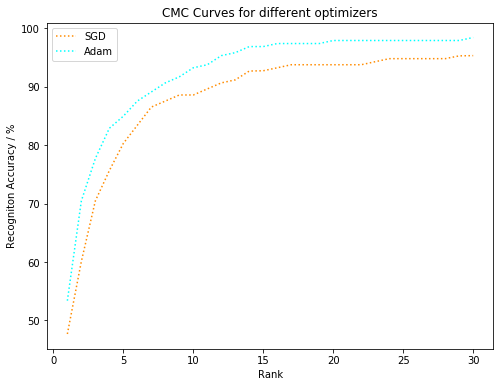

In [40]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(8.0, 6.0))
color_list = ['green', 'blue', 'red', 'purple', 'orange', 'magenta', 'cyan', 'black', 'indianred', 'lightseagreen', 'gold', 'lightgreen']
plt.plot(np.arange(1, 31),[47.67,60.10,70.47,75.65,80.31,83.42,86.53,87.56,88.60,88.60,89.64,90.67,91.19,92.7,92.75,93.26,93.78,93.78,93.78,93.78,93.78,93.78,94.30,94.82,94.82,94.82,94.82,94.82,95.3,95.34], color='darkorange', linestyle=':', label='SGD')
plt.plot(np.arange(1, 31),[53.37,70.47,77.72,82.90,84.97,87.56,89.12,90.67,91.71,93.26,93.78,95.34,95.85,96.89,96.89,97.41,97.41,97.41,97.41,97.93,97.93,97.93,97.93,97.93,97.93,97.93,97.93,97.93,97.93, 98.45], color='cyan', linestyle=':', label='Adam')
plt.title('CMC Curves for different optimizers')
plt.xlabel('Rank')
plt.ylabel('Recogniton Accuracy / %')
plt.legend(loc='best')

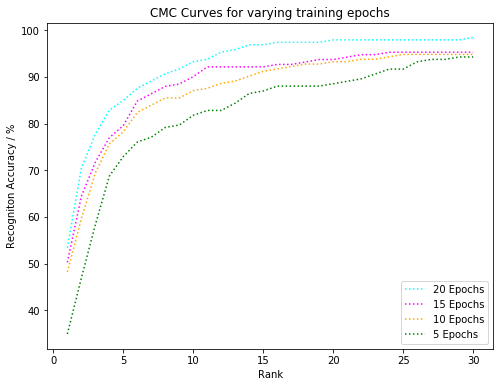

In [45]:
plt.figure(figsize=(8.0, 6.0))
color_list = ['green', 'blue', 'red', 'purple', 'orange', 'magenta', 'cyan', 'black', 'indianred', 'lightseagreen', 'gold', 'lightgreen']
plt.plot(np.arange(1, 31),[53.37,70.47,77.72,82.90,84.97,87.56,89.12,90.67,91.71,93.26,93.78,95.34,95.85,96.89,96.89,97.41,97.41,97.41,97.41,97.93,97.93,97.93,97.93,97.93,97.93,97.93,97.93,97.93,97.93,98.45], color='cyan', linestyle=':', label='20 Epochs')
plt.plot(np.arange(1, 31),[50.26,64.40,71.73,76.96,79.58,84.82,86.39,87.96,88.48,90.05,92.15,92.15,92.15,92.15,92.15,92.67,92.67,93.19,93.72,93.72,94.24,94.76,94.76,95.29,95.29,95.29,95.29,95.29,95.29,95.29], color='magenta', linestyle=':', label='15 Epochs')
plt.plot(np.arange(1, 31),[48.19,59.59,69.43,75.65,78.24,82.38,83.94,85.49,85.49,87.05,87.56,88.60,89.12,90.16,91.19,91.71,92.23,92.75,92.75,93.26,93.26,93.78,93.78,94.30,94.82,94.82,94.82,94.82,94.82,94.82], color='orange', linestyle=':', label='10 Epochs')
plt.plot(np.arange(1, 31),[34.90,46.88,58.33,68.75,72.92,76.04,77.08,79.17,79.69,81.77,82.81,82.81,84.38,86.46,86.98,88.02,88.02,88.02,88.02,88.54,89.06,89.58,90.62,91.67,91.67,93.23,93.75,93.75,94.27,94.27], color='green', linestyle=':', label='5 Epochs')
plt.title('CMC Curves for varying training epochs')
plt.xlabel('Rank')
plt.ylabel('Recogniton Accuracy / %')
plt.legend(loc='best')

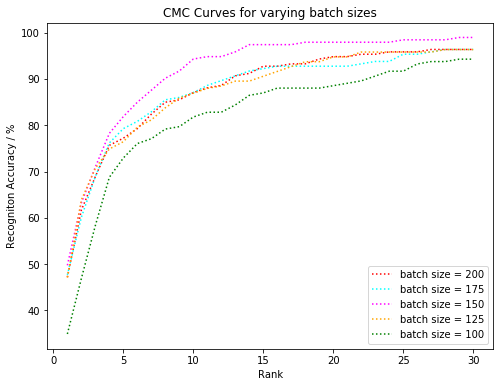

In [46]:
plt.figure(figsize=(8.0, 6.0))
color_list = ['green', 'blue', 'red', 'purple', 'orange', 'magenta', 'cyan', 'black', 'indianred', 'lightseagreen', 'gold', 'lightgreen']
plt.plot(np.arange(1, 31),[47.15,61.66,68.91,75.65,77.20,79.27,82.38,84.97,85.49,87.05,88.08,88.60,90.67,91.19,92.75,92.75,93.26,93.26,94.30,94.82,94.82,95.34,95.34,95.85,95.85,95.85,96.37,96.37,96.37,96.37], color='red', linestyle=':', label='batch size = 200')
plt.plot(np.arange(1, 31),[47.67,60.10,68.91,76.17,79.27,80.83,82.90,85.49,86.01,87.05,88.60,89.64,90.67,91.71,92.23,92.75,92.75,92.75,92.75,92.75,92.75,93.26,93.78,93.78,95.34,95.34,95.85,96.37,96.37,96.37], color='cyan', linestyle=':', label='batch size = 175')
plt.plot(np.arange(1, 31),[49.74,63.21,70.98,78.24,81.87,84.97,87.56,90.16,91.71,94.30,94.82,94.82,95.85,97.41,97.41,97.41,97.41,97.93,97.93,97.93,97.93,97.93,97.93,97.93,98.45,98.45,98.45,98.45,98.96,98.96], color='magenta', linestyle=':', label='batch size = 150')
plt.plot(np.arange(1, 31),[47.12,63.87,70.68,74.87,76.44,79.58,81.15,83.77,85.86,86.91,87.96,88.48,89.53,89.53,90.58,91.62,92.67,93.72,93.72,94.76,94.76,95.81,95.81,95.81,95.81,95.81,95.81,96.34,96.34,96.34], color='orange', linestyle=':', label='batch size = 125')
plt.plot(np.arange(1, 31),[34.90,46.88,58.33,68.75,72.92,76.04,77.08,79.17,79.69,81.77,82.81,82.81,84.38,86.46,86.98,88.02,88.02,88.02,88.02,88.54,89.06,89.58,90.62,91.67,91.67,93.23,93.75,93.75,94.27,94.27], color='green', linestyle=':', label='batch size = 100')
plt.title('CMC Curves for varying batch sizes')
plt.xlabel('Rank')
plt.ylabel('Recogniton Accuracy / %')
plt.legend(loc='best')